In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import ElasticNetCV,LassoCV,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate,train_test_split
from ITMO_FS.filters.univariate import f_ratio_measure,pearson_corr,spearman_corr,kendall_corr
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import RobustScaler,StandardScaler,PowerTransformer
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

import seaborn as sns
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
era_activity = pd.read_excel('../../data/ERα_activity.xlsx',engine='openpyxl',index_col=0,)
era_activity.head()

,IC50_nM,pIC50
SMILES,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,2.5,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,7.5,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,3.1,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,3.9,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,7.4,8.130768


In [3]:
molecular_des_corr_del = pd.read_csv("molecular_des_corr_del.csv",index_col=0)
all_data = molecular_des_corr_del.join(era_activity)
all_data.head()

,nssCH2,nHBint10,SsssCH,nHAvin,SHdsCH,maxsssCH,maxwHBa,maxHBint6,nsssCH,SdO,...,ATSc5,ATSc4,WTPT-3,WTPT-5,nHBAcc_Lipinski,nHBAcc2,ALogp2,CrippenLogP,IC50_nM,pIC50
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,11,0,1.630209,0,0.0,0.789991,2.222816,0.0,3,0.0,...,-0.080148,0.161524,15.471445,3.406628,4,4,0.081796,5.50408,2.5,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,13,0,1.586783,0,0.0,0.769158,2.238441,0.0,3,0.0,...,-0.080148,0.161524,15.486947,3.406648,4,4,0.743044,6.28428,7.5,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,7,2,0.196276,0,0.0,0.273861,2.117122,0.0,2,0.0,...,-0.059065,0.175159,18.011114,3.406644,5,5,0.532316,6.11878,3.1,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,13,0,1.657837,0,0.0,0.850558,2.228687,0.0,3,0.0,...,-0.079743,0.161226,15.468365,3.406624,4,4,0.101379,6.28428,3.9,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,8,0,0.555038,0,0.0,0.497750,2.208996,0.0,2,0.0,...,-0.069664,0.152869,15.468365,3.406624,4,4,1.836296,5.55658,7.4,8.130768


In [4]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
rs = StandardScaler()
X = rs.fit_transform(X)
X.shape

(1974, 137)

In [5]:
spearman_score = spearman_corr(X,y)
spearman_importance = np.abs(spearman_score) / np.sum(np.abs(spearman_score))
spearman_rank = np.argsort(-1 * spearman_importance)

In [6]:
def distcorr(X, Y):
    """ Compute the distance correlation function
    

    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

distcorr_list = []
for i in range(X.shape[1]):
    distcorr_list.append(distcorr(X[:,i],y))
distcorr_importance = np.abs(distcorr_list) / np.sum(np.abs(distcorr_list))
dist_corr_rank = np.argsort(-1 * distcorr_importance)

In [7]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X,y)
rf_importance = rfr.feature_importances_
rf_rank = np.argsort(-1 * rfr.feature_importances_)

In [8]:
en = ElasticNet(l1_ratio=0.00)
en.fit(X,y)
en_importance = np.abs(en.coef_) / np.sum(np.abs(en.coef_))
en_rank = np.argsort(-1 * abs(en.coef_))

In [9]:
total_importance =  0.1 * spearman_importance +  0.1 * distcorr_importance +  0.5 * rf_importance +  0.3 * en_importance
total_importance = total_importance / total_importance.sum()
feature_rank = np.argsort(-1 * total_importance)

In [10]:
feature_rank

array([100,  63,  56, 125,  24,  72,  35,  59, 118,  19,  54,  93, 119,
        50, 130, 133, 109,  99, 110,  26,  25,  43, 132, 115,   5,  95,
        15,  18, 121,  49,  71, 122, 136,  21,  20,  32,  75, 101, 129,
        78,  62,  33,  76,  38, 120,  67,  28,   1,   9,  22,   8,  83,
        47,  52, 116,  45,  42, 128,  70, 113, 126, 111,  51,   0,  30,
        36,  96, 107, 124,  81,  34, 106,  41, 131,  84,  66,   7, 112,
        53, 105, 123,  64, 127,  88,  23, 114, 102,  31,  61,  57,  68,
        74,  12,  55,  46, 135,  65,   2,  77,  94,  87,   4,  37,  90,
        79,  40,  48,  29,  89,  92,   6, 108,  44,  80,  10, 134,  11,
        14,  91, 117,  13,  82,  60,  98, 103,  69,  39,  27,  73,  17,
        16,  97,   3, 104,  86,  58,  85])

In [11]:
# molecular_des_corr_del.iloc[:,feature_rank[:20]].to_csv('20feature.csv',header=True,index=True)
molecular_20 = pd.read_csv("20feature.csv",index_col=0)
all_data = molecular_20.join(era_activity)

#####problem2

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet,Lasso
from deepforest import CascadeForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

In [13]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=56)
X_train.shape

(1381, 20)

In [140]:
###### 证明stack算法优于单个算法

X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=56)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

names = ["KNeighborsRegressor", "RBF SVR",
         "RandomForestRegressor", 
         "GradientBoostingRegressor",
         "Stacking",
         "CascadeForestRegressor"]

estimators = [('rf', RandomForestRegressor(n_jobs=-1)),('svr',  SVR(kernel="rbf")),('gdbt',GradientBoostingRegressor()),
             ('knn',KNeighborsRegressor(n_jobs=-1))]

classifiers = [
    KNeighborsRegressor(n_jobs=-1),
    SVR(kernel="rbf"),
    RandomForestRegressor(n_jobs=-1),
    GradientBoostingRegressor(),
    StackingRegressor(estimators=estimators,final_estimator=LinearRegression()),
    CascadeForestRegressor(verbose=False,n_jobs=-1,
                           # random_state=56,
                           # max_layers=49,
                           # min_samples_leaf=1,
                           # n_trees=20
                          ),
    ]


regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])
predict_map = {}
for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    predict_map[name] = y_pred
    MSE = mean_absolute_error(y_pred,y_valid)
    R2 = r2_score(y_valid,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2
regressor_df

In [251]:
import optuna
from optuna.samplers import TPESampler

def deepforest_objective(trial):
    
    df_max_layers = trial.suggest_int('df_max_layers', 2, 50)
    df_n_trees = trial.suggest_int('df_n_trees', 100, 300,2)
    df_min_samples_leaf = trial.suggest_int('df_min_samples_leaf', 1, 20,2)
    
    X = all_data.iloc[:,:-2].values
    y = all_data.iloc[:,-1].values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=56)

    scaler = StandardScaler()
    deepforest = CascadeForestRegressor(max_layers=df_max_layers,min_samples_leaf = df_min_samples_leaf,n_trees=df_n_trees,verbose=True,n_jobs=-1,
                                        random_state=56)
    stackingPipe = Pipeline([('scaler', StandardScaler()), ('deepforest', deepforest)])
    stackingPipe.fit(X_train,y_train)
    y_pred = stackingPipe.predict(X_valid)
    return mean_absolute_error(y_pred,y_valid)

study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(deepforest_objective,n_trials=500)
print(study.best_params)
print(study.best_value)

[I 2021-10-17 21:31:43,233] A new study created in memory with name: no-name-cd4e4670-abd7-434a-a5e1-8fcc9d03ca79


[2021-10-17 13:31:43.264] Start to fit the model:
[2021-10-17 13:31:43.264] Fitting cascade layer = 0 
[2021-10-17 13:31:47.843] layer = 0  | Val MSE = 0.56312 | Elapsed = 4.579 s
[2021-10-17 13:31:47.851] Fitting cascade layer = 1 
[2021-10-17 13:31:52.425] layer = 1  | Val MSE = 0.51686 | Elapsed = 4.574 s
[2021-10-17 13:31:52.433] Fitting cascade layer = 2 
[2021-10-17 13:31:57.021] layer = 2  | Val MSE = 0.52752 | Elapsed = 4.588 s
[2021-10-17 13:31:57.021] Early stopping counter: 1 out of 2
[2021-10-17 13:31:57.030] Fitting cascade layer = 3 
[2021-10-17 13:32:01.591] layer = 3  | Val MSE = 0.53915 | Elapsed = 4.561 s
[2021-10-17 13:32:01.591] Early stopping counter: 2 out of 2
[2021-10-17 13:32:01.591] Handling early stopping
[2021-10-17 13:32:01.616] The optimal number of layers: 2
[2021-10-17 13:32:01.631] Start to evalute the model:
[2021-10-17 13:32:01.632] Evaluating cascade layer = 0 
[2021-10-17 13:32:02.499] Evaluating cascade layer = 1 


[I 2021-10-17 21:32:03,397] Trial 0 finished with value: 0.5107474841192026 and parameters: {'df_max_layers': 44, 'df_n_trees': 280, 'df_min_samples_leaf': 3}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:32:03.419] Start to fit the model:
[2021-10-17 13:32:03.420] Fitting cascade layer = 0 
[2021-10-17 13:32:06.483] layer = 0  | Val MSE = 0.72760 | Elapsed = 3.063 s
[2021-10-17 13:32:06.493] Fitting cascade layer = 1 
[2021-10-17 13:32:09.274] layer = 1  | Val MSE = 0.63606 | Elapsed = 2.781 s
[2021-10-17 13:32:09.282] Fitting cascade layer = 2 
[2021-10-17 13:32:12.061] layer = 2  | Val MSE = 0.62189 | Elapsed = 2.779 s
[2021-10-17 13:32:12.068] Fitting cascade layer = 3 
[2021-10-17 13:32:14.837] layer = 3  | Val MSE = 0.62108 | Elapsed = 2.769 s
[2021-10-17 13:32:14.845] Fitting cascade layer = 4 
[2021-10-17 13:32:17.516] layer = 4  | Val MSE = 0.62616 | Elapsed = 2.671 s
[2021-10-17 13:32:17.517] Early stopping counter: 1 out of 2
[2021-10-17 13:32:17.524] Fitting cascade layer = 5 
[2021-10-17 13:32:20.310] layer = 5  | Val MSE = 0.62972 | Elapsed = 2.786 s
[2021-10-17 13:32:20.310] Early stopping counter: 2 out of 2
[2021-10-17 13:32:20.310] Handling early stoppin

[I 2021-10-17 21:32:22,204] Trial 1 finished with value: 0.5694709671190804 and parameters: {'df_max_layers': 47, 'df_n_trees': 166, 'df_min_samples_leaf': 15}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:32:22.227] Start to fit the model:
[2021-10-17 13:32:22.227] Fitting cascade layer = 0 
[2021-10-17 13:32:26.820] layer = 0  | Val MSE = 0.60682 | Elapsed = 4.592 s
[2021-10-17 13:32:26.827] Fitting cascade layer = 1 
[2021-10-17 13:32:31.418] layer = 1  | Val MSE = 0.53996 | Elapsed = 4.591 s
[2021-10-17 13:32:31.426] Fitting cascade layer = 2 
[2021-10-17 13:32:36.017] layer = 2  | Val MSE = 0.54091 | Elapsed = 4.590 s
[2021-10-17 13:32:36.017] Early stopping counter: 1 out of 2
[2021-10-17 13:32:36.024] Fitting cascade layer = 3 
[2021-10-17 13:32:40.627] layer = 3  | Val MSE = 0.55369 | Elapsed = 4.603 s
[2021-10-17 13:32:40.627] Early stopping counter: 2 out of 2
[2021-10-17 13:32:40.627] Handling early stopping
[2021-10-17 13:32:40.639] The optimal number of layers: 2
[2021-10-17 13:32:40.649] Start to evalute the model:
[2021-10-17 13:32:40.651] Evaluating cascade layer = 0 
[2021-10-17 13:32:41.511] Evaluating cascade layer = 1 


[I 2021-10-17 21:32:42,401] Trial 2 finished with value: 0.5245550063135213 and parameters: {'df_max_layers': 9, 'df_n_trees': 290, 'df_min_samples_leaf': 5}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:32:42.424] Start to fit the model:
[2021-10-17 13:32:42.424] Fitting cascade layer = 0 
[2021-10-17 13:32:45.647] layer = 0  | Val MSE = 0.66612 | Elapsed = 3.223 s
[2021-10-17 13:32:45.654] Fitting cascade layer = 1 
[2021-10-17 13:32:48.888] layer = 1  | Val MSE = 0.58442 | Elapsed = 3.233 s
[2021-10-17 13:32:48.895] Fitting cascade layer = 2 
[2021-10-17 13:32:52.501] layer = 2  | Val MSE = 0.57335 | Elapsed = 3.605 s
[2021-10-17 13:32:52.508] Fitting cascade layer = 3 
[2021-10-17 13:32:55.734] layer = 3  | Val MSE = 0.57984 | Elapsed = 3.226 s
[2021-10-17 13:32:55.734] Early stopping counter: 1 out of 2
[2021-10-17 13:32:55.741] Fitting cascade layer = 4 
[2021-10-17 13:32:58.969] layer = 4  | Val MSE = 0.59105 | Elapsed = 3.228 s
[2021-10-17 13:32:58.969] Early stopping counter: 2 out of 2
[2021-10-17 13:32:58.970] Handling early stopping
[2021-10-17 13:32:58.979] The optimal number of layers: 3
[2021-10-17 13:32:58.986] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:33:00,397] Trial 3 finished with value: 0.5444752311955455 and parameters: {'df_max_layers': 36, 'df_n_trees': 198, 'df_min_samples_leaf': 9}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:33:00.418] Start to fit the model:
[2021-10-17 13:33:00.418] Fitting cascade layer = 0 
[2021-10-17 13:33:02.774] layer = 0  | Val MSE = 0.74015 | Elapsed = 2.355 s
[2021-10-17 13:33:02.781] Fitting cascade layer = 1 
[2021-10-17 13:33:05.161] layer = 1  | Val MSE = 0.64466 | Elapsed = 2.380 s
[2021-10-17 13:33:05.169] Fitting cascade layer = 2 
[2021-10-17 13:33:07.529] layer = 2  | Val MSE = 0.62664 | Elapsed = 2.360 s
[2021-10-17 13:33:07.536] Fitting cascade layer = 3 
[2021-10-17 13:33:09.890] layer = 3  | Val MSE = 0.62350 | Elapsed = 2.354 s
[2021-10-17 13:33:09.896] Fitting cascade layer = 4 
[2021-10-17 13:33:12.261] layer = 4  | Val MSE = 0.62706 | Elapsed = 2.364 s
[2021-10-17 13:33:12.261] Early stopping counter: 1 out of 2
[2021-10-17 13:33:12.269] Fitting cascade layer = 5 
[2021-10-17 13:33:14.628] layer = 5  | Val MSE = 0.62689 | Elapsed = 2.359 s
[2021-10-17 13:33:14.628] Early stopping counter: 2 out of 2
[2021-10-17 13:33:14.628] Handling early stoppin

[I 2021-10-17 21:33:16,523] Trial 4 finished with value: 0.5742586192976221 and parameters: {'df_max_layers': 13, 'df_n_trees': 158, 'df_min_samples_leaf': 17}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:33:16.545] Start to fit the model:
[2021-10-17 13:33:16.545] Fitting cascade layer = 0 
[2021-10-17 13:33:20.229] layer = 0  | Val MSE = 0.72617 | Elapsed = 3.684 s
[2021-10-17 13:33:20.237] Fitting cascade layer = 1 
[2021-10-17 13:33:23.929] layer = 1  | Val MSE = 0.63378 | Elapsed = 3.692 s
[2021-10-17 13:33:23.938] Fitting cascade layer = 2 
[2021-10-17 13:33:27.642] layer = 2  | Val MSE = 0.62051 | Elapsed = 3.704 s
[2021-10-17 13:33:27.650] Fitting cascade layer = 3 
[2021-10-17 13:33:31.252] layer = 3  | Val MSE = 0.61872 | Elapsed = 3.602 s
[2021-10-17 13:33:31.259] Fitting cascade layer = 4 
[2021-10-17 13:33:35.247] layer = 4  | Val MSE = 0.62398 | Elapsed = 3.988 s
[2021-10-17 13:33:35.248] Early stopping counter: 1 out of 2
[2021-10-17 13:33:35.255] Fitting cascade layer = 5 
[2021-10-17 13:33:38.848] layer = 5  | Val MSE = 0.62782 | Elapsed = 3.592 s
[2021-10-17 13:33:38.848] Early stopping counter: 2 out of 2
[2021-10-17 13:33:38.848] Handling early stoppin

[I 2021-10-17 21:33:42,065] Trial 5 finished with value: 0.5693535335879809 and parameters: {'df_max_layers': 9, 'df_n_trees': 232, 'df_min_samples_leaf': 15}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:33:42.084] Start to fit the model:
[2021-10-17 13:33:42.085] Fitting cascade layer = 0 
[2021-10-17 13:33:45.758] layer = 0  | Val MSE = 0.60618 | Elapsed = 3.673 s
[2021-10-17 13:33:45.766] Fitting cascade layer = 1 
[2021-10-17 13:33:49.433] layer = 1  | Val MSE = 0.53676 | Elapsed = 3.666 s
[2021-10-17 13:33:49.440] Fitting cascade layer = 2 
[2021-10-17 13:33:53.116] layer = 2  | Val MSE = 0.53928 | Elapsed = 3.675 s
[2021-10-17 13:33:53.116] Early stopping counter: 1 out of 2
[2021-10-17 13:33:53.123] Fitting cascade layer = 3 
[2021-10-17 13:33:56.810] layer = 3  | Val MSE = 0.55171 | Elapsed = 3.687 s
[2021-10-17 13:33:56.810] Early stopping counter: 2 out of 2
[2021-10-17 13:33:56.810] Handling early stopping
[2021-10-17 13:33:56.824] The optimal number of layers: 2
[2021-10-17 13:33:56.834] Start to evalute the model:
[2021-10-17 13:33:56.835] Evaluating cascade layer = 0 
[2021-10-17 13:33:57.392] Evaluating cascade layer = 1 


[I 2021-10-17 21:33:58,183] Trial 6 finished with value: 0.5265207410184899 and parameters: {'df_max_layers': 15, 'df_n_trees': 224, 'df_min_samples_leaf': 5}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:33:58.207] Start to fit the model:
[2021-10-17 13:33:58.207] Fitting cascade layer = 0 
[2021-10-17 13:34:00.988] layer = 0  | Val MSE = 0.63993 | Elapsed = 2.780 s
[2021-10-17 13:34:00.997] Fitting cascade layer = 1 
[2021-10-17 13:34:03.792] layer = 1  | Val MSE = 0.56392 | Elapsed = 2.795 s
[2021-10-17 13:34:03.799] Fitting cascade layer = 2 
[2021-10-17 13:34:06.599] layer = 2  | Val MSE = 0.55809 | Elapsed = 2.800 s
[2021-10-17 13:34:06.606] Fitting cascade layer = 3 
[2021-10-17 13:34:09.406] layer = 3  | Val MSE = 0.56465 | Elapsed = 2.800 s
[2021-10-17 13:34:09.406] Early stopping counter: 1 out of 2
[2021-10-17 13:34:09.413] Fitting cascade layer = 4 
[2021-10-17 13:34:12.212] layer = 4  | Val MSE = 0.57251 | Elapsed = 2.799 s
[2021-10-17 13:34:12.212] Early stopping counter: 2 out of 2
[2021-10-17 13:34:12.212] Handling early stopping
[2021-10-17 13:34:12.222] The optimal number of layers: 3
[2021-10-17 13:34:12.229] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:34:13,645] Trial 7 finished with value: 0.5327187971797007 and parameters: {'df_max_layers': 26, 'df_n_trees': 174, 'df_min_samples_leaf': 7}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:34:13.667] Start to fit the model:
[2021-10-17 13:34:13.668] Fitting cascade layer = 0 
[2021-10-17 13:34:15.542] layer = 0  | Val MSE = 0.72853 | Elapsed = 1.874 s
[2021-10-17 13:34:15.550] Fitting cascade layer = 1 
[2021-10-17 13:34:17.423] layer = 1  | Val MSE = 0.64272 | Elapsed = 1.873 s
[2021-10-17 13:34:17.430] Fitting cascade layer = 2 
[2021-10-17 13:34:19.330] layer = 2  | Val MSE = 0.62785 | Elapsed = 1.899 s
[2021-10-17 13:34:19.338] Fitting cascade layer = 3 
[2021-10-17 13:34:21.223] layer = 3  | Val MSE = 0.62499 | Elapsed = 1.885 s
[2021-10-17 13:34:21.230] Fitting cascade layer = 4 
[2021-10-17 13:34:23.499] layer = 4  | Val MSE = 0.62609 | Elapsed = 2.268 s
[2021-10-17 13:34:23.499] Early stopping counter: 1 out of 2
[2021-10-17 13:34:23.506] Fitting cascade layer = 5 
[2021-10-17 13:34:25.399] layer = 5  | Val MSE = 0.62842 | Elapsed = 1.893 s
[2021-10-17 13:34:25.399] Early stopping counter: 2 out of 2
[2021-10-17 13:34:25.399] Handling early stoppin

[I 2021-10-17 21:34:27,292] Trial 8 finished with value: 0.5725953060238389 and parameters: {'df_max_layers': 46, 'df_n_trees': 112, 'df_min_samples_leaf': 15}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:34:27.315] Start to fit the model:
[2021-10-17 13:34:27.315] Fitting cascade layer = 0 
[2021-10-17 13:34:29.647] layer = 0  | Val MSE = 0.60619 | Elapsed = 2.332 s
[2021-10-17 13:34:29.655] Fitting cascade layer = 1 
[2021-10-17 13:34:31.991] layer = 1  | Val MSE = 0.54397 | Elapsed = 2.336 s
[2021-10-17 13:34:31.998] Fitting cascade layer = 2 
[2021-10-17 13:34:34.345] layer = 2  | Val MSE = 0.54201 | Elapsed = 2.347 s
[2021-10-17 13:34:34.353] Fitting cascade layer = 3 
[2021-10-17 13:34:36.694] layer = 3  | Val MSE = 0.55205 | Elapsed = 2.340 s
[2021-10-17 13:34:36.694] Early stopping counter: 1 out of 2
[2021-10-17 13:34:36.701] Fitting cascade layer = 4 
[2021-10-17 13:34:39.035] layer = 4  | Val MSE = 0.56007 | Elapsed = 2.334 s
[2021-10-17 13:34:39.036] Early stopping counter: 2 out of 2
[2021-10-17 13:34:39.036] Handling early stopping
[2021-10-17 13:34:39.046] The optimal number of layers: 3
[2021-10-17 13:34:39.053] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:34:40,462] Trial 9 finished with value: 0.5197046113975038 and parameters: {'df_max_layers': 6, 'df_n_trees': 140, 'df_min_samples_leaf': 5}. Best is trial 0 with value: 0.5107474841192026.


[2021-10-17 13:34:40.501] Start to fit the model:
[2021-10-17 13:34:40.501] Fitting cascade layer = 0 
[2021-10-17 13:34:45.502] layer = 0  | Val MSE = 0.52040 | Elapsed = 5.001 s
[2021-10-17 13:34:45.510] Fitting cascade layer = 1 
[2021-10-17 13:34:50.505] layer = 1  | Val MSE = 0.49502 | Elapsed = 4.995 s
[2021-10-17 13:34:50.512] Fitting cascade layer = 2 
[2021-10-17 13:34:55.521] layer = 2  | Val MSE = 0.50330 | Elapsed = 5.009 s
[2021-10-17 13:34:55.521] Early stopping counter: 1 out of 2
[2021-10-17 13:34:55.529] Fitting cascade layer = 3 
[2021-10-17 13:35:00.534] layer = 3  | Val MSE = 0.51516 | Elapsed = 5.005 s
[2021-10-17 13:35:00.535] Early stopping counter: 2 out of 2
[2021-10-17 13:35:00.535] Handling early stopping
[2021-10-17 13:35:00.566] The optimal number of layers: 2
[2021-10-17 13:35:00.584] Start to evalute the model:
[2021-10-17 13:35:00.586] Evaluating cascade layer = 0 
[2021-10-17 13:35:01.453] Evaluating cascade layer = 1 


[I 2021-10-17 21:35:02,351] Trial 10 finished with value: 0.504374033030182 and parameters: {'df_max_layers': 34, 'df_n_trees': 296, 'df_min_samples_leaf': 1}. Best is trial 10 with value: 0.504374033030182.


[2021-10-17 13:35:02.389] Start to fit the model:
[2021-10-17 13:35:02.389] Fitting cascade layer = 0 
[2021-10-17 13:35:07.373] layer = 0  | Val MSE = 0.52075 | Elapsed = 4.984 s
[2021-10-17 13:35:07.385] Fitting cascade layer = 1 
[2021-10-17 13:35:12.403] layer = 1  | Val MSE = 0.49570 | Elapsed = 5.018 s
[2021-10-17 13:35:12.411] Fitting cascade layer = 2 
[2021-10-17 13:35:17.787] layer = 2  | Val MSE = 0.50531 | Elapsed = 5.376 s
[2021-10-17 13:35:17.787] Early stopping counter: 1 out of 2
[2021-10-17 13:35:17.795] Fitting cascade layer = 3 
[2021-10-17 13:35:22.797] layer = 3  | Val MSE = 0.51594 | Elapsed = 5.002 s
[2021-10-17 13:35:22.797] Early stopping counter: 2 out of 2
[2021-10-17 13:35:22.798] Handling early stopping
[2021-10-17 13:35:22.817] The optimal number of layers: 2
[2021-10-17 13:35:22.830] Start to evalute the model:
[2021-10-17 13:35:22.831] Evaluating cascade layer = 0 
[2021-10-17 13:35:23.708] Evaluating cascade layer = 1 


[I 2021-10-17 21:35:24,607] Trial 11 finished with value: 0.5040193867789051 and parameters: {'df_max_layers': 35, 'df_n_trees': 300, 'df_min_samples_leaf': 1}. Best is trial 11 with value: 0.5040193867789051.


[2021-10-17 13:35:24.645] Start to fit the model:
[2021-10-17 13:35:24.645] Fitting cascade layer = 0 
[2021-10-17 13:35:29.091] layer = 0  | Val MSE = 0.52065 | Elapsed = 4.446 s
[2021-10-17 13:35:29.098] Fitting cascade layer = 1 
[2021-10-17 13:35:33.460] layer = 1  | Val MSE = 0.49673 | Elapsed = 4.361 s
[2021-10-17 13:35:33.468] Fitting cascade layer = 2 
[2021-10-17 13:35:37.827] layer = 2  | Val MSE = 0.50272 | Elapsed = 4.359 s
[2021-10-17 13:35:37.828] Early stopping counter: 1 out of 2
[2021-10-17 13:35:37.835] Fitting cascade layer = 3 
[2021-10-17 13:35:42.386] layer = 3  | Val MSE = 0.52418 | Elapsed = 4.551 s
[2021-10-17 13:35:42.386] Early stopping counter: 2 out of 2
[2021-10-17 13:35:42.386] Handling early stopping
[2021-10-17 13:35:42.411] The optimal number of layers: 2
[2021-10-17 13:35:42.423] Start to evalute the model:
[2021-10-17 13:35:42.424] Evaluating cascade layer = 0 
[2021-10-17 13:35:43.289] Evaluating cascade layer = 1 


[I 2021-10-17 21:35:44,181] Trial 12 finished with value: 0.5024283306135278 and parameters: {'df_max_layers': 30, 'df_n_trees': 262, 'df_min_samples_leaf': 1}. Best is trial 12 with value: 0.5024283306135278.


[2021-10-17 13:35:44.220] Start to fit the model:
[2021-10-17 13:35:44.220] Fitting cascade layer = 0 
[2021-10-17 13:35:48.464] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.244 s
[2021-10-17 13:35:48.475] Fitting cascade layer = 1 
[2021-10-17 13:35:52.823] layer = 1  | Val MSE = 0.49367 | Elapsed = 4.348 s
[2021-10-17 13:35:52.831] Fitting cascade layer = 2 
[2021-10-17 13:35:57.165] layer = 2  | Val MSE = 0.50091 | Elapsed = 4.334 s
[2021-10-17 13:35:57.166] Early stopping counter: 1 out of 2
[2021-10-17 13:35:57.172] Fitting cascade layer = 3 
[2021-10-17 13:36:01.526] layer = 3  | Val MSE = 0.51603 | Elapsed = 4.354 s
[2021-10-17 13:36:01.526] Early stopping counter: 2 out of 2
[2021-10-17 13:36:01.526] Handling early stopping
[2021-10-17 13:36:01.548] The optimal number of layers: 2
[2021-10-17 13:36:01.559] Start to evalute the model:
[2021-10-17 13:36:01.560] Evaluating cascade layer = 0 
[2021-10-17 13:36:02.428] Evaluating cascade layer = 1 


[I 2021-10-17 21:36:03,324] Trial 13 finished with value: 0.5015824857493091 and parameters: {'df_max_layers': 26, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:36:03.362] Start to fit the model:
[2021-10-17 13:36:03.362] Fitting cascade layer = 0 
[2021-10-17 13:36:07.083] layer = 0  | Val MSE = 0.68758 | Elapsed = 3.720 s
[2021-10-17 13:36:07.090] Fitting cascade layer = 1 
[2021-10-17 13:36:11.030] layer = 1  | Val MSE = 0.59886 | Elapsed = 3.939 s
[2021-10-17 13:36:11.038] Fitting cascade layer = 2 
[2021-10-17 13:36:14.869] layer = 2  | Val MSE = 0.58435 | Elapsed = 3.831 s
[2021-10-17 13:36:14.876] Fitting cascade layer = 3 
[2021-10-17 13:36:19.081] layer = 3  | Val MSE = 0.58620 | Elapsed = 4.205 s
[2021-10-17 13:36:19.082] Early stopping counter: 1 out of 2
[2021-10-17 13:36:19.089] Fitting cascade layer = 4 
[2021-10-17 13:36:22.812] layer = 4  | Val MSE = 0.59301 | Elapsed = 3.723 s
[2021-10-17 13:36:22.812] Early stopping counter: 2 out of 2
[2021-10-17 13:36:22.812] Handling early stopping
[2021-10-17 13:36:22.825] The optimal number of layers: 3
[2021-10-17 13:36:22.835] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:36:25,474] Trial 14 finished with value: 0.5565795169469288 and parameters: {'df_max_layers': 22, 'df_n_trees': 254, 'df_min_samples_leaf': 11}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:36:25.510] Start to fit the model:
[2021-10-17 13:36:25.511] Fitting cascade layer = 0 
[2021-10-17 13:36:29.672] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.161 s
[2021-10-17 13:36:29.680] Fitting cascade layer = 1 
[2021-10-17 13:36:33.913] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.233 s
[2021-10-17 13:36:33.921] Fitting cascade layer = 2 
[2021-10-17 13:36:38.162] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.241 s
[2021-10-17 13:36:38.162] Early stopping counter: 1 out of 2
[2021-10-17 13:36:38.170] Fitting cascade layer = 3 
[2021-10-17 13:36:42.519] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.349 s
[2021-10-17 13:36:42.520] Early stopping counter: 2 out of 2
[2021-10-17 13:36:42.520] Handling early stopping
[2021-10-17 13:36:42.543] The optimal number of layers: 2
[2021-10-17 13:36:42.555] Start to evalute the model:
[2021-10-17 13:36:42.556] Evaluating cascade layer = 0 
[2021-10-17 13:36:43.421] Evaluating cascade layer = 1 


[I 2021-10-17 21:36:44,314] Trial 15 finished with value: 0.5024332595160542 and parameters: {'df_max_layers': 21, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:36:44.353] Start to fit the model:
[2021-10-17 13:36:44.353] Fitting cascade layer = 0 
[2021-10-17 13:36:48.479] layer = 0  | Val MSE = 0.68756 | Elapsed = 4.126 s
[2021-10-17 13:36:48.487] Fitting cascade layer = 1 
[2021-10-17 13:36:52.354] layer = 1  | Val MSE = 0.59868 | Elapsed = 3.866 s
[2021-10-17 13:36:52.361] Fitting cascade layer = 2 
[2021-10-17 13:36:56.294] layer = 2  | Val MSE = 0.58389 | Elapsed = 3.933 s
[2021-10-17 13:36:56.302] Fitting cascade layer = 3 
[2021-10-17 13:37:00.043] layer = 3  | Val MSE = 0.58421 | Elapsed = 3.741 s
[2021-10-17 13:37:00.044] Early stopping counter: 1 out of 2
[2021-10-17 13:37:00.059] Fitting cascade layer = 4 
[2021-10-17 13:37:03.794] layer = 4  | Val MSE = 0.59123 | Elapsed = 3.735 s
[2021-10-17 13:37:03.794] Early stopping counter: 2 out of 2
[2021-10-17 13:37:03.794] Handling early stopping
[2021-10-17 13:37:03.809] The optimal number of layers: 3
[2021-10-17 13:37:03.819] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:37:06,451] Trial 16 finished with value: 0.5547935531336927 and parameters: {'df_max_layers': 28, 'df_n_trees': 256, 'df_min_samples_leaf': 11}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:37:06.488] Start to fit the model:
[2021-10-17 13:37:06.489] Fitting cascade layer = 0 
[2021-10-17 13:37:10.155] layer = 0  | Val MSE = 0.56402 | Elapsed = 3.666 s
[2021-10-17 13:37:10.163] Fitting cascade layer = 1 
[2021-10-17 13:37:13.996] layer = 1  | Val MSE = 0.51329 | Elapsed = 3.833 s
[2021-10-17 13:37:14.003] Fitting cascade layer = 2 
[2021-10-17 13:37:17.684] layer = 2  | Val MSE = 0.52039 | Elapsed = 3.680 s
[2021-10-17 13:37:17.684] Early stopping counter: 1 out of 2
[2021-10-17 13:37:17.692] Fitting cascade layer = 3 
[2021-10-17 13:37:21.341] layer = 3  | Val MSE = 0.53093 | Elapsed = 3.650 s
[2021-10-17 13:37:21.342] Early stopping counter: 2 out of 2
[2021-10-17 13:37:21.350] Handling early stopping
[2021-10-17 13:37:21.364] The optimal number of layers: 2
[2021-10-17 13:37:21.374] Start to evalute the model:
[2021-10-17 13:37:21.376] Evaluating cascade layer = 0 
[2021-10-17 13:37:21.941] Evaluating cascade layer = 1 


[I 2021-10-17 21:37:22,528] Trial 17 finished with value: 0.5109938402840337 and parameters: {'df_max_layers': 30, 'df_n_trees': 214, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:37:22.566] Start to fit the model:
[2021-10-17 13:37:22.566] Fitting cascade layer = 0 
[2021-10-17 13:37:26.823] layer = 0  | Val MSE = 0.56324 | Elapsed = 4.257 s
[2021-10-17 13:37:26.830] Fitting cascade layer = 1 
[2021-10-17 13:37:30.986] layer = 1  | Val MSE = 0.51477 | Elapsed = 4.156 s
[2021-10-17 13:37:30.994] Fitting cascade layer = 2 
[2021-10-17 13:37:35.155] layer = 2  | Val MSE = 0.51930 | Elapsed = 4.161 s
[2021-10-17 13:37:35.155] Early stopping counter: 1 out of 2
[2021-10-17 13:37:35.163] Fitting cascade layer = 3 
[2021-10-17 13:37:39.324] layer = 3  | Val MSE = 0.53320 | Elapsed = 4.161 s
[2021-10-17 13:37:39.325] Early stopping counter: 2 out of 2
[2021-10-17 13:37:39.325] Handling early stopping
[2021-10-17 13:37:39.341] The optimal number of layers: 2
[2021-10-17 13:37:39.352] Start to evalute the model:
[2021-10-17 13:37:39.354] Evaluating cascade layer = 0 
[2021-10-17 13:37:40.219] Evaluating cascade layer = 1 


[I 2021-10-17 21:37:41,113] Trial 18 finished with value: 0.5110615849456085 and parameters: {'df_max_layers': 41, 'df_n_trees': 270, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:37:41.151] Start to fit the model:
[2021-10-17 13:37:41.151] Fitting cascade layer = 0 
[2021-10-17 13:37:44.859] layer = 0  | Val MSE = 0.66564 | Elapsed = 3.708 s
[2021-10-17 13:37:44.867] Fitting cascade layer = 1 
[2021-10-17 13:37:48.566] layer = 1  | Val MSE = 0.58366 | Elapsed = 3.699 s
[2021-10-17 13:37:48.573] Fitting cascade layer = 2 
[2021-10-17 13:37:52.278] layer = 2  | Val MSE = 0.57150 | Elapsed = 3.705 s
[2021-10-17 13:37:52.286] Fitting cascade layer = 3 
[2021-10-17 13:37:55.986] layer = 3  | Val MSE = 0.57741 | Elapsed = 3.700 s
[2021-10-17 13:37:55.986] Early stopping counter: 1 out of 2
[2021-10-17 13:37:55.994] Fitting cascade layer = 4 
[2021-10-17 13:37:59.682] layer = 4  | Val MSE = 0.58403 | Elapsed = 3.688 s
[2021-10-17 13:37:59.682] Early stopping counter: 2 out of 2
[2021-10-17 13:37:59.683] Handling early stopping
[2021-10-17 13:37:59.696] The optimal number of layers: 3
[2021-10-17 13:37:59.705] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:38:02,335] Trial 19 finished with value: 0.5443846004911663 and parameters: {'df_max_layers': 19, 'df_n_trees': 238, 'df_min_samples_leaf': 9}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:38:02.373] Start to fit the model:
[2021-10-17 13:38:02.373] Fitting cascade layer = 0 
[2021-10-17 13:38:05.624] layer = 0  | Val MSE = 0.63985 | Elapsed = 3.251 s
[2021-10-17 13:38:05.631] Fitting cascade layer = 1 
[2021-10-17 13:38:08.894] layer = 1  | Val MSE = 0.56306 | Elapsed = 3.262 s
[2021-10-17 13:38:08.907] Fitting cascade layer = 2 
[2021-10-17 13:38:12.168] layer = 2  | Val MSE = 0.55509 | Elapsed = 3.262 s
[2021-10-17 13:38:12.176] Fitting cascade layer = 3 
[2021-10-17 13:38:15.842] layer = 3  | Val MSE = 0.56240 | Elapsed = 3.666 s
[2021-10-17 13:38:15.842] Early stopping counter: 1 out of 2
[2021-10-17 13:38:15.850] Fitting cascade layer = 4 
[2021-10-17 13:38:19.122] layer = 4  | Val MSE = 0.57133 | Elapsed = 3.272 s
[2021-10-17 13:38:19.122] Early stopping counter: 2 out of 2
[2021-10-17 13:38:19.123] Handling early stopping
[2021-10-17 13:38:19.135] The optimal number of layers: 3
[2021-10-17 13:38:19.144] Start to evalute the model:
[2021-10-17 13:3

[I 2021-10-17 21:38:20,565] Trial 20 finished with value: 0.5288480221895361 and parameters: {'df_max_layers': 39, 'df_n_trees': 208, 'df_min_samples_leaf': 7}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:38:20.603] Start to fit the model:
[2021-10-17 13:38:20.603] Fitting cascade layer = 0 
[2021-10-17 13:38:24.744] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.141 s
[2021-10-17 13:38:24.751] Fitting cascade layer = 1 
[2021-10-17 13:38:28.890] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.139 s
[2021-10-17 13:38:28.898] Fitting cascade layer = 2 
[2021-10-17 13:38:33.053] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.155 s
[2021-10-17 13:38:33.053] Early stopping counter: 1 out of 2
[2021-10-17 13:38:33.061] Fitting cascade layer = 3 
[2021-10-17 13:38:37.207] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.146 s
[2021-10-17 13:38:37.208] Early stopping counter: 2 out of 2
[2021-10-17 13:38:37.208] Handling early stopping
[2021-10-17 13:38:37.225] The optimal number of layers: 2
[2021-10-17 13:38:37.251] Start to evalute the model:
[2021-10-17 13:38:37.252] Evaluating cascade layer = 0 
[2021-10-17 13:38:38.119] Evaluating cascade layer = 1 


[I 2021-10-17 21:38:39,010] Trial 21 finished with value: 0.5024332595160541 and parameters: {'df_max_layers': 21, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:38:39.050] Start to fit the model:
[2021-10-17 13:38:39.050] Fitting cascade layer = 0 
[2021-10-17 13:38:43.604] layer = 0  | Val MSE = 0.52031 | Elapsed = 4.554 s
[2021-10-17 13:38:43.612] Fitting cascade layer = 1 
[2021-10-17 13:38:48.182] layer = 1  | Val MSE = 0.49428 | Elapsed = 4.570 s
[2021-10-17 13:38:48.190] Fitting cascade layer = 2 
[2021-10-17 13:38:52.746] layer = 2  | Val MSE = 0.50706 | Elapsed = 4.556 s
[2021-10-17 13:38:52.746] Early stopping counter: 1 out of 2
[2021-10-17 13:38:52.753] Fitting cascade layer = 3 
[2021-10-17 13:38:57.312] layer = 3  | Val MSE = 0.51280 | Elapsed = 4.559 s
[2021-10-17 13:38:57.313] Early stopping counter: 2 out of 2
[2021-10-17 13:38:57.313] Handling early stopping
[2021-10-17 13:38:57.328] The optimal number of layers: 2
[2021-10-17 13:38:57.339] Start to evalute the model:
[2021-10-17 13:38:57.340] Evaluating cascade layer = 0 
[2021-10-17 13:38:58.205] Evaluating cascade layer = 1 


[I 2021-10-17 21:38:59,114] Trial 22 finished with value: 0.5021779198487882 and parameters: {'df_max_layers': 24, 'df_n_trees': 268, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:38:59.151] Start to fit the model:
[2021-10-17 13:38:59.151] Fitting cascade layer = 0 
[2021-10-17 13:39:03.620] layer = 0  | Val MSE = 0.56315 | Elapsed = 4.469 s
[2021-10-17 13:39:03.627] Fitting cascade layer = 1 
[2021-10-17 13:39:07.973] layer = 1  | Val MSE = 0.51624 | Elapsed = 4.346 s
[2021-10-17 13:39:07.981] Fitting cascade layer = 2 
[2021-10-17 13:39:12.961] layer = 2  | Val MSE = 0.52797 | Elapsed = 4.979 s
[2021-10-17 13:39:12.961] Early stopping counter: 1 out of 2
[2021-10-17 13:39:12.968] Fitting cascade layer = 3 
[2021-10-17 13:39:17.538] layer = 3  | Val MSE = 0.54110 | Elapsed = 4.569 s
[2021-10-17 13:39:17.539] Early stopping counter: 2 out of 2
[2021-10-17 13:39:17.539] Handling early stopping
[2021-10-17 13:39:17.555] The optimal number of layers: 2
[2021-10-17 13:39:17.566] Start to evalute the model:
[2021-10-17 13:39:17.568] Evaluating cascade layer = 0 
[2021-10-17 13:39:18.432] Evaluating cascade layer = 1 


[I 2021-10-17 21:39:19,332] Trial 23 finished with value: 0.5105815224945617 and parameters: {'df_max_layers': 30, 'df_n_trees': 274, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:39:19.369] Start to fit the model:
[2021-10-17 13:39:19.370] Fitting cascade layer = 0 
[2021-10-17 13:39:22.598] layer = 0  | Val MSE = 0.52010 | Elapsed = 3.228 s
[2021-10-17 13:39:22.606] Fitting cascade layer = 1 
[2021-10-17 13:39:25.825] layer = 1  | Val MSE = 0.49659 | Elapsed = 3.219 s
[2021-10-17 13:39:25.833] Fitting cascade layer = 2 
[2021-10-17 13:39:29.061] layer = 2  | Val MSE = 0.50425 | Elapsed = 3.227 s
[2021-10-17 13:39:29.061] Early stopping counter: 1 out of 2
[2021-10-17 13:39:29.068] Fitting cascade layer = 3 
[2021-10-17 13:39:32.286] layer = 3  | Val MSE = 0.52158 | Elapsed = 3.218 s
[2021-10-17 13:39:32.286] Early stopping counter: 2 out of 2
[2021-10-17 13:39:32.286] Handling early stopping
[2021-10-17 13:39:32.300] The optimal number of layers: 2
[2021-10-17 13:39:32.308] Start to evalute the model:
[2021-10-17 13:39:32.310] Evaluating cascade layer = 0 
[2021-10-17 13:39:32.772] Evaluating cascade layer = 1 


[I 2021-10-17 21:39:33,256] Trial 24 finished with value: 0.5050966193308402 and parameters: {'df_max_layers': 24, 'df_n_trees': 192, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:39:33.300] Start to fit the model:
[2021-10-17 13:39:33.300] Fitting cascade layer = 0 
[2021-10-17 13:39:37.001] layer = 0  | Val MSE = 0.60619 | Elapsed = 3.700 s
[2021-10-17 13:39:37.009] Fitting cascade layer = 1 
[2021-10-17 13:39:40.719] layer = 1  | Val MSE = 0.53974 | Elapsed = 3.710 s
[2021-10-17 13:39:40.727] Fitting cascade layer = 2 
[2021-10-17 13:39:44.452] layer = 2  | Val MSE = 0.53997 | Elapsed = 3.725 s
[2021-10-17 13:39:44.452] Early stopping counter: 1 out of 2
[2021-10-17 13:39:44.459] Fitting cascade layer = 3 
[2021-10-17 13:39:48.175] layer = 3  | Val MSE = 0.55378 | Elapsed = 3.715 s
[2021-10-17 13:39:48.175] Early stopping counter: 2 out of 2
[2021-10-17 13:39:48.175] Handling early stopping
[2021-10-17 13:39:48.188] The optimal number of layers: 2
[2021-10-17 13:39:48.197] Start to evalute the model:
[2021-10-17 13:39:48.199] Evaluating cascade layer = 0 
[2021-10-17 13:39:49.062] Evaluating cascade layer = 1 


[I 2021-10-17 21:39:49,952] Trial 25 finished with value: 0.5253980189158823 and parameters: {'df_max_layers': 17, 'df_n_trees': 238, 'df_min_samples_leaf': 5}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:39:49.997] Start to fit the model:
[2021-10-17 13:39:49.997] Fitting cascade layer = 0 
[2021-10-17 13:39:54.564] layer = 0  | Val MSE = 0.56323 | Elapsed = 4.566 s
[2021-10-17 13:39:54.572] Fitting cascade layer = 1 
[2021-10-17 13:39:59.139] layer = 1  | Val MSE = 0.51586 | Elapsed = 4.567 s
[2021-10-17 13:39:59.146] Fitting cascade layer = 2 
[2021-10-17 13:40:03.992] layer = 2  | Val MSE = 0.52272 | Elapsed = 4.845 s
[2021-10-17 13:40:03.992] Early stopping counter: 1 out of 2
[2021-10-17 13:40:04.000] Fitting cascade layer = 3 
[2021-10-17 13:40:08.587] layer = 3  | Val MSE = 0.53281 | Elapsed = 4.587 s
[2021-10-17 13:40:08.587] Early stopping counter: 2 out of 2
[2021-10-17 13:40:08.587] Handling early stopping
[2021-10-17 13:40:08.605] The optimal number of layers: 2
[2021-10-17 13:40:08.617] Start to evalute the model:
[2021-10-17 13:40:08.619] Evaluating cascade layer = 0 
[2021-10-17 13:40:09.483] Evaluating cascade layer = 1 


[I 2021-10-17 21:40:10,378] Trial 26 finished with value: 0.5129114518447292 and parameters: {'df_max_layers': 31, 'df_n_trees': 276, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:40:10.416] Start to fit the model:
[2021-10-17 13:40:10.417] Fitting cascade layer = 0 
[2021-10-17 13:40:14.136] layer = 0  | Val MSE = 0.63927 | Elapsed = 3.719 s
[2021-10-17 13:40:14.143] Fitting cascade layer = 1 
[2021-10-17 13:40:17.854] layer = 1  | Val MSE = 0.56102 | Elapsed = 3.711 s
[2021-10-17 13:40:17.862] Fitting cascade layer = 2 
[2021-10-17 13:40:21.563] layer = 2  | Val MSE = 0.55523 | Elapsed = 3.701 s
[2021-10-17 13:40:21.570] Fitting cascade layer = 3 
[2021-10-17 13:40:25.284] layer = 3  | Val MSE = 0.56433 | Elapsed = 3.714 s
[2021-10-17 13:40:25.284] Early stopping counter: 1 out of 2
[2021-10-17 13:40:25.292] Fitting cascade layer = 4 
[2021-10-17 13:40:29.002] layer = 4  | Val MSE = 0.57359 | Elapsed = 3.711 s
[2021-10-17 13:40:29.003] Early stopping counter: 2 out of 2
[2021-10-17 13:40:29.003] Handling early stopping
[2021-10-17 13:40:29.016] The optimal number of layers: 3
[2021-10-17 13:40:29.025] Start to evalute the model:
[2021-10-17 13:4

[I 2021-10-17 21:40:31,666] Trial 27 finished with value: 0.532943485442225 and parameters: {'df_max_layers': 26, 'df_n_trees': 240, 'df_min_samples_leaf': 7}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:40:31.705] Start to fit the model:
[2021-10-17 13:40:31.705] Fitting cascade layer = 0 
[2021-10-17 13:40:35.766] layer = 0  | Val MSE = 0.75441 | Elapsed = 4.061 s
[2021-10-17 13:40:35.774] Fitting cascade layer = 1 
[2021-10-17 13:40:39.929] layer = 1  | Val MSE = 0.66462 | Elapsed = 4.155 s
[2021-10-17 13:40:39.937] Fitting cascade layer = 2 
[2021-10-17 13:40:44.088] layer = 2  | Val MSE = 0.64601 | Elapsed = 4.151 s
[2021-10-17 13:40:44.096] Fitting cascade layer = 3 
[2021-10-17 13:40:48.240] layer = 3  | Val MSE = 0.63866 | Elapsed = 4.144 s
[2021-10-17 13:40:48.247] Fitting cascade layer = 4 
[2021-10-17 13:40:52.402] layer = 4  | Val MSE = 0.64339 | Elapsed = 4.155 s
[2021-10-17 13:40:52.403] Early stopping counter: 1 out of 2
[2021-10-17 13:40:52.411] Fitting cascade layer = 5 
[2021-10-17 13:40:56.569] layer = 5  | Val MSE = 0.64680 | Elapsed = 4.158 s
[2021-10-17 13:40:56.569] Early stopping counter: 2 out of 2
[2021-10-17 13:40:56.569] Handling early stoppin

[I 2021-10-17 21:41:00,385] Trial 28 finished with value: 0.5861058129517682 and parameters: {'df_max_layers': 32, 'df_n_trees': 264, 'df_min_samples_leaf': 19}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:41:00.418] Start to fit the model:
[2021-10-17 13:41:00.418] Fitting cascade layer = 0 
[2021-10-17 13:41:05.008] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.589 s
[2021-10-17 13:41:05.021] Fitting cascade layer = 1 
[2021-10-17 13:41:09.600] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.579 s
[2021-10-17 13:41:09.608] Fitting cascade layer = 2 
[2021-10-17 13:41:14.403] layer = 2  | Val MSE = 0.50332 | Elapsed = 4.795 s
[2021-10-17 13:41:14.404] Early stopping counter: 1 out of 2
[2021-10-17 13:41:14.412] Fitting cascade layer = 3 
[2021-10-17 13:41:19.114] layer = 3  | Val MSE = 0.50834 | Elapsed = 4.701 s
[2021-10-17 13:41:19.114] Early stopping counter: 2 out of 2
[2021-10-17 13:41:19.114] Handling early stopping
[2021-10-17 13:41:19.136] The optimal number of layers: 2
[2021-10-17 13:41:19.149] Start to evalute the model:
[2021-10-17 13:41:19.150] Evaluating cascade layer = 0 
[2021-10-17 13:41:20.015] Evaluating cascade layer = 1 


[I 2021-10-17 21:41:20,918] Trial 29 finished with value: 0.5029439375086049 and parameters: {'df_max_layers': 42, 'df_n_trees': 284, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:41:20.958] Start to fit the model:
[2021-10-17 13:41:20.958] Fitting cascade layer = 0 
[2021-10-17 13:41:24.627] layer = 0  | Val MSE = 0.56382 | Elapsed = 3.669 s
[2021-10-17 13:41:24.634] Fitting cascade layer = 1 
[2021-10-17 13:41:28.313] layer = 1  | Val MSE = 0.51327 | Elapsed = 3.679 s
[2021-10-17 13:41:28.321] Fitting cascade layer = 2 
[2021-10-17 13:41:32.002] layer = 2  | Val MSE = 0.52562 | Elapsed = 3.681 s
[2021-10-17 13:41:32.002] Early stopping counter: 1 out of 2
[2021-10-17 13:41:32.010] Fitting cascade layer = 3 
[2021-10-17 13:41:35.698] layer = 3  | Val MSE = 0.53330 | Elapsed = 3.688 s
[2021-10-17 13:41:35.698] Early stopping counter: 2 out of 2
[2021-10-17 13:41:35.698] Handling early stopping
[2021-10-17 13:41:35.710] The optimal number of layers: 2
[2021-10-17 13:41:35.719] Start to evalute the model:
[2021-10-17 13:41:35.721] Evaluating cascade layer = 0 
[2021-10-17 13:41:36.488] Evaluating cascade layer = 1 


[I 2021-10-17 21:41:37,178] Trial 30 finished with value: 0.511198841762796 and parameters: {'df_max_layers': 50, 'df_n_trees': 226, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:41:37.218] Start to fit the model:
[2021-10-17 13:41:37.218] Fitting cascade layer = 0 
[2021-10-17 13:41:41.342] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.123 s
[2021-10-17 13:41:41.350] Fitting cascade layer = 1 
[2021-10-17 13:41:45.490] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.140 s
[2021-10-17 13:41:45.498] Fitting cascade layer = 2 
[2021-10-17 13:41:49.627] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.129 s
[2021-10-17 13:41:49.627] Early stopping counter: 1 out of 2
[2021-10-17 13:41:49.634] Fitting cascade layer = 3 
[2021-10-17 13:41:53.772] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.138 s
[2021-10-17 13:41:53.772] Early stopping counter: 2 out of 2
[2021-10-17 13:41:53.772] Handling early stopping
[2021-10-17 13:41:53.790] The optimal number of layers: 2
[2021-10-17 13:41:53.801] Start to evalute the model:
[2021-10-17 13:41:53.802] Evaluating cascade layer = 0 
[2021-10-17 13:41:55.063] Evaluating cascade layer = 1 


[I 2021-10-17 21:41:55,956] Trial 31 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 23, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:41:55.993] Start to fit the model:
[2021-10-17 13:41:55.993] Fitting cascade layer = 0 
[2021-10-17 13:42:00.666] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.672 s
[2021-10-17 13:42:00.674] Fitting cascade layer = 1 
[2021-10-17 13:42:05.363] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.689 s
[2021-10-17 13:42:05.371] Fitting cascade layer = 2 
[2021-10-17 13:42:10.071] layer = 2  | Val MSE = 0.50332 | Elapsed = 4.700 s
[2021-10-17 13:42:10.071] Early stopping counter: 1 out of 2
[2021-10-17 13:42:10.078] Fitting cascade layer = 3 
[2021-10-17 13:42:14.644] layer = 3  | Val MSE = 0.50834 | Elapsed = 4.565 s
[2021-10-17 13:42:14.644] Early stopping counter: 2 out of 2
[2021-10-17 13:42:14.645] Handling early stopping
[2021-10-17 13:42:14.662] The optimal number of layers: 2
[2021-10-17 13:42:14.674] Start to evalute the model:
[2021-10-17 13:42:14.675] Evaluating cascade layer = 0 
[2021-10-17 13:42:15.540] Evaluating cascade layer = 1 


[I 2021-10-17 21:42:16,435] Trial 32 finished with value: 0.5029439375086049 and parameters: {'df_max_layers': 19, 'df_n_trees': 284, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:42:16.473] Start to fit the model:
[2021-10-17 13:42:16.473] Fitting cascade layer = 0 
[2021-10-17 13:42:20.624] layer = 0  | Val MSE = 0.56291 | Elapsed = 4.150 s
[2021-10-17 13:42:20.631] Fitting cascade layer = 1 
[2021-10-17 13:42:24.786] layer = 1  | Val MSE = 0.51197 | Elapsed = 4.154 s
[2021-10-17 13:42:24.794] Fitting cascade layer = 2 
[2021-10-17 13:42:28.939] layer = 2  | Val MSE = 0.52260 | Elapsed = 4.145 s
[2021-10-17 13:42:28.939] Early stopping counter: 1 out of 2
[2021-10-17 13:42:28.947] Fitting cascade layer = 3 
[2021-10-17 13:42:33.120] layer = 3  | Val MSE = 0.53637 | Elapsed = 4.173 s
[2021-10-17 13:42:33.120] Early stopping counter: 2 out of 2
[2021-10-17 13:42:33.120] Handling early stopping
[2021-10-17 13:42:33.134] The optimal number of layers: 2
[2021-10-17 13:42:33.145] Start to evalute the model:
[2021-10-17 13:42:33.146] Evaluating cascade layer = 0 
[2021-10-17 13:42:34.012] Evaluating cascade layer = 1 


[I 2021-10-17 21:42:34,904] Trial 33 finished with value: 0.5109996679890341 and parameters: {'df_max_layers': 26, 'df_n_trees': 266, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:42:34.943] Start to fit the model:
[2021-10-17 13:42:34.943] Fitting cascade layer = 0 
[2021-10-17 13:42:38.756] layer = 0  | Val MSE = 0.60650 | Elapsed = 3.814 s
[2021-10-17 13:42:38.764] Fitting cascade layer = 1 
[2021-10-17 13:42:42.690] layer = 1  | Val MSE = 0.53908 | Elapsed = 3.926 s
[2021-10-17 13:42:42.697] Fitting cascade layer = 2 
[2021-10-17 13:42:46.603] layer = 2  | Val MSE = 0.54198 | Elapsed = 3.906 s
[2021-10-17 13:42:46.603] Early stopping counter: 1 out of 2
[2021-10-17 13:42:46.610] Fitting cascade layer = 3 
[2021-10-17 13:42:50.324] layer = 3  | Val MSE = 0.55482 | Elapsed = 3.714 s
[2021-10-17 13:42:50.324] Early stopping counter: 2 out of 2
[2021-10-17 13:42:50.324] Handling early stopping
[2021-10-17 13:42:50.338] The optimal number of layers: 2
[2021-10-17 13:42:50.349] Start to evalute the model:
[2021-10-17 13:42:50.350] Evaluating cascade layer = 0 
[2021-10-17 13:42:51.554] Evaluating cascade layer = 1 


[I 2021-10-17 21:42:52,443] Trial 34 finished with value: 0.5254372409873268 and parameters: {'df_max_layers': 12, 'df_n_trees': 244, 'df_min_samples_leaf': 5}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:42:52.480] Start to fit the model:
[2021-10-17 13:42:52.480] Fitting cascade layer = 0 
[2021-10-17 13:42:57.256] layer = 0  | Val MSE = 0.52030 | Elapsed = 4.776 s
[2021-10-17 13:42:57.263] Fitting cascade layer = 1 
[2021-10-17 13:43:01.842] layer = 1  | Val MSE = 0.49378 | Elapsed = 4.579 s
[2021-10-17 13:43:01.849] Fitting cascade layer = 2 
[2021-10-17 13:43:06.640] layer = 2  | Val MSE = 0.49934 | Elapsed = 4.790 s
[2021-10-17 13:43:06.640] Early stopping counter: 1 out of 2
[2021-10-17 13:43:06.647] Fitting cascade layer = 3 
[2021-10-17 13:43:11.437] layer = 3  | Val MSE = 0.51193 | Elapsed = 4.790 s
[2021-10-17 13:43:11.437] Early stopping counter: 2 out of 2
[2021-10-17 13:43:11.438] Handling early stopping
[2021-10-17 13:43:11.466] The optimal number of layers: 2
[2021-10-17 13:43:11.481] Start to evalute the model:
[2021-10-17 13:43:11.482] Evaluating cascade layer = 0 
[2021-10-17 13:43:12.347] Evaluating cascade layer = 1 


[I 2021-10-17 21:43:13,254] Trial 35 finished with value: 0.5041226277678256 and parameters: {'df_max_layers': 28, 'df_n_trees': 286, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:43:13.292] Start to fit the model:
[2021-10-17 13:43:13.292] Fitting cascade layer = 0 
[2021-10-17 13:43:16.961] layer = 0  | Val MSE = 0.56420 | Elapsed = 3.669 s
[2021-10-17 13:43:16.967] Fitting cascade layer = 1 
[2021-10-17 13:43:20.648] layer = 1  | Val MSE = 0.51074 | Elapsed = 3.680 s
[2021-10-17 13:43:20.657] Fitting cascade layer = 2 
[2021-10-17 13:43:24.328] layer = 2  | Val MSE = 0.52093 | Elapsed = 3.671 s
[2021-10-17 13:43:24.328] Early stopping counter: 1 out of 2
[2021-10-17 13:43:24.335] Fitting cascade layer = 3 
[2021-10-17 13:43:27.999] layer = 3  | Val MSE = 0.53512 | Elapsed = 3.664 s
[2021-10-17 13:43:28.000] Early stopping counter: 2 out of 2
[2021-10-17 13:43:28.000] Handling early stopping
[2021-10-17 13:43:28.010] The optimal number of layers: 2
[2021-10-17 13:43:28.020] Start to evalute the model:
[2021-10-17 13:43:28.022] Evaluating cascade layer = 0 
[2021-10-17 13:43:28.488] Evaluating cascade layer = 1 


[I 2021-10-17 21:43:28,974] Trial 36 finished with value: 0.5114689956229509 and parameters: {'df_max_layers': 20, 'df_n_trees': 216, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:43:29.012] Start to fit the model:
[2021-10-17 13:43:29.012] Fitting cascade layer = 0 
[2021-10-17 13:43:32.116] layer = 0  | Val MSE = 0.60526 | Elapsed = 3.104 s
[2021-10-17 13:43:32.127] Fitting cascade layer = 1 
[2021-10-17 13:43:35.234] layer = 1  | Val MSE = 0.54011 | Elapsed = 3.107 s
[2021-10-17 13:43:35.241] Fitting cascade layer = 2 
[2021-10-17 13:43:38.345] layer = 2  | Val MSE = 0.54364 | Elapsed = 3.104 s
[2021-10-17 13:43:38.346] Early stopping counter: 1 out of 2
[2021-10-17 13:43:38.352] Fitting cascade layer = 3 
[2021-10-17 13:43:41.472] layer = 3  | Val MSE = 0.55672 | Elapsed = 3.120 s
[2021-10-17 13:43:41.472] Early stopping counter: 2 out of 2
[2021-10-17 13:43:41.472] Handling early stopping
[2021-10-17 13:43:41.481] The optimal number of layers: 2
[2021-10-17 13:43:41.488] Start to evalute the model:
[2021-10-17 13:43:41.490] Evaluating cascade layer = 0 
[2021-10-17 13:43:41.952] Evaluating cascade layer = 1 


[I 2021-10-17 21:43:42,436] Trial 37 finished with value: 0.527827760585087 and parameters: {'df_max_layers': 38, 'df_n_trees': 188, 'df_min_samples_leaf': 5}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:43:42.475] Start to fit the model:
[2021-10-17 13:43:42.475] Fitting cascade layer = 0 
[2021-10-17 13:43:46.613] layer = 0  | Val MSE = 0.70845 | Elapsed = 4.138 s
[2021-10-17 13:43:46.621] Fitting cascade layer = 1 
[2021-10-17 13:43:50.677] layer = 1  | Val MSE = 0.62068 | Elapsed = 4.056 s
[2021-10-17 13:43:50.685] Fitting cascade layer = 2 
[2021-10-17 13:43:54.811] layer = 2  | Val MSE = 0.60493 | Elapsed = 4.126 s
[2021-10-17 13:43:54.818] Fitting cascade layer = 3 
[2021-10-17 13:43:59.359] layer = 3  | Val MSE = 0.60525 | Elapsed = 4.541 s
[2021-10-17 13:43:59.360] Early stopping counter: 1 out of 2
[2021-10-17 13:43:59.365] Fitting cascade layer = 4 
[2021-10-17 13:44:03.419] layer = 4  | Val MSE = 0.61092 | Elapsed = 4.054 s
[2021-10-17 13:44:03.419] Early stopping counter: 2 out of 2
[2021-10-17 13:44:03.419] Handling early stopping
[2021-10-17 13:44:03.432] The optimal number of layers: 3
[2021-10-17 13:44:03.442] Start to evalute the model:
[2021-10-17 13:4

[I 2021-10-17 21:44:06,073] Trial 38 finished with value: 0.5665700254703429 and parameters: {'df_max_layers': 17, 'df_n_trees': 264, 'df_min_samples_leaf': 13}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:44:06.110] Start to fit the model:
[2021-10-17 13:44:06.110] Fitting cascade layer = 0 
[2021-10-17 13:44:10.236] layer = 0  | Val MSE = 0.56282 | Elapsed = 4.125 s
[2021-10-17 13:44:10.243] Fitting cascade layer = 1 
[2021-10-17 13:44:14.272] layer = 1  | Val MSE = 0.51194 | Elapsed = 4.030 s
[2021-10-17 13:44:14.279] Fitting cascade layer = 2 
[2021-10-17 13:44:18.417] layer = 2  | Val MSE = 0.51727 | Elapsed = 4.137 s
[2021-10-17 13:44:18.417] Early stopping counter: 1 out of 2
[2021-10-17 13:44:18.425] Fitting cascade layer = 3 
[2021-10-17 13:44:22.332] layer = 3  | Val MSE = 0.53251 | Elapsed = 3.907 s
[2021-10-17 13:44:22.332] Early stopping counter: 2 out of 2
[2021-10-17 13:44:22.332] Handling early stopping
[2021-10-17 13:44:22.344] The optimal number of layers: 2
[2021-10-17 13:44:22.354] Start to evalute the model:
[2021-10-17 13:44:22.356] Evaluating cascade layer = 0 
[2021-10-17 13:44:23.219] Evaluating cascade layer = 1 


[I 2021-10-17 21:44:24,106] Trial 39 finished with value: 0.5121362207914387 and parameters: {'df_max_layers': 13, 'df_n_trees': 250, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:44:24.143] Start to fit the model:
[2021-10-17 13:44:24.143] Fitting cascade layer = 0 
[2021-10-17 13:44:27.708] layer = 0  | Val MSE = 0.63898 | Elapsed = 3.564 s
[2021-10-17 13:44:27.715] Fitting cascade layer = 1 
[2021-10-17 13:44:31.396] layer = 1  | Val MSE = 0.56061 | Elapsed = 3.680 s
[2021-10-17 13:44:31.402] Fitting cascade layer = 2 
[2021-10-17 13:44:35.082] layer = 2  | Val MSE = 0.55584 | Elapsed = 3.679 s
[2021-10-17 13:44:35.089] Fitting cascade layer = 3 
[2021-10-17 13:44:38.774] layer = 3  | Val MSE = 0.56599 | Elapsed = 3.685 s
[2021-10-17 13:44:38.774] Early stopping counter: 1 out of 2
[2021-10-17 13:44:38.782] Fitting cascade layer = 4 
[2021-10-17 13:44:42.342] layer = 4  | Val MSE = 0.57676 | Elapsed = 3.559 s
[2021-10-17 13:44:42.342] Early stopping counter: 2 out of 2
[2021-10-17 13:44:42.343] Handling early stopping
[2021-10-17 13:44:42.353] The optimal number of layers: 3
[2021-10-17 13:44:42.363] Start to evalute the model:
[2021-10-17 13:4

[I 2021-10-17 21:44:44,390] Trial 40 finished with value: 0.5323709362591514 and parameters: {'df_max_layers': 33, 'df_n_trees': 226, 'df_min_samples_leaf': 7}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:44:44.429] Start to fit the model:
[2021-10-17 13:44:44.430] Fitting cascade layer = 0 
[2021-10-17 13:44:48.890] layer = 0  | Val MSE = 0.52065 | Elapsed = 4.460 s
[2021-10-17 13:44:48.898] Fitting cascade layer = 1 
[2021-10-17 13:44:53.770] layer = 1  | Val MSE = 0.49673 | Elapsed = 4.872 s
[2021-10-17 13:44:53.777] Fitting cascade layer = 2 
[2021-10-17 13:44:58.222] layer = 2  | Val MSE = 0.50272 | Elapsed = 4.445 s
[2021-10-17 13:44:58.222] Early stopping counter: 1 out of 2
[2021-10-17 13:44:58.230] Fitting cascade layer = 3 
[2021-10-17 13:45:02.675] layer = 3  | Val MSE = 0.52418 | Elapsed = 4.445 s
[2021-10-17 13:45:02.676] Early stopping counter: 2 out of 2
[2021-10-17 13:45:02.676] Handling early stopping
[2021-10-17 13:45:02.694] The optimal number of layers: 2
[2021-10-17 13:45:02.705] Start to evalute the model:
[2021-10-17 13:45:02.707] Evaluating cascade layer = 0 
[2021-10-17 13:45:03.572] Evaluating cascade layer = 1 


[I 2021-10-17 21:45:04,465] Trial 41 finished with value: 0.5024283306135279 and parameters: {'df_max_layers': 22, 'df_n_trees': 262, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:45:04.502] Start to fit the model:
[2021-10-17 13:45:04.503] Fitting cascade layer = 0 
[2021-10-17 13:45:09.055] layer = 0  | Val MSE = 0.52023 | Elapsed = 4.552 s
[2021-10-17 13:45:09.062] Fitting cascade layer = 1 
[2021-10-17 13:45:13.642] layer = 1  | Val MSE = 0.49382 | Elapsed = 4.579 s
[2021-10-17 13:45:13.650] Fitting cascade layer = 2 
[2021-10-17 13:45:18.207] layer = 2  | Val MSE = 0.50628 | Elapsed = 4.557 s
[2021-10-17 13:45:18.207] Early stopping counter: 1 out of 2
[2021-10-17 13:45:18.214] Fitting cascade layer = 3 
[2021-10-17 13:45:22.772] layer = 3  | Val MSE = 0.51362 | Elapsed = 4.558 s
[2021-10-17 13:45:22.772] Early stopping counter: 2 out of 2
[2021-10-17 13:45:22.773] Handling early stopping
[2021-10-17 13:45:22.785] The optimal number of layers: 2
[2021-10-17 13:45:22.795] Start to evalute the model:
[2021-10-17 13:45:22.797] Evaluating cascade layer = 0 
[2021-10-17 13:45:23.662] Evaluating cascade layer = 1 


[I 2021-10-17 21:45:24,559] Trial 42 finished with value: 0.5036069135956573 and parameters: {'df_max_layers': 24, 'df_n_trees': 276, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:45:24.597] Start to fit the model:
[2021-10-17 13:45:24.597] Fitting cascade layer = 0 
[2021-10-17 13:45:29.507] layer = 0  | Val MSE = 0.52035 | Elapsed = 4.909 s
[2021-10-17 13:45:29.514] Fitting cascade layer = 1 
[2021-10-17 13:45:34.425] layer = 1  | Val MSE = 0.49660 | Elapsed = 4.910 s
[2021-10-17 13:45:34.425] Reaching the maximum number of layers: 2
[2021-10-17 13:45:34.427] Start to evalute the model:
[2021-10-17 13:45:34.429] Evaluating cascade layer = 0 
[2021-10-17 13:45:35.293] Evaluating cascade layer = 1 


[I 2021-10-17 21:45:36,188] Trial 43 finished with value: 0.5043266313246566 and parameters: {'df_max_layers': 2, 'df_n_trees': 294, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:45:36.225] Start to fit the model:
[2021-10-17 13:45:36.225] Fitting cascade layer = 0 
[2021-10-17 13:45:40.346] layer = 0  | Val MSE = 0.60662 | Elapsed = 4.121 s
[2021-10-17 13:45:40.354] Fitting cascade layer = 1 
[2021-10-17 13:45:44.502] layer = 1  | Val MSE = 0.53705 | Elapsed = 4.148 s
[2021-10-17 13:45:44.508] Fitting cascade layer = 2 
[2021-10-17 13:45:48.644] layer = 2  | Val MSE = 0.53931 | Elapsed = 4.136 s
[2021-10-17 13:45:48.644] Early stopping counter: 1 out of 2
[2021-10-17 13:45:48.651] Fitting cascade layer = 3 
[2021-10-17 13:45:52.790] layer = 3  | Val MSE = 0.55180 | Elapsed = 4.138 s
[2021-10-17 13:45:52.790] Early stopping counter: 2 out of 2
[2021-10-17 13:45:52.790] Handling early stopping
[2021-10-17 13:45:52.803] The optimal number of layers: 2
[2021-10-17 13:45:52.813] Start to evalute the model:
[2021-10-17 13:45:52.815] Evaluating cascade layer = 0 
[2021-10-17 13:45:53.679] Evaluating cascade layer = 1 


[I 2021-10-17 21:45:55,061] Trial 44 finished with value: 0.5252711054061727 and parameters: {'df_max_layers': 16, 'df_n_trees': 262, 'df_min_samples_leaf': 5}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:45:55.099] Start to fit the model:
[2021-10-17 13:45:55.099] Fitting cascade layer = 0 
[2021-10-17 13:45:59.189] layer = 0  | Val MSE = 0.56380 | Elapsed = 4.090 s
[2021-10-17 13:45:59.196] Fitting cascade layer = 1 
[2021-10-17 13:46:03.222] layer = 1  | Val MSE = 0.51404 | Elapsed = 4.026 s
[2021-10-17 13:46:03.229] Fitting cascade layer = 2 
[2021-10-17 13:46:07.244] layer = 2  | Val MSE = 0.52259 | Elapsed = 4.015 s
[2021-10-17 13:46:07.245] Early stopping counter: 1 out of 2
[2021-10-17 13:46:07.252] Fitting cascade layer = 3 
[2021-10-17 13:46:11.185] layer = 3  | Val MSE = 0.53675 | Elapsed = 3.933 s
[2021-10-17 13:46:11.186] Early stopping counter: 2 out of 2
[2021-10-17 13:46:11.186] Handling early stopping
[2021-10-17 13:46:11.198] The optimal number of layers: 2
[2021-10-17 13:46:11.208] Start to evalute the model:
[2021-10-17 13:46:11.209] Evaluating cascade layer = 0 
[2021-10-17 13:46:12.073] Evaluating cascade layer = 1 


[I 2021-10-17 21:46:12,960] Trial 45 finished with value: 0.5128535449439897 and parameters: {'df_max_layers': 28, 'df_n_trees': 244, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:46:12.998] Start to fit the model:
[2021-10-17 13:46:12.998] Fitting cascade layer = 0 
[2021-10-17 13:46:15.317] layer = 0  | Val MSE = 0.52137 | Elapsed = 2.318 s
[2021-10-17 13:46:15.324] Fitting cascade layer = 1 
[2021-10-17 13:46:17.679] layer = 1  | Val MSE = 0.50071 | Elapsed = 2.354 s
[2021-10-17 13:46:17.686] Fitting cascade layer = 2 
[2021-10-17 13:46:20.027] layer = 2  | Val MSE = 0.50830 | Elapsed = 2.341 s
[2021-10-17 13:46:20.028] Early stopping counter: 1 out of 2
[2021-10-17 13:46:20.034] Fitting cascade layer = 3 
[2021-10-17 13:46:22.387] layer = 3  | Val MSE = 0.53160 | Elapsed = 2.352 s
[2021-10-17 13:46:22.388] Early stopping counter: 2 out of 2
[2021-10-17 13:46:22.388] Handling early stopping
[2021-10-17 13:46:22.395] The optimal number of layers: 2
[2021-10-17 13:46:22.403] Start to evalute the model:
[2021-10-17 13:46:22.404] Evaluating cascade layer = 0 
[2021-10-17 13:46:22.865] Evaluating cascade layer = 1 


[I 2021-10-17 21:46:23,346] Trial 46 finished with value: 0.5043888284981235 and parameters: {'df_max_layers': 22, 'df_n_trees': 140, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:46:23.384] Start to fit the model:
[2021-10-17 13:46:23.384] Fitting cascade layer = 0 
[2021-10-17 13:46:28.188] layer = 0  | Val MSE = 0.52032 | Elapsed = 4.803 s
[2021-10-17 13:46:28.195] Fitting cascade layer = 1 
[2021-10-17 13:46:33.100] layer = 1  | Val MSE = 0.49838 | Elapsed = 4.905 s
[2021-10-17 13:46:33.108] Fitting cascade layer = 2 
[2021-10-17 13:46:37.919] layer = 2  | Val MSE = 0.51093 | Elapsed = 4.811 s
[2021-10-17 13:46:37.919] Early stopping counter: 1 out of 2
[2021-10-17 13:46:37.927] Fitting cascade layer = 3 
[2021-10-17 13:46:42.720] layer = 3  | Val MSE = 0.52002 | Elapsed = 4.793 s
[2021-10-17 13:46:42.720] Early stopping counter: 2 out of 2
[2021-10-17 13:46:42.720] Handling early stopping
[2021-10-17 13:46:42.737] The optimal number of layers: 2
[2021-10-17 13:46:42.748] Start to evalute the model:
[2021-10-17 13:46:42.750] Evaluating cascade layer = 0 
[2021-10-17 13:46:43.615] Evaluating cascade layer = 1 


[I 2021-10-17 21:46:44,525] Trial 47 finished with value: 0.5029078886889093 and parameters: {'df_max_layers': 26, 'df_n_trees': 292, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:46:44.563] Start to fit the model:
[2021-10-17 13:46:44.563] Fitting cascade layer = 0 
[2021-10-17 13:46:48.243] layer = 0  | Val MSE = 0.56392 | Elapsed = 3.680 s
[2021-10-17 13:46:48.251] Fitting cascade layer = 1 
[2021-10-17 13:46:51.950] layer = 1  | Val MSE = 0.51006 | Elapsed = 3.699 s
[2021-10-17 13:46:51.957] Fitting cascade layer = 2 
[2021-10-17 13:46:56.035] layer = 2  | Val MSE = 0.52210 | Elapsed = 4.077 s
[2021-10-17 13:46:56.035] Early stopping counter: 1 out of 2
[2021-10-17 13:46:56.042] Fitting cascade layer = 3 
[2021-10-17 13:46:59.728] layer = 3  | Val MSE = 0.53865 | Elapsed = 3.686 s
[2021-10-17 13:46:59.729] Early stopping counter: 2 out of 2
[2021-10-17 13:46:59.730] Handling early stopping
[2021-10-17 13:46:59.740] The optimal number of layers: 2
[2021-10-17 13:46:59.751] Start to evalute the model:
[2021-10-17 13:46:59.752] Evaluating cascade layer = 0 
[2021-10-17 13:47:00.615] Evaluating cascade layer = 1 


[I 2021-10-17 21:47:01,306] Trial 48 finished with value: 0.510728449697655 and parameters: {'df_max_layers': 36, 'df_n_trees': 230, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:47:01.347] Start to fit the model:
[2021-10-17 13:47:01.347] Fitting cascade layer = 0 
[2021-10-17 13:47:05.485] layer = 0  | Val MSE = 0.60630 | Elapsed = 4.138 s
[2021-10-17 13:47:05.493] Fitting cascade layer = 1 
[2021-10-17 13:47:09.639] layer = 1  | Val MSE = 0.53867 | Elapsed = 4.146 s
[2021-10-17 13:47:09.646] Fitting cascade layer = 2 
[2021-10-17 13:47:13.778] layer = 2  | Val MSE = 0.54295 | Elapsed = 4.132 s
[2021-10-17 13:47:13.779] Early stopping counter: 1 out of 2
[2021-10-17 13:47:13.786] Fitting cascade layer = 3 
[2021-10-17 13:47:17.950] layer = 3  | Val MSE = 0.55497 | Elapsed = 4.164 s
[2021-10-17 13:47:17.951] Early stopping counter: 2 out of 2
[2021-10-17 13:47:17.951] Handling early stopping
[2021-10-17 13:47:17.965] The optimal number of layers: 2
[2021-10-17 13:47:17.975] Start to evalute the model:
[2021-10-17 13:47:17.977] Evaluating cascade layer = 0 
[2021-10-17 13:47:18.843] Evaluating cascade layer = 1 


[I 2021-10-17 21:47:19,729] Trial 49 finished with value: 0.5249513196108022 and parameters: {'df_max_layers': 24, 'df_n_trees': 256, 'df_min_samples_leaf': 5}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:47:19.767] Start to fit the model:
[2021-10-17 13:47:19.767] Fitting cascade layer = 0 
[2021-10-17 13:47:21.640] layer = 0  | Val MSE = 0.66988 | Elapsed = 1.872 s
[2021-10-17 13:47:21.647] Fitting cascade layer = 1 
[2021-10-17 13:47:23.519] layer = 1  | Val MSE = 0.58883 | Elapsed = 1.872 s
[2021-10-17 13:47:23.527] Fitting cascade layer = 2 
[2021-10-17 13:47:25.376] layer = 2  | Val MSE = 0.57275 | Elapsed = 1.849 s
[2021-10-17 13:47:25.383] Fitting cascade layer = 3 
[2021-10-17 13:47:27.247] layer = 3  | Val MSE = 0.57354 | Elapsed = 1.864 s
[2021-10-17 13:47:27.247] Early stopping counter: 1 out of 2
[2021-10-17 13:47:27.254] Fitting cascade layer = 4 
[2021-10-17 13:47:29.116] layer = 4  | Val MSE = 0.57970 | Elapsed = 1.862 s
[2021-10-17 13:47:29.116] Early stopping counter: 2 out of 2
[2021-10-17 13:47:29.116] Handling early stopping
[2021-10-17 13:47:29.123] The optimal number of layers: 3
[2021-10-17 13:47:29.128] Start to evalute the model:
[2021-10-17 13:4

[I 2021-10-17 21:47:30,530] Trial 50 finished with value: 0.546840836557306 and parameters: {'df_max_layers': 10, 'df_n_trees': 100, 'df_min_samples_leaf': 9}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:47:30.568] Start to fit the model:
[2021-10-17 13:47:30.568] Fitting cascade layer = 0 
[2021-10-17 13:47:35.131] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.562 s
[2021-10-17 13:47:35.139] Fitting cascade layer = 1 
[2021-10-17 13:47:39.708] layer = 1  | Val MSE = 0.49301 | Elapsed = 4.569 s
[2021-10-17 13:47:39.716] Fitting cascade layer = 2 
[2021-10-17 13:47:44.681] layer = 2  | Val MSE = 0.50076 | Elapsed = 4.965 s
[2021-10-17 13:47:44.681] Early stopping counter: 1 out of 2
[2021-10-17 13:47:44.689] Fitting cascade layer = 3 
[2021-10-17 13:47:49.269] layer = 3  | Val MSE = 0.51802 | Elapsed = 4.580 s
[2021-10-17 13:47:49.270] Early stopping counter: 2 out of 2
[2021-10-17 13:47:49.270] Handling early stopping
[2021-10-17 13:47:49.292] The optimal number of layers: 2
[2021-10-17 13:47:49.306] Start to evalute the model:
[2021-10-17 13:47:49.308] Evaluating cascade layer = 0 
[2021-10-17 13:47:50.173] Evaluating cascade layer = 1 


[I 2021-10-17 21:47:51,067] Trial 51 finished with value: 0.5030203364490483 and parameters: {'df_max_layers': 21, 'df_n_trees': 274, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:47:51.104] Start to fit the model:
[2021-10-17 13:47:51.104] Fitting cascade layer = 0 
[2021-10-17 13:47:55.418] layer = 0  | Val MSE = 0.52047 | Elapsed = 4.314 s
[2021-10-17 13:47:55.425] Fitting cascade layer = 1 
[2021-10-17 13:47:59.771] layer = 1  | Val MSE = 0.49779 | Elapsed = 4.346 s
[2021-10-17 13:47:59.779] Fitting cascade layer = 2 
[2021-10-17 13:48:04.109] layer = 2  | Val MSE = 0.50478 | Elapsed = 4.330 s
[2021-10-17 13:48:04.109] Early stopping counter: 1 out of 2
[2021-10-17 13:48:04.116] Fitting cascade layer = 3 
[2021-10-17 13:48:08.461] layer = 3  | Val MSE = 0.51633 | Elapsed = 4.345 s
[2021-10-17 13:48:08.461] Early stopping counter: 2 out of 2
[2021-10-17 13:48:08.461] Handling early stopping
[2021-10-17 13:48:08.475] The optimal number of layers: 2
[2021-10-17 13:48:08.485] Start to evalute the model:
[2021-10-17 13:48:08.487] Evaluating cascade layer = 0 
[2021-10-17 13:48:09.351] Evaluating cascade layer = 1 


[I 2021-10-17 21:48:10,249] Trial 52 finished with value: 0.5027733145768902 and parameters: {'df_max_layers': 18, 'df_n_trees': 260, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:48:10.288] Start to fit the model:
[2021-10-17 13:48:10.288] Fitting cascade layer = 0 
[2021-10-17 13:48:14.386] layer = 0  | Val MSE = 0.56301 | Elapsed = 4.098 s
[2021-10-17 13:48:14.393] Fitting cascade layer = 1 
[2021-10-17 13:48:18.523] layer = 1  | Val MSE = 0.51305 | Elapsed = 4.130 s
[2021-10-17 13:48:18.530] Fitting cascade layer = 2 
[2021-10-17 13:48:22.655] layer = 2  | Val MSE = 0.52223 | Elapsed = 4.125 s
[2021-10-17 13:48:22.655] Early stopping counter: 1 out of 2
[2021-10-17 13:48:22.662] Fitting cascade layer = 3 
[2021-10-17 13:48:26.671] layer = 3  | Val MSE = 0.53973 | Elapsed = 4.008 s
[2021-10-17 13:48:26.671] Early stopping counter: 2 out of 2
[2021-10-17 13:48:26.671] Handling early stopping
[2021-10-17 13:48:26.683] The optimal number of layers: 2
[2021-10-17 13:48:26.693] Start to evalute the model:
[2021-10-17 13:48:26.695] Evaluating cascade layer = 0 
[2021-10-17 13:48:27.559] Evaluating cascade layer = 1 


[I 2021-10-17 21:48:28,459] Trial 53 finished with value: 0.5128182265503429 and parameters: {'df_max_layers': 28, 'df_n_trees': 248, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:48:28.505] Start to fit the model:
[2021-10-17 13:48:28.505] Fitting cascade layer = 0 
[2021-10-17 13:48:32.515] layer = 0  | Val MSE = 0.52009 | Elapsed = 4.010 s
[2021-10-17 13:48:32.522] Fitting cascade layer = 1 
[2021-10-17 13:48:36.534] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.012 s
[2021-10-17 13:48:36.548] Fitting cascade layer = 2 
[2021-10-17 13:48:40.926] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.378 s
[2021-10-17 13:48:40.926] Early stopping counter: 1 out of 2
[2021-10-17 13:48:40.933] Fitting cascade layer = 3 
[2021-10-17 13:48:44.935] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.001 s
[2021-10-17 13:48:44.935] Early stopping counter: 2 out of 2
[2021-10-17 13:48:44.935] Handling early stopping
[2021-10-17 13:48:44.952] The optimal number of layers: 2
[2021-10-17 13:48:44.962] Start to evalute the model:
[2021-10-17 13:48:44.963] Evaluating cascade layer = 0 
[2021-10-17 13:48:45.827] Evaluating cascade layer = 1 


[I 2021-10-17 21:48:46,717] Trial 54 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 21, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:48:46.754] Start to fit the model:
[2021-10-17 13:48:46.754] Fitting cascade layer = 0 
[2021-10-17 13:48:51.037] layer = 0  | Val MSE = 0.56327 | Elapsed = 4.282 s
[2021-10-17 13:48:51.046] Fitting cascade layer = 1 
[2021-10-17 13:48:55.314] layer = 1  | Val MSE = 0.51467 | Elapsed = 4.268 s
[2021-10-17 13:48:55.324] Fitting cascade layer = 2 
[2021-10-17 13:48:59.586] layer = 2  | Val MSE = 0.51984 | Elapsed = 4.262 s
[2021-10-17 13:48:59.586] Early stopping counter: 1 out of 2
[2021-10-17 13:48:59.594] Fitting cascade layer = 3 
[2021-10-17 13:49:03.765] layer = 3  | Val MSE = 0.53827 | Elapsed = 4.171 s
[2021-10-17 13:49:03.766] Early stopping counter: 2 out of 2
[2021-10-17 13:49:03.766] Handling early stopping
[2021-10-17 13:49:03.782] The optimal number of layers: 2
[2021-10-17 13:49:03.795] Start to evalute the model:
[2021-10-17 13:49:03.798] Evaluating cascade layer = 0 
[2021-10-17 13:49:04.667] Evaluating cascade layer = 1 


[I 2021-10-17 21:49:05,562] Trial 55 finished with value: 0.5114915912422591 and parameters: {'df_max_layers': 14, 'df_n_trees': 272, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:49:05.602] Start to fit the model:
[2021-10-17 13:49:05.602] Fitting cascade layer = 0 
[2021-10-17 13:49:09.845] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.243 s
[2021-10-17 13:49:09.853] Fitting cascade layer = 1 
[2021-10-17 13:49:14.205] layer = 1  | Val MSE = 0.49367 | Elapsed = 4.352 s
[2021-10-17 13:49:14.213] Fitting cascade layer = 2 
[2021-10-17 13:49:18.460] layer = 2  | Val MSE = 0.50091 | Elapsed = 4.247 s
[2021-10-17 13:49:18.460] Early stopping counter: 1 out of 2
[2021-10-17 13:49:18.467] Fitting cascade layer = 3 
[2021-10-17 13:49:22.720] layer = 3  | Val MSE = 0.51603 | Elapsed = 4.253 s
[2021-10-17 13:49:22.721] Early stopping counter: 2 out of 2
[2021-10-17 13:49:22.722] Handling early stopping
[2021-10-17 13:49:22.737] The optimal number of layers: 2
[2021-10-17 13:49:22.747] Start to evalute the model:
[2021-10-17 13:49:22.749] Evaluating cascade layer = 0 
[2021-10-17 13:49:23.621] Evaluating cascade layer = 1 


[I 2021-10-17 21:49:24,514] Trial 56 finished with value: 0.5015824857493091 and parameters: {'df_max_layers': 29, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:49:24.553] Start to fit the model:
[2021-10-17 13:49:24.553] Fitting cascade layer = 0 
[2021-10-17 13:49:29.125] layer = 0  | Val MSE = 0.52050 | Elapsed = 4.572 s
[2021-10-17 13:49:29.132] Fitting cascade layer = 1 
[2021-10-17 13:49:33.725] layer = 1  | Val MSE = 0.49403 | Elapsed = 4.593 s
[2021-10-17 13:49:33.732] Fitting cascade layer = 2 
[2021-10-17 13:49:38.708] layer = 2  | Val MSE = 0.50173 | Elapsed = 4.976 s
[2021-10-17 13:49:38.709] Early stopping counter: 1 out of 2
[2021-10-17 13:49:38.716] Fitting cascade layer = 3 
[2021-10-17 13:49:43.287] layer = 3  | Val MSE = 0.51856 | Elapsed = 4.571 s
[2021-10-17 13:49:43.288] Early stopping counter: 2 out of 2
[2021-10-17 13:49:43.288] Handling early stopping
[2021-10-17 13:49:43.301] The optimal number of layers: 2
[2021-10-17 13:49:43.313] Start to evalute the model:
[2021-10-17 13:49:43.314] Evaluating cascade layer = 0 
[2021-10-17 13:49:44.177] Evaluating cascade layer = 1 


[I 2021-10-17 21:49:45,068] Trial 57 finished with value: 0.5040770353001728 and parameters: {'df_max_layers': 30, 'df_n_trees': 282, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:49:45.105] Start to fit the model:
[2021-10-17 13:49:45.105] Fitting cascade layer = 0 
[2021-10-17 13:49:49.247] layer = 0  | Val MSE = 0.70825 | Elapsed = 4.142 s
[2021-10-17 13:49:49.254] Fitting cascade layer = 1 
[2021-10-17 13:49:53.423] layer = 1  | Val MSE = 0.61987 | Elapsed = 4.168 s
[2021-10-17 13:49:53.430] Fitting cascade layer = 2 
[2021-10-17 13:49:57.603] layer = 2  | Val MSE = 0.60550 | Elapsed = 4.173 s
[2021-10-17 13:49:57.611] Fitting cascade layer = 3 
[2021-10-17 13:50:01.761] layer = 3  | Val MSE = 0.60646 | Elapsed = 4.150 s
[2021-10-17 13:50:01.762] Early stopping counter: 1 out of 2
[2021-10-17 13:50:01.775] Fitting cascade layer = 4 
[2021-10-17 13:50:05.925] layer = 4  | Val MSE = 0.61467 | Elapsed = 4.150 s
[2021-10-17 13:50:05.926] Early stopping counter: 2 out of 2
[2021-10-17 13:50:05.926] Handling early stopping
[2021-10-17 13:50:05.941] The optimal number of layers: 3
[2021-10-17 13:50:05.950] Start to evalute the model:
[2021-10-17 13:5

[I 2021-10-17 21:50:08,580] Trial 58 finished with value: 0.5677613637309238 and parameters: {'df_max_layers': 29, 'df_n_trees': 268, 'df_min_samples_leaf': 13}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:50:08.619] Start to fit the model:
[2021-10-17 13:50:08.620] Fitting cascade layer = 0 
[2021-10-17 13:50:12.318] layer = 0  | Val MSE = 0.56411 | Elapsed = 3.698 s
[2021-10-17 13:50:12.326] Fitting cascade layer = 1 
[2021-10-17 13:50:15.990] layer = 1  | Val MSE = 0.51235 | Elapsed = 3.664 s
[2021-10-17 13:50:15.998] Fitting cascade layer = 2 
[2021-10-17 13:50:19.679] layer = 2  | Val MSE = 0.52183 | Elapsed = 3.681 s
[2021-10-17 13:50:19.679] Early stopping counter: 1 out of 2
[2021-10-17 13:50:19.687] Fitting cascade layer = 3 
[2021-10-17 13:50:23.375] layer = 3  | Val MSE = 0.53669 | Elapsed = 3.688 s
[2021-10-17 13:50:23.376] Early stopping counter: 2 out of 2
[2021-10-17 13:50:23.376] Handling early stopping
[2021-10-17 13:50:23.390] The optimal number of layers: 2
[2021-10-17 13:50:23.399] Start to evalute the model:
[2021-10-17 13:50:23.401] Evaluating cascade layer = 0 
[2021-10-17 13:50:24.067] Evaluating cascade layer = 1 


[I 2021-10-17 21:50:24,652] Trial 59 finished with value: 0.5120876150834573 and parameters: {'df_max_layers': 33, 'df_n_trees': 218, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:50:24.693] Start to fit the model:
[2021-10-17 13:50:24.693] Fitting cascade layer = 0 
[2021-10-17 13:50:29.032] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.338 s
[2021-10-17 13:50:29.040] Fitting cascade layer = 1 
[2021-10-17 13:50:33.393] layer = 1  | Val MSE = 0.49367 | Elapsed = 4.353 s
[2021-10-17 13:50:33.400] Fitting cascade layer = 2 
[2021-10-17 13:50:38.171] layer = 2  | Val MSE = 0.50091 | Elapsed = 4.771 s
[2021-10-17 13:50:38.171] Early stopping counter: 1 out of 2
[2021-10-17 13:50:38.178] Fitting cascade layer = 3 
[2021-10-17 13:50:42.537] layer = 3  | Val MSE = 0.51603 | Elapsed = 4.358 s
[2021-10-17 13:50:42.537] Early stopping counter: 2 out of 2
[2021-10-17 13:50:42.537] Handling early stopping
[2021-10-17 13:50:42.559] The optimal number of layers: 2
[2021-10-17 13:50:42.570] Start to evalute the model:
[2021-10-17 13:50:42.571] Evaluating cascade layer = 0 
[2021-10-17 13:50:43.436] Evaluating cascade layer = 1 


[I 2021-10-17 21:50:44,330] Trial 60 finished with value: 0.5015824857493091 and parameters: {'df_max_layers': 25, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:50:44.370] Start to fit the model:
[2021-10-17 13:50:44.370] Fitting cascade layer = 0 
[2021-10-17 13:50:48.800] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.430 s
[2021-10-17 13:50:48.807] Fitting cascade layer = 1 
[2021-10-17 13:50:53.138] layer = 1  | Val MSE = 0.49367 | Elapsed = 4.331 s
[2021-10-17 13:50:53.147] Fitting cascade layer = 2 
[2021-10-17 13:50:57.400] layer = 2  | Val MSE = 0.50091 | Elapsed = 4.253 s
[2021-10-17 13:50:57.401] Early stopping counter: 1 out of 2
[2021-10-17 13:50:57.409] Fitting cascade layer = 3 
[2021-10-17 13:51:01.740] layer = 3  | Val MSE = 0.51603 | Elapsed = 4.331 s
[2021-10-17 13:51:01.740] Early stopping counter: 2 out of 2
[2021-10-17 13:51:01.740] Handling early stopping
[2021-10-17 13:51:01.761] The optimal number of layers: 2
[2021-10-17 13:51:01.774] Start to evalute the model:
[2021-10-17 13:51:01.775] Evaluating cascade layer = 0 
[2021-10-17 13:51:02.640] Evaluating cascade layer = 1 


[I 2021-10-17 21:51:03,533] Trial 61 finished with value: 0.5015824857493091 and parameters: {'df_max_layers': 25, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:51:03.572] Start to fit the model:
[2021-10-17 13:51:03.572] Fitting cascade layer = 0 
[2021-10-17 13:51:07.701] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.128 s
[2021-10-17 13:51:07.709] Fitting cascade layer = 1 
[2021-10-17 13:51:11.816] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.107 s
[2021-10-17 13:51:11.823] Fitting cascade layer = 2 
[2021-10-17 13:51:15.959] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.136 s
[2021-10-17 13:51:15.959] Early stopping counter: 1 out of 2
[2021-10-17 13:51:15.967] Fitting cascade layer = 3 
[2021-10-17 13:51:20.085] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.118 s
[2021-10-17 13:51:20.085] Early stopping counter: 2 out of 2
[2021-10-17 13:51:20.085] Handling early stopping
[2021-10-17 13:51:20.098] The optimal number of layers: 2
[2021-10-17 13:51:20.107] Start to evalute the model:
[2021-10-17 13:51:20.109] Evaluating cascade layer = 0 
[2021-10-17 13:51:20.977] Evaluating cascade layer = 1 


[I 2021-10-17 21:51:21,870] Trial 62 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 26, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:51:21.909] Start to fit the model:
[2021-10-17 13:51:21.909] Fitting cascade layer = 0 
[2021-10-17 13:51:26.911] layer = 0  | Val MSE = 0.52075 | Elapsed = 5.001 s
[2021-10-17 13:51:26.919] Fitting cascade layer = 1 
[2021-10-17 13:51:31.842] layer = 1  | Val MSE = 0.49570 | Elapsed = 4.923 s
[2021-10-17 13:51:31.850] Fitting cascade layer = 2 
[2021-10-17 13:51:36.885] layer = 2  | Val MSE = 0.50531 | Elapsed = 5.034 s
[2021-10-17 13:51:36.886] Early stopping counter: 1 out of 2
[2021-10-17 13:51:36.893] Fitting cascade layer = 3 
[2021-10-17 13:51:42.288] layer = 3  | Val MSE = 0.51594 | Elapsed = 5.394 s
[2021-10-17 13:51:42.288] Early stopping counter: 2 out of 2
[2021-10-17 13:51:42.288] Handling early stopping
[2021-10-17 13:51:42.313] The optimal number of layers: 2
[2021-10-17 13:51:42.326] Start to evalute the model:
[2021-10-17 13:51:42.328] Evaluating cascade layer = 0 
[2021-10-17 13:51:43.191] Evaluating cascade layer = 1 


[I 2021-10-17 21:51:44,088] Trial 63 finished with value: 0.5040193867789052 and parameters: {'df_max_layers': 25, 'df_n_trees': 300, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:51:44.128] Start to fit the model:
[2021-10-17 13:51:44.128] Fitting cascade layer = 0 
[2021-10-17 13:51:48.047] layer = 0  | Val MSE = 0.56290 | Elapsed = 3.919 s
[2021-10-17 13:51:48.054] Fitting cascade layer = 1 
[2021-10-17 13:51:52.110] layer = 1  | Val MSE = 0.51550 | Elapsed = 4.055 s
[2021-10-17 13:51:52.118] Fitting cascade layer = 2 
[2021-10-17 13:51:56.239] layer = 2  | Val MSE = 0.51962 | Elapsed = 4.121 s
[2021-10-17 13:51:56.239] Early stopping counter: 1 out of 2
[2021-10-17 13:51:56.247] Fitting cascade layer = 3 
[2021-10-17 13:52:00.397] layer = 3  | Val MSE = 0.53856 | Elapsed = 4.150 s
[2021-10-17 13:52:00.398] Early stopping counter: 2 out of 2
[2021-10-17 13:52:00.398] Handling early stopping
[2021-10-17 13:52:00.412] The optimal number of layers: 2
[2021-10-17 13:52:00.422] Start to evalute the model:
[2021-10-17 13:52:00.424] Evaluating cascade layer = 0 
[2021-10-17 13:52:01.289] Evaluating cascade layer = 1 


[I 2021-10-17 21:52:02,181] Trial 64 finished with value: 0.5118285217268084 and parameters: {'df_max_layers': 23, 'df_n_trees': 258, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:52:02.219] Start to fit the model:
[2021-10-17 13:52:02.219] Fitting cascade layer = 0 
[2021-10-17 13:52:06.779] layer = 0  | Val MSE = 0.52048 | Elapsed = 4.560 s
[2021-10-17 13:52:06.787] Fitting cascade layer = 1 
[2021-10-17 13:52:11.368] layer = 1  | Val MSE = 0.49481 | Elapsed = 4.581 s
[2021-10-17 13:52:11.375] Fitting cascade layer = 2 
[2021-10-17 13:52:15.960] layer = 2  | Val MSE = 0.50414 | Elapsed = 4.585 s
[2021-10-17 13:52:15.960] Early stopping counter: 1 out of 2
[2021-10-17 13:52:15.967] Fitting cascade layer = 3 
[2021-10-17 13:52:20.440] layer = 3  | Val MSE = 0.51291 | Elapsed = 4.473 s
[2021-10-17 13:52:20.440] Early stopping counter: 2 out of 2
[2021-10-17 13:52:20.440] Handling early stopping
[2021-10-17 13:52:20.454] The optimal number of layers: 2
[2021-10-17 13:52:20.466] Start to evalute the model:
[2021-10-17 13:52:20.468] Evaluating cascade layer = 0 
[2021-10-17 13:52:21.329] Evaluating cascade layer = 1 


[I 2021-10-17 21:52:22,215] Trial 65 finished with value: 0.5048778967916577 and parameters: {'df_max_layers': 27, 'df_n_trees': 278, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:52:22.251] Start to fit the model:
[2021-10-17 13:52:22.251] Fitting cascade layer = 0 
[2021-10-17 13:52:26.406] layer = 0  | Val MSE = 0.56312 | Elapsed = 4.155 s
[2021-10-17 13:52:26.414] Fitting cascade layer = 1 
[2021-10-17 13:52:30.584] layer = 1  | Val MSE = 0.51468 | Elapsed = 4.169 s
[2021-10-17 13:52:30.591] Fitting cascade layer = 2 
[2021-10-17 13:52:34.753] layer = 2  | Val MSE = 0.52151 | Elapsed = 4.162 s
[2021-10-17 13:52:34.753] Early stopping counter: 1 out of 2
[2021-10-17 13:52:34.760] Fitting cascade layer = 3 
[2021-10-17 13:52:39.345] layer = 3  | Val MSE = 0.53845 | Elapsed = 4.585 s
[2021-10-17 13:52:39.346] Early stopping counter: 2 out of 2
[2021-10-17 13:52:39.346] Handling early stopping
[2021-10-17 13:52:39.358] The optimal number of layers: 2
[2021-10-17 13:52:39.370] Start to evalute the model:
[2021-10-17 13:52:39.371] Evaluating cascade layer = 0 
[2021-10-17 13:52:40.233] Evaluating cascade layer = 1 


[I 2021-10-17 21:52:41,124] Trial 66 finished with value: 0.5104183701677417 and parameters: {'df_max_layers': 30, 'df_n_trees': 268, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:52:41.163] Start to fit the model:
[2021-10-17 13:52:41.163] Fitting cascade layer = 0 
[2021-10-17 13:52:45.358] layer = 0  | Val MSE = 0.74009 | Elapsed = 4.195 s
[2021-10-17 13:52:45.366] Fitting cascade layer = 1 
[2021-10-17 13:52:49.530] layer = 1  | Val MSE = 0.64711 | Elapsed = 4.164 s
[2021-10-17 13:52:49.538] Fitting cascade layer = 2 
[2021-10-17 13:52:53.747] layer = 2  | Val MSE = 0.62946 | Elapsed = 4.209 s
[2021-10-17 13:52:53.754] Fitting cascade layer = 3 
[2021-10-17 13:52:57.957] layer = 3  | Val MSE = 0.62678 | Elapsed = 4.203 s
[2021-10-17 13:52:57.965] Fitting cascade layer = 4 
[2021-10-17 13:53:02.151] layer = 4  | Val MSE = 0.63251 | Elapsed = 4.186 s
[2021-10-17 13:53:02.151] Early stopping counter: 1 out of 2
[2021-10-17 13:53:02.158] Fitting cascade layer = 5 
[2021-10-17 13:53:06.439] layer = 5  | Val MSE = 0.63566 | Elapsed = 4.281 s
[2021-10-17 13:53:06.439] Early stopping counter: 2 out of 2
[2021-10-17 13:53:06.439] Handling early stoppin

[I 2021-10-17 21:53:09,972] Trial 67 finished with value: 0.5797474550859661 and parameters: {'df_max_layers': 35, 'df_n_trees': 288, 'df_min_samples_leaf': 17}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:53:10.018] Start to fit the model:
[2021-10-17 13:53:10.018] Fitting cascade layer = 0 
[2021-10-17 13:53:14.020] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.002 s
[2021-10-17 13:53:14.028] Fitting cascade layer = 1 
[2021-10-17 13:53:18.123] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.095 s
[2021-10-17 13:53:18.130] Fitting cascade layer = 2 
[2021-10-17 13:53:22.247] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.117 s
[2021-10-17 13:53:22.248] Early stopping counter: 1 out of 2
[2021-10-17 13:53:22.255] Fitting cascade layer = 3 
[2021-10-17 13:53:26.358] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.103 s
[2021-10-17 13:53:26.358] Early stopping counter: 2 out of 2
[2021-10-17 13:53:26.359] Handling early stopping
[2021-10-17 13:53:26.371] The optimal number of layers: 2
[2021-10-17 13:53:26.381] Start to evalute the model:
[2021-10-17 13:53:26.382] Evaluating cascade layer = 0 
[2021-10-17 13:53:27.251] Evaluating cascade layer = 1 


[I 2021-10-17 21:53:28,141] Trial 68 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 31, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:53:28.180] Start to fit the model:
[2021-10-17 13:53:28.180] Fitting cascade layer = 0 
[2021-10-17 13:53:32.296] layer = 0  | Val MSE = 0.60632 | Elapsed = 4.115 s
[2021-10-17 13:53:32.304] Fitting cascade layer = 1 
[2021-10-17 13:53:36.746] layer = 1  | Val MSE = 0.53677 | Elapsed = 4.442 s
[2021-10-17 13:53:36.753] Fitting cascade layer = 2 
[2021-10-17 13:53:40.786] layer = 2  | Val MSE = 0.53634 | Elapsed = 4.033 s
[2021-10-17 13:53:40.794] Fitting cascade layer = 3 
[2021-10-17 13:53:44.914] layer = 3  | Val MSE = 0.55137 | Elapsed = 4.121 s
[2021-10-17 13:53:44.914] Early stopping counter: 1 out of 2
[2021-10-17 13:53:44.922] Fitting cascade layer = 4 
[2021-10-17 13:53:48.758] layer = 4  | Val MSE = 0.56258 | Elapsed = 3.837 s
[2021-10-17 13:53:48.759] Early stopping counter: 2 out of 2
[2021-10-17 13:53:48.759] Handling early stopping
[2021-10-17 13:53:48.773] The optimal number of layers: 3
[2021-10-17 13:53:48.781] Start to evalute the model:
[2021-10-17 13:5

[I 2021-10-17 21:53:51,200] Trial 69 finished with value: 0.5207630243875682 and parameters: {'df_max_layers': 25, 'df_n_trees': 252, 'df_min_samples_leaf': 5}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:53:51.239] Start to fit the model:
[2021-10-17 13:53:51.240] Fitting cascade layer = 0 
[2021-10-17 13:53:53.986] layer = 0  | Val MSE = 0.52026 | Elapsed = 2.746 s
[2021-10-17 13:53:53.993] Fitting cascade layer = 1 
[2021-10-17 13:53:56.755] layer = 1  | Val MSE = 0.50070 | Elapsed = 2.762 s
[2021-10-17 13:53:56.762] Fitting cascade layer = 2 
[2021-10-17 13:53:59.418] layer = 2  | Val MSE = 0.50597 | Elapsed = 2.656 s
[2021-10-17 13:53:59.419] Early stopping counter: 1 out of 2
[2021-10-17 13:53:59.426] Fitting cascade layer = 3 
[2021-10-17 13:54:02.184] layer = 3  | Val MSE = 0.52166 | Elapsed = 2.758 s
[2021-10-17 13:54:02.184] Early stopping counter: 2 out of 2
[2021-10-17 13:54:02.184] Handling early stopping
[2021-10-17 13:54:02.193] The optimal number of layers: 2
[2021-10-17 13:54:02.199] Start to evalute the model:
[2021-10-17 13:54:02.201] Evaluating cascade layer = 0 
[2021-10-17 13:54:02.662] Evaluating cascade layer = 1 


[I 2021-10-17 21:54:03,144] Trial 70 finished with value: 0.502586186867675 and parameters: {'df_max_layers': 23, 'df_n_trees': 156, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:54:03.187] Start to fit the model:
[2021-10-17 13:54:03.187] Fitting cascade layer = 0 
[2021-10-17 13:54:07.512] layer = 0  | Val MSE = 0.52047 | Elapsed = 4.325 s
[2021-10-17 13:54:07.517] Fitting cascade layer = 1 
[2021-10-17 13:54:11.959] layer = 1  | Val MSE = 0.49779 | Elapsed = 4.442 s
[2021-10-17 13:54:11.966] Fitting cascade layer = 2 
[2021-10-17 13:54:16.308] layer = 2  | Val MSE = 0.50478 | Elapsed = 4.342 s
[2021-10-17 13:54:16.309] Early stopping counter: 1 out of 2
[2021-10-17 13:54:16.317] Fitting cascade layer = 3 
[2021-10-17 13:54:20.764] layer = 3  | Val MSE = 0.51633 | Elapsed = 4.447 s
[2021-10-17 13:54:20.764] Early stopping counter: 2 out of 2
[2021-10-17 13:54:20.764] Handling early stopping
[2021-10-17 13:54:20.785] The optimal number of layers: 2
[2021-10-17 13:54:20.797] Start to evalute the model:
[2021-10-17 13:54:20.798] Evaluating cascade layer = 0 
[2021-10-17 13:54:21.663] Evaluating cascade layer = 1 


[I 2021-10-17 21:54:22,558] Trial 71 finished with value: 0.5027733145768902 and parameters: {'df_max_layers': 20, 'df_n_trees': 260, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:54:22.597] Start to fit the model:
[2021-10-17 13:54:22.597] Fitting cascade layer = 0 
[2021-10-17 13:54:26.962] layer = 0  | Val MSE = 0.56281 | Elapsed = 4.364 s
[2021-10-17 13:54:26.968] Fitting cascade layer = 1 
[2021-10-17 13:54:30.796] layer = 1  | Val MSE = 0.51154 | Elapsed = 3.827 s
[2021-10-17 13:54:30.803] Fitting cascade layer = 2 
[2021-10-17 13:54:34.820] layer = 2  | Val MSE = 0.52067 | Elapsed = 4.017 s
[2021-10-17 13:54:34.820] Early stopping counter: 1 out of 2
[2021-10-17 13:54:34.828] Fitting cascade layer = 3 
[2021-10-17 13:54:38.653] layer = 3  | Val MSE = 0.53725 | Elapsed = 3.824 s
[2021-10-17 13:54:38.653] Early stopping counter: 2 out of 2
[2021-10-17 13:54:38.653] Handling early stopping
[2021-10-17 13:54:38.675] The optimal number of layers: 2
[2021-10-17 13:54:38.688] Start to evalute the model:
[2021-10-17 13:54:38.689] Evaluating cascade layer = 0 
[2021-10-17 13:54:39.555] Evaluating cascade layer = 1 


[I 2021-10-17 21:54:40,443] Trial 72 finished with value: 0.5111494754201141 and parameters: {'df_max_layers': 22, 'df_n_trees': 254, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:54:40.483] Start to fit the model:
[2021-10-17 13:54:40.483] Fitting cascade layer = 0 
[2021-10-17 13:54:44.646] layer = 0  | Val MSE = 0.52029 | Elapsed = 4.163 s
[2021-10-17 13:54:44.654] Fitting cascade layer = 1 
[2021-10-17 13:54:48.832] layer = 1  | Val MSE = 0.49576 | Elapsed = 4.177 s
[2021-10-17 13:54:48.838] Fitting cascade layer = 2 
[2021-10-17 13:54:53.091] layer = 2  | Val MSE = 0.50022 | Elapsed = 4.252 s
[2021-10-17 13:54:53.091] Early stopping counter: 1 out of 2
[2021-10-17 13:54:53.098] Fitting cascade layer = 3 
[2021-10-17 13:54:57.337] layer = 3  | Val MSE = 0.52441 | Elapsed = 4.239 s
[2021-10-17 13:54:57.338] Early stopping counter: 2 out of 2
[2021-10-17 13:54:57.338] Handling early stopping
[2021-10-17 13:54:57.353] The optimal number of layers: 2
[2021-10-17 13:54:57.363] Start to evalute the model:
[2021-10-17 13:54:57.364] Evaluating cascade layer = 0 
[2021-10-17 13:54:58.229] Evaluating cascade layer = 1 


[I 2021-10-17 21:54:59,122] Trial 73 finished with value: 0.5024829963661478 and parameters: {'df_max_layers': 25, 'df_n_trees': 270, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:54:59.161] Start to fit the model:
[2021-10-17 13:54:59.161] Fitting cascade layer = 0 
[2021-10-17 13:55:02.941] layer = 0  | Val MSE = 0.52046 | Elapsed = 3.779 s
[2021-10-17 13:55:02.949] Fitting cascade layer = 1 
[2021-10-17 13:55:06.646] layer = 1  | Val MSE = 0.49366 | Elapsed = 3.697 s
[2021-10-17 13:55:06.654] Fitting cascade layer = 2 
[2021-10-17 13:55:10.369] layer = 2  | Val MSE = 0.50411 | Elapsed = 3.716 s
[2021-10-17 13:55:10.370] Early stopping counter: 1 out of 2
[2021-10-17 13:55:10.377] Fitting cascade layer = 3 
[2021-10-17 13:55:14.079] layer = 3  | Val MSE = 0.51488 | Elapsed = 3.702 s
[2021-10-17 13:55:14.079] Early stopping counter: 2 out of 2
[2021-10-17 13:55:14.079] Handling early stopping
[2021-10-17 13:55:14.091] The optimal number of layers: 2
[2021-10-17 13:55:14.100] Start to evalute the model:
[2021-10-17 13:55:14.102] Evaluating cascade layer = 0 
[2021-10-17 13:55:14.972] Evaluating cascade layer = 1 


[I 2021-10-17 21:55:15,861] Trial 74 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 19, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:55:15.899] Start to fit the model:
[2021-10-17 13:55:15.899] Fitting cascade layer = 0 
[2021-10-17 13:55:20.551] layer = 0  | Val MSE = 0.56323 | Elapsed = 4.652 s
[2021-10-17 13:55:20.559] Fitting cascade layer = 1 
[2021-10-17 13:55:24.706] layer = 1  | Val MSE = 0.51627 | Elapsed = 4.147 s
[2021-10-17 13:55:24.713] Fitting cascade layer = 2 
[2021-10-17 13:55:28.871] layer = 2  | Val MSE = 0.52047 | Elapsed = 4.157 s
[2021-10-17 13:55:28.871] Early stopping counter: 1 out of 2
[2021-10-17 13:55:28.878] Fitting cascade layer = 3 
[2021-10-17 13:55:33.064] layer = 3  | Val MSE = 0.53530 | Elapsed = 4.185 s
[2021-10-17 13:55:33.064] Early stopping counter: 2 out of 2
[2021-10-17 13:55:33.064] Handling early stopping
[2021-10-17 13:55:33.081] The optimal number of layers: 2
[2021-10-17 13:55:33.092] Start to evalute the model:
[2021-10-17 13:55:33.093] Evaluating cascade layer = 0 
[2021-10-17 13:55:33.957] Evaluating cascade layer = 1 


[I 2021-10-17 21:55:34,850] Trial 75 finished with value: 0.5119282078658954 and parameters: {'df_max_layers': 27, 'df_n_trees': 278, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:55:34.890] Start to fit the model:
[2021-10-17 13:55:34.890] Fitting cascade layer = 0 
[2021-10-17 13:55:39.048] layer = 0  | Val MSE = 0.52063 | Elapsed = 4.158 s
[2021-10-17 13:55:39.055] Fitting cascade layer = 1 
[2021-10-17 13:55:43.409] layer = 1  | Val MSE = 0.49561 | Elapsed = 4.354 s
[2021-10-17 13:55:43.417] Fitting cascade layer = 2 
[2021-10-17 13:55:47.977] layer = 2  | Val MSE = 0.50978 | Elapsed = 4.560 s
[2021-10-17 13:55:47.977] Early stopping counter: 1 out of 2
[2021-10-17 13:55:47.984] Fitting cascade layer = 3 
[2021-10-17 13:55:52.540] layer = 3  | Val MSE = 0.51598 | Elapsed = 4.555 s
[2021-10-17 13:55:52.540] Early stopping counter: 2 out of 2
[2021-10-17 13:55:52.540] Handling early stopping
[2021-10-17 13:55:52.558] The optimal number of layers: 2
[2021-10-17 13:55:52.576] Start to evalute the model:
[2021-10-17 13:55:52.578] Evaluating cascade layer = 0 
[2021-10-17 13:55:53.443] Evaluating cascade layer = 1 


[I 2021-10-17 21:55:54,337] Trial 76 finished with value: 0.5020075936246456 and parameters: {'df_max_layers': 29, 'df_n_trees': 264, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:55:54.377] Start to fit the model:
[2021-10-17 13:55:54.377] Fitting cascade layer = 0 
[2021-10-17 13:55:58.505] layer = 0  | Val MSE = 0.56308 | Elapsed = 4.128 s
[2021-10-17 13:55:58.513] Fitting cascade layer = 1 
[2021-10-17 13:56:02.672] layer = 1  | Val MSE = 0.51311 | Elapsed = 4.159 s
[2021-10-17 13:56:02.680] Fitting cascade layer = 2 
[2021-10-17 13:56:06.836] layer = 2  | Val MSE = 0.52550 | Elapsed = 4.157 s
[2021-10-17 13:56:06.837] Early stopping counter: 1 out of 2
[2021-10-17 13:56:06.844] Fitting cascade layer = 3 
[2021-10-17 13:56:10.994] layer = 3  | Val MSE = 0.53781 | Elapsed = 4.150 s
[2021-10-17 13:56:10.995] Early stopping counter: 2 out of 2
[2021-10-17 13:56:10.995] Handling early stopping
[2021-10-17 13:56:11.012] The optimal number of layers: 2
[2021-10-17 13:56:11.023] Start to evalute the model:
[2021-10-17 13:56:11.025] Evaluating cascade layer = 0 
[2021-10-17 13:56:11.891] Evaluating cascade layer = 1 


[I 2021-10-17 21:56:12,785] Trial 77 finished with value: 0.5108682256346497 and parameters: {'df_max_layers': 32, 'df_n_trees': 264, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:56:12.825] Start to fit the model:
[2021-10-17 13:56:12.825] Fitting cascade layer = 0 
[2021-10-17 13:56:17.349] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.525 s
[2021-10-17 13:56:17.358] Fitting cascade layer = 1 
[2021-10-17 13:56:21.485] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.127 s
[2021-10-17 13:56:21.494] Fitting cascade layer = 2 
[2021-10-17 13:56:25.625] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.131 s
[2021-10-17 13:56:25.625] Early stopping counter: 1 out of 2
[2021-10-17 13:56:25.633] Fitting cascade layer = 3 
[2021-10-17 13:56:29.765] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.132 s
[2021-10-17 13:56:29.765] Early stopping counter: 2 out of 2
[2021-10-17 13:56:29.765] Handling early stopping
[2021-10-17 13:56:29.782] The optimal number of layers: 2
[2021-10-17 13:56:29.792] Start to evalute the model:
[2021-10-17 13:56:29.794] Evaluating cascade layer = 0 
[2021-10-17 13:56:30.657] Evaluating cascade layer = 1 


[I 2021-10-17 21:56:31,548] Trial 78 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 28, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:56:31.587] Start to fit the model:
[2021-10-17 13:56:31.588] Fitting cascade layer = 0 
[2021-10-17 13:56:35.467] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.879 s
[2021-10-17 13:56:35.475] Fitting cascade layer = 1 
[2021-10-17 13:56:39.466] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.991 s
[2021-10-17 13:56:39.473] Fitting cascade layer = 2 
[2021-10-17 13:56:43.375] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.901 s
[2021-10-17 13:56:43.375] Early stopping counter: 1 out of 2
[2021-10-17 13:56:43.382] Fitting cascade layer = 3 
[2021-10-17 13:56:47.380] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.997 s
[2021-10-17 13:56:47.380] Early stopping counter: 2 out of 2
[2021-10-17 13:56:47.380] Handling early stopping
[2021-10-17 13:56:47.393] The optimal number of layers: 2
[2021-10-17 13:56:47.402] Start to evalute the model:
[2021-10-17 13:56:47.404] Evaluating cascade layer = 0 
[2021-10-17 13:56:48.269] Evaluating cascade layer = 1 


[I 2021-10-17 21:56:49,160] Trial 79 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 29, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:56:49.200] Start to fit the model:
[2021-10-17 13:56:49.201] Fitting cascade layer = 0 
[2021-10-17 13:56:53.300] layer = 0  | Val MSE = 0.56411 | Elapsed = 4.099 s
[2021-10-17 13:56:53.308] Fitting cascade layer = 1 
[2021-10-17 13:56:57.220] layer = 1  | Val MSE = 0.51255 | Elapsed = 3.912 s
[2021-10-17 13:56:57.226] Fitting cascade layer = 2 
[2021-10-17 13:57:01.037] layer = 2  | Val MSE = 0.52295 | Elapsed = 3.811 s
[2021-10-17 13:57:01.038] Early stopping counter: 1 out of 2
[2021-10-17 13:57:01.044] Fitting cascade layer = 3 
[2021-10-17 13:57:04.851] layer = 3  | Val MSE = 0.53830 | Elapsed = 3.807 s
[2021-10-17 13:57:04.852] Early stopping counter: 2 out of 2
[2021-10-17 13:57:04.852] Handling early stopping
[2021-10-17 13:57:04.864] The optimal number of layers: 2
[2021-10-17 13:57:04.874] Start to evalute the model:
[2021-10-17 13:57:04.875] Evaluating cascade layer = 0 
[2021-10-17 13:57:05.740] Evaluating cascade layer = 1 


[I 2021-10-17 21:57:06,630] Trial 80 finished with value: 0.5119730111700977 and parameters: {'df_max_layers': 32, 'df_n_trees': 242, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:57:06.669] Start to fit the model:
[2021-10-17 13:57:06.669] Fitting cascade layer = 0 
[2021-10-17 13:57:10.838] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.169 s
[2021-10-17 13:57:10.846] Fitting cascade layer = 1 
[2021-10-17 13:57:14.991] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.145 s
[2021-10-17 13:57:14.998] Fitting cascade layer = 2 
[2021-10-17 13:57:19.150] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.151 s
[2021-10-17 13:57:19.150] Early stopping counter: 1 out of 2
[2021-10-17 13:57:19.158] Fitting cascade layer = 3 
[2021-10-17 13:57:23.399] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.241 s
[2021-10-17 13:57:23.399] Early stopping counter: 2 out of 2
[2021-10-17 13:57:23.399] Handling early stopping
[2021-10-17 13:57:23.416] The optimal number of layers: 2
[2021-10-17 13:57:23.428] Start to evalute the model:
[2021-10-17 13:57:23.430] Evaluating cascade layer = 0 
[2021-10-17 13:57:24.681] Evaluating cascade layer = 1 


[I 2021-10-17 21:57:25,574] Trial 81 finished with value: 0.5024332595160542 and parameters: {'df_max_layers': 24, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:57:25.613] Start to fit the model:
[2021-10-17 13:57:25.613] Fitting cascade layer = 0 
[2021-10-17 13:57:30.139] layer = 0  | Val MSE = 0.52063 | Elapsed = 4.526 s
[2021-10-17 13:57:30.146] Fitting cascade layer = 1 
[2021-10-17 13:57:34.700] layer = 1  | Val MSE = 0.49561 | Elapsed = 4.554 s
[2021-10-17 13:57:34.708] Fitting cascade layer = 2 
[2021-10-17 13:57:39.163] layer = 2  | Val MSE = 0.50978 | Elapsed = 4.454 s
[2021-10-17 13:57:39.163] Early stopping counter: 1 out of 2
[2021-10-17 13:57:39.170] Fitting cascade layer = 3 
[2021-10-17 13:57:43.529] layer = 3  | Val MSE = 0.51598 | Elapsed = 4.358 s
[2021-10-17 13:57:43.529] Early stopping counter: 2 out of 2
[2021-10-17 13:57:43.529] Handling early stopping
[2021-10-17 13:57:43.554] The optimal number of layers: 2
[2021-10-17 13:57:43.568] Start to evalute the model:
[2021-10-17 13:57:43.570] Evaluating cascade layer = 0 
[2021-10-17 13:57:44.434] Evaluating cascade layer = 1 


[I 2021-10-17 21:57:45,326] Trial 82 finished with value: 0.5020075936246458 and parameters: {'df_max_layers': 27, 'df_n_trees': 264, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:57:45.366] Start to fit the model:
[2021-10-17 13:57:45.366] Fitting cascade layer = 0 
[2021-10-17 13:57:49.819] layer = 0  | Val MSE = 0.52063 | Elapsed = 4.453 s
[2021-10-17 13:57:49.827] Fitting cascade layer = 1 
[2021-10-17 13:57:54.386] layer = 1  | Val MSE = 0.49561 | Elapsed = 4.559 s
[2021-10-17 13:57:54.394] Fitting cascade layer = 2 
[2021-10-17 13:57:58.850] layer = 2  | Val MSE = 0.50978 | Elapsed = 4.456 s
[2021-10-17 13:57:58.850] Early stopping counter: 1 out of 2
[2021-10-17 13:57:58.858] Fitting cascade layer = 3 
[2021-10-17 13:58:03.416] layer = 3  | Val MSE = 0.51598 | Elapsed = 4.558 s
[2021-10-17 13:58:03.417] Early stopping counter: 2 out of 2
[2021-10-17 13:58:03.417] Handling early stopping
[2021-10-17 13:58:03.437] The optimal number of layers: 2
[2021-10-17 13:58:03.448] Start to evalute the model:
[2021-10-17 13:58:03.450] Evaluating cascade layer = 0 
[2021-10-17 13:58:04.323] Evaluating cascade layer = 1 


[I 2021-10-17 21:58:05,222] Trial 83 finished with value: 0.5020075936246458 and parameters: {'df_max_layers': 27, 'df_n_trees': 264, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:58:05.262] Start to fit the model:
[2021-10-17 13:58:05.262] Fitting cascade layer = 0 
[2021-10-17 13:58:09.831] layer = 0  | Val MSE = 0.56314 | Elapsed = 4.569 s
[2021-10-17 13:58:09.839] Fitting cascade layer = 1 
[2021-10-17 13:58:14.416] layer = 1  | Val MSE = 0.51710 | Elapsed = 4.577 s
[2021-10-17 13:58:14.423] Fitting cascade layer = 2 
[2021-10-17 13:58:19.014] layer = 2  | Val MSE = 0.52650 | Elapsed = 4.591 s
[2021-10-17 13:58:19.014] Early stopping counter: 1 out of 2
[2021-10-17 13:58:19.022] Fitting cascade layer = 3 
[2021-10-17 13:58:23.978] layer = 3  | Val MSE = 0.54177 | Elapsed = 4.956 s
[2021-10-17 13:58:23.978] Early stopping counter: 2 out of 2
[2021-10-17 13:58:23.979] Handling early stopping
[2021-10-17 13:58:23.996] The optimal number of layers: 2
[2021-10-17 13:58:24.008] Start to evalute the model:
[2021-10-17 13:58:24.009] Evaluating cascade layer = 0 
[2021-10-17 13:58:24.875] Evaluating cascade layer = 1 


[I 2021-10-17 21:58:25,781] Trial 84 finished with value: 0.5118961343826306 and parameters: {'df_max_layers': 29, 'df_n_trees': 282, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:58:25.821] Start to fit the model:
[2021-10-17 13:58:25.821] Fitting cascade layer = 0 
[2021-10-17 13:58:30.268] layer = 0  | Val MSE = 0.52015 | Elapsed = 4.446 s
[2021-10-17 13:58:30.277] Fitting cascade layer = 1 
[2021-10-17 13:58:34.847] layer = 1  | Val MSE = 0.49720 | Elapsed = 4.569 s
[2021-10-17 13:58:34.854] Fitting cascade layer = 2 
[2021-10-17 13:58:39.413] layer = 2  | Val MSE = 0.50204 | Elapsed = 4.559 s
[2021-10-17 13:58:39.413] Early stopping counter: 1 out of 2
[2021-10-17 13:58:39.426] Fitting cascade layer = 3 
[2021-10-17 13:58:43.996] layer = 3  | Val MSE = 0.51552 | Elapsed = 4.570 s
[2021-10-17 13:58:43.996] Early stopping counter: 2 out of 2
[2021-10-17 13:58:43.996] Handling early stopping
[2021-10-17 13:58:44.017] The optimal number of layers: 2
[2021-10-17 13:58:44.034] Start to evalute the model:
[2021-10-17 13:58:44.036] Evaluating cascade layer = 0 
[2021-10-17 13:58:44.905] Evaluating cascade layer = 1 


[I 2021-10-17 21:58:45,800] Trial 85 finished with value: 0.5029781605573778 and parameters: {'df_max_layers': 27, 'df_n_trees': 272, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:58:45.841] Start to fit the model:
[2021-10-17 13:58:45.841] Fitting cascade layer = 0 
[2021-10-17 13:58:50.402] layer = 0  | Val MSE = 0.52053 | Elapsed = 4.561 s
[2021-10-17 13:58:50.410] Fitting cascade layer = 1 
[2021-10-17 13:58:54.982] layer = 1  | Val MSE = 0.49467 | Elapsed = 4.572 s
[2021-10-17 13:58:54.989] Fitting cascade layer = 2 
[2021-10-17 13:58:59.461] layer = 2  | Val MSE = 0.50803 | Elapsed = 4.472 s
[2021-10-17 13:58:59.461] Early stopping counter: 1 out of 2
[2021-10-17 13:58:59.469] Fitting cascade layer = 3 
[2021-10-17 13:59:03.945] layer = 3  | Val MSE = 0.51302 | Elapsed = 4.476 s
[2021-10-17 13:59:03.945] Early stopping counter: 2 out of 2
[2021-10-17 13:59:03.945] Handling early stopping
[2021-10-17 13:59:03.967] The optimal number of layers: 2
[2021-10-17 13:59:03.979] Start to evalute the model:
[2021-10-17 13:59:03.980] Evaluating cascade layer = 0 
[2021-10-17 13:59:04.847] Evaluating cascade layer = 1 


[I 2021-10-17 21:59:05,741] Trial 86 finished with value: 0.5043475305939025 and parameters: {'df_max_layers': 31, 'df_n_trees': 266, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:59:05.781] Start to fit the model:
[2021-10-17 13:59:05.781] Fitting cascade layer = 0 
[2021-10-17 13:59:09.904] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.123 s
[2021-10-17 13:59:09.912] Fitting cascade layer = 1 
[2021-10-17 13:59:14.050] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.138 s
[2021-10-17 13:59:14.058] Fitting cascade layer = 2 
[2021-10-17 13:59:18.167] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.110 s
[2021-10-17 13:59:18.168] Early stopping counter: 1 out of 2
[2021-10-17 13:59:18.182] Fitting cascade layer = 3 
[2021-10-17 13:59:22.304] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.122 s
[2021-10-17 13:59:22.304] Early stopping counter: 2 out of 2
[2021-10-17 13:59:22.304] Handling early stopping
[2021-10-17 13:59:22.321] The optimal number of layers: 2
[2021-10-17 13:59:22.331] Start to evalute the model:
[2021-10-17 13:59:22.333] Evaluating cascade layer = 0 
[2021-10-17 13:59:23.535] Evaluating cascade layer = 1 


[I 2021-10-17 21:59:24,428] Trial 87 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 37, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:59:24.466] Start to fit the model:
[2021-10-17 13:59:24.466] Fitting cascade layer = 0 
[2021-10-17 13:59:28.590] layer = 0  | Val MSE = 0.68757 | Elapsed = 4.123 s
[2021-10-17 13:59:28.597] Fitting cascade layer = 1 
[2021-10-17 13:59:32.736] layer = 1  | Val MSE = 0.59696 | Elapsed = 4.139 s
[2021-10-17 13:59:32.743] Fitting cascade layer = 2 
[2021-10-17 13:59:36.912] layer = 2  | Val MSE = 0.58514 | Elapsed = 4.169 s
[2021-10-17 13:59:36.920] Fitting cascade layer = 3 
[2021-10-17 13:59:41.051] layer = 3  | Val MSE = 0.58816 | Elapsed = 4.131 s
[2021-10-17 13:59:41.051] Early stopping counter: 1 out of 2
[2021-10-17 13:59:41.059] Fitting cascade layer = 4 
[2021-10-17 13:59:45.194] layer = 4  | Val MSE = 0.59539 | Elapsed = 4.135 s
[2021-10-17 13:59:45.194] Early stopping counter: 2 out of 2
[2021-10-17 13:59:45.194] Handling early stopping
[2021-10-17 13:59:45.207] The optimal number of layers: 3
[2021-10-17 13:59:45.217] Start to evalute the model:
[2021-10-17 13:5

[I 2021-10-17 21:59:47,851] Trial 88 finished with value: 0.5553539609770215 and parameters: {'df_max_layers': 26, 'df_n_trees': 260, 'df_min_samples_leaf': 11}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 13:59:47.897] Start to fit the model:
[2021-10-17 13:59:47.897] Fitting cascade layer = 0 
[2021-10-17 13:59:52.472] layer = 0  | Val MSE = 0.52048 | Elapsed = 4.575 s
[2021-10-17 13:59:52.480] Fitting cascade layer = 1 
[2021-10-17 13:59:57.046] layer = 1  | Val MSE = 0.49481 | Elapsed = 4.566 s
[2021-10-17 13:59:57.053] Fitting cascade layer = 2 
[2021-10-17 14:00:01.646] layer = 2  | Val MSE = 0.50414 | Elapsed = 4.592 s
[2021-10-17 14:00:01.647] Early stopping counter: 1 out of 2
[2021-10-17 14:00:01.654] Fitting cascade layer = 3 
[2021-10-17 14:00:06.229] layer = 3  | Val MSE = 0.51291 | Elapsed = 4.574 s
[2021-10-17 14:00:06.229] Early stopping counter: 2 out of 2
[2021-10-17 14:00:06.229] Handling early stopping
[2021-10-17 14:00:06.247] The optimal number of layers: 2
[2021-10-17 14:00:06.257] Start to evalute the model:
[2021-10-17 14:00:06.259] Evaluating cascade layer = 0 
[2021-10-17 14:00:07.123] Evaluating cascade layer = 1 


[I 2021-10-17 22:00:08,034] Trial 89 finished with value: 0.5048778967916577 and parameters: {'df_max_layers': 29, 'df_n_trees': 278, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:00:08.074] Start to fit the model:
[2021-10-17 14:00:08.074] Fitting cascade layer = 0 
[2021-10-17 14:00:12.640] layer = 0  | Val MSE = 0.56327 | Elapsed = 4.566 s
[2021-10-17 14:00:12.647] Fitting cascade layer = 1 
[2021-10-17 14:00:17.112] layer = 1  | Val MSE = 0.51467 | Elapsed = 4.465 s
[2021-10-17 14:00:17.119] Fitting cascade layer = 2 
[2021-10-17 14:00:21.971] layer = 2  | Val MSE = 0.51984 | Elapsed = 4.852 s
[2021-10-17 14:00:21.971] Early stopping counter: 1 out of 2
[2021-10-17 14:00:21.978] Fitting cascade layer = 3 
[2021-10-17 14:00:26.249] layer = 3  | Val MSE = 0.53827 | Elapsed = 4.270 s
[2021-10-17 14:00:26.249] Early stopping counter: 2 out of 2
[2021-10-17 14:00:26.249] Handling early stopping
[2021-10-17 14:00:26.264] The optimal number of layers: 2
[2021-10-17 14:00:26.275] Start to evalute the model:
[2021-10-17 14:00:26.277] Evaluating cascade layer = 0 
[2021-10-17 14:00:27.140] Evaluating cascade layer = 1 


[I 2021-10-17 22:00:28,045] Trial 90 finished with value: 0.5114915912422591 and parameters: {'df_max_layers': 27, 'df_n_trees': 272, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:00:28.084] Start to fit the model:
[2021-10-17 14:00:28.085] Fitting cascade layer = 0 
[2021-10-17 14:00:32.523] layer = 0  | Val MSE = 0.52063 | Elapsed = 4.438 s
[2021-10-17 14:00:32.530] Fitting cascade layer = 1 
[2021-10-17 14:00:36.989] layer = 1  | Val MSE = 0.49561 | Elapsed = 4.459 s
[2021-10-17 14:00:36.995] Fitting cascade layer = 2 
[2021-10-17 14:00:41.529] layer = 2  | Val MSE = 0.50978 | Elapsed = 4.534 s
[2021-10-17 14:00:41.530] Early stopping counter: 1 out of 2
[2021-10-17 14:00:41.537] Fitting cascade layer = 3 
[2021-10-17 14:00:46.108] layer = 3  | Val MSE = 0.51598 | Elapsed = 4.571 s
[2021-10-17 14:00:46.109] Early stopping counter: 2 out of 2
[2021-10-17 14:00:46.109] Handling early stopping
[2021-10-17 14:00:46.127] The optimal number of layers: 2
[2021-10-17 14:00:46.138] Start to evalute the model:
[2021-10-17 14:00:46.139] Evaluating cascade layer = 0 
[2021-10-17 14:00:47.006] Evaluating cascade layer = 1 


[I 2021-10-17 22:00:47,898] Trial 91 finished with value: 0.5020075936246456 and parameters: {'df_max_layers': 22, 'df_n_trees': 264, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:00:47.938] Start to fit the model:
[2021-10-17 14:00:47.939] Fitting cascade layer = 0 
[2021-10-17 14:00:52.493] layer = 0  | Val MSE = 0.52053 | Elapsed = 4.554 s
[2021-10-17 14:00:52.500] Fitting cascade layer = 1 
[2021-10-17 14:00:57.047] layer = 1  | Val MSE = 0.49486 | Elapsed = 4.547 s
[2021-10-17 14:00:57.055] Fitting cascade layer = 2 
[2021-10-17 14:01:01.599] layer = 2  | Val MSE = 0.50707 | Elapsed = 4.544 s
[2021-10-17 14:01:01.600] Early stopping counter: 1 out of 2
[2021-10-17 14:01:01.606] Fitting cascade layer = 3 
[2021-10-17 14:01:06.074] layer = 3  | Val MSE = 0.51242 | Elapsed = 4.468 s
[2021-10-17 14:01:06.075] Early stopping counter: 2 out of 2
[2021-10-17 14:01:06.075] Handling early stopping
[2021-10-17 14:01:06.092] The optimal number of layers: 2
[2021-10-17 14:01:06.102] Start to evalute the model:
[2021-10-17 14:01:06.104] Evaluating cascade layer = 0 
[2021-10-17 14:01:06.967] Evaluating cascade layer = 1 


[I 2021-10-17 22:01:07,862] Trial 92 finished with value: 0.5041254042570004 and parameters: {'df_max_layers': 24, 'df_n_trees': 266, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:01:07.902] Start to fit the model:
[2021-10-17 14:01:07.902] Fitting cascade layer = 0 
[2021-10-17 14:01:11.231] layer = 0  | Val MSE = 0.52063 | Elapsed = 3.329 s
[2021-10-17 14:01:11.239] Fitting cascade layer = 1 
[2021-10-17 14:01:14.575] layer = 1  | Val MSE = 0.49670 | Elapsed = 3.336 s
[2021-10-17 14:01:14.585] Fitting cascade layer = 2 
[2021-10-17 14:01:18.228] layer = 2  | Val MSE = 0.49938 | Elapsed = 3.642 s
[2021-10-17 14:01:18.229] Early stopping counter: 1 out of 2
[2021-10-17 14:01:18.235] Fitting cascade layer = 3 
[2021-10-17 14:01:21.698] layer = 3  | Val MSE = 0.51292 | Elapsed = 3.462 s
[2021-10-17 14:01:21.698] Early stopping counter: 2 out of 2
[2021-10-17 14:01:21.698] Handling early stopping
[2021-10-17 14:01:21.712] The optimal number of layers: 2
[2021-10-17 14:01:21.719] Start to evalute the model:
[2021-10-17 14:01:21.721] Evaluating cascade layer = 0 
[2021-10-17 14:01:22.183] Evaluating cascade layer = 1 


[I 2021-10-17 22:01:22,667] Trial 93 finished with value: 0.5047237235508675 and parameters: {'df_max_layers': 25, 'df_n_trees': 200, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:01:22.707] Start to fit the model:
[2021-10-17 14:01:22.707] Fitting cascade layer = 0 
[2021-10-17 14:01:26.824] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.117 s
[2021-10-17 14:01:26.831] Fitting cascade layer = 1 
[2021-10-17 14:01:30.968] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.137 s
[2021-10-17 14:01:30.976] Fitting cascade layer = 2 
[2021-10-17 14:01:35.097] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.121 s
[2021-10-17 14:01:35.097] Early stopping counter: 1 out of 2
[2021-10-17 14:01:35.104] Fitting cascade layer = 3 
[2021-10-17 14:01:39.245] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.141 s
[2021-10-17 14:01:39.245] Early stopping counter: 2 out of 2
[2021-10-17 14:01:39.246] Handling early stopping
[2021-10-17 14:01:39.261] The optimal number of layers: 2
[2021-10-17 14:01:39.271] Start to evalute the model:
[2021-10-17 14:01:39.272] Evaluating cascade layer = 0 
[2021-10-17 14:01:40.136] Evaluating cascade layer = 1 


[I 2021-10-17 22:01:41,029] Trial 94 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 34, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:01:41.068] Start to fit the model:
[2021-10-17 14:01:41.068] Fitting cascade layer = 0 
[2021-10-17 14:01:45.193] layer = 0  | Val MSE = 0.56308 | Elapsed = 4.125 s
[2021-10-17 14:01:45.201] Fitting cascade layer = 1 
[2021-10-17 14:01:49.346] layer = 1  | Val MSE = 0.51311 | Elapsed = 4.145 s
[2021-10-17 14:01:49.353] Fitting cascade layer = 2 
[2021-10-17 14:01:53.499] layer = 2  | Val MSE = 0.52550 | Elapsed = 4.145 s
[2021-10-17 14:01:53.499] Early stopping counter: 1 out of 2
[2021-10-17 14:01:53.506] Fitting cascade layer = 3 
[2021-10-17 14:01:57.662] layer = 3  | Val MSE = 0.53781 | Elapsed = 4.156 s
[2021-10-17 14:01:57.663] Early stopping counter: 2 out of 2
[2021-10-17 14:01:57.664] Handling early stopping
[2021-10-17 14:01:57.681] The optimal number of layers: 2
[2021-10-17 14:01:57.693] Start to evalute the model:
[2021-10-17 14:01:57.695] Evaluating cascade layer = 0 
[2021-10-17 14:01:58.560] Evaluating cascade layer = 1 


[I 2021-10-17 22:01:59,452] Trial 95 finished with value: 0.5108682256346497 and parameters: {'df_max_layers': 28, 'df_n_trees': 264, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:01:59.492] Start to fit the model:
[2021-10-17 14:01:59.492] Fitting cascade layer = 0 
[2021-10-17 14:02:04.274] layer = 0  | Val MSE = 0.52035 | Elapsed = 4.781 s
[2021-10-17 14:02:04.281] Fitting cascade layer = 1 
[2021-10-17 14:02:09.071] layer = 1  | Val MSE = 0.49401 | Elapsed = 4.790 s
[2021-10-17 14:02:09.078] Fitting cascade layer = 2 
[2021-10-17 14:02:14.246] layer = 2  | Val MSE = 0.50209 | Elapsed = 5.168 s
[2021-10-17 14:02:14.246] Early stopping counter: 1 out of 2
[2021-10-17 14:02:14.254] Fitting cascade layer = 3 
[2021-10-17 14:02:18.957] layer = 3  | Val MSE = 0.51527 | Elapsed = 4.703 s
[2021-10-17 14:02:18.957] Early stopping counter: 2 out of 2
[2021-10-17 14:02:18.957] Handling early stopping
[2021-10-17 14:02:18.976] The optimal number of layers: 2
[2021-10-17 14:02:18.987] Start to evalute the model:
[2021-10-17 14:02:18.989] Evaluating cascade layer = 0 
[2021-10-17 14:02:19.855] Evaluating cascade layer = 1 


[I 2021-10-17 22:02:20,760] Trial 96 finished with value: 0.5041604674297065 and parameters: {'df_max_layers': 23, 'df_n_trees': 288, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:02:20.799] Start to fit the model:
[2021-10-17 14:02:20.799] Fitting cascade layer = 0 
[2021-10-17 14:02:23.996] layer = 0  | Val MSE = 0.51978 | Elapsed = 3.197 s
[2021-10-17 14:02:24.003] Fitting cascade layer = 1 
[2021-10-17 14:02:27.216] layer = 1  | Val MSE = 0.49616 | Elapsed = 3.213 s
[2021-10-17 14:02:27.224] Fitting cascade layer = 2 
[2021-10-17 14:02:30.445] layer = 2  | Val MSE = 0.51098 | Elapsed = 3.221 s
[2021-10-17 14:02:30.445] Early stopping counter: 1 out of 2
[2021-10-17 14:02:30.452] Fitting cascade layer = 3 
[2021-10-17 14:02:33.664] layer = 3  | Val MSE = 0.52736 | Elapsed = 3.212 s
[2021-10-17 14:02:33.665] Early stopping counter: 2 out of 2
[2021-10-17 14:02:33.665] Handling early stopping
[2021-10-17 14:02:33.674] The optimal number of layers: 2
[2021-10-17 14:02:33.682] Start to evalute the model:
[2021-10-17 14:02:33.684] Evaluating cascade layer = 0 
[2021-10-17 14:02:34.146] Evaluating cascade layer = 1 


[I 2021-10-17 22:02:34,636] Trial 97 finished with value: 0.5041625663295046 and parameters: {'df_max_layers': 31, 'df_n_trees': 180, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:02:34.678] Start to fit the model:
[2021-10-17 14:02:34.678] Fitting cascade layer = 0 
[2021-10-17 14:02:38.813] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.135 s
[2021-10-17 14:02:38.820] Fitting cascade layer = 1 
[2021-10-17 14:02:42.944] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.124 s
[2021-10-17 14:02:42.952] Fitting cascade layer = 2 
[2021-10-17 14:02:47.088] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.135 s
[2021-10-17 14:02:47.089] Early stopping counter: 1 out of 2
[2021-10-17 14:02:47.095] Fitting cascade layer = 3 
[2021-10-17 14:02:51.205] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.110 s
[2021-10-17 14:02:51.206] Early stopping counter: 2 out of 2
[2021-10-17 14:02:51.206] Handling early stopping
[2021-10-17 14:02:51.233] The optimal number of layers: 2
[2021-10-17 14:02:51.245] Start to evalute the model:
[2021-10-17 14:02:51.246] Evaluating cascade layer = 0 
[2021-10-17 14:02:52.118] Evaluating cascade layer = 1 


[I 2021-10-17 22:02:53,015] Trial 98 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 26, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:02:53.056] Start to fit the model:
[2021-10-17 14:02:53.056] Fitting cascade layer = 0 
[2021-10-17 14:02:56.293] layer = 0  | Val MSE = 0.70839 | Elapsed = 3.236 s
[2021-10-17 14:02:56.301] Fitting cascade layer = 1 
[2021-10-17 14:02:59.548] layer = 1  | Val MSE = 0.61989 | Elapsed = 3.248 s
[2021-10-17 14:02:59.556] Fitting cascade layer = 2 
[2021-10-17 14:03:02.804] layer = 2  | Val MSE = 0.60510 | Elapsed = 3.249 s
[2021-10-17 14:03:02.812] Fitting cascade layer = 3 
[2021-10-17 14:03:06.060] layer = 3  | Val MSE = 0.60577 | Elapsed = 3.248 s
[2021-10-17 14:03:06.060] Early stopping counter: 1 out of 2
[2021-10-17 14:03:06.069] Fitting cascade layer = 4 
[2021-10-17 14:03:09.321] layer = 4  | Val MSE = 0.60925 | Elapsed = 3.252 s
[2021-10-17 14:03:09.321] Early stopping counter: 2 out of 2
[2021-10-17 14:03:09.321] Handling early stopping
[2021-10-17 14:03:09.340] The optimal number of layers: 3
[2021-10-17 14:03:09.348] Start to evalute the model:
[2021-10-17 14:0

[I 2021-10-17 22:03:10,767] Trial 99 finished with value: 0.5672785045367907 and parameters: {'df_max_layers': 30, 'df_n_trees': 208, 'df_min_samples_leaf': 13}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:03:10.808] Start to fit the model:
[2021-10-17 14:03:10.808] Fitting cascade layer = 0 
[2021-10-17 14:03:15.351] layer = 0  | Val MSE = 0.56303 | Elapsed = 4.543 s
[2021-10-17 14:03:15.359] Fitting cascade layer = 1 
[2021-10-17 14:03:19.503] layer = 1  | Val MSE = 0.51535 | Elapsed = 4.144 s
[2021-10-17 14:03:19.511] Fitting cascade layer = 2 
[2021-10-17 14:03:23.662] layer = 2  | Val MSE = 0.52594 | Elapsed = 4.151 s
[2021-10-17 14:03:23.662] Early stopping counter: 1 out of 2
[2021-10-17 14:03:23.668] Fitting cascade layer = 3 
[2021-10-17 14:03:27.813] layer = 3  | Val MSE = 0.53949 | Elapsed = 4.144 s
[2021-10-17 14:03:27.813] Early stopping counter: 2 out of 2
[2021-10-17 14:03:27.813] Handling early stopping
[2021-10-17 14:03:27.830] The optimal number of layers: 2
[2021-10-17 14:03:27.841] Start to evalute the model:
[2021-10-17 14:03:27.842] Evaluating cascade layer = 0 
[2021-10-17 14:03:28.709] Evaluating cascade layer = 1 


[I 2021-10-17 22:03:29,608] Trial 100 finished with value: 0.5118438558832089 and parameters: {'df_max_layers': 20, 'df_n_trees': 260, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:03:29.649] Start to fit the model:
[2021-10-17 14:03:29.649] Fitting cascade layer = 0 
[2021-10-17 14:03:34.201] layer = 0  | Val MSE = 0.52029 | Elapsed = 4.552 s
[2021-10-17 14:03:34.208] Fitting cascade layer = 1 
[2021-10-17 14:03:38.765] layer = 1  | Val MSE = 0.49576 | Elapsed = 4.556 s
[2021-10-17 14:03:38.772] Fitting cascade layer = 2 
[2021-10-17 14:03:43.347] layer = 2  | Val MSE = 0.50022 | Elapsed = 4.574 s
[2021-10-17 14:03:43.347] Early stopping counter: 1 out of 2
[2021-10-17 14:03:43.354] Fitting cascade layer = 3 
[2021-10-17 14:03:47.911] layer = 3  | Val MSE = 0.52441 | Elapsed = 4.556 s
[2021-10-17 14:03:47.911] Early stopping counter: 2 out of 2
[2021-10-17 14:03:47.911] Handling early stopping
[2021-10-17 14:03:47.928] The optimal number of layers: 2
[2021-10-17 14:03:47.939] Start to evalute the model:
[2021-10-17 14:03:47.940] Evaluating cascade layer = 0 
[2021-10-17 14:03:48.807] Evaluating cascade layer = 1 


[I 2021-10-17 22:03:49,702] Trial 101 finished with value: 0.5024829963661477 and parameters: {'df_max_layers': 22, 'df_n_trees': 270, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:03:49.742] Start to fit the model:
[2021-10-17 14:03:49.742] Fitting cascade layer = 0 
[2021-10-17 14:03:54.177] layer = 0  | Val MSE = 0.52065 | Elapsed = 4.435 s
[2021-10-17 14:03:54.186] Fitting cascade layer = 1 
[2021-10-17 14:03:58.537] layer = 1  | Val MSE = 0.49645 | Elapsed = 4.351 s
[2021-10-17 14:03:58.545] Fitting cascade layer = 2 
[2021-10-17 14:04:02.903] layer = 2  | Val MSE = 0.50015 | Elapsed = 4.358 s
[2021-10-17 14:04:02.903] Early stopping counter: 1 out of 2
[2021-10-17 14:04:02.911] Fitting cascade layer = 3 
[2021-10-17 14:04:07.374] layer = 3  | Val MSE = 0.51325 | Elapsed = 4.463 s
[2021-10-17 14:04:07.374] Early stopping counter: 2 out of 2
[2021-10-17 14:04:07.374] Handling early stopping
[2021-10-17 14:04:07.392] The optimal number of layers: 2
[2021-10-17 14:04:07.403] Start to evalute the model:
[2021-10-17 14:04:07.405] Evaluating cascade layer = 0 
[2021-10-17 14:04:08.270] Evaluating cascade layer = 1 


[I 2021-10-17 22:04:09,450] Trial 102 finished with value: 0.5025306372142906 and parameters: {'df_max_layers': 22, 'df_n_trees': 262, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:04:09.486] Start to fit the model:
[2021-10-17 14:04:09.487] Fitting cascade layer = 0 
[2021-10-17 14:04:13.604] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.117 s
[2021-10-17 14:04:13.612] Fitting cascade layer = 1 
[2021-10-17 14:04:17.738] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.126 s
[2021-10-17 14:04:17.745] Fitting cascade layer = 2 
[2021-10-17 14:04:21.878] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.133 s
[2021-10-17 14:04:21.878] Early stopping counter: 1 out of 2
[2021-10-17 14:04:21.886] Fitting cascade layer = 3 
[2021-10-17 14:04:26.015] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.129 s
[2021-10-17 14:04:26.015] Early stopping counter: 2 out of 2
[2021-10-17 14:04:26.015] Handling early stopping
[2021-10-17 14:04:26.028] The optimal number of layers: 2
[2021-10-17 14:04:26.038] Start to evalute the model:
[2021-10-17 14:04:26.040] Evaluating cascade layer = 0 
[2021-10-17 14:04:26.905] Evaluating cascade layer = 1 


[I 2021-10-17 22:04:27,796] Trial 103 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 25, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:04:27.841] Start to fit the model:
[2021-10-17 14:04:27.841] Fitting cascade layer = 0 
[2021-10-17 14:04:32.389] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.547 s
[2021-10-17 14:04:32.396] Fitting cascade layer = 1 
[2021-10-17 14:04:36.959] layer = 1  | Val MSE = 0.49301 | Elapsed = 4.562 s
[2021-10-17 14:04:36.966] Fitting cascade layer = 2 
[2021-10-17 14:04:41.538] layer = 2  | Val MSE = 0.50076 | Elapsed = 4.572 s
[2021-10-17 14:04:41.538] Early stopping counter: 1 out of 2
[2021-10-17 14:04:41.545] Fitting cascade layer = 3 
[2021-10-17 14:04:46.112] layer = 3  | Val MSE = 0.51802 | Elapsed = 4.566 s
[2021-10-17 14:04:46.112] Early stopping counter: 2 out of 2
[2021-10-17 14:04:46.112] Handling early stopping
[2021-10-17 14:04:46.127] The optimal number of layers: 2
[2021-10-17 14:04:46.138] Start to evalute the model:
[2021-10-17 14:04:46.139] Evaluating cascade layer = 0 
[2021-10-17 14:04:47.004] Evaluating cascade layer = 1 


[I 2021-10-17 22:04:47,896] Trial 104 finished with value: 0.5030203364490483 and parameters: {'df_max_layers': 24, 'df_n_trees': 274, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:04:47.940] Start to fit the model:
[2021-10-17 14:04:47.940] Fitting cascade layer = 0 
[2021-10-17 14:04:52.073] layer = 0  | Val MSE = 0.56290 | Elapsed = 4.132 s
[2021-10-17 14:04:52.087] Fitting cascade layer = 1 
[2021-10-17 14:04:56.227] layer = 1  | Val MSE = 0.51550 | Elapsed = 4.140 s
[2021-10-17 14:04:56.235] Fitting cascade layer = 2 
[2021-10-17 14:05:00.367] layer = 2  | Val MSE = 0.51962 | Elapsed = 4.132 s
[2021-10-17 14:05:00.367] Early stopping counter: 1 out of 2
[2021-10-17 14:05:00.375] Fitting cascade layer = 3 
[2021-10-17 14:05:04.507] layer = 3  | Val MSE = 0.53856 | Elapsed = 4.132 s
[2021-10-17 14:05:04.507] Early stopping counter: 2 out of 2
[2021-10-17 14:05:04.507] Handling early stopping
[2021-10-17 14:05:04.520] The optimal number of layers: 2
[2021-10-17 14:05:04.530] Start to evalute the model:
[2021-10-17 14:05:04.531] Evaluating cascade layer = 0 
[2021-10-17 14:05:05.393] Evaluating cascade layer = 1 


[I 2021-10-17 22:05:06,563] Trial 105 finished with value: 0.5118285217268084 and parameters: {'df_max_layers': 27, 'df_n_trees': 258, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:05:06.602] Start to fit the model:
[2021-10-17 14:05:06.602] Fitting cascade layer = 0 
[2021-10-17 14:05:11.153] layer = 0  | Val MSE = 0.52031 | Elapsed = 4.551 s
[2021-10-17 14:05:11.161] Fitting cascade layer = 1 
[2021-10-17 14:05:15.720] layer = 1  | Val MSE = 0.49428 | Elapsed = 4.559 s
[2021-10-17 14:05:15.728] Fitting cascade layer = 2 
[2021-10-17 14:05:20.286] layer = 2  | Val MSE = 0.50706 | Elapsed = 4.558 s
[2021-10-17 14:05:20.287] Early stopping counter: 1 out of 2
[2021-10-17 14:05:20.294] Fitting cascade layer = 3 
[2021-10-17 14:05:24.864] layer = 3  | Val MSE = 0.51280 | Elapsed = 4.570 s
[2021-10-17 14:05:24.864] Early stopping counter: 2 out of 2
[2021-10-17 14:05:24.864] Handling early stopping
[2021-10-17 14:05:24.880] The optimal number of layers: 2
[2021-10-17 14:05:24.891] Start to evalute the model:
[2021-10-17 14:05:24.892] Evaluating cascade layer = 0 
[2021-10-17 14:05:25.757] Evaluating cascade layer = 1 


[I 2021-10-17 22:05:26,662] Trial 106 finished with value: 0.5021779198487882 and parameters: {'df_max_layers': 29, 'df_n_trees': 268, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:05:26.704] Start to fit the model:
[2021-10-17 14:05:26.704] Fitting cascade layer = 0 
[2021-10-17 14:05:31.271] layer = 0  | Val MSE = 0.52050 | Elapsed = 4.567 s
[2021-10-17 14:05:31.278] Fitting cascade layer = 1 
[2021-10-17 14:05:35.863] layer = 1  | Val MSE = 0.49403 | Elapsed = 4.585 s
[2021-10-17 14:05:35.878] Fitting cascade layer = 2 
[2021-10-17 14:05:40.457] layer = 2  | Val MSE = 0.50173 | Elapsed = 4.579 s
[2021-10-17 14:05:40.457] Early stopping counter: 1 out of 2
[2021-10-17 14:05:40.465] Fitting cascade layer = 3 
[2021-10-17 14:05:45.052] layer = 3  | Val MSE = 0.51856 | Elapsed = 4.587 s
[2021-10-17 14:05:45.052] Early stopping counter: 2 out of 2
[2021-10-17 14:05:45.052] Handling early stopping
[2021-10-17 14:05:45.071] The optimal number of layers: 2
[2021-10-17 14:05:45.082] Start to evalute the model:
[2021-10-17 14:05:45.084] Evaluating cascade layer = 0 
[2021-10-17 14:05:45.955] Evaluating cascade layer = 1 


[I 2021-10-17 22:05:46,850] Trial 107 finished with value: 0.5040770353001728 and parameters: {'df_max_layers': 33, 'df_n_trees': 282, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:05:46.892] Start to fit the model:
[2021-10-17 14:05:46.892] Fitting cascade layer = 0 
[2021-10-17 14:05:51.041] layer = 0  | Val MSE = 0.75443 | Elapsed = 4.148 s
[2021-10-17 14:05:51.048] Fitting cascade layer = 1 
[2021-10-17 14:05:55.210] layer = 1  | Val MSE = 0.66449 | Elapsed = 4.162 s
[2021-10-17 14:05:55.219] Fitting cascade layer = 2 
[2021-10-17 14:05:59.371] layer = 2  | Val MSE = 0.64461 | Elapsed = 4.152 s
[2021-10-17 14:05:59.378] Fitting cascade layer = 3 
[2021-10-17 14:06:03.532] layer = 3  | Val MSE = 0.63994 | Elapsed = 4.154 s
[2021-10-17 14:06:03.540] Fitting cascade layer = 4 
[2021-10-17 14:06:07.974] layer = 4  | Val MSE = 0.64423 | Elapsed = 4.434 s
[2021-10-17 14:06:07.974] Early stopping counter: 1 out of 2
[2021-10-17 14:06:07.982] Fitting cascade layer = 5 
[2021-10-17 14:06:12.151] layer = 5  | Val MSE = 0.64778 | Elapsed = 4.169 s
[2021-10-17 14:06:12.152] Early stopping counter: 2 out of 2
[2021-10-17 14:06:12.153] Handling early stoppin

[I 2021-10-17 22:06:15,682] Trial 108 finished with value: 0.5860148425748305 and parameters: {'df_max_layers': 30, 'df_n_trees': 266, 'df_min_samples_leaf': 19}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:06:15.721] Start to fit the model:
[2021-10-17 14:06:15.722] Fitting cascade layer = 0 
[2021-10-17 14:06:20.279] layer = 0  | Val MSE = 0.56323 | Elapsed = 4.557 s
[2021-10-17 14:06:20.287] Fitting cascade layer = 1 
[2021-10-17 14:06:24.857] layer = 1  | Val MSE = 0.51586 | Elapsed = 4.570 s
[2021-10-17 14:06:24.864] Fitting cascade layer = 2 
[2021-10-17 14:06:29.435] layer = 2  | Val MSE = 0.52272 | Elapsed = 4.570 s
[2021-10-17 14:06:29.435] Early stopping counter: 1 out of 2
[2021-10-17 14:06:29.445] Fitting cascade layer = 3 
[2021-10-17 14:06:33.929] layer = 3  | Val MSE = 0.53281 | Elapsed = 4.484 s
[2021-10-17 14:06:33.929] Early stopping counter: 2 out of 2
[2021-10-17 14:06:33.930] Handling early stopping
[2021-10-17 14:06:33.946] The optimal number of layers: 2
[2021-10-17 14:06:33.958] Start to evalute the model:
[2021-10-17 14:06:33.960] Evaluating cascade layer = 0 
[2021-10-17 14:06:34.823] Evaluating cascade layer = 1 


[I 2021-10-17 22:06:35,714] Trial 109 finished with value: 0.512911451844729 and parameters: {'df_max_layers': 28, 'df_n_trees': 276, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:06:35.757] Start to fit the model:
[2021-10-17 14:06:35.758] Fitting cascade layer = 0 
[2021-10-17 14:06:40.667] layer = 0  | Val MSE = 0.52040 | Elapsed = 4.908 s
[2021-10-17 14:06:40.674] Fitting cascade layer = 1 
[2021-10-17 14:06:45.676] layer = 1  | Val MSE = 0.49502 | Elapsed = 5.001 s
[2021-10-17 14:06:45.683] Fitting cascade layer = 2 
[2021-10-17 14:06:50.701] layer = 2  | Val MSE = 0.50330 | Elapsed = 5.017 s
[2021-10-17 14:06:50.702] Early stopping counter: 1 out of 2
[2021-10-17 14:06:50.708] Fitting cascade layer = 3 
[2021-10-17 14:06:55.718] layer = 3  | Val MSE = 0.51516 | Elapsed = 5.010 s
[2021-10-17 14:06:55.718] Early stopping counter: 2 out of 2
[2021-10-17 14:06:55.718] Handling early stopping
[2021-10-17 14:06:55.743] The optimal number of layers: 2
[2021-10-17 14:06:55.756] Start to evalute the model:
[2021-10-17 14:06:55.758] Evaluating cascade layer = 0 
[2021-10-17 14:06:56.623] Evaluating cascade layer = 1 


[I 2021-10-17 22:06:57,530] Trial 110 finished with value: 0.5043740330301821 and parameters: {'df_max_layers': 29, 'df_n_trees': 296, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:06:57.571] Start to fit the model:
[2021-10-17 14:06:57.571] Fitting cascade layer = 0 
[2021-10-17 14:07:02.121] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.550 s
[2021-10-17 14:07:02.130] Fitting cascade layer = 1 
[2021-10-17 14:07:06.374] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.244 s
[2021-10-17 14:07:06.383] Fitting cascade layer = 2 
[2021-10-17 14:07:10.709] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.326 s
[2021-10-17 14:07:10.710] Early stopping counter: 1 out of 2
[2021-10-17 14:07:10.717] Fitting cascade layer = 3 
[2021-10-17 14:07:14.862] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.145 s
[2021-10-17 14:07:14.862] Early stopping counter: 2 out of 2
[2021-10-17 14:07:14.862] Handling early stopping
[2021-10-17 14:07:14.878] The optimal number of layers: 2
[2021-10-17 14:07:14.888] Start to evalute the model:
[2021-10-17 14:07:14.889] Evaluating cascade layer = 0 
[2021-10-17 14:07:15.753] Evaluating cascade layer = 1 


[I 2021-10-17 22:07:16,645] Trial 111 finished with value: 0.5024332595160541 and parameters: {'df_max_layers': 23, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:07:16.686] Start to fit the model:
[2021-10-17 14:07:16.686] Fitting cascade layer = 0 
[2021-10-17 14:07:21.235] layer = 0  | Val MSE = 0.52031 | Elapsed = 4.548 s
[2021-10-17 14:07:21.243] Fitting cascade layer = 1 
[2021-10-17 14:07:25.807] layer = 1  | Val MSE = 0.49428 | Elapsed = 4.564 s
[2021-10-17 14:07:25.814] Fitting cascade layer = 2 
[2021-10-17 14:07:30.373] layer = 2  | Val MSE = 0.50706 | Elapsed = 4.558 s
[2021-10-17 14:07:30.373] Early stopping counter: 1 out of 2
[2021-10-17 14:07:30.381] Fitting cascade layer = 3 
[2021-10-17 14:07:34.934] layer = 3  | Val MSE = 0.51280 | Elapsed = 4.553 s
[2021-10-17 14:07:34.934] Early stopping counter: 2 out of 2
[2021-10-17 14:07:34.934] Handling early stopping
[2021-10-17 14:07:34.955] The optimal number of layers: 2
[2021-10-17 14:07:34.967] Start to evalute the model:
[2021-10-17 14:07:34.968] Evaluating cascade layer = 0 
[2021-10-17 14:07:35.834] Evaluating cascade layer = 1 


[I 2021-10-17 22:07:36,726] Trial 112 finished with value: 0.5021779198487882 and parameters: {'df_max_layers': 27, 'df_n_trees': 268, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:07:36.766] Start to fit the model:
[2021-10-17 14:07:36.766] Fitting cascade layer = 0 
[2021-10-17 14:07:41.305] layer = 0  | Val MSE = 0.52031 | Elapsed = 4.539 s
[2021-10-17 14:07:41.313] Fitting cascade layer = 1 
[2021-10-17 14:07:45.870] layer = 1  | Val MSE = 0.49428 | Elapsed = 4.556 s
[2021-10-17 14:07:45.877] Fitting cascade layer = 2 
[2021-10-17 14:07:50.443] layer = 2  | Val MSE = 0.50706 | Elapsed = 4.565 s
[2021-10-17 14:07:50.443] Early stopping counter: 1 out of 2
[2021-10-17 14:07:50.450] Fitting cascade layer = 3 
[2021-10-17 14:07:55.026] layer = 3  | Val MSE = 0.51280 | Elapsed = 4.576 s
[2021-10-17 14:07:55.027] Early stopping counter: 2 out of 2
[2021-10-17 14:07:55.027] Handling early stopping
[2021-10-17 14:07:55.049] The optimal number of layers: 2
[2021-10-17 14:07:55.062] Start to evalute the model:
[2021-10-17 14:07:55.063] Evaluating cascade layer = 0 
[2021-10-17 14:07:55.928] Evaluating cascade layer = 1 


[I 2021-10-17 22:07:56,834] Trial 113 finished with value: 0.5021779198487882 and parameters: {'df_max_layers': 26, 'df_n_trees': 268, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:07:56.876] Start to fit the model:
[2021-10-17 14:07:56.876] Fitting cascade layer = 0 
[2021-10-17 14:08:01.806] layer = 0  | Val MSE = 0.52031 | Elapsed = 4.930 s
[2021-10-17 14:08:01.814] Fitting cascade layer = 1 
[2021-10-17 14:08:06.366] layer = 1  | Val MSE = 0.49428 | Elapsed = 4.552 s
[2021-10-17 14:08:06.373] Fitting cascade layer = 2 
[2021-10-17 14:08:10.947] layer = 2  | Val MSE = 0.50706 | Elapsed = 4.573 s
[2021-10-17 14:08:10.947] Early stopping counter: 1 out of 2
[2021-10-17 14:08:10.955] Fitting cascade layer = 3 
[2021-10-17 14:08:15.506] layer = 3  | Val MSE = 0.51280 | Elapsed = 4.551 s
[2021-10-17 14:08:15.507] Early stopping counter: 2 out of 2
[2021-10-17 14:08:15.507] Handling early stopping
[2021-10-17 14:08:15.522] The optimal number of layers: 2
[2021-10-17 14:08:15.532] Start to evalute the model:
[2021-10-17 14:08:15.534] Evaluating cascade layer = 0 
[2021-10-17 14:08:16.399] Evaluating cascade layer = 1 


[I 2021-10-17 22:08:17,290] Trial 114 finished with value: 0.5021779198487882 and parameters: {'df_max_layers': 27, 'df_n_trees': 268, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:08:17.331] Start to fit the model:
[2021-10-17 14:08:17.331] Fitting cascade layer = 0 
[2021-10-17 14:08:21.451] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.120 s
[2021-10-17 14:08:21.458] Fitting cascade layer = 1 
[2021-10-17 14:08:25.588] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.130 s
[2021-10-17 14:08:25.596] Fitting cascade layer = 2 
[2021-10-17 14:08:29.727] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.131 s
[2021-10-17 14:08:29.727] Early stopping counter: 1 out of 2
[2021-10-17 14:08:29.735] Fitting cascade layer = 3 
[2021-10-17 14:08:33.857] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.122 s
[2021-10-17 14:08:33.857] Early stopping counter: 2 out of 2
[2021-10-17 14:08:33.857] Handling early stopping
[2021-10-17 14:08:33.870] The optimal number of layers: 2
[2021-10-17 14:08:33.880] Start to evalute the model:
[2021-10-17 14:08:33.881] Evaluating cascade layer = 0 
[2021-10-17 14:08:34.746] Evaluating cascade layer = 1 


[I 2021-10-17 22:08:35,635] Trial 115 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 26, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:08:35.675] Start to fit the model:
[2021-10-17 14:08:35.675] Fitting cascade layer = 0 
[2021-10-17 14:08:40.226] layer = 0  | Val MSE = 0.52029 | Elapsed = 4.550 s
[2021-10-17 14:08:40.234] Fitting cascade layer = 1 
[2021-10-17 14:08:44.703] layer = 1  | Val MSE = 0.49576 | Elapsed = 4.468 s
[2021-10-17 14:08:44.710] Fitting cascade layer = 2 
[2021-10-17 14:08:49.276] layer = 2  | Val MSE = 0.50022 | Elapsed = 4.566 s
[2021-10-17 14:08:49.276] Early stopping counter: 1 out of 2
[2021-10-17 14:08:49.284] Fitting cascade layer = 3 
[2021-10-17 14:08:53.859] layer = 3  | Val MSE = 0.52441 | Elapsed = 4.575 s
[2021-10-17 14:08:53.859] Early stopping counter: 2 out of 2
[2021-10-17 14:08:53.859] Handling early stopping
[2021-10-17 14:08:53.877] The optimal number of layers: 2
[2021-10-17 14:08:53.887] Start to evalute the model:
[2021-10-17 14:08:53.889] Evaluating cascade layer = 0 
[2021-10-17 14:08:54.754] Evaluating cascade layer = 1 


[I 2021-10-17 22:08:55,646] Trial 116 finished with value: 0.5024829963661478 and parameters: {'df_max_layers': 27, 'df_n_trees': 270, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:08:55.686] Start to fit the model:
[2021-10-17 14:08:55.686] Fitting cascade layer = 0 
[2021-10-17 14:09:00.660] layer = 0  | Val MSE = 0.52031 | Elapsed = 4.974 s
[2021-10-17 14:09:00.668] Fitting cascade layer = 1 
[2021-10-17 14:09:05.114] layer = 1  | Val MSE = 0.49428 | Elapsed = 4.446 s
[2021-10-17 14:09:05.122] Fitting cascade layer = 2 
[2021-10-17 14:09:09.689] layer = 2  | Val MSE = 0.50706 | Elapsed = 4.567 s
[2021-10-17 14:09:09.689] Early stopping counter: 1 out of 2
[2021-10-17 14:09:09.695] Fitting cascade layer = 3 
[2021-10-17 14:09:14.248] layer = 3  | Val MSE = 0.51280 | Elapsed = 4.553 s
[2021-10-17 14:09:14.248] Early stopping counter: 2 out of 2
[2021-10-17 14:09:14.248] Handling early stopping
[2021-10-17 14:09:14.263] The optimal number of layers: 2
[2021-10-17 14:09:14.274] Start to evalute the model:
[2021-10-17 14:09:14.276] Evaluating cascade layer = 0 
[2021-10-17 14:09:15.142] Evaluating cascade layer = 1 


[I 2021-10-17 22:09:16,037] Trial 117 finished with value: 0.5021779198487882 and parameters: {'df_max_layers': 25, 'df_n_trees': 268, 'df_min_samples_leaf': 1}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:09:16.077] Start to fit the model:
[2021-10-17 14:09:16.078] Fitting cascade layer = 0 
[2021-10-17 14:09:20.214] layer = 0  | Val MSE = 0.56309 | Elapsed = 4.136 s
[2021-10-17 14:09:20.222] Fitting cascade layer = 1 
[2021-10-17 14:09:24.388] layer = 1  | Val MSE = 0.51364 | Elapsed = 4.166 s
[2021-10-17 14:09:24.396] Fitting cascade layer = 2 
[2021-10-17 14:09:28.544] layer = 2  | Val MSE = 0.52164 | Elapsed = 4.148 s
[2021-10-17 14:09:28.544] Early stopping counter: 1 out of 2
[2021-10-17 14:09:28.551] Fitting cascade layer = 3 
[2021-10-17 14:09:32.708] layer = 3  | Val MSE = 0.53958 | Elapsed = 4.156 s
[2021-10-17 14:09:32.708] Early stopping counter: 2 out of 2
[2021-10-17 14:09:32.708] Handling early stopping
[2021-10-17 14:09:32.723] The optimal number of layers: 2
[2021-10-17 14:09:32.736] Start to evalute the model:
[2021-10-17 14:09:32.738] Evaluating cascade layer = 0 
[2021-10-17 14:09:33.602] Evaluating cascade layer = 1 


[I 2021-10-17 22:09:34,492] Trial 118 finished with value: 0.5105054122802717 and parameters: {'df_max_layers': 25, 'df_n_trees': 262, 'df_min_samples_leaf': 3}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:09:34.534] Start to fit the model:
[2021-10-17 14:09:34.534] Fitting cascade layer = 0 
[2021-10-17 14:09:38.807] layer = 0  | Val MSE = 0.63883 | Elapsed = 4.273 s
[2021-10-17 14:09:38.815] Fitting cascade layer = 1 
[2021-10-17 14:09:43.085] layer = 1  | Val MSE = 0.56023 | Elapsed = 4.270 s
[2021-10-17 14:09:43.092] Fitting cascade layer = 2 
[2021-10-17 14:09:47.456] layer = 2  | Val MSE = 0.55361 | Elapsed = 4.364 s
[2021-10-17 14:09:47.463] Fitting cascade layer = 3 
[2021-10-17 14:09:51.738] layer = 3  | Val MSE = 0.56262 | Elapsed = 4.274 s
[2021-10-17 14:09:51.738] Early stopping counter: 1 out of 2
[2021-10-17 14:09:51.746] Fitting cascade layer = 4 
[2021-10-17 14:09:56.030] layer = 4  | Val MSE = 0.56863 | Elapsed = 4.284 s
[2021-10-17 14:09:56.030] Early stopping counter: 2 out of 2
[2021-10-17 14:09:56.030] Handling early stopping
[2021-10-17 14:09:56.052] The optimal number of layers: 3
[2021-10-17 14:09:56.064] Start to evalute the model:
[2021-10-17 14:0

[I 2021-10-17 22:09:59,090] Trial 119 finished with value: 0.531394059176959 and parameters: {'df_max_layers': 27, 'df_n_trees': 280, 'df_min_samples_leaf': 7}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:09:59.128] Start to fit the model:
[2021-10-17 14:09:59.128] Fitting cascade layer = 0 
[2021-10-17 14:10:03.291] layer = 0  | Val MSE = 0.66554 | Elapsed = 4.163 s
[2021-10-17 14:10:03.299] Fitting cascade layer = 1 
[2021-10-17 14:10:07.468] layer = 1  | Val MSE = 0.58037 | Elapsed = 4.169 s
[2021-10-17 14:10:07.476] Fitting cascade layer = 2 
[2021-10-17 14:10:11.631] layer = 2  | Val MSE = 0.56850 | Elapsed = 4.155 s
[2021-10-17 14:10:11.638] Fitting cascade layer = 3 
[2021-10-17 14:10:15.800] layer = 3  | Val MSE = 0.57384 | Elapsed = 4.162 s
[2021-10-17 14:10:15.800] Early stopping counter: 1 out of 2
[2021-10-17 14:10:15.807] Fitting cascade layer = 4 
[2021-10-17 14:10:19.960] layer = 4  | Val MSE = 0.58314 | Elapsed = 4.152 s
[2021-10-17 14:10:19.960] Early stopping counter: 2 out of 2
[2021-10-17 14:10:19.960] Handling early stopping
[2021-10-17 14:10:19.974] The optimal number of layers: 3
[2021-10-17 14:10:19.984] Start to evalute the model:
[2021-10-17 14:1

[I 2021-10-17 22:10:22,616] Trial 120 finished with value: 0.5442389700932391 and parameters: {'df_max_layers': 25, 'df_n_trees': 274, 'df_min_samples_leaf': 9}. Best is trial 13 with value: 0.5015824857493091.


[2021-10-17 14:10:22.657] Start to fit the model:
[2021-10-17 14:10:22.657] Fitting cascade layer = 0 
[2021-10-17 14:10:26.992] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.335 s
[2021-10-17 14:10:27.001] Fitting cascade layer = 1 
[2021-10-17 14:10:31.261] layer = 1  | Val MSE = 0.49367 | Elapsed = 4.260 s
[2021-10-17 14:10:31.269] Fitting cascade layer = 2 
[2021-10-17 14:10:35.607] layer = 2  | Val MSE = 0.50091 | Elapsed = 4.338 s
[2021-10-17 14:10:35.608] Early stopping counter: 1 out of 2
[2021-10-17 14:10:35.615] Fitting cascade layer = 3 
[2021-10-17 14:10:39.953] layer = 3  | Val MSE = 0.51603 | Elapsed = 4.338 s
[2021-10-17 14:10:39.953] Early stopping counter: 2 out of 2
[2021-10-17 14:10:39.953] Handling early stopping
[2021-10-17 14:10:39.977] The optimal number of layers: 2
[2021-10-17 14:10:39.989] Start to evalute the model:
[2021-10-17 14:10:39.990] Evaluating cascade layer = 0 
[2021-10-17 14:10:40.856] Evaluating cascade layer = 1 


[I 2021-10-17 22:10:41,752] Trial 121 finished with value: 0.501582485749309 and parameters: {'df_max_layers': 28, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 121 with value: 0.501582485749309.


[2021-10-17 14:10:41.793] Start to fit the model:
[2021-10-17 14:10:41.793] Fitting cascade layer = 0 
[2021-10-17 14:10:45.920] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.127 s
[2021-10-17 14:10:45.926] Fitting cascade layer = 1 
[2021-10-17 14:10:50.261] layer = 1  | Val MSE = 0.49367 | Elapsed = 4.335 s
[2021-10-17 14:10:50.268] Fitting cascade layer = 2 
[2021-10-17 14:10:54.430] layer = 2  | Val MSE = 0.50091 | Elapsed = 4.161 s
[2021-10-17 14:10:54.430] Early stopping counter: 1 out of 2
[2021-10-17 14:10:54.437] Fitting cascade layer = 3 
[2021-10-17 14:10:59.105] layer = 3  | Val MSE = 0.51603 | Elapsed = 4.667 s
[2021-10-17 14:10:59.105] Early stopping counter: 2 out of 2
[2021-10-17 14:10:59.105] Handling early stopping
[2021-10-17 14:10:59.121] The optimal number of layers: 2
[2021-10-17 14:10:59.132] Start to evalute the model:
[2021-10-17 14:10:59.133] Evaluating cascade layer = 0 
[2021-10-17 14:11:00.000] Evaluating cascade layer = 1 


[I 2021-10-17 22:11:00,892] Trial 122 finished with value: 0.5015824857493091 and parameters: {'df_max_layers': 26, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 121 with value: 0.501582485749309.


[2021-10-17 14:11:00.932] Start to fit the model:
[2021-10-17 14:11:00.932] Fitting cascade layer = 0 
[2021-10-17 14:11:05.169] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.237 s
[2021-10-17 14:11:05.179] Fitting cascade layer = 1 
[2021-10-17 14:11:09.517] layer = 1  | Val MSE = 0.49369 | Elapsed = 4.338 s
[2021-10-17 14:11:09.525] Fitting cascade layer = 2 
[2021-10-17 14:11:13.659] layer = 2  | Val MSE = 0.50173 | Elapsed = 4.134 s
[2021-10-17 14:11:13.660] Early stopping counter: 1 out of 2
[2021-10-17 14:11:13.667] Fitting cascade layer = 3 
[2021-10-17 14:11:18.011] layer = 3  | Val MSE = 0.51813 | Elapsed = 4.344 s
[2021-10-17 14:11:18.011] Early stopping counter: 2 out of 2
[2021-10-17 14:11:18.012] Handling early stopping
[2021-10-17 14:11:18.027] The optimal number of layers: 2
[2021-10-17 14:11:18.037] Start to evalute the model:
[2021-10-17 14:11:18.038] Evaluating cascade layer = 0 
[2021-10-17 14:11:18.901] Evaluating cascade layer = 1 


[I 2021-10-17 22:11:19,793] Trial 123 finished with value: 0.5014938256498281 and parameters: {'df_max_layers': 26, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:11:19.833] Start to fit the model:
[2021-10-17 14:11:19.833] Fitting cascade layer = 0 
[2021-10-17 14:11:23.974] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.141 s
[2021-10-17 14:11:23.982] Fitting cascade layer = 1 
[2021-10-17 14:11:28.115] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.133 s
[2021-10-17 14:11:28.123] Fitting cascade layer = 2 
[2021-10-17 14:11:32.459] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.336 s
[2021-10-17 14:11:32.459] Early stopping counter: 1 out of 2
[2021-10-17 14:11:32.467] Fitting cascade layer = 3 
[2021-10-17 14:11:36.829] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.362 s
[2021-10-17 14:11:36.829] Early stopping counter: 2 out of 2
[2021-10-17 14:11:36.830] Handling early stopping
[2021-10-17 14:11:36.851] The optimal number of layers: 2
[2021-10-17 14:11:36.863] Start to evalute the model:
[2021-10-17 14:11:36.864] Evaluating cascade layer = 0 
[2021-10-17 14:11:37.727] Evaluating cascade layer = 1 


[I 2021-10-17 22:11:38,619] Trial 124 finished with value: 0.5024332595160542 and parameters: {'df_max_layers': 21, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:11:38.660] Start to fit the model:
[2021-10-17 14:11:38.660] Fitting cascade layer = 0 
[2021-10-17 14:11:42.655] layer = 0  | Val MSE = 0.51996 | Elapsed = 3.995 s
[2021-10-17 14:11:42.664] Fitting cascade layer = 1 
[2021-10-17 14:11:46.678] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.014 s
[2021-10-17 14:11:46.685] Fitting cascade layer = 2 
[2021-10-17 14:11:50.696] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.011 s
[2021-10-17 14:11:50.697] Early stopping counter: 1 out of 2
[2021-10-17 14:11:50.705] Fitting cascade layer = 3 
[2021-10-17 14:11:54.817] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.112 s
[2021-10-17 14:11:54.817] Early stopping counter: 2 out of 2
[2021-10-17 14:11:54.818] Handling early stopping
[2021-10-17 14:11:54.830] The optimal number of layers: 2
[2021-10-17 14:11:54.841] Start to evalute the model:
[2021-10-17 14:11:54.843] Evaluating cascade layer = 0 
[2021-10-17 14:11:55.706] Evaluating cascade layer = 1 


[I 2021-10-17 22:11:56,610] Trial 125 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 29, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:11:56.651] Start to fit the model:
[2021-10-17 14:11:56.651] Fitting cascade layer = 0 
[2021-10-17 14:12:01.094] layer = 0  | Val MSE = 0.56341 | Elapsed = 4.442 s
[2021-10-17 14:12:01.102] Fitting cascade layer = 1 
[2021-10-17 14:12:05.213] layer = 1  | Val MSE = 0.51096 | Elapsed = 4.111 s
[2021-10-17 14:12:05.219] Fitting cascade layer = 2 
[2021-10-17 14:12:09.335] layer = 2  | Val MSE = 0.51836 | Elapsed = 4.116 s
[2021-10-17 14:12:09.336] Early stopping counter: 1 out of 2
[2021-10-17 14:12:09.343] Fitting cascade layer = 3 
[2021-10-17 14:12:13.474] layer = 3  | Val MSE = 0.53599 | Elapsed = 4.131 s
[2021-10-17 14:12:13.475] Early stopping counter: 2 out of 2
[2021-10-17 14:12:13.476] Handling early stopping
[2021-10-17 14:12:13.490] The optimal number of layers: 2
[2021-10-17 14:12:13.501] Start to evalute the model:
[2021-10-17 14:12:13.504] Evaluating cascade layer = 0 
[2021-10-17 14:12:14.370] Evaluating cascade layer = 1 


[I 2021-10-17 22:12:15,262] Trial 126 finished with value: 0.5118915191583334 and parameters: {'df_max_layers': 31, 'df_n_trees': 246, 'df_min_samples_leaf': 3}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:12:15.308] Start to fit the model:
[2021-10-17 14:12:15.308] Fitting cascade layer = 0 
[2021-10-17 14:12:19.438] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.130 s
[2021-10-17 14:12:19.446] Fitting cascade layer = 1 
[2021-10-17 14:12:23.584] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.138 s
[2021-10-17 14:12:23.591] Fitting cascade layer = 2 
[2021-10-17 14:12:27.718] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.127 s
[2021-10-17 14:12:27.719] Early stopping counter: 1 out of 2
[2021-10-17 14:12:27.726] Fitting cascade layer = 3 
[2021-10-17 14:12:31.843] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.117 s
[2021-10-17 14:12:31.843] Early stopping counter: 2 out of 2
[2021-10-17 14:12:31.844] Handling early stopping
[2021-10-17 14:12:31.867] The optimal number of layers: 2
[2021-10-17 14:12:31.880] Start to evalute the model:
[2021-10-17 14:12:31.882] Evaluating cascade layer = 0 
[2021-10-17 14:12:32.748] Evaluating cascade layer = 1 


[I 2021-10-17 22:12:33,641] Trial 127 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 28, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:12:33.682] Start to fit the model:
[2021-10-17 14:12:33.682] Fitting cascade layer = 0 
[2021-10-17 14:12:37.790] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.108 s
[2021-10-17 14:12:37.797] Fitting cascade layer = 1 
[2021-10-17 14:12:41.914] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.117 s
[2021-10-17 14:12:41.922] Fitting cascade layer = 2 
[2021-10-17 14:12:45.831] layer = 2  | Val MSE = 0.50411 | Elapsed = 3.909 s
[2021-10-17 14:12:45.831] Early stopping counter: 1 out of 2
[2021-10-17 14:12:45.839] Fitting cascade layer = 3 
[2021-10-17 14:12:49.962] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.123 s
[2021-10-17 14:12:49.963] Early stopping counter: 2 out of 2
[2021-10-17 14:12:49.963] Handling early stopping
[2021-10-17 14:12:49.979] The optimal number of layers: 2
[2021-10-17 14:12:49.989] Start to evalute the model:
[2021-10-17 14:12:49.991] Evaluating cascade layer = 0 
[2021-10-17 14:12:50.854] Evaluating cascade layer = 1 


[I 2021-10-17 22:12:51,641] Trial 128 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 29, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:12:51.686] Start to fit the model:
[2021-10-17 14:12:51.686] Fitting cascade layer = 0 
[2021-10-17 14:12:55.704] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.018 s
[2021-10-17 14:12:55.712] Fitting cascade layer = 1 
[2021-10-17 14:12:59.962] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.249 s
[2021-10-17 14:12:59.969] Fitting cascade layer = 2 
[2021-10-17 14:13:03.982] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.013 s
[2021-10-17 14:13:03.983] Early stopping counter: 1 out of 2
[2021-10-17 14:13:03.990] Fitting cascade layer = 3 
[2021-10-17 14:13:08.103] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.113 s
[2021-10-17 14:13:08.103] Early stopping counter: 2 out of 2
[2021-10-17 14:13:08.103] Handling early stopping
[2021-10-17 14:13:08.120] The optimal number of layers: 2
[2021-10-17 14:13:08.130] Start to evalute the model:
[2021-10-17 14:13:08.132] Evaluating cascade layer = 0 
[2021-10-17 14:13:08.993] Evaluating cascade layer = 1 


[I 2021-10-17 22:13:09,886] Trial 129 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 23, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:13:09.927] Start to fit the model:
[2021-10-17 14:13:09.927] Fitting cascade layer = 0 
[2021-10-17 14:13:13.613] layer = 0  | Val MSE = 0.52016 | Elapsed = 3.686 s
[2021-10-17 14:13:13.621] Fitting cascade layer = 1 
[2021-10-17 14:13:17.421] layer = 1  | Val MSE = 0.49029 | Elapsed = 3.800 s
[2021-10-17 14:13:17.430] Fitting cascade layer = 2 
[2021-10-17 14:13:21.125] layer = 2  | Val MSE = 0.50273 | Elapsed = 3.694 s
[2021-10-17 14:13:21.125] Early stopping counter: 1 out of 2
[2021-10-17 14:13:21.132] Fitting cascade layer = 3 
[2021-10-17 14:13:25.014] layer = 3  | Val MSE = 0.51338 | Elapsed = 3.882 s
[2021-10-17 14:13:25.015] Early stopping counter: 2 out of 2
[2021-10-17 14:13:25.015] Handling early stopping
[2021-10-17 14:13:25.031] The optimal number of layers: 2
[2021-10-17 14:13:25.041] Start to evalute the model:
[2021-10-17 14:13:25.042] Evaluating cascade layer = 0 
[2021-10-17 14:13:25.906] Evaluating cascade layer = 1 


[I 2021-10-17 22:13:26,795] Trial 130 finished with value: 0.5036645941680614 and parameters: {'df_max_layers': 23, 'df_n_trees': 228, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:13:26.836] Start to fit the model:
[2021-10-17 14:13:26.836] Fitting cascade layer = 0 
[2021-10-17 14:13:31.162] layer = 0  | Val MSE = 0.52037 | Elapsed = 4.326 s
[2021-10-17 14:13:31.171] Fitting cascade layer = 1 
[2021-10-17 14:13:35.503] layer = 1  | Val MSE = 0.49369 | Elapsed = 4.332 s
[2021-10-17 14:13:35.510] Fitting cascade layer = 2 
[2021-10-17 14:13:39.846] layer = 2  | Val MSE = 0.50173 | Elapsed = 4.336 s
[2021-10-17 14:13:39.847] Early stopping counter: 1 out of 2
[2021-10-17 14:13:39.855] Fitting cascade layer = 3 
[2021-10-17 14:13:44.208] layer = 3  | Val MSE = 0.51813 | Elapsed = 4.353 s
[2021-10-17 14:13:44.208] Early stopping counter: 2 out of 2
[2021-10-17 14:13:44.209] Handling early stopping
[2021-10-17 14:13:44.231] The optimal number of layers: 2
[2021-10-17 14:13:44.242] Start to evalute the model:
[2021-10-17 14:13:44.243] Evaluating cascade layer = 0 
[2021-10-17 14:13:45.107] Evaluating cascade layer = 1 


[I 2021-10-17 22:13:46,011] Trial 131 finished with value: 0.5014938256498283 and parameters: {'df_max_layers': 24, 'df_n_trees': 258, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:13:46.054] Start to fit the model:
[2021-10-17 14:13:46.054] Fitting cascade layer = 0 
[2021-10-17 14:13:49.974] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.919 s
[2021-10-17 14:13:49.981] Fitting cascade layer = 1 
[2021-10-17 14:13:54.381] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.400 s
[2021-10-17 14:13:54.387] Fitting cascade layer = 2 
[2021-10-17 14:13:58.399] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.012 s
[2021-10-17 14:13:58.400] Early stopping counter: 1 out of 2
[2021-10-17 14:13:58.407] Fitting cascade layer = 3 
[2021-10-17 14:14:02.513] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.106 s
[2021-10-17 14:14:02.514] Early stopping counter: 2 out of 2
[2021-10-17 14:14:02.514] Handling early stopping
[2021-10-17 14:14:02.528] The optimal number of layers: 2
[2021-10-17 14:14:02.538] Start to evalute the model:
[2021-10-17 14:14:02.539] Evaluating cascade layer = 0 
[2021-10-17 14:14:03.411] Evaluating cascade layer = 1 


[I 2021-10-17 22:14:04,301] Trial 132 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 24, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:14:04.343] Start to fit the model:
[2021-10-17 14:14:04.344] Fitting cascade layer = 0 
[2021-10-17 14:14:08.463] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.120 s
[2021-10-17 14:14:08.471] Fitting cascade layer = 1 
[2021-10-17 14:14:12.600] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.129 s
[2021-10-17 14:14:12.607] Fitting cascade layer = 2 
[2021-10-17 14:14:16.738] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.130 s
[2021-10-17 14:14:16.738] Early stopping counter: 1 out of 2
[2021-10-17 14:14:16.744] Fitting cascade layer = 3 
[2021-10-17 14:14:20.876] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.132 s
[2021-10-17 14:14:20.876] Early stopping counter: 2 out of 2
[2021-10-17 14:14:20.876] Handling early stopping
[2021-10-17 14:14:20.894] The optimal number of layers: 2
[2021-10-17 14:14:20.904] Start to evalute the model:
[2021-10-17 14:14:20.906] Evaluating cascade layer = 0 
[2021-10-17 14:14:21.770] Evaluating cascade layer = 1 


[I 2021-10-17 22:14:22,663] Trial 133 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 20, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:14:22.703] Start to fit the model:
[2021-10-17 14:14:22.704] Fitting cascade layer = 0 
[2021-10-17 14:14:26.369] layer = 0  | Val MSE = 0.52021 | Elapsed = 3.666 s
[2021-10-17 14:14:26.376] Fitting cascade layer = 1 
[2021-10-17 14:14:30.064] layer = 1  | Val MSE = 0.49484 | Elapsed = 3.688 s
[2021-10-17 14:14:30.071] Fitting cascade layer = 2 
[2021-10-17 14:14:33.757] layer = 2  | Val MSE = 0.49496 | Elapsed = 3.685 s
[2021-10-17 14:14:33.757] Early stopping counter: 1 out of 2
[2021-10-17 14:14:33.764] Fitting cascade layer = 3 
[2021-10-17 14:14:37.439] layer = 3  | Val MSE = 0.51145 | Elapsed = 3.675 s
[2021-10-17 14:14:37.440] Early stopping counter: 2 out of 2
[2021-10-17 14:14:37.440] Handling early stopping
[2021-10-17 14:14:37.453] The optimal number of layers: 2
[2021-10-17 14:14:37.462] Start to evalute the model:
[2021-10-17 14:14:37.463] Evaluating cascade layer = 0 
[2021-10-17 14:14:38.328] Evaluating cascade layer = 1 


[I 2021-10-17 22:14:38,919] Trial 134 finished with value: 0.502925550221212 and parameters: {'df_max_layers': 26, 'df_n_trees': 220, 'df_min_samples_leaf': 1}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:14:38.961] Start to fit the model:
[2021-10-17 14:14:38.961] Fitting cascade layer = 0 
[2021-10-17 14:14:43.092] layer = 0  | Val MSE = 0.56290 | Elapsed = 4.131 s
[2021-10-17 14:14:43.100] Fitting cascade layer = 1 
[2021-10-17 14:14:47.254] layer = 1  | Val MSE = 0.51550 | Elapsed = 4.154 s
[2021-10-17 14:14:47.262] Fitting cascade layer = 2 
[2021-10-17 14:14:51.801] layer = 2  | Val MSE = 0.51962 | Elapsed = 4.540 s
[2021-10-17 14:14:51.802] Early stopping counter: 1 out of 2
[2021-10-17 14:14:51.809] Fitting cascade layer = 3 
[2021-10-17 14:14:55.942] layer = 3  | Val MSE = 0.53856 | Elapsed = 4.133 s
[2021-10-17 14:14:55.943] Early stopping counter: 2 out of 2
[2021-10-17 14:14:55.943] Handling early stopping
[2021-10-17 14:14:55.954] The optimal number of layers: 2
[2021-10-17 14:14:55.964] Start to evalute the model:
[2021-10-17 14:14:55.965] Evaluating cascade layer = 0 
[2021-10-17 14:14:56.829] Evaluating cascade layer = 1 


[I 2021-10-17 22:14:57,724] Trial 135 finished with value: 0.5118285217268083 and parameters: {'df_max_layers': 23, 'df_n_trees': 258, 'df_min_samples_leaf': 3}. Best is trial 123 with value: 0.5014938256498281.


[2021-10-17 14:14:57.762] Start to fit the model:
[2021-10-17 14:14:57.762] Fitting cascade layer = 0 
[2021-10-17 14:15:01.868] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.106 s
[2021-10-17 14:15:01.876] Fitting cascade layer = 1 
[2021-10-17 14:15:05.982] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.107 s
[2021-10-17 14:15:05.990] Fitting cascade layer = 2 
[2021-10-17 14:15:10.117] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.127 s
[2021-10-17 14:15:10.117] Early stopping counter: 1 out of 2
[2021-10-17 14:15:10.124] Fitting cascade layer = 3 
[2021-10-17 14:15:14.245] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.121 s
[2021-10-17 14:15:14.246] Early stopping counter: 2 out of 2
[2021-10-17 14:15:14.246] Handling early stopping
[2021-10-17 14:15:14.257] The optimal number of layers: 2
[2021-10-17 14:15:14.267] Start to evalute the model:
[2021-10-17 14:15:14.268] Evaluating cascade layer = 0 
[2021-10-17 14:15:15.133] Evaluating cascade layer = 1 


[I 2021-10-17 22:15:16,032] Trial 136 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 28, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:15:16.079] Start to fit the model:
[2021-10-17 14:15:16.079] Fitting cascade layer = 0 
[2021-10-17 14:15:20.182] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.103 s
[2021-10-17 14:15:20.190] Fitting cascade layer = 1 
[2021-10-17 14:15:24.190] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.000 s
[2021-10-17 14:15:24.198] Fitting cascade layer = 2 
[2021-10-17 14:15:28.305] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.107 s
[2021-10-17 14:15:28.305] Early stopping counter: 1 out of 2
[2021-10-17 14:15:28.313] Fitting cascade layer = 3 
[2021-10-17 14:15:32.434] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.122 s
[2021-10-17 14:15:32.435] Early stopping counter: 2 out of 2
[2021-10-17 14:15:32.435] Handling early stopping
[2021-10-17 14:15:32.450] The optimal number of layers: 2
[2021-10-17 14:15:32.460] Start to evalute the model:
[2021-10-17 14:15:32.462] Evaluating cascade layer = 0 
[2021-10-17 14:15:33.326] Evaluating cascade layer = 1 


[I 2021-10-17 22:15:34,215] Trial 137 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 30, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:15:34.257] Start to fit the model:
[2021-10-17 14:15:34.257] Fitting cascade layer = 0 
[2021-10-17 14:15:37.968] layer = 0  | Val MSE = 0.56371 | Elapsed = 3.711 s
[2021-10-17 14:15:37.975] Fitting cascade layer = 1 
[2021-10-17 14:15:41.665] layer = 1  | Val MSE = 0.51072 | Elapsed = 3.690 s
[2021-10-17 14:15:41.671] Fitting cascade layer = 2 
[2021-10-17 14:15:45.365] layer = 2  | Val MSE = 0.52096 | Elapsed = 3.693 s
[2021-10-17 14:15:45.365] Early stopping counter: 1 out of 2
[2021-10-17 14:15:45.374] Fitting cascade layer = 3 
[2021-10-17 14:15:49.089] layer = 3  | Val MSE = 0.53834 | Elapsed = 3.715 s
[2021-10-17 14:15:49.090] Early stopping counter: 2 out of 2
[2021-10-17 14:15:49.090] Handling early stopping
[2021-10-17 14:15:49.103] The optimal number of layers: 2
[2021-10-17 14:15:49.113] Start to evalute the model:
[2021-10-17 14:15:49.115] Evaluating cascade layer = 0 
[2021-10-17 14:15:49.979] Evaluating cascade layer = 1 


[I 2021-10-17 22:15:50,867] Trial 138 finished with value: 0.5112226143241598 and parameters: {'df_max_layers': 30, 'df_n_trees': 240, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:15:50.908] Start to fit the model:
[2021-10-17 14:15:50.908] Fitting cascade layer = 0 
[2021-10-17 14:15:54.943] layer = 0  | Val MSE = 0.52032 | Elapsed = 4.035 s
[2021-10-17 14:15:54.950] Fitting cascade layer = 1 
[2021-10-17 14:15:58.633] layer = 1  | Val MSE = 0.49493 | Elapsed = 3.682 s
[2021-10-17 14:15:58.639] Fitting cascade layer = 2 
[2021-10-17 14:16:02.302] layer = 2  | Val MSE = 0.50005 | Elapsed = 3.663 s
[2021-10-17 14:16:02.302] Early stopping counter: 1 out of 2
[2021-10-17 14:16:02.310] Fitting cascade layer = 3 
[2021-10-17 14:16:05.998] layer = 3  | Val MSE = 0.51642 | Elapsed = 3.688 s
[2021-10-17 14:16:05.998] Early stopping counter: 2 out of 2
[2021-10-17 14:16:05.998] Handling early stopping
[2021-10-17 14:16:06.011] The optimal number of layers: 2
[2021-10-17 14:16:06.021] Start to evalute the model:
[2021-10-17 14:16:06.023] Evaluating cascade layer = 0 
[2021-10-17 14:16:06.889] Evaluating cascade layer = 1 


[I 2021-10-17 22:16:07,579] Trial 139 finished with value: 0.5026203005768962 and parameters: {'df_max_layers': 32, 'df_n_trees': 222, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:16:07.622] Start to fit the model:
[2021-10-17 14:16:07.622] Fitting cascade layer = 0 
[2021-10-17 14:16:11.745] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.123 s
[2021-10-17 14:16:11.753] Fitting cascade layer = 1 
[2021-10-17 14:16:15.873] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.119 s
[2021-10-17 14:16:15.880] Fitting cascade layer = 2 
[2021-10-17 14:16:20.007] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.127 s
[2021-10-17 14:16:20.008] Early stopping counter: 1 out of 2
[2021-10-17 14:16:20.015] Fitting cascade layer = 3 
[2021-10-17 14:16:24.150] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.135 s
[2021-10-17 14:16:24.151] Early stopping counter: 2 out of 2
[2021-10-17 14:16:24.151] Handling early stopping
[2021-10-17 14:16:24.170] The optimal number of layers: 2
[2021-10-17 14:16:24.180] Start to evalute the model:
[2021-10-17 14:16:24.181] Evaluating cascade layer = 0 
[2021-10-17 14:16:25.046] Evaluating cascade layer = 1 


[I 2021-10-17 22:16:25,940] Trial 140 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 28, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:16:25.982] Start to fit the model:
[2021-10-17 14:16:25.982] Fitting cascade layer = 0 
[2021-10-17 14:16:29.880] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.898 s
[2021-10-17 14:16:29.888] Fitting cascade layer = 1 
[2021-10-17 14:16:33.791] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.903 s
[2021-10-17 14:16:33.798] Fitting cascade layer = 2 
[2021-10-17 14:16:37.705] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.906 s
[2021-10-17 14:16:37.705] Early stopping counter: 1 out of 2
[2021-10-17 14:16:37.713] Fitting cascade layer = 3 
[2021-10-17 14:16:41.726] layer = 3  | Val MSE = 0.51709 | Elapsed = 4.013 s
[2021-10-17 14:16:41.727] Early stopping counter: 2 out of 2
[2021-10-17 14:16:41.727] Handling early stopping
[2021-10-17 14:16:41.746] The optimal number of layers: 2
[2021-10-17 14:16:41.756] Start to evalute the model:
[2021-10-17 14:16:41.757] Evaluating cascade layer = 0 
[2021-10-17 14:16:42.620] Evaluating cascade layer = 1 


[I 2021-10-17 22:16:43,517] Trial 141 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 30, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:16:43.556] Start to fit the model:
[2021-10-17 14:16:43.557] Fitting cascade layer = 0 
[2021-10-17 14:16:47.667] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.110 s
[2021-10-17 14:16:47.675] Fitting cascade layer = 1 
[2021-10-17 14:16:51.696] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.021 s
[2021-10-17 14:16:51.703] Fitting cascade layer = 2 
[2021-10-17 14:16:55.832] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.128 s
[2021-10-17 14:16:55.832] Early stopping counter: 1 out of 2
[2021-10-17 14:16:55.840] Fitting cascade layer = 3 
[2021-10-17 14:17:00.337] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.497 s
[2021-10-17 14:17:00.338] Early stopping counter: 2 out of 2
[2021-10-17 14:17:00.338] Handling early stopping
[2021-10-17 14:17:00.356] The optimal number of layers: 2
[2021-10-17 14:17:00.366] Start to evalute the model:
[2021-10-17 14:17:00.368] Evaluating cascade layer = 0 
[2021-10-17 14:17:01.233] Evaluating cascade layer = 1 


[I 2021-10-17 22:17:02,123] Trial 142 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 28, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:17:02.166] Start to fit the model:
[2021-10-17 14:17:02.166] Fitting cascade layer = 0 
[2021-10-17 14:17:06.278] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.112 s
[2021-10-17 14:17:06.286] Fitting cascade layer = 1 
[2021-10-17 14:17:10.299] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.013 s
[2021-10-17 14:17:10.306] Fitting cascade layer = 2 
[2021-10-17 14:17:14.225] layer = 2  | Val MSE = 0.50164 | Elapsed = 3.918 s
[2021-10-17 14:17:14.226] Early stopping counter: 1 out of 2
[2021-10-17 14:17:14.234] Fitting cascade layer = 3 
[2021-10-17 14:17:18.333] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.098 s
[2021-10-17 14:17:18.333] Early stopping counter: 2 out of 2
[2021-10-17 14:17:18.333] Handling early stopping
[2021-10-17 14:17:18.352] The optimal number of layers: 2
[2021-10-17 14:17:18.362] Start to evalute the model:
[2021-10-17 14:17:18.364] Evaluating cascade layer = 0 
[2021-10-17 14:17:19.226] Evaluating cascade layer = 1 


[I 2021-10-17 22:17:20,127] Trial 143 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 24, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:17:20.170] Start to fit the model:
[2021-10-17 14:17:20.171] Fitting cascade layer = 0 
[2021-10-17 14:17:23.883] layer = 0  | Val MSE = 0.73982 | Elapsed = 3.712 s
[2021-10-17 14:17:23.891] Fitting cascade layer = 1 
[2021-10-17 14:17:27.600] layer = 1  | Val MSE = 0.64712 | Elapsed = 3.709 s
[2021-10-17 14:17:27.607] Fitting cascade layer = 2 
[2021-10-17 14:17:31.311] layer = 2  | Val MSE = 0.63046 | Elapsed = 3.703 s
[2021-10-17 14:17:31.319] Fitting cascade layer = 3 
[2021-10-17 14:17:35.014] layer = 3  | Val MSE = 0.62689 | Elapsed = 3.695 s
[2021-10-17 14:17:35.021] Fitting cascade layer = 4 
[2021-10-17 14:17:38.730] layer = 4  | Val MSE = 0.63086 | Elapsed = 3.709 s
[2021-10-17 14:17:38.731] Early stopping counter: 1 out of 2
[2021-10-17 14:17:38.739] Fitting cascade layer = 5 
[2021-10-17 14:17:42.459] layer = 5  | Val MSE = 0.63544 | Elapsed = 3.720 s
[2021-10-17 14:17:42.459] Early stopping counter: 2 out of 2
[2021-10-17 14:17:42.459] Handling early stoppin

[I 2021-10-17 22:17:45,989] Trial 144 finished with value: 0.5762817003350252 and parameters: {'df_max_layers': 24, 'df_n_trees': 238, 'df_min_samples_leaf': 17}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:17:46.029] Start to fit the model:
[2021-10-17 14:17:46.029] Fitting cascade layer = 0 
[2021-10-17 14:17:50.138] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.109 s
[2021-10-17 14:17:50.146] Fitting cascade layer = 1 
[2021-10-17 14:17:54.250] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.103 s
[2021-10-17 14:17:54.257] Fitting cascade layer = 2 
[2021-10-17 14:17:58.360] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.103 s
[2021-10-17 14:17:58.361] Early stopping counter: 1 out of 2
[2021-10-17 14:17:58.369] Fitting cascade layer = 3 
[2021-10-17 14:18:02.471] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.102 s
[2021-10-17 14:18:02.471] Early stopping counter: 2 out of 2
[2021-10-17 14:18:02.472] Handling early stopping
[2021-10-17 14:18:02.488] The optimal number of layers: 2
[2021-10-17 14:18:02.498] Start to evalute the model:
[2021-10-17 14:18:02.499] Evaluating cascade layer = 0 
[2021-10-17 14:18:03.662] Evaluating cascade layer = 1 


[I 2021-10-17 22:18:04,551] Trial 145 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 22, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:18:04.593] Start to fit the model:
[2021-10-17 14:18:04.593] Fitting cascade layer = 0 
[2021-10-17 14:18:08.283] layer = 0  | Val MSE = 0.51985 | Elapsed = 3.690 s
[2021-10-17 14:18:08.291] Fitting cascade layer = 1 
[2021-10-17 14:18:11.985] layer = 1  | Val MSE = 0.49674 | Elapsed = 3.694 s
[2021-10-17 14:18:11.992] Fitting cascade layer = 2 
[2021-10-17 14:18:15.778] layer = 2  | Val MSE = 0.50223 | Elapsed = 3.786 s
[2021-10-17 14:18:15.778] Early stopping counter: 1 out of 2
[2021-10-17 14:18:15.786] Fitting cascade layer = 3 
[2021-10-17 14:18:19.470] layer = 3  | Val MSE = 0.52149 | Elapsed = 3.684 s
[2021-10-17 14:18:19.471] Early stopping counter: 2 out of 2
[2021-10-17 14:18:19.471] Handling early stopping
[2021-10-17 14:18:19.483] The optimal number of layers: 2
[2021-10-17 14:18:19.493] Start to evalute the model:
[2021-10-17 14:18:19.494] Evaluating cascade layer = 0 
[2021-10-17 14:18:20.262] Evaluating cascade layer = 1 


[I 2021-10-17 22:18:21,063] Trial 146 finished with value: 0.5037779011202961 and parameters: {'df_max_layers': 26, 'df_n_trees': 224, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:18:21.112] Start to fit the model:
[2021-10-17 14:18:21.113] Fitting cascade layer = 0 
[2021-10-17 14:18:25.012] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.899 s
[2021-10-17 14:18:25.020] Fitting cascade layer = 1 
[2021-10-17 14:18:29.012] layer = 1  | Val MSE = 0.49690 | Elapsed = 3.993 s
[2021-10-17 14:18:29.020] Fitting cascade layer = 2 
[2021-10-17 14:18:33.117] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.098 s
[2021-10-17 14:18:33.118] Early stopping counter: 1 out of 2
[2021-10-17 14:18:33.125] Fitting cascade layer = 3 
[2021-10-17 14:18:37.227] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.102 s
[2021-10-17 14:18:37.227] Early stopping counter: 2 out of 2
[2021-10-17 14:18:37.227] Handling early stopping
[2021-10-17 14:18:37.242] The optimal number of layers: 2
[2021-10-17 14:18:37.254] Start to evalute the model:
[2021-10-17 14:18:37.255] Evaluating cascade layer = 0 
[2021-10-17 14:18:38.119] Evaluating cascade layer = 1 


[I 2021-10-17 22:18:38,910] Trial 147 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 25, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:18:38.956] Start to fit the model:
[2021-10-17 14:18:38.956] Fitting cascade layer = 0 
[2021-10-17 14:18:43.049] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.092 s
[2021-10-17 14:18:43.056] Fitting cascade layer = 1 
[2021-10-17 14:18:47.149] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.093 s
[2021-10-17 14:18:47.156] Fitting cascade layer = 2 
[2021-10-17 14:18:50.997] layer = 2  | Val MSE = 0.50164 | Elapsed = 3.841 s
[2021-10-17 14:18:50.997] Early stopping counter: 1 out of 2
[2021-10-17 14:18:51.005] Fitting cascade layer = 3 
[2021-10-17 14:18:55.097] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.093 s
[2021-10-17 14:18:55.097] Early stopping counter: 2 out of 2
[2021-10-17 14:18:55.098] Handling early stopping
[2021-10-17 14:18:55.109] The optimal number of layers: 2
[2021-10-17 14:18:55.118] Start to evalute the model:
[2021-10-17 14:18:55.120] Evaluating cascade layer = 0 
[2021-10-17 14:18:55.984] Evaluating cascade layer = 1 


[I 2021-10-17 22:18:56,874] Trial 148 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 24, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:18:56.916] Start to fit the model:
[2021-10-17 14:18:56.916] Fitting cascade layer = 0 
[2021-10-17 14:19:00.568] layer = 0  | Val MSE = 0.56401 | Elapsed = 3.652 s
[2021-10-17 14:19:00.576] Fitting cascade layer = 1 
[2021-10-17 14:19:03.943] layer = 1  | Val MSE = 0.51289 | Elapsed = 3.366 s
[2021-10-17 14:19:03.953] Fitting cascade layer = 2 
[2021-10-17 14:19:07.688] layer = 2  | Val MSE = 0.52242 | Elapsed = 3.735 s
[2021-10-17 14:19:07.689] Early stopping counter: 1 out of 2
[2021-10-17 14:19:07.706] Fitting cascade layer = 3 
[2021-10-17 14:19:11.166] layer = 3  | Val MSE = 0.53637 | Elapsed = 3.460 s
[2021-10-17 14:19:11.166] Early stopping counter: 2 out of 2
[2021-10-17 14:19:11.167] Handling early stopping
[2021-10-17 14:19:11.178] The optimal number of layers: 2
[2021-10-17 14:19:11.187] Start to evalute the model:
[2021-10-17 14:19:11.189] Evaluating cascade layer = 0 
[2021-10-17 14:19:11.853] Evaluating cascade layer = 1 


[I 2021-10-17 22:19:12,341] Trial 149 finished with value: 0.5124306840888877 and parameters: {'df_max_layers': 24, 'df_n_trees': 212, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:19:12.383] Start to fit the model:
[2021-10-17 14:19:12.383] Fitting cascade layer = 0 
[2021-10-17 14:19:16.188] layer = 0  | Val MSE = 0.52050 | Elapsed = 3.805 s
[2021-10-17 14:19:16.196] Fitting cascade layer = 1 
[2021-10-17 14:19:20.091] layer = 1  | Val MSE = 0.49326 | Elapsed = 3.896 s
[2021-10-17 14:19:20.099] Fitting cascade layer = 2 
[2021-10-17 14:19:23.980] layer = 2  | Val MSE = 0.50091 | Elapsed = 3.881 s
[2021-10-17 14:19:23.980] Early stopping counter: 1 out of 2
[2021-10-17 14:19:23.987] Fitting cascade layer = 3 
[2021-10-17 14:19:27.883] layer = 3  | Val MSE = 0.51373 | Elapsed = 3.895 s
[2021-10-17 14:19:27.883] Early stopping counter: 2 out of 2
[2021-10-17 14:19:27.884] Handling early stopping
[2021-10-17 14:19:27.899] The optimal number of layers: 2
[2021-10-17 14:19:27.909] Start to evalute the model:
[2021-10-17 14:19:27.910] Evaluating cascade layer = 0 
[2021-10-17 14:19:28.778] Evaluating cascade layer = 1 


[I 2021-10-17 22:19:29,567] Trial 150 finished with value: 0.5027815339601585 and parameters: {'df_max_layers': 18, 'df_n_trees': 230, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:19:29.607] Start to fit the model:
[2021-10-17 14:19:29.607] Fitting cascade layer = 0 
[2021-10-17 14:19:33.704] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.097 s
[2021-10-17 14:19:33.712] Fitting cascade layer = 1 
[2021-10-17 14:19:37.846] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.134 s
[2021-10-17 14:19:37.854] Fitting cascade layer = 2 
[2021-10-17 14:19:41.971] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.117 s
[2021-10-17 14:19:41.971] Early stopping counter: 1 out of 2
[2021-10-17 14:19:41.979] Fitting cascade layer = 3 
[2021-10-17 14:19:46.116] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.137 s
[2021-10-17 14:19:46.116] Early stopping counter: 2 out of 2
[2021-10-17 14:19:46.117] Handling early stopping
[2021-10-17 14:19:46.129] The optimal number of layers: 2
[2021-10-17 14:19:46.139] Start to evalute the model:
[2021-10-17 14:19:46.140] Evaluating cascade layer = 0 
[2021-10-17 14:19:47.005] Evaluating cascade layer = 1 


[I 2021-10-17 22:19:47,897] Trial 151 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 46, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:19:47.938] Start to fit the model:
[2021-10-17 14:19:47.939] Fitting cascade layer = 0 
[2021-10-17 14:19:52.054] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.116 s
[2021-10-17 14:19:52.062] Fitting cascade layer = 1 
[2021-10-17 14:19:56.189] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.127 s
[2021-10-17 14:19:56.197] Fitting cascade layer = 2 
[2021-10-17 14:20:00.798] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.601 s
[2021-10-17 14:20:00.798] Early stopping counter: 1 out of 2
[2021-10-17 14:20:00.805] Fitting cascade layer = 3 
[2021-10-17 14:20:04.926] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.120 s
[2021-10-17 14:20:04.926] Early stopping counter: 2 out of 2
[2021-10-17 14:20:04.926] Handling early stopping
[2021-10-17 14:20:04.939] The optimal number of layers: 2
[2021-10-17 14:20:04.949] Start to evalute the model:
[2021-10-17 14:20:04.950] Evaluating cascade layer = 0 
[2021-10-17 14:20:05.816] Evaluating cascade layer = 1 


[I 2021-10-17 22:20:06,708] Trial 152 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 45, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:20:06.748] Start to fit the model:
[2021-10-17 14:20:06.749] Fitting cascade layer = 0 
[2021-10-17 14:20:10.867] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.118 s
[2021-10-17 14:20:10.874] Fitting cascade layer = 1 
[2021-10-17 14:20:15.004] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.130 s
[2021-10-17 14:20:15.011] Fitting cascade layer = 2 
[2021-10-17 14:20:19.146] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.134 s
[2021-10-17 14:20:19.146] Early stopping counter: 1 out of 2
[2021-10-17 14:20:19.154] Fitting cascade layer = 3 
[2021-10-17 14:20:23.268] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.114 s
[2021-10-17 14:20:23.268] Early stopping counter: 2 out of 2
[2021-10-17 14:20:23.268] Handling early stopping
[2021-10-17 14:20:23.281] The optimal number of layers: 2
[2021-10-17 14:20:23.301] Start to evalute the model:
[2021-10-17 14:20:23.302] Evaluating cascade layer = 0 
[2021-10-17 14:20:24.169] Evaluating cascade layer = 1 


[I 2021-10-17 22:20:25,062] Trial 153 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 23, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:20:25.103] Start to fit the model:
[2021-10-17 14:20:25.103] Fitting cascade layer = 0 
[2021-10-17 14:20:29.222] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.119 s
[2021-10-17 14:20:29.230] Fitting cascade layer = 1 
[2021-10-17 14:20:33.354] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.124 s
[2021-10-17 14:20:33.362] Fitting cascade layer = 2 
[2021-10-17 14:20:37.488] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.126 s
[2021-10-17 14:20:37.488] Early stopping counter: 1 out of 2
[2021-10-17 14:20:37.495] Fitting cascade layer = 3 
[2021-10-17 14:20:41.615] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.120 s
[2021-10-17 14:20:41.616] Early stopping counter: 2 out of 2
[2021-10-17 14:20:41.616] Handling early stopping
[2021-10-17 14:20:41.630] The optimal number of layers: 2
[2021-10-17 14:20:41.640] Start to evalute the model:
[2021-10-17 14:20:41.641] Evaluating cascade layer = 0 
[2021-10-17 14:20:42.507] Evaluating cascade layer = 1 


[I 2021-10-17 22:20:43,400] Trial 154 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 46, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:20:43.446] Start to fit the model:
[2021-10-17 14:20:43.447] Fitting cascade layer = 0 
[2021-10-17 14:20:47.552] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.105 s
[2021-10-17 14:20:47.559] Fitting cascade layer = 1 
[2021-10-17 14:20:51.671] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.112 s
[2021-10-17 14:20:51.678] Fitting cascade layer = 2 
[2021-10-17 14:20:55.683] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.005 s
[2021-10-17 14:20:55.683] Early stopping counter: 1 out of 2
[2021-10-17 14:20:55.691] Fitting cascade layer = 3 
[2021-10-17 14:21:00.209] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.518 s
[2021-10-17 14:21:00.210] Early stopping counter: 2 out of 2
[2021-10-17 14:21:00.210] Handling early stopping
[2021-10-17 14:21:00.227] The optimal number of layers: 2
[2021-10-17 14:21:00.237] Start to evalute the model:
[2021-10-17 14:21:00.239] Evaluating cascade layer = 0 
[2021-10-17 14:21:01.102] Evaluating cascade layer = 1 


[I 2021-10-17 22:21:02,004] Trial 155 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 45, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:21:02.046] Start to fit the model:
[2021-10-17 14:21:02.047] Fitting cascade layer = 0 
[2021-10-17 14:21:06.174] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.127 s
[2021-10-17 14:21:06.181] Fitting cascade layer = 1 
[2021-10-17 14:21:10.327] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.146 s
[2021-10-17 14:21:10.335] Fitting cascade layer = 2 
[2021-10-17 14:21:14.471] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.137 s
[2021-10-17 14:21:14.472] Early stopping counter: 1 out of 2
[2021-10-17 14:21:14.479] Fitting cascade layer = 3 
[2021-10-17 14:21:18.612] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.133 s
[2021-10-17 14:21:18.613] Early stopping counter: 2 out of 2
[2021-10-17 14:21:18.613] Handling early stopping
[2021-10-17 14:21:18.630] The optimal number of layers: 2
[2021-10-17 14:21:18.641] Start to evalute the model:
[2021-10-17 14:21:18.643] Evaluating cascade layer = 0 
[2021-10-17 14:21:19.507] Evaluating cascade layer = 1 


[I 2021-10-17 22:21:20,401] Trial 156 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 47, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:21:20.442] Start to fit the model:
[2021-10-17 14:21:20.442] Fitting cascade layer = 0 
[2021-10-17 14:21:24.545] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.103 s
[2021-10-17 14:21:24.553] Fitting cascade layer = 1 
[2021-10-17 14:21:28.690] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.138 s
[2021-10-17 14:21:28.698] Fitting cascade layer = 2 
[2021-10-17 14:21:32.809] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.111 s
[2021-10-17 14:21:32.810] Early stopping counter: 1 out of 2
[2021-10-17 14:21:32.818] Fitting cascade layer = 3 
[2021-10-17 14:21:36.918] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.100 s
[2021-10-17 14:21:36.919] Early stopping counter: 2 out of 2
[2021-10-17 14:21:36.919] Handling early stopping
[2021-10-17 14:21:36.931] The optimal number of layers: 2
[2021-10-17 14:21:36.940] Start to evalute the model:
[2021-10-17 14:21:36.942] Evaluating cascade layer = 0 
[2021-10-17 14:21:37.804] Evaluating cascade layer = 1 


[I 2021-10-17 22:21:38,693] Trial 157 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 44, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:21:38.741] Start to fit the model:
[2021-10-17 14:21:38.741] Fitting cascade layer = 0 
[2021-10-17 14:21:42.841] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.100 s
[2021-10-17 14:21:42.849] Fitting cascade layer = 1 
[2021-10-17 14:21:46.960] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.111 s
[2021-10-17 14:21:46.967] Fitting cascade layer = 2 
[2021-10-17 14:21:51.074] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.107 s
[2021-10-17 14:21:51.074] Early stopping counter: 1 out of 2
[2021-10-17 14:21:51.081] Fitting cascade layer = 3 
[2021-10-17 14:21:55.204] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.122 s
[2021-10-17 14:21:55.204] Early stopping counter: 2 out of 2
[2021-10-17 14:21:55.205] Handling early stopping
[2021-10-17 14:21:55.217] The optimal number of layers: 2
[2021-10-17 14:21:55.227] Start to evalute the model:
[2021-10-17 14:21:55.228] Evaluating cascade layer = 0 
[2021-10-17 14:21:56.096] Evaluating cascade layer = 1 


[I 2021-10-17 22:21:56,987] Trial 158 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 44, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:21:57.030] Start to fit the model:
[2021-10-17 14:21:57.030] Fitting cascade layer = 0 
[2021-10-17 14:22:01.139] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.109 s
[2021-10-17 14:22:01.146] Fitting cascade layer = 1 
[2021-10-17 14:22:05.634] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.487 s
[2021-10-17 14:22:05.641] Fitting cascade layer = 2 
[2021-10-17 14:22:09.778] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.137 s
[2021-10-17 14:22:09.778] Early stopping counter: 1 out of 2
[2021-10-17 14:22:09.786] Fitting cascade layer = 3 
[2021-10-17 14:22:13.905] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.119 s
[2021-10-17 14:22:13.905] Early stopping counter: 2 out of 2
[2021-10-17 14:22:13.905] Handling early stopping
[2021-10-17 14:22:13.924] The optimal number of layers: 2
[2021-10-17 14:22:13.934] Start to evalute the model:
[2021-10-17 14:22:13.936] Evaluating cascade layer = 0 
[2021-10-17 14:22:14.805] Evaluating cascade layer = 1 


[I 2021-10-17 22:22:15,701] Trial 159 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:22:15.744] Start to fit the model:
[2021-10-17 14:22:15.744] Fitting cascade layer = 0 
[2021-10-17 14:22:19.864] layer = 0  | Val MSE = 0.56301 | Elapsed = 4.120 s
[2021-10-17 14:22:19.872] Fitting cascade layer = 1 
[2021-10-17 14:22:23.997] layer = 1  | Val MSE = 0.51305 | Elapsed = 4.125 s
[2021-10-17 14:22:24.004] Fitting cascade layer = 2 
[2021-10-17 14:22:28.131] layer = 2  | Val MSE = 0.52223 | Elapsed = 4.127 s
[2021-10-17 14:22:28.131] Early stopping counter: 1 out of 2
[2021-10-17 14:22:28.139] Fitting cascade layer = 3 
[2021-10-17 14:22:32.260] layer = 3  | Val MSE = 0.53973 | Elapsed = 4.121 s
[2021-10-17 14:22:32.260] Early stopping counter: 2 out of 2
[2021-10-17 14:22:32.260] Handling early stopping
[2021-10-17 14:22:32.277] The optimal number of layers: 2
[2021-10-17 14:22:32.286] Start to evalute the model:
[2021-10-17 14:22:32.288] Evaluating cascade layer = 0 
[2021-10-17 14:22:33.153] Evaluating cascade layer = 1 


[I 2021-10-17 22:22:34,048] Trial 160 finished with value: 0.5128182265503428 and parameters: {'df_max_layers': 48, 'df_n_trees': 248, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:22:34.090] Start to fit the model:
[2021-10-17 14:22:34.091] Fitting cascade layer = 0 
[2021-10-17 14:22:38.206] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.116 s
[2021-10-17 14:22:38.214] Fitting cascade layer = 1 
[2021-10-17 14:22:42.363] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.149 s
[2021-10-17 14:22:42.371] Fitting cascade layer = 2 
[2021-10-17 14:22:46.491] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.119 s
[2021-10-17 14:22:46.491] Early stopping counter: 1 out of 2
[2021-10-17 14:22:46.498] Fitting cascade layer = 3 
[2021-10-17 14:22:50.623] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.125 s
[2021-10-17 14:22:50.623] Early stopping counter: 2 out of 2
[2021-10-17 14:22:50.623] Handling early stopping
[2021-10-17 14:22:50.643] The optimal number of layers: 2
[2021-10-17 14:22:50.654] Start to evalute the model:
[2021-10-17 14:22:50.656] Evaluating cascade layer = 0 
[2021-10-17 14:22:51.522] Evaluating cascade layer = 1 


[I 2021-10-17 22:22:52,413] Trial 161 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 45, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:22:52.455] Start to fit the model:
[2021-10-17 14:22:52.456] Fitting cascade layer = 0 
[2021-10-17 14:22:56.449] layer = 0  | Val MSE = 0.52077 | Elapsed = 3.993 s
[2021-10-17 14:22:56.457] Fitting cascade layer = 1 
[2021-10-17 14:23:00.572] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.115 s
[2021-10-17 14:23:00.579] Fitting cascade layer = 2 
[2021-10-17 14:23:04.695] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.115 s
[2021-10-17 14:23:04.695] Early stopping counter: 1 out of 2
[2021-10-17 14:23:04.703] Fitting cascade layer = 3 
[2021-10-17 14:23:09.142] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.439 s
[2021-10-17 14:23:09.143] Early stopping counter: 2 out of 2
[2021-10-17 14:23:09.143] Handling early stopping
[2021-10-17 14:23:09.159] The optimal number of layers: 2
[2021-10-17 14:23:09.170] Start to evalute the model:
[2021-10-17 14:23:09.172] Evaluating cascade layer = 0 
[2021-10-17 14:23:10.035] Evaluating cascade layer = 1 


[I 2021-10-17 22:23:10,936] Trial 162 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 45, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:23:10.976] Start to fit the model:
[2021-10-17 14:23:10.976] Fitting cascade layer = 0 
[2021-10-17 14:23:15.091] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.115 s
[2021-10-17 14:23:15.099] Fitting cascade layer = 1 
[2021-10-17 14:23:19.215] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.116 s
[2021-10-17 14:23:19.223] Fitting cascade layer = 2 
[2021-10-17 14:23:23.339] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.115 s
[2021-10-17 14:23:23.339] Early stopping counter: 1 out of 2
[2021-10-17 14:23:23.346] Fitting cascade layer = 3 
[2021-10-17 14:23:27.464] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.118 s
[2021-10-17 14:23:27.464] Early stopping counter: 2 out of 2
[2021-10-17 14:23:27.465] Handling early stopping
[2021-10-17 14:23:27.479] The optimal number of layers: 2
[2021-10-17 14:23:27.488] Start to evalute the model:
[2021-10-17 14:23:27.490] Evaluating cascade layer = 0 
[2021-10-17 14:23:28.355] Evaluating cascade layer = 1 


[I 2021-10-17 22:23:29,253] Trial 163 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 45, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:23:29.295] Start to fit the model:
[2021-10-17 14:23:29.295] Fitting cascade layer = 0 
[2021-10-17 14:23:33.406] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.111 s
[2021-10-17 14:23:33.413] Fitting cascade layer = 1 
[2021-10-17 14:23:37.523] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.110 s
[2021-10-17 14:23:37.531] Fitting cascade layer = 2 
[2021-10-17 14:23:41.651] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.120 s
[2021-10-17 14:23:41.651] Early stopping counter: 1 out of 2
[2021-10-17 14:23:41.659] Fitting cascade layer = 3 
[2021-10-17 14:23:45.787] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.129 s
[2021-10-17 14:23:45.788] Early stopping counter: 2 out of 2
[2021-10-17 14:23:45.788] Handling early stopping
[2021-10-17 14:23:45.809] The optimal number of layers: 2
[2021-10-17 14:23:45.820] Start to evalute the model:
[2021-10-17 14:23:45.821] Evaluating cascade layer = 0 
[2021-10-17 14:23:46.687] Evaluating cascade layer = 1 


[I 2021-10-17 22:23:47,579] Trial 164 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 44, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:23:47.629] Start to fit the model:
[2021-10-17 14:23:47.629] Fitting cascade layer = 0 
[2021-10-17 14:23:51.741] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.112 s
[2021-10-17 14:23:51.753] Fitting cascade layer = 1 
[2021-10-17 14:23:55.877] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.124 s
[2021-10-17 14:23:55.884] Fitting cascade layer = 2 
[2021-10-17 14:24:00.012] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.127 s
[2021-10-17 14:24:00.012] Early stopping counter: 1 out of 2
[2021-10-17 14:24:00.020] Fitting cascade layer = 3 
[2021-10-17 14:24:04.153] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.133 s
[2021-10-17 14:24:04.153] Early stopping counter: 2 out of 2
[2021-10-17 14:24:04.153] Handling early stopping
[2021-10-17 14:24:04.171] The optimal number of layers: 2
[2021-10-17 14:24:04.182] Start to evalute the model:
[2021-10-17 14:24:04.183] Evaluating cascade layer = 0 
[2021-10-17 14:24:05.049] Evaluating cascade layer = 1 


[I 2021-10-17 22:24:06,242] Trial 165 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 44, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:24:06.283] Start to fit the model:
[2021-10-17 14:24:06.283] Fitting cascade layer = 0 
[2021-10-17 14:24:10.393] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.110 s
[2021-10-17 14:24:10.402] Fitting cascade layer = 1 
[2021-10-17 14:24:14.529] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.126 s
[2021-10-17 14:24:14.536] Fitting cascade layer = 2 
[2021-10-17 14:24:18.655] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.119 s
[2021-10-17 14:24:18.656] Early stopping counter: 1 out of 2
[2021-10-17 14:24:18.668] Fitting cascade layer = 3 
[2021-10-17 14:24:22.782] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.114 s
[2021-10-17 14:24:22.782] Early stopping counter: 2 out of 2
[2021-10-17 14:24:22.783] Handling early stopping
[2021-10-17 14:24:22.800] The optimal number of layers: 2
[2021-10-17 14:24:22.810] Start to evalute the model:
[2021-10-17 14:24:22.812] Evaluating cascade layer = 0 
[2021-10-17 14:24:23.677] Evaluating cascade layer = 1 


[I 2021-10-17 22:24:24,568] Trial 166 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 44, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:24:24.611] Start to fit the model:
[2021-10-17 14:24:24.611] Fitting cascade layer = 0 
[2021-10-17 14:24:28.733] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.122 s
[2021-10-17 14:24:28.741] Fitting cascade layer = 1 
[2021-10-17 14:24:32.851] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.110 s
[2021-10-17 14:24:32.858] Fitting cascade layer = 2 
[2021-10-17 14:24:36.978] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.119 s
[2021-10-17 14:24:36.978] Early stopping counter: 1 out of 2
[2021-10-17 14:24:36.986] Fitting cascade layer = 3 
[2021-10-17 14:24:41.120] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.134 s
[2021-10-17 14:24:41.120] Early stopping counter: 2 out of 2
[2021-10-17 14:24:41.120] Handling early stopping
[2021-10-17 14:24:41.133] The optimal number of layers: 2
[2021-10-17 14:24:41.142] Start to evalute the model:
[2021-10-17 14:24:41.144] Evaluating cascade layer = 0 
[2021-10-17 14:24:42.009] Evaluating cascade layer = 1 


[I 2021-10-17 22:24:42,901] Trial 167 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 44, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:24:42.943] Start to fit the model:
[2021-10-17 14:24:42.943] Fitting cascade layer = 0 
[2021-10-17 14:24:47.072] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.129 s
[2021-10-17 14:24:47.079] Fitting cascade layer = 1 
[2021-10-17 14:24:51.200] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.121 s
[2021-10-17 14:24:51.208] Fitting cascade layer = 2 
[2021-10-17 14:24:55.320] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.112 s
[2021-10-17 14:24:55.320] Early stopping counter: 1 out of 2
[2021-10-17 14:24:55.328] Fitting cascade layer = 3 
[2021-10-17 14:24:59.235] layer = 3  | Val MSE = 0.51979 | Elapsed = 3.907 s
[2021-10-17 14:24:59.235] Early stopping counter: 2 out of 2
[2021-10-17 14:24:59.235] Handling early stopping
[2021-10-17 14:24:59.253] The optimal number of layers: 2
[2021-10-17 14:24:59.264] Start to evalute the model:
[2021-10-17 14:24:59.266] Evaluating cascade layer = 0 
[2021-10-17 14:25:00.130] Evaluating cascade layer = 1 


[I 2021-10-17 22:25:01,022] Trial 168 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 42, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:25:01.064] Start to fit the model:
[2021-10-17 14:25:01.064] Fitting cascade layer = 0 
[2021-10-17 14:25:05.166] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.102 s
[2021-10-17 14:25:05.173] Fitting cascade layer = 1 
[2021-10-17 14:25:09.676] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.502 s
[2021-10-17 14:25:09.684] Fitting cascade layer = 2 
[2021-10-17 14:25:13.806] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.121 s
[2021-10-17 14:25:13.806] Early stopping counter: 1 out of 2
[2021-10-17 14:25:13.813] Fitting cascade layer = 3 
[2021-10-17 14:25:17.938] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.125 s
[2021-10-17 14:25:17.939] Early stopping counter: 2 out of 2
[2021-10-17 14:25:17.939] Handling early stopping
[2021-10-17 14:25:17.956] The optimal number of layers: 2
[2021-10-17 14:25:17.967] Start to evalute the model:
[2021-10-17 14:25:17.969] Evaluating cascade layer = 0 
[2021-10-17 14:25:18.833] Evaluating cascade layer = 1 


[I 2021-10-17 22:25:19,727] Trial 169 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 42, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:25:19.768] Start to fit the model:
[2021-10-17 14:25:19.769] Fitting cascade layer = 0 
[2021-10-17 14:25:23.896] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.127 s
[2021-10-17 14:25:23.905] Fitting cascade layer = 1 
[2021-10-17 14:25:28.020] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.115 s
[2021-10-17 14:25:28.027] Fitting cascade layer = 2 
[2021-10-17 14:25:32.147] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.120 s
[2021-10-17 14:25:32.148] Early stopping counter: 1 out of 2
[2021-10-17 14:25:32.155] Fitting cascade layer = 3 
[2021-10-17 14:25:36.277] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.121 s
[2021-10-17 14:25:36.278] Early stopping counter: 2 out of 2
[2021-10-17 14:25:36.278] Handling early stopping
[2021-10-17 14:25:36.296] The optimal number of layers: 2
[2021-10-17 14:25:36.307] Start to evalute the model:
[2021-10-17 14:25:36.308] Evaluating cascade layer = 0 
[2021-10-17 14:25:37.175] Evaluating cascade layer = 1 


[I 2021-10-17 22:25:38,070] Trial 170 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 42, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:25:38.112] Start to fit the model:
[2021-10-17 14:25:38.112] Fitting cascade layer = 0 
[2021-10-17 14:25:42.235] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.123 s
[2021-10-17 14:25:42.243] Fitting cascade layer = 1 
[2021-10-17 14:25:46.351] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.108 s
[2021-10-17 14:25:46.358] Fitting cascade layer = 2 
[2021-10-17 14:25:50.480] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.121 s
[2021-10-17 14:25:50.480] Early stopping counter: 1 out of 2
[2021-10-17 14:25:50.489] Fitting cascade layer = 3 
[2021-10-17 14:25:54.616] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.127 s
[2021-10-17 14:25:54.616] Early stopping counter: 2 out of 2
[2021-10-17 14:25:54.616] Handling early stopping
[2021-10-17 14:25:54.640] The optimal number of layers: 2
[2021-10-17 14:25:54.652] Start to evalute the model:
[2021-10-17 14:25:54.654] Evaluating cascade layer = 0 
[2021-10-17 14:25:55.523] Evaluating cascade layer = 1 


[I 2021-10-17 22:25:56,417] Trial 171 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 42, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:25:56.461] Start to fit the model:
[2021-10-17 14:25:56.461] Fitting cascade layer = 0 
[2021-10-17 14:26:00.564] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.103 s
[2021-10-17 14:26:00.572] Fitting cascade layer = 1 
[2021-10-17 14:26:04.698] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.126 s
[2021-10-17 14:26:04.707] Fitting cascade layer = 2 
[2021-10-17 14:26:09.229] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.522 s
[2021-10-17 14:26:09.230] Early stopping counter: 1 out of 2
[2021-10-17 14:26:09.237] Fitting cascade layer = 3 
[2021-10-17 14:26:13.374] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.137 s
[2021-10-17 14:26:13.374] Early stopping counter: 2 out of 2
[2021-10-17 14:26:13.374] Handling early stopping
[2021-10-17 14:26:13.392] The optimal number of layers: 2
[2021-10-17 14:26:13.402] Start to evalute the model:
[2021-10-17 14:26:13.404] Evaluating cascade layer = 0 
[2021-10-17 14:26:14.269] Evaluating cascade layer = 1 


[I 2021-10-17 22:26:15,174] Trial 172 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 42, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:26:15.216] Start to fit the model:
[2021-10-17 14:26:15.216] Fitting cascade layer = 0 
[2021-10-17 14:26:19.342] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.126 s
[2021-10-17 14:26:19.350] Fitting cascade layer = 1 
[2021-10-17 14:26:23.468] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.118 s
[2021-10-17 14:26:23.476] Fitting cascade layer = 2 
[2021-10-17 14:26:27.585] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.109 s
[2021-10-17 14:26:27.585] Early stopping counter: 1 out of 2
[2021-10-17 14:26:27.600] Fitting cascade layer = 3 
[2021-10-17 14:26:31.743] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.143 s
[2021-10-17 14:26:31.744] Early stopping counter: 2 out of 2
[2021-10-17 14:26:31.744] Handling early stopping
[2021-10-17 14:26:31.765] The optimal number of layers: 2
[2021-10-17 14:26:31.776] Start to evalute the model:
[2021-10-17 14:26:31.777] Evaluating cascade layer = 0 
[2021-10-17 14:26:32.643] Evaluating cascade layer = 1 


[I 2021-10-17 22:26:33,532] Trial 173 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 42, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:26:33.575] Start to fit the model:
[2021-10-17 14:26:33.575] Fitting cascade layer = 0 
[2021-10-17 14:26:37.700] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.125 s
[2021-10-17 14:26:37.707] Fitting cascade layer = 1 
[2021-10-17 14:26:41.825] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.118 s
[2021-10-17 14:26:41.833] Fitting cascade layer = 2 
[2021-10-17 14:26:45.956] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.123 s
[2021-10-17 14:26:45.956] Early stopping counter: 1 out of 2
[2021-10-17 14:26:45.963] Fitting cascade layer = 3 
[2021-10-17 14:26:50.087] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.124 s
[2021-10-17 14:26:50.087] Early stopping counter: 2 out of 2
[2021-10-17 14:26:50.087] Handling early stopping
[2021-10-17 14:26:50.104] The optimal number of layers: 2
[2021-10-17 14:26:50.114] Start to evalute the model:
[2021-10-17 14:26:50.115] Evaluating cascade layer = 0 
[2021-10-17 14:26:50.980] Evaluating cascade layer = 1 


[I 2021-10-17 22:26:51,874] Trial 174 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:26:51.918] Start to fit the model:
[2021-10-17 14:26:51.918] Fitting cascade layer = 0 
[2021-10-17 14:26:56.051] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.133 s
[2021-10-17 14:26:56.059] Fitting cascade layer = 1 
[2021-10-17 14:27:00.179] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.119 s
[2021-10-17 14:27:00.187] Fitting cascade layer = 2 
[2021-10-17 14:27:04.330] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.143 s
[2021-10-17 14:27:04.330] Early stopping counter: 1 out of 2
[2021-10-17 14:27:04.339] Fitting cascade layer = 3 
[2021-10-17 14:27:08.464] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.125 s
[2021-10-17 14:27:08.464] Early stopping counter: 2 out of 2
[2021-10-17 14:27:08.464] Handling early stopping
[2021-10-17 14:27:08.481] The optimal number of layers: 2
[2021-10-17 14:27:08.491] Start to evalute the model:
[2021-10-17 14:27:08.493] Evaluating cascade layer = 0 
[2021-10-17 14:27:09.732] Evaluating cascade layer = 1 


[I 2021-10-17 22:27:10,629] Trial 175 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:27:10.670] Start to fit the model:
[2021-10-17 14:27:10.670] Fitting cascade layer = 0 
[2021-10-17 14:27:14.797] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.127 s
[2021-10-17 14:27:14.805] Fitting cascade layer = 1 
[2021-10-17 14:27:18.922] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.117 s
[2021-10-17 14:27:18.929] Fitting cascade layer = 2 
[2021-10-17 14:27:23.067] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.138 s
[2021-10-17 14:27:23.067] Early stopping counter: 1 out of 2
[2021-10-17 14:27:23.075] Fitting cascade layer = 3 
[2021-10-17 14:27:27.188] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.113 s
[2021-10-17 14:27:27.189] Early stopping counter: 2 out of 2
[2021-10-17 14:27:27.189] Handling early stopping
[2021-10-17 14:27:27.203] The optimal number of layers: 2
[2021-10-17 14:27:27.213] Start to evalute the model:
[2021-10-17 14:27:27.215] Evaluating cascade layer = 0 
[2021-10-17 14:27:28.079] Evaluating cascade layer = 1 


[I 2021-10-17 22:27:28,975] Trial 176 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 46, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:27:29.018] Start to fit the model:
[2021-10-17 14:27:29.018] Fitting cascade layer = 0 
[2021-10-17 14:27:33.118] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.100 s
[2021-10-17 14:27:33.127] Fitting cascade layer = 1 
[2021-10-17 14:27:37.228] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.100 s
[2021-10-17 14:27:37.235] Fitting cascade layer = 2 
[2021-10-17 14:27:41.357] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.122 s
[2021-10-17 14:27:41.358] Early stopping counter: 1 out of 2
[2021-10-17 14:27:41.366] Fitting cascade layer = 3 
[2021-10-17 14:27:45.477] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.111 s
[2021-10-17 14:27:45.478] Early stopping counter: 2 out of 2
[2021-10-17 14:27:45.478] Handling early stopping
[2021-10-17 14:27:45.497] The optimal number of layers: 2
[2021-10-17 14:27:45.506] Start to evalute the model:
[2021-10-17 14:27:45.508] Evaluating cascade layer = 0 
[2021-10-17 14:27:46.374] Evaluating cascade layer = 1 


[I 2021-10-17 22:27:47,269] Trial 177 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 40, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:27:47.312] Start to fit the model:
[2021-10-17 14:27:47.312] Fitting cascade layer = 0 
[2021-10-17 14:27:51.181] layer = 0  | Val MSE = 0.52016 | Elapsed = 3.869 s
[2021-10-17 14:27:51.188] Fitting cascade layer = 1 
[2021-10-17 14:27:55.090] layer = 1  | Val MSE = 0.49029 | Elapsed = 3.903 s
[2021-10-17 14:27:55.098] Fitting cascade layer = 2 
[2021-10-17 14:27:58.892] layer = 2  | Val MSE = 0.50273 | Elapsed = 3.794 s
[2021-10-17 14:27:58.893] Early stopping counter: 1 out of 2
[2021-10-17 14:27:58.900] Fitting cascade layer = 3 
[2021-10-17 14:28:02.698] layer = 3  | Val MSE = 0.51338 | Elapsed = 3.797 s
[2021-10-17 14:28:02.698] Early stopping counter: 2 out of 2
[2021-10-17 14:28:02.698] Handling early stopping
[2021-10-17 14:28:02.713] The optimal number of layers: 2
[2021-10-17 14:28:02.722] Start to evalute the model:
[2021-10-17 14:28:02.724] Evaluating cascade layer = 0 
[2021-10-17 14:28:03.491] Evaluating cascade layer = 1 


[I 2021-10-17 22:28:04,584] Trial 178 finished with value: 0.5036645941680614 and parameters: {'df_max_layers': 43, 'df_n_trees': 228, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:28:04.623] Start to fit the model:
[2021-10-17 14:28:04.623] Fitting cascade layer = 0 
[2021-10-17 14:28:08.747] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.123 s
[2021-10-17 14:28:08.754] Fitting cascade layer = 1 
[2021-10-17 14:28:12.905] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.151 s
[2021-10-17 14:28:12.913] Fitting cascade layer = 2 
[2021-10-17 14:28:17.025] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.112 s
[2021-10-17 14:28:17.025] Early stopping counter: 1 out of 2
[2021-10-17 14:28:17.033] Fitting cascade layer = 3 
[2021-10-17 14:28:21.180] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.147 s
[2021-10-17 14:28:21.180] Early stopping counter: 2 out of 2
[2021-10-17 14:28:21.180] Handling early stopping
[2021-10-17 14:28:21.196] The optimal number of layers: 2
[2021-10-17 14:28:21.206] Start to evalute the model:
[2021-10-17 14:28:21.208] Evaluating cascade layer = 0 
[2021-10-17 14:28:22.071] Evaluating cascade layer = 1 


[I 2021-10-17 22:28:22,972] Trial 179 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 41, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:28:23.015] Start to fit the model:
[2021-10-17 14:28:23.015] Fitting cascade layer = 0 
[2021-10-17 14:28:27.139] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.123 s
[2021-10-17 14:28:27.147] Fitting cascade layer = 1 
[2021-10-17 14:28:31.266] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.119 s
[2021-10-17 14:28:31.273] Fitting cascade layer = 2 
[2021-10-17 14:28:35.394] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.120 s
[2021-10-17 14:28:35.394] Early stopping counter: 1 out of 2
[2021-10-17 14:28:35.402] Fitting cascade layer = 3 
[2021-10-17 14:28:39.520] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.119 s
[2021-10-17 14:28:39.521] Early stopping counter: 2 out of 2
[2021-10-17 14:28:39.521] Handling early stopping
[2021-10-17 14:28:39.535] The optimal number of layers: 2
[2021-10-17 14:28:39.545] Start to evalute the model:
[2021-10-17 14:28:39.547] Evaluating cascade layer = 0 
[2021-10-17 14:28:40.411] Evaluating cascade layer = 1 


[I 2021-10-17 22:28:41,318] Trial 180 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:28:41.361] Start to fit the model:
[2021-10-17 14:28:41.361] Fitting cascade layer = 0 
[2021-10-17 14:28:45.469] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.108 s
[2021-10-17 14:28:45.475] Fitting cascade layer = 1 
[2021-10-17 14:28:49.592] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.116 s
[2021-10-17 14:28:49.600] Fitting cascade layer = 2 
[2021-10-17 14:28:53.731] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.131 s
[2021-10-17 14:28:53.731] Early stopping counter: 1 out of 2
[2021-10-17 14:28:53.738] Fitting cascade layer = 3 
[2021-10-17 14:28:57.863] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.124 s
[2021-10-17 14:28:57.863] Early stopping counter: 2 out of 2
[2021-10-17 14:28:57.863] Handling early stopping
[2021-10-17 14:28:57.877] The optimal number of layers: 2
[2021-10-17 14:28:57.886] Start to evalute the model:
[2021-10-17 14:28:57.888] Evaluating cascade layer = 0 
[2021-10-17 14:28:58.753] Evaluating cascade layer = 1 


[I 2021-10-17 22:28:59,652] Trial 181 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:28:59.693] Start to fit the model:
[2021-10-17 14:28:59.693] Fitting cascade layer = 0 
[2021-10-17 14:29:03.908] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.215 s
[2021-10-17 14:29:03.916] Fitting cascade layer = 1 
[2021-10-17 14:29:07.714] layer = 1  | Val MSE = 0.49366 | Elapsed = 3.798 s
[2021-10-17 14:29:07.720] Fitting cascade layer = 2 
[2021-10-17 14:29:11.437] layer = 2  | Val MSE = 0.50411 | Elapsed = 3.716 s
[2021-10-17 14:29:11.437] Early stopping counter: 1 out of 2
[2021-10-17 14:29:11.445] Fitting cascade layer = 3 
[2021-10-17 14:29:15.177] layer = 3  | Val MSE = 0.51488 | Elapsed = 3.732 s
[2021-10-17 14:29:15.178] Early stopping counter: 2 out of 2
[2021-10-17 14:29:15.179] Handling early stopping
[2021-10-17 14:29:15.189] The optimal number of layers: 2
[2021-10-17 14:29:15.198] Start to evalute the model:
[2021-10-17 14:29:15.200] Evaluating cascade layer = 0 
[2021-10-17 14:29:15.865] Evaluating cascade layer = 1 


[I 2021-10-17 22:29:16,348] Trial 182 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 42, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:29:16.390] Start to fit the model:
[2021-10-17 14:29:16.390] Fitting cascade layer = 0 
[2021-10-17 14:29:20.311] layer = 0  | Val MSE = 0.52064 | Elapsed = 3.921 s
[2021-10-17 14:29:20.318] Fitting cascade layer = 1 
[2021-10-17 14:29:24.134] layer = 1  | Val MSE = 0.49672 | Elapsed = 3.815 s
[2021-10-17 14:29:24.141] Fitting cascade layer = 2 
[2021-10-17 14:29:28.071] layer = 2  | Val MSE = 0.50481 | Elapsed = 3.931 s
[2021-10-17 14:29:28.072] Early stopping counter: 1 out of 2
[2021-10-17 14:29:28.078] Fitting cascade layer = 3 
[2021-10-17 14:29:32.020] layer = 3  | Val MSE = 0.52344 | Elapsed = 3.942 s
[2021-10-17 14:29:32.021] Early stopping counter: 2 out of 2
[2021-10-17 14:29:32.021] Handling early stopping
[2021-10-17 14:29:32.032] The optimal number of layers: 2
[2021-10-17 14:29:32.049] Start to evalute the model:
[2021-10-17 14:29:32.050] Evaluating cascade layer = 0 
[2021-10-17 14:29:32.540] Evaluating cascade layer = 1 


[I 2021-10-17 22:29:33,117] Trial 183 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 43, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:29:33.159] Start to fit the model:
[2021-10-17 14:29:33.159] Fitting cascade layer = 0 
[2021-10-17 14:29:37.174] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.014 s
[2021-10-17 14:29:37.180] Fitting cascade layer = 1 
[2021-10-17 14:29:41.291] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.111 s
[2021-10-17 14:29:41.299] Fitting cascade layer = 2 
[2021-10-17 14:29:45.419] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.120 s
[2021-10-17 14:29:45.419] Early stopping counter: 1 out of 2
[2021-10-17 14:29:45.426] Fitting cascade layer = 3 
[2021-10-17 14:29:49.534] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.108 s
[2021-10-17 14:29:49.534] Early stopping counter: 2 out of 2
[2021-10-17 14:29:49.535] Handling early stopping
[2021-10-17 14:29:49.557] The optimal number of layers: 2
[2021-10-17 14:29:49.571] Start to evalute the model:
[2021-10-17 14:29:49.572] Evaluating cascade layer = 0 
[2021-10-17 14:29:50.437] Evaluating cascade layer = 1 


[I 2021-10-17 22:29:51,326] Trial 184 finished with value: 0.5034047552351939 and parameters: {'df_max_layers': 46, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:29:51.367] Start to fit the model:
[2021-10-17 14:29:51.367] Fitting cascade layer = 0 
[2021-10-17 14:29:55.479] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.112 s
[2021-10-17 14:29:55.487] Fitting cascade layer = 1 
[2021-10-17 14:29:59.970] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.483 s
[2021-10-17 14:29:59.977] Fitting cascade layer = 2 
[2021-10-17 14:30:04.100] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.122 s
[2021-10-17 14:30:04.100] Early stopping counter: 1 out of 2
[2021-10-17 14:30:04.107] Fitting cascade layer = 3 
[2021-10-17 14:30:08.135] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.028 s
[2021-10-17 14:30:08.136] Early stopping counter: 2 out of 2
[2021-10-17 14:30:08.136] Handling early stopping
[2021-10-17 14:30:08.150] The optimal number of layers: 2
[2021-10-17 14:30:08.160] Start to evalute the model:
[2021-10-17 14:30:08.162] Evaluating cascade layer = 0 
[2021-10-17 14:30:09.024] Evaluating cascade layer = 1 


[I 2021-10-17 22:30:09,916] Trial 185 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 46, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:30:09.963] Start to fit the model:
[2021-10-17 14:30:09.963] Fitting cascade layer = 0 
[2021-10-17 14:30:13.977] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.014 s
[2021-10-17 14:30:13.984] Fitting cascade layer = 1 
[2021-10-17 14:30:17.842] layer = 1  | Val MSE = 0.49233 | Elapsed = 3.858 s
[2021-10-17 14:30:17.848] Fitting cascade layer = 2 
[2021-10-17 14:30:21.696] layer = 2  | Val MSE = 0.49490 | Elapsed = 3.848 s
[2021-10-17 14:30:21.697] Early stopping counter: 1 out of 2
[2021-10-17 14:30:21.702] Fitting cascade layer = 3 
[2021-10-17 14:30:25.634] layer = 3  | Val MSE = 0.50776 | Elapsed = 3.932 s
[2021-10-17 14:30:25.634] Early stopping counter: 2 out of 2
[2021-10-17 14:30:25.635] Handling early stopping
[2021-10-17 14:30:25.652] The optimal number of layers: 2
[2021-10-17 14:30:25.662] Start to evalute the model:
[2021-10-17 14:30:25.663] Evaluating cascade layer = 0 
[2021-10-17 14:30:26.536] Evaluating cascade layer = 1 


[I 2021-10-17 22:30:27,337] Trial 186 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 45, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:30:27.382] Start to fit the model:
[2021-10-17 14:30:27.383] Fitting cascade layer = 0 
[2021-10-17 14:30:30.966] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.583 s
[2021-10-17 14:30:30.973] Fitting cascade layer = 1 
[2021-10-17 14:30:34.504] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.531 s
[2021-10-17 14:30:34.512] Fitting cascade layer = 2 
[2021-10-17 14:30:38.410] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.898 s
[2021-10-17 14:30:38.410] Early stopping counter: 1 out of 2
[2021-10-17 14:30:38.418] Fitting cascade layer = 3 
[2021-10-17 14:30:42.318] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.900 s
[2021-10-17 14:30:42.319] Early stopping counter: 2 out of 2
[2021-10-17 14:30:42.319] Handling early stopping
[2021-10-17 14:30:42.340] The optimal number of layers: 2
[2021-10-17 14:30:42.353] Start to evalute the model:
[2021-10-17 14:30:42.355] Evaluating cascade layer = 0 
[2021-10-17 14:30:43.219] Evaluating cascade layer = 1 


[I 2021-10-17 22:30:44,013] Trial 187 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 43, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:30:44.061] Start to fit the model:
[2021-10-17 14:30:44.061] Fitting cascade layer = 0 
[2021-10-17 14:30:48.176] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.115 s
[2021-10-17 14:30:48.184] Fitting cascade layer = 1 
[2021-10-17 14:30:52.303] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.119 s
[2021-10-17 14:30:52.311] Fitting cascade layer = 2 
[2021-10-17 14:30:56.425] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.114 s
[2021-10-17 14:30:56.425] Early stopping counter: 1 out of 2
[2021-10-17 14:30:56.432] Fitting cascade layer = 3 
[2021-10-17 14:31:00.951] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.518 s
[2021-10-17 14:31:00.951] Early stopping counter: 2 out of 2
[2021-10-17 14:31:00.951] Handling early stopping
[2021-10-17 14:31:00.966] The optimal number of layers: 2
[2021-10-17 14:31:00.976] Start to evalute the model:
[2021-10-17 14:31:00.978] Evaluating cascade layer = 0 
[2021-10-17 14:31:01.738] Evaluating cascade layer = 1 


[I 2021-10-17 22:31:02,531] Trial 188 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 49, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:31:02.573] Start to fit the model:
[2021-10-17 14:31:02.573] Fitting cascade layer = 0 
[2021-10-17 14:31:06.478] layer = 0  | Val MSE = 0.56301 | Elapsed = 3.905 s
[2021-10-17 14:31:06.485] Fitting cascade layer = 1 
[2021-10-17 14:31:10.524] layer = 1  | Val MSE = 0.51305 | Elapsed = 4.039 s
[2021-10-17 14:31:10.538] Fitting cascade layer = 2 
[2021-10-17 14:31:14.661] layer = 2  | Val MSE = 0.52223 | Elapsed = 4.123 s
[2021-10-17 14:31:14.661] Early stopping counter: 1 out of 2
[2021-10-17 14:31:14.668] Fitting cascade layer = 3 
[2021-10-17 14:31:18.805] layer = 3  | Val MSE = 0.53973 | Elapsed = 4.136 s
[2021-10-17 14:31:18.805] Early stopping counter: 2 out of 2
[2021-10-17 14:31:18.805] Handling early stopping
[2021-10-17 14:31:18.822] The optimal number of layers: 2
[2021-10-17 14:31:18.833] Start to evalute the model:
[2021-10-17 14:31:18.835] Evaluating cascade layer = 0 
[2021-10-17 14:31:19.699] Evaluating cascade layer = 1 


[I 2021-10-17 22:31:20,597] Trial 189 finished with value: 0.5128182265503429 and parameters: {'df_max_layers': 45, 'df_n_trees': 248, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:31:20.640] Start to fit the model:
[2021-10-17 14:31:20.641] Fitting cascade layer = 0 
[2021-10-17 14:31:24.743] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.102 s
[2021-10-17 14:31:24.750] Fitting cascade layer = 1 
[2021-10-17 14:31:28.864] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.113 s
[2021-10-17 14:31:28.872] Fitting cascade layer = 2 
[2021-10-17 14:31:32.976] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.104 s
[2021-10-17 14:31:32.976] Early stopping counter: 1 out of 2
[2021-10-17 14:31:32.984] Fitting cascade layer = 3 
[2021-10-17 14:31:37.099] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.115 s
[2021-10-17 14:31:37.099] Early stopping counter: 2 out of 2
[2021-10-17 14:31:37.099] Handling early stopping
[2021-10-17 14:31:37.116] The optimal number of layers: 2
[2021-10-17 14:31:37.126] Start to evalute the model:
[2021-10-17 14:31:37.127] Evaluating cascade layer = 0 
[2021-10-17 14:31:37.992] Evaluating cascade layer = 1 


[I 2021-10-17 22:31:38,885] Trial 190 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 40, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:31:38.928] Start to fit the model:
[2021-10-17 14:31:38.928] Fitting cascade layer = 0 
[2021-10-17 14:31:42.647] layer = 0  | Val MSE = 0.68768 | Elapsed = 3.719 s
[2021-10-17 14:31:42.655] Fitting cascade layer = 1 
[2021-10-17 14:31:46.375] layer = 1  | Val MSE = 0.59789 | Elapsed = 3.719 s
[2021-10-17 14:31:46.382] Fitting cascade layer = 2 
[2021-10-17 14:31:49.913] layer = 2  | Val MSE = 0.58544 | Elapsed = 3.530 s
[2021-10-17 14:31:49.919] Fitting cascade layer = 3 
[2021-10-17 14:31:53.633] layer = 3  | Val MSE = 0.58705 | Elapsed = 3.713 s
[2021-10-17 14:31:53.634] Early stopping counter: 1 out of 2
[2021-10-17 14:31:53.640] Fitting cascade layer = 4 
[2021-10-17 14:31:57.352] layer = 4  | Val MSE = 0.59674 | Elapsed = 3.712 s
[2021-10-17 14:31:57.352] Early stopping counter: 2 out of 2
[2021-10-17 14:31:57.352] Handling early stopping
[2021-10-17 14:31:57.363] The optimal number of layers: 3
[2021-10-17 14:31:57.372] Start to evalute the model:
[2021-10-17 14:3

[I 2021-10-17 22:32:00,002] Trial 191 finished with value: 0.5555807562588186 and parameters: {'df_max_layers': 47, 'df_n_trees': 246, 'df_min_samples_leaf': 11}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:32:00.044] Start to fit the model:
[2021-10-17 14:32:00.044] Fitting cascade layer = 0 
[2021-10-17 14:32:04.521] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.476 s
[2021-10-17 14:32:04.527] Fitting cascade layer = 1 
[2021-10-17 14:32:08.644] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.117 s
[2021-10-17 14:32:08.652] Fitting cascade layer = 2 
[2021-10-17 14:32:12.772] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.120 s
[2021-10-17 14:32:12.772] Early stopping counter: 1 out of 2
[2021-10-17 14:32:12.779] Fitting cascade layer = 3 
[2021-10-17 14:32:16.909] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.130 s
[2021-10-17 14:32:16.909] Early stopping counter: 2 out of 2
[2021-10-17 14:32:16.910] Handling early stopping
[2021-10-17 14:32:16.925] The optimal number of layers: 2
[2021-10-17 14:32:16.943] Start to evalute the model:
[2021-10-17 14:32:16.945] Evaluating cascade layer = 0 
[2021-10-17 14:32:17.813] Evaluating cascade layer = 1 


[I 2021-10-17 22:32:18,707] Trial 192 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 50, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:32:18.749] Start to fit the model:
[2021-10-17 14:32:18.749] Fitting cascade layer = 0 
[2021-10-17 14:32:22.859] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.110 s
[2021-10-17 14:32:22.868] Fitting cascade layer = 1 
[2021-10-17 14:32:26.992] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.124 s
[2021-10-17 14:32:26.997] Fitting cascade layer = 2 
[2021-10-17 14:32:31.030] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.033 s
[2021-10-17 14:32:31.030] Early stopping counter: 1 out of 2
[2021-10-17 14:32:31.035] Fitting cascade layer = 3 
[2021-10-17 14:32:34.769] layer = 3  | Val MSE = 0.50776 | Elapsed = 3.734 s
[2021-10-17 14:32:34.770] Early stopping counter: 2 out of 2
[2021-10-17 14:32:34.770] Handling early stopping
[2021-10-17 14:32:34.784] The optimal number of layers: 2
[2021-10-17 14:32:34.800] Start to evalute the model:
[2021-10-17 14:32:34.802] Evaluating cascade layer = 0 
[2021-10-17 14:32:35.563] Evaluating cascade layer = 1 


[I 2021-10-17 22:32:36,036] Trial 193 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 50, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:32:36.081] Start to fit the model:
[2021-10-17 14:32:36.081] Fitting cascade layer = 0 
[2021-10-17 14:32:39.805] layer = 0  | Val MSE = 0.52077 | Elapsed = 3.724 s
[2021-10-17 14:32:39.814] Fitting cascade layer = 1 
[2021-10-17 14:32:43.526] layer = 1  | Val MSE = 0.49392 | Elapsed = 3.712 s
[2021-10-17 14:32:43.534] Fitting cascade layer = 2 
[2021-10-17 14:32:47.152] layer = 2  | Val MSE = 0.49970 | Elapsed = 3.618 s
[2021-10-17 14:32:47.152] Early stopping counter: 1 out of 2
[2021-10-17 14:32:47.158] Fitting cascade layer = 3 
[2021-10-17 14:32:51.138] layer = 3  | Val MSE = 0.51979 | Elapsed = 3.980 s
[2021-10-17 14:32:51.139] Early stopping counter: 2 out of 2
[2021-10-17 14:32:51.139] Handling early stopping
[2021-10-17 14:32:51.158] The optimal number of layers: 2
[2021-10-17 14:32:51.169] Start to evalute the model:
[2021-10-17 14:32:51.171] Evaluating cascade layer = 0 
[2021-10-17 14:32:52.035] Evaluating cascade layer = 1 


[I 2021-10-17 22:32:52,934] Trial 194 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 48, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:32:52.978] Start to fit the model:
[2021-10-17 14:32:52.978] Fitting cascade layer = 0 
[2021-10-17 14:32:56.982] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.003 s
[2021-10-17 14:32:56.995] Fitting cascade layer = 1 
[2021-10-17 14:33:01.095] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.100 s
[2021-10-17 14:33:01.100] Fitting cascade layer = 2 
[2021-10-17 14:33:04.613] layer = 2  | Val MSE = 0.50465 | Elapsed = 3.513 s
[2021-10-17 14:33:04.614] Early stopping counter: 1 out of 2
[2021-10-17 14:33:04.621] Fitting cascade layer = 3 
[2021-10-17 14:33:08.334] layer = 3  | Val MSE = 0.51671 | Elapsed = 3.713 s
[2021-10-17 14:33:08.335] Early stopping counter: 2 out of 2
[2021-10-17 14:33:08.335] Handling early stopping
[2021-10-17 14:33:08.351] The optimal number of layers: 2
[2021-10-17 14:33:08.358] Start to evalute the model:
[2021-10-17 14:33:08.360] Evaluating cascade layer = 0 
[2021-10-17 14:33:08.817] Evaluating cascade layer = 1 


[I 2021-10-17 22:33:09,296] Trial 195 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 47, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:33:09.341] Start to fit the model:
[2021-10-17 14:33:09.341] Fitting cascade layer = 0 
[2021-10-17 14:33:13.054] layer = 0  | Val MSE = 0.52064 | Elapsed = 3.712 s
[2021-10-17 14:33:13.061] Fitting cascade layer = 1 
[2021-10-17 14:33:16.875] layer = 1  | Val MSE = 0.49672 | Elapsed = 3.813 s
[2021-10-17 14:33:16.882] Fitting cascade layer = 2 
[2021-10-17 14:33:20.613] layer = 2  | Val MSE = 0.50481 | Elapsed = 3.731 s
[2021-10-17 14:33:20.613] Early stopping counter: 1 out of 2
[2021-10-17 14:33:20.619] Fitting cascade layer = 3 
[2021-10-17 14:33:24.329] layer = 3  | Val MSE = 0.52344 | Elapsed = 3.710 s
[2021-10-17 14:33:24.329] Early stopping counter: 2 out of 2
[2021-10-17 14:33:24.330] Handling early stopping
[2021-10-17 14:33:24.348] The optimal number of layers: 2
[2021-10-17 14:33:24.363] Start to evalute the model:
[2021-10-17 14:33:24.365] Evaluating cascade layer = 0 
[2021-10-17 14:33:24.916] Evaluating cascade layer = 1 


[I 2021-10-17 22:33:25,599] Trial 196 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 48, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:33:25.638] Start to fit the model:
[2021-10-17 14:33:25.638] Fitting cascade layer = 0 
[2021-10-17 14:33:29.017] layer = 0  | Val MSE = 0.52055 | Elapsed = 3.379 s
[2021-10-17 14:33:29.024] Fitting cascade layer = 1 
[2021-10-17 14:33:32.543] layer = 1  | Val MSE = 0.49574 | Elapsed = 3.519 s
[2021-10-17 14:33:32.550] Fitting cascade layer = 2 
[2021-10-17 14:33:36.299] layer = 2  | Val MSE = 0.50144 | Elapsed = 3.749 s
[2021-10-17 14:33:36.299] Early stopping counter: 1 out of 2
[2021-10-17 14:33:36.305] Fitting cascade layer = 3 
[2021-10-17 14:33:39.824] layer = 3  | Val MSE = 0.51662 | Elapsed = 3.519 s
[2021-10-17 14:33:39.824] Early stopping counter: 2 out of 2
[2021-10-17 14:33:39.824] Handling early stopping
[2021-10-17 14:33:39.841] The optimal number of layers: 2
[2021-10-17 14:33:39.851] Start to evalute the model:
[2021-10-17 14:33:39.852] Evaluating cascade layer = 0 
[2021-10-17 14:33:40.311] Evaluating cascade layer = 1 


[I 2021-10-17 22:33:40,799] Trial 197 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 44, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:33:40.842] Start to fit the model:
[2021-10-17 14:33:40.843] Fitting cascade layer = 0 
[2021-10-17 14:33:44.114] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.271 s
[2021-10-17 14:33:44.120] Fitting cascade layer = 1 
[2021-10-17 14:33:47.885] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.765 s
[2021-10-17 14:33:47.891] Fitting cascade layer = 2 
[2021-10-17 14:33:51.382] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.491 s
[2021-10-17 14:33:51.383] Early stopping counter: 1 out of 2
[2021-10-17 14:33:51.388] Fitting cascade layer = 3 
[2021-10-17 14:33:54.951] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.563 s
[2021-10-17 14:33:54.952] Early stopping counter: 2 out of 2
[2021-10-17 14:33:54.952] Handling early stopping
[2021-10-17 14:33:54.968] The optimal number of layers: 2
[2021-10-17 14:33:54.978] Start to evalute the model:
[2021-10-17 14:33:54.980] Evaluating cascade layer = 0 
[2021-10-17 14:33:55.844] Evaluating cascade layer = 1 


[I 2021-10-17 22:33:56,734] Trial 198 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 45, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:33:56.777] Start to fit the model:
[2021-10-17 14:33:56.777] Fitting cascade layer = 0 
[2021-10-17 14:34:00.865] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.088 s
[2021-10-17 14:34:00.873] Fitting cascade layer = 1 
[2021-10-17 14:34:04.991] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.118 s
[2021-10-17 14:34:04.999] Fitting cascade layer = 2 
[2021-10-17 14:34:09.100] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.101 s
[2021-10-17 14:34:09.100] Early stopping counter: 1 out of 2
[2021-10-17 14:34:09.107] Fitting cascade layer = 3 
[2021-10-17 14:34:13.210] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.103 s
[2021-10-17 14:34:13.210] Early stopping counter: 2 out of 2
[2021-10-17 14:34:13.210] Handling early stopping
[2021-10-17 14:34:13.229] The optimal number of layers: 2
[2021-10-17 14:34:13.247] Start to evalute the model:
[2021-10-17 14:34:13.249] Evaluating cascade layer = 0 
[2021-10-17 14:34:14.115] Evaluating cascade layer = 1 


[I 2021-10-17 22:34:15,006] Trial 199 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 42, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:34:15.049] Start to fit the model:
[2021-10-17 14:34:15.049] Fitting cascade layer = 0 
[2021-10-17 14:34:19.148] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.099 s
[2021-10-17 14:34:19.155] Fitting cascade layer = 1 
[2021-10-17 14:34:23.257] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.102 s
[2021-10-17 14:34:23.264] Fitting cascade layer = 2 
[2021-10-17 14:34:27.387] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.123 s
[2021-10-17 14:34:27.388] Early stopping counter: 1 out of 2
[2021-10-17 14:34:27.395] Fitting cascade layer = 3 
[2021-10-17 14:34:31.512] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.116 s
[2021-10-17 14:34:31.512] Early stopping counter: 2 out of 2
[2021-10-17 14:34:31.512] Handling early stopping
[2021-10-17 14:34:31.526] The optimal number of layers: 2
[2021-10-17 14:34:31.536] Start to evalute the model:
[2021-10-17 14:34:31.537] Evaluating cascade layer = 0 
[2021-10-17 14:34:32.401] Evaluating cascade layer = 1 


[I 2021-10-17 22:34:33,292] Trial 200 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 50, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:34:33.335] Start to fit the model:
[2021-10-17 14:34:33.335] Fitting cascade layer = 0 
[2021-10-17 14:34:37.435] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.100 s
[2021-10-17 14:34:37.442] Fitting cascade layer = 1 
[2021-10-17 14:34:41.553] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.110 s
[2021-10-17 14:34:41.560] Fitting cascade layer = 2 
[2021-10-17 14:34:45.691] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.131 s
[2021-10-17 14:34:45.691] Early stopping counter: 1 out of 2
[2021-10-17 14:34:45.699] Fitting cascade layer = 3 
[2021-10-17 14:34:50.198] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.499 s
[2021-10-17 14:34:50.198] Early stopping counter: 2 out of 2
[2021-10-17 14:34:50.198] Handling early stopping
[2021-10-17 14:34:50.212] The optimal number of layers: 2
[2021-10-17 14:34:50.222] Start to evalute the model:
[2021-10-17 14:34:50.223] Evaluating cascade layer = 0 
[2021-10-17 14:34:51.088] Evaluating cascade layer = 1 


[I 2021-10-17 22:34:51,991] Trial 201 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:34:52.029] Start to fit the model:
[2021-10-17 14:34:52.029] Fitting cascade layer = 0 
[2021-10-17 14:34:56.134] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.105 s
[2021-10-17 14:34:56.142] Fitting cascade layer = 1 
[2021-10-17 14:35:00.271] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.129 s
[2021-10-17 14:35:00.279] Fitting cascade layer = 2 
[2021-10-17 14:35:04.391] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.112 s
[2021-10-17 14:35:04.392] Early stopping counter: 1 out of 2
[2021-10-17 14:35:04.400] Fitting cascade layer = 3 
[2021-10-17 14:35:08.420] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.020 s
[2021-10-17 14:35:08.420] Early stopping counter: 2 out of 2
[2021-10-17 14:35:08.420] Handling early stopping
[2021-10-17 14:35:08.440] The optimal number of layers: 2
[2021-10-17 14:35:08.452] Start to evalute the model:
[2021-10-17 14:35:08.454] Evaluating cascade layer = 0 
[2021-10-17 14:35:09.320] Evaluating cascade layer = 1 


[I 2021-10-17 22:35:10,213] Trial 202 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:35:10.256] Start to fit the model:
[2021-10-17 14:35:10.256] Fitting cascade layer = 0 
[2021-10-17 14:35:14.392] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.136 s
[2021-10-17 14:35:14.401] Fitting cascade layer = 1 
[2021-10-17 14:35:18.556] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.155 s
[2021-10-17 14:35:18.563] Fitting cascade layer = 2 
[2021-10-17 14:35:22.708] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.146 s
[2021-10-17 14:35:22.709] Early stopping counter: 1 out of 2
[2021-10-17 14:35:22.716] Fitting cascade layer = 3 
[2021-10-17 14:35:26.847] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.131 s
[2021-10-17 14:35:26.848] Early stopping counter: 2 out of 2
[2021-10-17 14:35:26.848] Handling early stopping
[2021-10-17 14:35:26.865] The optimal number of layers: 2
[2021-10-17 14:35:26.876] Start to evalute the model:
[2021-10-17 14:35:26.877] Evaluating cascade layer = 0 
[2021-10-17 14:35:27.749] Evaluating cascade layer = 1 


[I 2021-10-17 22:35:28,646] Trial 203 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 46, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:35:28.688] Start to fit the model:
[2021-10-17 14:35:28.689] Fitting cascade layer = 0 
[2021-10-17 14:35:32.399] layer = 0  | Val MSE = 0.72675 | Elapsed = 3.710 s
[2021-10-17 14:35:32.407] Fitting cascade layer = 1 
[2021-10-17 14:35:36.139] layer = 1  | Val MSE = 0.63456 | Elapsed = 3.732 s
[2021-10-17 14:35:36.147] Fitting cascade layer = 2 
[2021-10-17 14:35:39.869] layer = 2  | Val MSE = 0.62019 | Elapsed = 3.723 s
[2021-10-17 14:35:39.876] Fitting cascade layer = 3 
[2021-10-17 14:35:43.617] layer = 3  | Val MSE = 0.61838 | Elapsed = 3.741 s
[2021-10-17 14:35:43.625] Fitting cascade layer = 4 
[2021-10-17 14:35:47.723] layer = 4  | Val MSE = 0.62244 | Elapsed = 4.098 s
[2021-10-17 14:35:47.723] Early stopping counter: 1 out of 2
[2021-10-17 14:35:47.731] Fitting cascade layer = 5 
[2021-10-17 14:35:51.449] layer = 5  | Val MSE = 0.62760 | Elapsed = 3.719 s
[2021-10-17 14:35:51.450] Early stopping counter: 2 out of 2
[2021-10-17 14:35:51.450] Handling early stoppin

[I 2021-10-17 22:35:54,979] Trial 204 finished with value: 0.5670088984014217 and parameters: {'df_max_layers': 44, 'df_n_trees': 248, 'df_min_samples_leaf': 15}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:35:55.021] Start to fit the model:
[2021-10-17 14:35:55.021] Fitting cascade layer = 0 
[2021-10-17 14:35:59.125] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.103 s
[2021-10-17 14:35:59.131] Fitting cascade layer = 1 
[2021-10-17 14:36:03.246] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.115 s
[2021-10-17 14:36:03.253] Fitting cascade layer = 2 
[2021-10-17 14:36:07.383] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.130 s
[2021-10-17 14:36:07.384] Early stopping counter: 1 out of 2
[2021-10-17 14:36:07.392] Fitting cascade layer = 3 
[2021-10-17 14:36:11.504] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.112 s
[2021-10-17 14:36:11.504] Early stopping counter: 2 out of 2
[2021-10-17 14:36:11.505] Handling early stopping
[2021-10-17 14:36:11.521] The optimal number of layers: 2
[2021-10-17 14:36:11.533] Start to evalute the model:
[2021-10-17 14:36:11.534] Evaluating cascade layer = 0 
[2021-10-17 14:36:12.400] Evaluating cascade layer = 1 


[I 2021-10-17 22:36:13,090] Trial 205 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 46, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:36:13.126] Start to fit the model:
[2021-10-17 14:36:13.126] Fitting cascade layer = 0 
[2021-10-17 14:36:17.027] layer = 0  | Val MSE = 0.52055 | Elapsed = 3.902 s
[2021-10-17 14:36:17.036] Fitting cascade layer = 1 
[2021-10-17 14:36:21.142] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.106 s
[2021-10-17 14:36:21.150] Fitting cascade layer = 2 
[2021-10-17 14:36:25.271] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.120 s
[2021-10-17 14:36:25.271] Early stopping counter: 1 out of 2
[2021-10-17 14:36:25.278] Fitting cascade layer = 3 
[2021-10-17 14:36:29.123] layer = 3  | Val MSE = 0.51662 | Elapsed = 3.844 s
[2021-10-17 14:36:29.123] Early stopping counter: 2 out of 2
[2021-10-17 14:36:29.123] Handling early stopping
[2021-10-17 14:36:29.141] The optimal number of layers: 2
[2021-10-17 14:36:29.151] Start to evalute the model:
[2021-10-17 14:36:29.152] Evaluating cascade layer = 0 
[2021-10-17 14:36:30.026] Evaluating cascade layer = 1 


[I 2021-10-17 22:36:30,921] Trial 206 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 43, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:36:30.966] Start to fit the model:
[2021-10-17 14:36:30.967] Fitting cascade layer = 0 
[2021-10-17 14:36:35.540] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.573 s
[2021-10-17 14:36:35.548] Fitting cascade layer = 1 
[2021-10-17 14:36:39.568] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.021 s
[2021-10-17 14:36:39.575] Fitting cascade layer = 2 
[2021-10-17 14:36:43.704] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.129 s
[2021-10-17 14:36:43.704] Early stopping counter: 1 out of 2
[2021-10-17 14:36:43.712] Fitting cascade layer = 3 
[2021-10-17 14:36:47.751] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.039 s
[2021-10-17 14:36:47.752] Early stopping counter: 2 out of 2
[2021-10-17 14:36:47.752] Handling early stopping
[2021-10-17 14:36:47.766] The optimal number of layers: 2
[2021-10-17 14:36:47.777] Start to evalute the model:
[2021-10-17 14:36:47.778] Evaluating cascade layer = 0 
[2021-10-17 14:36:48.254] Evaluating cascade layer = 1 


[I 2021-10-17 22:36:48,935] Trial 207 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 40, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:36:48.975] Start to fit the model:
[2021-10-17 14:36:48.975] Fitting cascade layer = 0 
[2021-10-17 14:36:52.953] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.978 s
[2021-10-17 14:36:52.960] Fitting cascade layer = 1 
[2021-10-17 14:36:56.962] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.002 s
[2021-10-17 14:36:56.969] Fitting cascade layer = 2 
[2021-10-17 14:37:00.868] layer = 2  | Val MSE = 0.50138 | Elapsed = 3.899 s
[2021-10-17 14:37:00.869] Early stopping counter: 1 out of 2
[2021-10-17 14:37:00.877] Fitting cascade layer = 3 
[2021-10-17 14:37:04.880] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.003 s
[2021-10-17 14:37:04.880] Early stopping counter: 2 out of 2
[2021-10-17 14:37:04.881] Handling early stopping
[2021-10-17 14:37:04.898] The optimal number of layers: 2
[2021-10-17 14:37:04.909] Start to evalute the model:
[2021-10-17 14:37:04.910] Evaluating cascade layer = 0 
[2021-10-17 14:37:05.776] Evaluating cascade layer = 1 


[I 2021-10-17 22:37:06,473] Trial 208 finished with value: 0.502648152085041 and parameters: {'df_max_layers': 44, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:37:06.520] Start to fit the model:
[2021-10-17 14:37:06.520] Fitting cascade layer = 0 
[2021-10-17 14:37:08.849] layer = 0  | Val MSE = 0.52198 | Elapsed = 2.328 s
[2021-10-17 14:37:08.856] Fitting cascade layer = 1 
[2021-10-17 14:37:11.196] layer = 1  | Val MSE = 0.50188 | Elapsed = 2.340 s
[2021-10-17 14:37:11.203] Fitting cascade layer = 2 
[2021-10-17 14:37:13.523] layer = 2  | Val MSE = 0.51004 | Elapsed = 2.320 s
[2021-10-17 14:37:13.523] Early stopping counter: 1 out of 2
[2021-10-17 14:37:13.530] Fitting cascade layer = 3 
[2021-10-17 14:37:15.865] layer = 3  | Val MSE = 0.52676 | Elapsed = 2.334 s
[2021-10-17 14:37:15.865] Early stopping counter: 2 out of 2
[2021-10-17 14:37:15.865] Handling early stopping
[2021-10-17 14:37:15.874] The optimal number of layers: 2
[2021-10-17 14:37:15.880] Start to evalute the model:
[2021-10-17 14:37:15.882] Evaluating cascade layer = 0 
[2021-10-17 14:37:16.345] Evaluating cascade layer = 1 


[I 2021-10-17 22:37:16,822] Trial 209 finished with value: 0.5031411893605178 and parameters: {'df_max_layers': 43, 'df_n_trees': 134, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:37:16.866] Start to fit the model:
[2021-10-17 14:37:16.866] Fitting cascade layer = 0 
[2021-10-17 14:37:20.958] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.092 s
[2021-10-17 14:37:20.966] Fitting cascade layer = 1 
[2021-10-17 14:37:25.086] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.120 s
[2021-10-17 14:37:25.094] Fitting cascade layer = 2 
[2021-10-17 14:37:29.638] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.544 s
[2021-10-17 14:37:29.638] Early stopping counter: 1 out of 2
[2021-10-17 14:37:29.645] Fitting cascade layer = 3 
[2021-10-17 14:37:33.775] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.130 s
[2021-10-17 14:37:33.775] Early stopping counter: 2 out of 2
[2021-10-17 14:37:33.775] Handling early stopping
[2021-10-17 14:37:33.790] The optimal number of layers: 2
[2021-10-17 14:37:33.800] Start to evalute the model:
[2021-10-17 14:37:33.801] Evaluating cascade layer = 0 
[2021-10-17 14:37:34.667] Evaluating cascade layer = 1 


[I 2021-10-17 22:37:35,559] Trial 210 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 45, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:37:35.602] Start to fit the model:
[2021-10-17 14:37:35.602] Fitting cascade layer = 0 
[2021-10-17 14:37:39.728] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.126 s
[2021-10-17 14:37:39.736] Fitting cascade layer = 1 
[2021-10-17 14:37:43.872] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.136 s
[2021-10-17 14:37:43.879] Fitting cascade layer = 2 
[2021-10-17 14:37:48.022] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.142 s
[2021-10-17 14:37:48.022] Early stopping counter: 1 out of 2
[2021-10-17 14:37:48.030] Fitting cascade layer = 3 
[2021-10-17 14:37:52.155] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.125 s
[2021-10-17 14:37:52.155] Early stopping counter: 2 out of 2
[2021-10-17 14:37:52.155] Handling early stopping
[2021-10-17 14:37:52.170] The optimal number of layers: 2
[2021-10-17 14:37:52.180] Start to evalute the model:
[2021-10-17 14:37:52.182] Evaluating cascade layer = 0 
[2021-10-17 14:37:53.044] Evaluating cascade layer = 1 


[I 2021-10-17 22:37:53,934] Trial 211 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 48, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:37:53.977] Start to fit the model:
[2021-10-17 14:37:53.977] Fitting cascade layer = 0 
[2021-10-17 14:37:58.080] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.103 s
[2021-10-17 14:37:58.088] Fitting cascade layer = 1 
[2021-10-17 14:38:02.210] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.123 s
[2021-10-17 14:38:02.218] Fitting cascade layer = 2 
[2021-10-17 14:38:06.227] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.009 s
[2021-10-17 14:38:06.228] Early stopping counter: 1 out of 2
[2021-10-17 14:38:06.235] Fitting cascade layer = 3 
[2021-10-17 14:38:10.346] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.111 s
[2021-10-17 14:38:10.346] Early stopping counter: 2 out of 2
[2021-10-17 14:38:10.346] Handling early stopping
[2021-10-17 14:38:10.360] The optimal number of layers: 2
[2021-10-17 14:38:10.370] Start to evalute the model:
[2021-10-17 14:38:10.371] Evaluating cascade layer = 0 
[2021-10-17 14:38:11.241] Evaluating cascade layer = 1 


[I 2021-10-17 22:38:12,132] Trial 212 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 48, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:38:12.176] Start to fit the model:
[2021-10-17 14:38:12.176] Fitting cascade layer = 0 
[2021-10-17 14:38:16.302] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.125 s
[2021-10-17 14:38:16.310] Fitting cascade layer = 1 
[2021-10-17 14:38:20.434] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.124 s
[2021-10-17 14:38:20.442] Fitting cascade layer = 2 
[2021-10-17 14:38:24.551] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.109 s
[2021-10-17 14:38:24.551] Early stopping counter: 1 out of 2
[2021-10-17 14:38:24.559] Fitting cascade layer = 3 
[2021-10-17 14:38:28.693] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.134 s
[2021-10-17 14:38:28.695] Early stopping counter: 2 out of 2
[2021-10-17 14:38:28.695] Handling early stopping
[2021-10-17 14:38:28.713] The optimal number of layers: 2
[2021-10-17 14:38:28.724] Start to evalute the model:
[2021-10-17 14:38:28.725] Evaluating cascade layer = 0 
[2021-10-17 14:38:29.995] Evaluating cascade layer = 1 


[I 2021-10-17 22:38:30,886] Trial 213 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 42, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:38:30.932] Start to fit the model:
[2021-10-17 14:38:30.933] Fitting cascade layer = 0 
[2021-10-17 14:38:34.944] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.012 s
[2021-10-17 14:38:34.952] Fitting cascade layer = 1 
[2021-10-17 14:38:39.072] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.120 s
[2021-10-17 14:38:39.080] Fitting cascade layer = 2 
[2021-10-17 14:38:43.193] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.113 s
[2021-10-17 14:38:43.193] Early stopping counter: 1 out of 2
[2021-10-17 14:38:43.200] Fitting cascade layer = 3 
[2021-10-17 14:38:47.299] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.100 s
[2021-10-17 14:38:47.299] Early stopping counter: 2 out of 2
[2021-10-17 14:38:47.299] Handling early stopping
[2021-10-17 14:38:47.308] The optimal number of layers: 2
[2021-10-17 14:38:47.319] Start to evalute the model:
[2021-10-17 14:38:47.320] Evaluating cascade layer = 0 
[2021-10-17 14:38:48.091] Evaluating cascade layer = 1 


[I 2021-10-17 22:38:48,984] Trial 214 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 39, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:38:49.028] Start to fit the model:
[2021-10-17 14:38:49.028] Fitting cascade layer = 0 
[2021-10-17 14:38:53.121] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.093 s
[2021-10-17 14:38:53.129] Fitting cascade layer = 1 
[2021-10-17 14:38:57.272] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.144 s
[2021-10-17 14:38:57.280] Fitting cascade layer = 2 
[2021-10-17 14:39:01.395] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.115 s
[2021-10-17 14:39:01.395] Early stopping counter: 1 out of 2
[2021-10-17 14:39:01.402] Fitting cascade layer = 3 
[2021-10-17 14:39:05.522] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.119 s
[2021-10-17 14:39:05.522] Early stopping counter: 2 out of 2
[2021-10-17 14:39:05.523] Handling early stopping
[2021-10-17 14:39:05.535] The optimal number of layers: 2
[2021-10-17 14:39:05.544] Start to evalute the model:
[2021-10-17 14:39:05.546] Evaluating cascade layer = 0 
[2021-10-17 14:39:06.409] Evaluating cascade layer = 1 


[I 2021-10-17 22:39:07,303] Trial 215 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:39:07.353] Start to fit the model:
[2021-10-17 14:39:07.353] Fitting cascade layer = 0 
[2021-10-17 14:39:11.359] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.006 s
[2021-10-17 14:39:11.367] Fitting cascade layer = 1 
[2021-10-17 14:39:15.499] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.132 s
[2021-10-17 14:39:15.506] Fitting cascade layer = 2 
[2021-10-17 14:39:19.643] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.136 s
[2021-10-17 14:39:19.643] Early stopping counter: 1 out of 2
[2021-10-17 14:39:19.650] Fitting cascade layer = 3 
[2021-10-17 14:39:23.795] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.145 s
[2021-10-17 14:39:23.796] Early stopping counter: 2 out of 2
[2021-10-17 14:39:23.796] Handling early stopping
[2021-10-17 14:39:23.812] The optimal number of layers: 2
[2021-10-17 14:39:23.824] Start to evalute the model:
[2021-10-17 14:39:23.825] Evaluating cascade layer = 0 
[2021-10-17 14:39:24.690] Evaluating cascade layer = 1 


[I 2021-10-17 22:39:25,958] Trial 216 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 48, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:39:25.999] Start to fit the model:
[2021-10-17 14:39:25.999] Fitting cascade layer = 0 
[2021-10-17 14:39:30.113] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.114 s
[2021-10-17 14:39:30.120] Fitting cascade layer = 1 
[2021-10-17 14:39:34.226] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.106 s
[2021-10-17 14:39:34.233] Fitting cascade layer = 2 
[2021-10-17 14:39:38.339] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.106 s
[2021-10-17 14:39:38.340] Early stopping counter: 1 out of 2
[2021-10-17 14:39:38.347] Fitting cascade layer = 3 
[2021-10-17 14:39:42.454] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.108 s
[2021-10-17 14:39:42.455] Early stopping counter: 2 out of 2
[2021-10-17 14:39:42.455] Handling early stopping
[2021-10-17 14:39:42.467] The optimal number of layers: 2
[2021-10-17 14:39:42.477] Start to evalute the model:
[2021-10-17 14:39:42.479] Evaluating cascade layer = 0 
[2021-10-17 14:39:43.343] Evaluating cascade layer = 1 


[I 2021-10-17 22:39:44,232] Trial 217 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 49, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:39:44.281] Start to fit the model:
[2021-10-17 14:39:44.282] Fitting cascade layer = 0 
[2021-10-17 14:39:48.407] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.125 s
[2021-10-17 14:39:48.415] Fitting cascade layer = 1 
[2021-10-17 14:39:52.573] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.158 s
[2021-10-17 14:39:52.581] Fitting cascade layer = 2 
[2021-10-17 14:39:56.713] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.132 s
[2021-10-17 14:39:56.714] Early stopping counter: 1 out of 2
[2021-10-17 14:39:56.721] Fitting cascade layer = 3 
[2021-10-17 14:40:00.961] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.240 s
[2021-10-17 14:40:00.962] Early stopping counter: 2 out of 2
[2021-10-17 14:40:00.962] Handling early stopping
[2021-10-17 14:40:00.981] The optimal number of layers: 2
[2021-10-17 14:40:00.992] Start to evalute the model:
[2021-10-17 14:40:00.994] Evaluating cascade layer = 0 
[2021-10-17 14:40:01.857] Evaluating cascade layer = 1 


[I 2021-10-17 22:40:02,753] Trial 218 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 41, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:40:02.797] Start to fit the model:
[2021-10-17 14:40:02.798] Fitting cascade layer = 0 
[2021-10-17 14:40:06.914] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.116 s
[2021-10-17 14:40:06.922] Fitting cascade layer = 1 
[2021-10-17 14:40:11.054] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.132 s
[2021-10-17 14:40:11.061] Fitting cascade layer = 2 
[2021-10-17 14:40:15.183] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.122 s
[2021-10-17 14:40:15.183] Early stopping counter: 1 out of 2
[2021-10-17 14:40:15.191] Fitting cascade layer = 3 
[2021-10-17 14:40:19.305] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.114 s
[2021-10-17 14:40:19.305] Early stopping counter: 2 out of 2
[2021-10-17 14:40:19.305] Handling early stopping
[2021-10-17 14:40:19.322] The optimal number of layers: 2
[2021-10-17 14:40:19.332] Start to evalute the model:
[2021-10-17 14:40:19.334] Evaluating cascade layer = 0 
[2021-10-17 14:40:20.196] Evaluating cascade layer = 1 


[I 2021-10-17 22:40:21,094] Trial 219 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:40:21.138] Start to fit the model:
[2021-10-17 14:40:21.139] Fitting cascade layer = 0 
[2021-10-17 14:40:25.567] layer = 0  | Val MSE = 0.52009 | Elapsed = 4.428 s
[2021-10-17 14:40:25.574] Fitting cascade layer = 1 
[2021-10-17 14:40:29.563] layer = 1  | Val MSE = 0.49690 | Elapsed = 3.989 s
[2021-10-17 14:40:29.571] Fitting cascade layer = 2 
[2021-10-17 14:40:33.579] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.008 s
[2021-10-17 14:40:33.579] Early stopping counter: 1 out of 2
[2021-10-17 14:40:33.586] Fitting cascade layer = 3 
[2021-10-17 14:40:37.478] layer = 3  | Val MSE = 0.51896 | Elapsed = 3.892 s
[2021-10-17 14:40:37.478] Early stopping counter: 2 out of 2
[2021-10-17 14:40:37.478] Handling early stopping
[2021-10-17 14:40:37.493] The optimal number of layers: 2
[2021-10-17 14:40:37.502] Start to evalute the model:
[2021-10-17 14:40:37.504] Evaluating cascade layer = 0 
[2021-10-17 14:40:38.268] Evaluating cascade layer = 1 


[I 2021-10-17 22:40:39,159] Trial 220 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 50, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:40:39.204] Start to fit the model:
[2021-10-17 14:40:39.204] Fitting cascade layer = 0 
[2021-10-17 14:40:43.311] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.106 s
[2021-10-17 14:40:43.324] Fitting cascade layer = 1 
[2021-10-17 14:40:47.454] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.130 s
[2021-10-17 14:40:47.461] Fitting cascade layer = 2 
[2021-10-17 14:40:51.584] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.122 s
[2021-10-17 14:40:51.584] Early stopping counter: 1 out of 2
[2021-10-17 14:40:51.592] Fitting cascade layer = 3 
[2021-10-17 14:40:55.713] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.120 s
[2021-10-17 14:40:55.713] Early stopping counter: 2 out of 2
[2021-10-17 14:40:55.713] Handling early stopping
[2021-10-17 14:40:55.737] The optimal number of layers: 2
[2021-10-17 14:40:55.752] Start to evalute the model:
[2021-10-17 14:40:55.753] Evaluating cascade layer = 0 
[2021-10-17 14:40:56.619] Evaluating cascade layer = 1 


[I 2021-10-17 22:40:57,509] Trial 221 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:40:57.554] Start to fit the model:
[2021-10-17 14:40:57.554] Fitting cascade layer = 0 
[2021-10-17 14:41:01.669] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.114 s
[2021-10-17 14:41:01.677] Fitting cascade layer = 1 
[2021-10-17 14:41:05.798] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.120 s
[2021-10-17 14:41:05.806] Fitting cascade layer = 2 
[2021-10-17 14:41:09.919] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.113 s
[2021-10-17 14:41:09.920] Early stopping counter: 1 out of 2
[2021-10-17 14:41:09.927] Fitting cascade layer = 3 
[2021-10-17 14:41:13.960] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.033 s
[2021-10-17 14:41:13.962] Early stopping counter: 2 out of 2
[2021-10-17 14:41:13.962] Handling early stopping
[2021-10-17 14:41:13.976] The optimal number of layers: 2
[2021-10-17 14:41:13.985] Start to evalute the model:
[2021-10-17 14:41:13.987] Evaluating cascade layer = 0 
[2021-10-17 14:41:14.851] Evaluating cascade layer = 1 


[I 2021-10-17 22:41:15,747] Trial 222 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 49, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:41:15.791] Start to fit the model:
[2021-10-17 14:41:15.791] Fitting cascade layer = 0 
[2021-10-17 14:41:19.897] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.106 s
[2021-10-17 14:41:19.905] Fitting cascade layer = 1 
[2021-10-17 14:41:24.031] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.126 s
[2021-10-17 14:41:24.039] Fitting cascade layer = 2 
[2021-10-17 14:41:28.476] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.437 s
[2021-10-17 14:41:28.476] Early stopping counter: 1 out of 2
[2021-10-17 14:41:28.484] Fitting cascade layer = 3 
[2021-10-17 14:41:32.598] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.114 s
[2021-10-17 14:41:32.598] Early stopping counter: 2 out of 2
[2021-10-17 14:41:32.598] Handling early stopping
[2021-10-17 14:41:32.613] The optimal number of layers: 2
[2021-10-17 14:41:32.624] Start to evalute the model:
[2021-10-17 14:41:32.625] Evaluating cascade layer = 0 
[2021-10-17 14:41:33.489] Evaluating cascade layer = 1 


[I 2021-10-17 22:41:34,381] Trial 223 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 46, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:41:34.424] Start to fit the model:
[2021-10-17 14:41:34.425] Fitting cascade layer = 0 
[2021-10-17 14:41:38.539] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.114 s
[2021-10-17 14:41:38.547] Fitting cascade layer = 1 
[2021-10-17 14:41:42.662] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.115 s
[2021-10-17 14:41:42.669] Fitting cascade layer = 2 
[2021-10-17 14:41:46.786] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.116 s
[2021-10-17 14:41:46.786] Early stopping counter: 1 out of 2
[2021-10-17 14:41:46.793] Fitting cascade layer = 3 
[2021-10-17 14:41:50.932] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.139 s
[2021-10-17 14:41:50.932] Early stopping counter: 2 out of 2
[2021-10-17 14:41:50.933] Handling early stopping
[2021-10-17 14:41:50.947] The optimal number of layers: 2
[2021-10-17 14:41:50.957] Start to evalute the model:
[2021-10-17 14:41:50.958] Evaluating cascade layer = 0 
[2021-10-17 14:41:51.823] Evaluating cascade layer = 1 


[I 2021-10-17 22:41:52,715] Trial 224 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 43, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:41:52.758] Start to fit the model:
[2021-10-17 14:41:52.758] Fitting cascade layer = 0 
[2021-10-17 14:41:56.870] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.111 s
[2021-10-17 14:41:56.877] Fitting cascade layer = 1 
[2021-10-17 14:42:00.987] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.110 s
[2021-10-17 14:42:00.995] Fitting cascade layer = 2 
[2021-10-17 14:42:05.121] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.126 s
[2021-10-17 14:42:05.122] Early stopping counter: 1 out of 2
[2021-10-17 14:42:05.129] Fitting cascade layer = 3 
[2021-10-17 14:42:09.236] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.106 s
[2021-10-17 14:42:09.236] Early stopping counter: 2 out of 2
[2021-10-17 14:42:09.236] Handling early stopping
[2021-10-17 14:42:09.250] The optimal number of layers: 2
[2021-10-17 14:42:09.259] Start to evalute the model:
[2021-10-17 14:42:09.261] Evaluating cascade layer = 0 
[2021-10-17 14:42:10.123] Evaluating cascade layer = 1 


[I 2021-10-17 22:42:11,018] Trial 225 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 47, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:42:11.061] Start to fit the model:
[2021-10-17 14:42:11.062] Fitting cascade layer = 0 
[2021-10-17 14:42:15.193] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.132 s
[2021-10-17 14:42:15.202] Fitting cascade layer = 1 
[2021-10-17 14:42:19.323] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.121 s
[2021-10-17 14:42:19.330] Fitting cascade layer = 2 
[2021-10-17 14:42:23.458] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.127 s
[2021-10-17 14:42:23.458] Early stopping counter: 1 out of 2
[2021-10-17 14:42:23.466] Fitting cascade layer = 3 
[2021-10-17 14:42:27.603] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.137 s
[2021-10-17 14:42:27.604] Early stopping counter: 2 out of 2
[2021-10-17 14:42:27.604] Handling early stopping
[2021-10-17 14:42:27.620] The optimal number of layers: 2
[2021-10-17 14:42:27.629] Start to evalute the model:
[2021-10-17 14:42:27.631] Evaluating cascade layer = 0 
[2021-10-17 14:42:28.879] Evaluating cascade layer = 1 


[I 2021-10-17 22:42:29,771] Trial 226 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 44, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:42:29.820] Start to fit the model:
[2021-10-17 14:42:29.820] Fitting cascade layer = 0 
[2021-10-17 14:42:33.915] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.095 s
[2021-10-17 14:42:33.922] Fitting cascade layer = 1 
[2021-10-17 14:42:37.936] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.013 s
[2021-10-17 14:42:37.943] Fitting cascade layer = 2 
[2021-10-17 14:42:42.050] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.107 s
[2021-10-17 14:42:42.051] Early stopping counter: 1 out of 2
[2021-10-17 14:42:42.058] Fitting cascade layer = 3 
[2021-10-17 14:42:46.148] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.089 s
[2021-10-17 14:42:46.148] Early stopping counter: 2 out of 2
[2021-10-17 14:42:46.148] Handling early stopping
[2021-10-17 14:42:46.160] The optimal number of layers: 2
[2021-10-17 14:42:46.171] Start to evalute the model:
[2021-10-17 14:42:46.172] Evaluating cascade layer = 0 
[2021-10-17 14:42:47.036] Evaluating cascade layer = 1 


[I 2021-10-17 22:42:47,930] Trial 227 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 42, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:42:47.972] Start to fit the model:
[2021-10-17 14:42:47.972] Fitting cascade layer = 0 
[2021-10-17 14:42:52.070] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.097 s
[2021-10-17 14:42:52.076] Fitting cascade layer = 1 
[2021-10-17 14:42:56.187] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.111 s
[2021-10-17 14:42:56.194] Fitting cascade layer = 2 
[2021-10-17 14:43:00.309] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.114 s
[2021-10-17 14:43:00.309] Early stopping counter: 1 out of 2
[2021-10-17 14:43:00.316] Fitting cascade layer = 3 
[2021-10-17 14:43:04.442] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.126 s
[2021-10-17 14:43:04.443] Early stopping counter: 2 out of 2
[2021-10-17 14:43:04.443] Handling early stopping
[2021-10-17 14:43:04.456] The optimal number of layers: 2
[2021-10-17 14:43:04.469] Start to evalute the model:
[2021-10-17 14:43:04.471] Evaluating cascade layer = 0 
[2021-10-17 14:43:05.336] Evaluating cascade layer = 1 


[I 2021-10-17 22:43:06,226] Trial 228 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:43:06.270] Start to fit the model:
[2021-10-17 14:43:06.270] Fitting cascade layer = 0 
[2021-10-17 14:43:10.373] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.103 s
[2021-10-17 14:43:10.381] Fitting cascade layer = 1 
[2021-10-17 14:43:14.197] layer = 1  | Val MSE = 0.49438 | Elapsed = 3.816 s
[2021-10-17 14:43:14.205] Fitting cascade layer = 2 
[2021-10-17 14:43:18.327] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.122 s
[2021-10-17 14:43:18.328] Early stopping counter: 1 out of 2
[2021-10-17 14:43:18.334] Fitting cascade layer = 3 
[2021-10-17 14:43:22.437] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.103 s
[2021-10-17 14:43:22.438] Early stopping counter: 2 out of 2
[2021-10-17 14:43:22.438] Handling early stopping
[2021-10-17 14:43:22.451] The optimal number of layers: 2
[2021-10-17 14:43:22.460] Start to evalute the model:
[2021-10-17 14:43:22.462] Evaluating cascade layer = 0 
[2021-10-17 14:43:23.328] Evaluating cascade layer = 1 


[I 2021-10-17 22:43:24,224] Trial 229 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 41, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:43:24.270] Start to fit the model:
[2021-10-17 14:43:24.270] Fitting cascade layer = 0 
[2021-10-17 14:43:28.758] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.488 s
[2021-10-17 14:43:28.766] Fitting cascade layer = 1 
[2021-10-17 14:43:32.901] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.135 s
[2021-10-17 14:43:32.909] Fitting cascade layer = 2 
[2021-10-17 14:43:37.026] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.117 s
[2021-10-17 14:43:37.026] Early stopping counter: 1 out of 2
[2021-10-17 14:43:37.033] Fitting cascade layer = 3 
[2021-10-17 14:43:41.176] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.143 s
[2021-10-17 14:43:41.176] Early stopping counter: 2 out of 2
[2021-10-17 14:43:41.176] Handling early stopping
[2021-10-17 14:43:41.191] The optimal number of layers: 2
[2021-10-17 14:43:41.201] Start to evalute the model:
[2021-10-17 14:43:41.202] Evaluating cascade layer = 0 
[2021-10-17 14:43:42.067] Evaluating cascade layer = 1 


[I 2021-10-17 22:43:42,956] Trial 230 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 45, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:43:42.999] Start to fit the model:
[2021-10-17 14:43:42.999] Fitting cascade layer = 0 
[2021-10-17 14:43:47.106] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.107 s
[2021-10-17 14:43:47.113] Fitting cascade layer = 1 
[2021-10-17 14:43:51.217] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.103 s
[2021-10-17 14:43:51.224] Fitting cascade layer = 2 
[2021-10-17 14:43:55.357] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.132 s
[2021-10-17 14:43:55.357] Early stopping counter: 1 out of 2
[2021-10-17 14:43:55.364] Fitting cascade layer = 3 
[2021-10-17 14:43:59.485] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.121 s
[2021-10-17 14:43:59.485] Early stopping counter: 2 out of 2
[2021-10-17 14:43:59.485] Handling early stopping
[2021-10-17 14:43:59.502] The optimal number of layers: 2
[2021-10-17 14:43:59.513] Start to evalute the model:
[2021-10-17 14:43:59.515] Evaluating cascade layer = 0 
[2021-10-17 14:44:00.380] Evaluating cascade layer = 1 


[I 2021-10-17 22:44:01,267] Trial 231 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 46, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:44:01.313] Start to fit the model:
[2021-10-17 14:44:01.313] Fitting cascade layer = 0 
[2021-10-17 14:44:05.415] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.102 s
[2021-10-17 14:44:05.423] Fitting cascade layer = 1 
[2021-10-17 14:44:09.549] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.125 s
[2021-10-17 14:44:09.555] Fitting cascade layer = 2 
[2021-10-17 14:44:13.698] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.143 s
[2021-10-17 14:44:13.698] Early stopping counter: 1 out of 2
[2021-10-17 14:44:13.706] Fitting cascade layer = 3 
[2021-10-17 14:44:17.821] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.116 s
[2021-10-17 14:44:17.822] Early stopping counter: 2 out of 2
[2021-10-17 14:44:17.822] Handling early stopping
[2021-10-17 14:44:17.837] The optimal number of layers: 2
[2021-10-17 14:44:17.847] Start to evalute the model:
[2021-10-17 14:44:17.848] Evaluating cascade layer = 0 
[2021-10-17 14:44:18.710] Evaluating cascade layer = 1 


[I 2021-10-17 22:44:19,600] Trial 232 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 48, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:44:19.644] Start to fit the model:
[2021-10-17 14:44:19.645] Fitting cascade layer = 0 
[2021-10-17 14:44:23.759] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.114 s
[2021-10-17 14:44:23.766] Fitting cascade layer = 1 
[2021-10-17 14:44:28.292] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.526 s
[2021-10-17 14:44:28.300] Fitting cascade layer = 2 
[2021-10-17 14:44:32.429] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.129 s
[2021-10-17 14:44:32.429] Early stopping counter: 1 out of 2
[2021-10-17 14:44:32.436] Fitting cascade layer = 3 
[2021-10-17 14:44:36.557] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.121 s
[2021-10-17 14:44:36.557] Early stopping counter: 2 out of 2
[2021-10-17 14:44:36.558] Handling early stopping
[2021-10-17 14:44:36.571] The optimal number of layers: 2
[2021-10-17 14:44:36.580] Start to evalute the model:
[2021-10-17 14:44:36.582] Evaluating cascade layer = 0 
[2021-10-17 14:44:37.450] Evaluating cascade layer = 1 


[I 2021-10-17 22:44:38,341] Trial 233 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 39, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:44:38.385] Start to fit the model:
[2021-10-17 14:44:38.385] Fitting cascade layer = 0 
[2021-10-17 14:44:42.500] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.114 s
[2021-10-17 14:44:42.507] Fitting cascade layer = 1 
[2021-10-17 14:44:46.639] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.132 s
[2021-10-17 14:44:46.647] Fitting cascade layer = 2 
[2021-10-17 14:44:50.778] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.132 s
[2021-10-17 14:44:50.779] Early stopping counter: 1 out of 2
[2021-10-17 14:44:50.786] Fitting cascade layer = 3 
[2021-10-17 14:44:54.928] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.142 s
[2021-10-17 14:44:54.928] Early stopping counter: 2 out of 2
[2021-10-17 14:44:54.928] Handling early stopping
[2021-10-17 14:44:54.944] The optimal number of layers: 2
[2021-10-17 14:44:54.953] Start to evalute the model:
[2021-10-17 14:44:54.955] Evaluating cascade layer = 0 
[2021-10-17 14:44:55.820] Evaluating cascade layer = 1 


[I 2021-10-17 22:44:56,712] Trial 234 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 44, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:44:56.755] Start to fit the model:
[2021-10-17 14:44:56.756] Fitting cascade layer = 0 
[2021-10-17 14:45:00.851] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.096 s
[2021-10-17 14:45:00.860] Fitting cascade layer = 1 
[2021-10-17 14:45:04.896] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.037 s
[2021-10-17 14:45:04.903] Fitting cascade layer = 2 
[2021-10-17 14:45:09.028] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.125 s
[2021-10-17 14:45:09.029] Early stopping counter: 1 out of 2
[2021-10-17 14:45:09.036] Fitting cascade layer = 3 
[2021-10-17 14:45:13.145] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.109 s
[2021-10-17 14:45:13.146] Early stopping counter: 2 out of 2
[2021-10-17 14:45:13.146] Handling early stopping
[2021-10-17 14:45:13.158] The optimal number of layers: 2
[2021-10-17 14:45:13.167] Start to evalute the model:
[2021-10-17 14:45:13.169] Evaluating cascade layer = 0 
[2021-10-17 14:45:14.035] Evaluating cascade layer = 1 


[I 2021-10-17 22:45:14,827] Trial 235 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 45, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:45:14.875] Start to fit the model:
[2021-10-17 14:45:14.875] Fitting cascade layer = 0 
[2021-10-17 14:45:18.878] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.002 s
[2021-10-17 14:45:18.886] Fitting cascade layer = 1 
[2021-10-17 14:45:23.024] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.138 s
[2021-10-17 14:45:23.031] Fitting cascade layer = 2 
[2021-10-17 14:45:27.641] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.609 s
[2021-10-17 14:45:27.641] Early stopping counter: 1 out of 2
[2021-10-17 14:45:27.655] Fitting cascade layer = 3 
[2021-10-17 14:45:31.776] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.122 s
[2021-10-17 14:45:31.777] Early stopping counter: 2 out of 2
[2021-10-17 14:45:31.777] Handling early stopping
[2021-10-17 14:45:31.790] The optimal number of layers: 2
[2021-10-17 14:45:31.800] Start to evalute the model:
[2021-10-17 14:45:31.801] Evaluating cascade layer = 0 
[2021-10-17 14:45:32.667] Evaluating cascade layer = 1 


[I 2021-10-17 22:45:33,558] Trial 236 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:45:33.601] Start to fit the model:
[2021-10-17 14:45:33.601] Fitting cascade layer = 0 
[2021-10-17 14:45:37.705] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.104 s
[2021-10-17 14:45:37.713] Fitting cascade layer = 1 
[2021-10-17 14:45:41.825] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.112 s
[2021-10-17 14:45:41.832] Fitting cascade layer = 2 
[2021-10-17 14:45:45.951] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.118 s
[2021-10-17 14:45:45.951] Early stopping counter: 1 out of 2
[2021-10-17 14:45:45.958] Fitting cascade layer = 3 
[2021-10-17 14:45:50.099] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.141 s
[2021-10-17 14:45:50.100] Early stopping counter: 2 out of 2
[2021-10-17 14:45:50.100] Handling early stopping
[2021-10-17 14:45:50.114] The optimal number of layers: 2
[2021-10-17 14:45:50.123] Start to evalute the model:
[2021-10-17 14:45:50.125] Evaluating cascade layer = 0 
[2021-10-17 14:45:50.990] Evaluating cascade layer = 1 


[I 2021-10-17 22:45:51,879] Trial 237 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 50, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:45:51.923] Start to fit the model:
[2021-10-17 14:45:51.923] Fitting cascade layer = 0 
[2021-10-17 14:45:55.621] layer = 0  | Val MSE = 0.63933 | Elapsed = 3.697 s
[2021-10-17 14:45:55.628] Fitting cascade layer = 1 
[2021-10-17 14:45:59.364] layer = 1  | Val MSE = 0.55953 | Elapsed = 3.736 s
[2021-10-17 14:45:59.372] Fitting cascade layer = 2 
[2021-10-17 14:46:03.079] layer = 2  | Val MSE = 0.54958 | Elapsed = 3.707 s
[2021-10-17 14:46:03.087] Fitting cascade layer = 3 
[2021-10-17 14:46:06.788] layer = 3  | Val MSE = 0.55639 | Elapsed = 3.701 s
[2021-10-17 14:46:06.788] Early stopping counter: 1 out of 2
[2021-10-17 14:46:06.796] Fitting cascade layer = 4 
[2021-10-17 14:46:10.527] layer = 4  | Val MSE = 0.56486 | Elapsed = 3.731 s
[2021-10-17 14:46:10.527] Early stopping counter: 2 out of 2
[2021-10-17 14:46:10.527] Handling early stopping
[2021-10-17 14:46:10.541] The optimal number of layers: 3
[2021-10-17 14:46:10.550] Start to evalute the model:
[2021-10-17 14:4

[I 2021-10-17 22:46:13,176] Trial 238 finished with value: 0.531389250572094 and parameters: {'df_max_layers': 47, 'df_n_trees': 238, 'df_min_samples_leaf': 7}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:46:13.219] Start to fit the model:
[2021-10-17 14:46:13.219] Fitting cascade layer = 0 
[2021-10-17 14:46:17.868] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.649 s
[2021-10-17 14:46:17.876] Fitting cascade layer = 1 
[2021-10-17 14:46:21.996] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.120 s
[2021-10-17 14:46:22.003] Fitting cascade layer = 2 
[2021-10-17 14:46:26.140] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.137 s
[2021-10-17 14:46:26.140] Early stopping counter: 1 out of 2
[2021-10-17 14:46:26.148] Fitting cascade layer = 3 
[2021-10-17 14:46:30.296] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.149 s
[2021-10-17 14:46:30.297] Early stopping counter: 2 out of 2
[2021-10-17 14:46:30.297] Handling early stopping
[2021-10-17 14:46:30.312] The optimal number of layers: 2
[2021-10-17 14:46:30.322] Start to evalute the model:
[2021-10-17 14:46:30.323] Evaluating cascade layer = 0 
[2021-10-17 14:46:31.195] Evaluating cascade layer = 1 


[I 2021-10-17 22:46:32,091] Trial 239 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:46:32.136] Start to fit the model:
[2021-10-17 14:46:32.137] Fitting cascade layer = 0 
[2021-10-17 14:46:36.267] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.130 s
[2021-10-17 14:46:36.275] Fitting cascade layer = 1 
[2021-10-17 14:46:40.444] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.169 s
[2021-10-17 14:46:40.452] Fitting cascade layer = 2 
[2021-10-17 14:46:44.578] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.126 s
[2021-10-17 14:46:44.578] Early stopping counter: 1 out of 2
[2021-10-17 14:46:44.584] Fitting cascade layer = 3 
[2021-10-17 14:46:48.728] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.144 s
[2021-10-17 14:46:48.729] Early stopping counter: 2 out of 2
[2021-10-17 14:46:48.729] Handling early stopping
[2021-10-17 14:46:48.747] The optimal number of layers: 2
[2021-10-17 14:46:48.758] Start to evalute the model:
[2021-10-17 14:46:48.760] Evaluating cascade layer = 0 
[2021-10-17 14:46:49.623] Evaluating cascade layer = 1 


[I 2021-10-17 22:46:50,516] Trial 240 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 46, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:46:50.566] Start to fit the model:
[2021-10-17 14:46:50.567] Fitting cascade layer = 0 
[2021-10-17 14:46:54.703] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.136 s
[2021-10-17 14:46:54.710] Fitting cascade layer = 1 
[2021-10-17 14:46:58.831] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.120 s
[2021-10-17 14:46:58.839] Fitting cascade layer = 2 
[2021-10-17 14:47:02.968] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.129 s
[2021-10-17 14:47:02.968] Early stopping counter: 1 out of 2
[2021-10-17 14:47:02.975] Fitting cascade layer = 3 
[2021-10-17 14:47:07.093] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.118 s
[2021-10-17 14:47:07.094] Early stopping counter: 2 out of 2
[2021-10-17 14:47:07.094] Handling early stopping
[2021-10-17 14:47:07.114] The optimal number of layers: 2
[2021-10-17 14:47:07.125] Start to evalute the model:
[2021-10-17 14:47:07.127] Evaluating cascade layer = 0 
[2021-10-17 14:47:07.990] Evaluating cascade layer = 1 


[I 2021-10-17 22:47:08,880] Trial 241 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:47:08.925] Start to fit the model:
[2021-10-17 14:47:08.925] Fitting cascade layer = 0 
[2021-10-17 14:47:13.066] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.140 s
[2021-10-17 14:47:13.073] Fitting cascade layer = 1 
[2021-10-17 14:47:17.630] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.557 s
[2021-10-17 14:47:17.637] Fitting cascade layer = 2 
[2021-10-17 14:47:21.753] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.116 s
[2021-10-17 14:47:21.753] Early stopping counter: 1 out of 2
[2021-10-17 14:47:21.761] Fitting cascade layer = 3 
[2021-10-17 14:47:25.894] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.133 s
[2021-10-17 14:47:25.894] Early stopping counter: 2 out of 2
[2021-10-17 14:47:25.894] Handling early stopping
[2021-10-17 14:47:25.908] The optimal number of layers: 2
[2021-10-17 14:47:25.918] Start to evalute the model:
[2021-10-17 14:47:25.919] Evaluating cascade layer = 0 
[2021-10-17 14:47:26.785] Evaluating cascade layer = 1 


[I 2021-10-17 22:47:27,678] Trial 242 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 45, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:47:27.722] Start to fit the model:
[2021-10-17 14:47:27.722] Fitting cascade layer = 0 
[2021-10-17 14:47:31.815] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.092 s
[2021-10-17 14:47:31.830] Fitting cascade layer = 1 
[2021-10-17 14:47:35.940] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.110 s
[2021-10-17 14:47:35.946] Fitting cascade layer = 2 
[2021-10-17 14:47:40.083] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.136 s
[2021-10-17 14:47:40.083] Early stopping counter: 1 out of 2
[2021-10-17 14:47:40.092] Fitting cascade layer = 3 
[2021-10-17 14:47:44.197] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.105 s
[2021-10-17 14:47:44.197] Early stopping counter: 2 out of 2
[2021-10-17 14:47:44.197] Handling early stopping
[2021-10-17 14:47:44.212] The optimal number of layers: 2
[2021-10-17 14:47:44.223] Start to evalute the model:
[2021-10-17 14:47:44.225] Evaluating cascade layer = 0 
[2021-10-17 14:47:45.089] Evaluating cascade layer = 1 


[I 2021-10-17 22:47:45,982] Trial 243 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 49, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:47:46.027] Start to fit the model:
[2021-10-17 14:47:46.027] Fitting cascade layer = 0 
[2021-10-17 14:47:50.150] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.122 s
[2021-10-17 14:47:50.157] Fitting cascade layer = 1 
[2021-10-17 14:47:54.288] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.131 s
[2021-10-17 14:47:54.294] Fitting cascade layer = 2 
[2021-10-17 14:47:58.416] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.122 s
[2021-10-17 14:47:58.418] Early stopping counter: 1 out of 2
[2021-10-17 14:47:58.425] Fitting cascade layer = 3 
[2021-10-17 14:48:02.567] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.142 s
[2021-10-17 14:48:02.567] Early stopping counter: 2 out of 2
[2021-10-17 14:48:02.567] Handling early stopping
[2021-10-17 14:48:02.584] The optimal number of layers: 2
[2021-10-17 14:48:02.595] Start to evalute the model:
[2021-10-17 14:48:02.597] Evaluating cascade layer = 0 
[2021-10-17 14:48:03.459] Evaluating cascade layer = 1 


[I 2021-10-17 22:48:04,350] Trial 244 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 49, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:48:04.395] Start to fit the model:
[2021-10-17 14:48:04.395] Fitting cascade layer = 0 
[2021-10-17 14:48:08.490] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.095 s
[2021-10-17 14:48:08.496] Fitting cascade layer = 1 
[2021-10-17 14:48:12.494] layer = 1  | Val MSE = 0.49376 | Elapsed = 3.998 s
[2021-10-17 14:48:12.502] Fitting cascade layer = 2 
[2021-10-17 14:48:17.008] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.507 s
[2021-10-17 14:48:17.009] Early stopping counter: 1 out of 2
[2021-10-17 14:48:17.016] Fitting cascade layer = 3 
[2021-10-17 14:48:21.015] layer = 3  | Val MSE = 0.51644 | Elapsed = 3.999 s
[2021-10-17 14:48:21.016] Early stopping counter: 2 out of 2
[2021-10-17 14:48:21.016] Handling early stopping
[2021-10-17 14:48:21.034] The optimal number of layers: 2
[2021-10-17 14:48:21.045] Start to evalute the model:
[2021-10-17 14:48:21.047] Evaluating cascade layer = 0 
[2021-10-17 14:48:21.912] Evaluating cascade layer = 1 


[I 2021-10-17 22:48:22,802] Trial 245 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 49, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:48:22.846] Start to fit the model:
[2021-10-17 14:48:22.846] Fitting cascade layer = 0 
[2021-10-17 14:48:26.955] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.110 s
[2021-10-17 14:48:26.963] Fitting cascade layer = 1 
[2021-10-17 14:48:31.074] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.111 s
[2021-10-17 14:48:31.082] Fitting cascade layer = 2 
[2021-10-17 14:48:35.203] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.122 s
[2021-10-17 14:48:35.204] Early stopping counter: 1 out of 2
[2021-10-17 14:48:35.211] Fitting cascade layer = 3 
[2021-10-17 14:48:39.318] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.106 s
[2021-10-17 14:48:39.318] Early stopping counter: 2 out of 2
[2021-10-17 14:48:39.319] Handling early stopping
[2021-10-17 14:48:39.335] The optimal number of layers: 2
[2021-10-17 14:48:39.346] Start to evalute the model:
[2021-10-17 14:48:39.347] Evaluating cascade layer = 0 
[2021-10-17 14:48:40.210] Evaluating cascade layer = 1 


[I 2021-10-17 22:48:41,100] Trial 246 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 43, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:48:41.145] Start to fit the model:
[2021-10-17 14:48:41.145] Fitting cascade layer = 0 
[2021-10-17 14:48:45.255] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.109 s
[2021-10-17 14:48:45.262] Fitting cascade layer = 1 
[2021-10-17 14:48:49.387] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.125 s
[2021-10-17 14:48:49.394] Fitting cascade layer = 2 
[2021-10-17 14:48:53.511] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.117 s
[2021-10-17 14:48:53.511] Early stopping counter: 1 out of 2
[2021-10-17 14:48:53.518] Fitting cascade layer = 3 
[2021-10-17 14:48:57.643] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.125 s
[2021-10-17 14:48:57.644] Early stopping counter: 2 out of 2
[2021-10-17 14:48:57.645] Handling early stopping
[2021-10-17 14:48:57.657] The optimal number of layers: 2
[2021-10-17 14:48:57.667] Start to evalute the model:
[2021-10-17 14:48:57.668] Evaluating cascade layer = 0 
[2021-10-17 14:48:58.533] Evaluating cascade layer = 1 


[I 2021-10-17 22:48:59,424] Trial 247 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 48, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:48:59.469] Start to fit the model:
[2021-10-17 14:48:59.469] Fitting cascade layer = 0 
[2021-10-17 14:49:03.346] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.878 s
[2021-10-17 14:49:03.354] Fitting cascade layer = 1 
[2021-10-17 14:49:07.239] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.885 s
[2021-10-17 14:49:07.246] Fitting cascade layer = 2 
[2021-10-17 14:49:11.160] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.914 s
[2021-10-17 14:49:11.160] Early stopping counter: 1 out of 2
[2021-10-17 14:49:11.167] Fitting cascade layer = 3 
[2021-10-17 14:49:15.076] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.908 s
[2021-10-17 14:49:15.076] Early stopping counter: 2 out of 2
[2021-10-17 14:49:15.076] Handling early stopping
[2021-10-17 14:49:15.091] The optimal number of layers: 2
[2021-10-17 14:49:15.100] Start to evalute the model:
[2021-10-17 14:49:15.102] Evaluating cascade layer = 0 
[2021-10-17 14:49:15.868] Evaluating cascade layer = 1 


[I 2021-10-17 22:49:16,658] Trial 248 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 42, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:49:16.702] Start to fit the model:
[2021-10-17 14:49:16.702] Fitting cascade layer = 0 
[2021-10-17 14:49:21.281] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.579 s
[2021-10-17 14:49:21.288] Fitting cascade layer = 1 
[2021-10-17 14:49:25.422] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.134 s
[2021-10-17 14:49:25.429] Fitting cascade layer = 2 
[2021-10-17 14:49:29.543] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.113 s
[2021-10-17 14:49:29.543] Early stopping counter: 1 out of 2
[2021-10-17 14:49:29.551] Fitting cascade layer = 3 
[2021-10-17 14:49:33.687] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.136 s
[2021-10-17 14:49:33.687] Early stopping counter: 2 out of 2
[2021-10-17 14:49:33.688] Handling early stopping
[2021-10-17 14:49:33.700] The optimal number of layers: 2
[2021-10-17 14:49:33.710] Start to evalute the model:
[2021-10-17 14:49:33.712] Evaluating cascade layer = 0 
[2021-10-17 14:49:34.577] Evaluating cascade layer = 1 


[I 2021-10-17 22:49:35,466] Trial 249 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 44, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:49:35.510] Start to fit the model:
[2021-10-17 14:49:35.510] Fitting cascade layer = 0 
[2021-10-17 14:49:39.616] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.106 s
[2021-10-17 14:49:39.623] Fitting cascade layer = 1 
[2021-10-17 14:49:43.734] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.111 s
[2021-10-17 14:49:43.741] Fitting cascade layer = 2 
[2021-10-17 14:49:47.773] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.032 s
[2021-10-17 14:49:47.780] Early stopping counter: 1 out of 2
[2021-10-17 14:49:47.787] Fitting cascade layer = 3 
[2021-10-17 14:49:51.908] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.121 s
[2021-10-17 14:49:51.908] Early stopping counter: 2 out of 2
[2021-10-17 14:49:51.909] Handling early stopping
[2021-10-17 14:49:51.927] The optimal number of layers: 2
[2021-10-17 14:49:51.937] Start to evalute the model:
[2021-10-17 14:49:51.938] Evaluating cascade layer = 0 
[2021-10-17 14:49:52.802] Evaluating cascade layer = 1 


[I 2021-10-17 22:49:53,703] Trial 250 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 48, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:49:53.746] Start to fit the model:
[2021-10-17 14:49:53.746] Fitting cascade layer = 0 
[2021-10-17 14:49:57.852] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.105 s
[2021-10-17 14:49:57.859] Fitting cascade layer = 1 
[2021-10-17 14:50:01.969] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.110 s
[2021-10-17 14:50:01.977] Fitting cascade layer = 2 
[2021-10-17 14:50:06.088] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.111 s
[2021-10-17 14:50:06.088] Early stopping counter: 1 out of 2
[2021-10-17 14:50:06.096] Fitting cascade layer = 3 
[2021-10-17 14:50:10.203] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.107 s
[2021-10-17 14:50:10.204] Early stopping counter: 2 out of 2
[2021-10-17 14:50:10.204] Handling early stopping
[2021-10-17 14:50:10.215] The optimal number of layers: 2
[2021-10-17 14:50:10.224] Start to evalute the model:
[2021-10-17 14:50:10.226] Evaluating cascade layer = 0 
[2021-10-17 14:50:11.099] Evaluating cascade layer = 1 


[I 2021-10-17 22:50:11,990] Trial 251 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 46, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:50:12.036] Start to fit the model:
[2021-10-17 14:50:12.036] Fitting cascade layer = 0 
[2021-10-17 14:50:16.148] layer = 0  | Val MSE = 0.56380 | Elapsed = 4.112 s
[2021-10-17 14:50:16.156] Fitting cascade layer = 1 
[2021-10-17 14:50:20.576] layer = 1  | Val MSE = 0.51404 | Elapsed = 4.420 s
[2021-10-17 14:50:20.583] Fitting cascade layer = 2 
[2021-10-17 14:50:24.598] layer = 2  | Val MSE = 0.52259 | Elapsed = 4.014 s
[2021-10-17 14:50:24.598] Early stopping counter: 1 out of 2
[2021-10-17 14:50:24.605] Fitting cascade layer = 3 
[2021-10-17 14:50:28.531] layer = 3  | Val MSE = 0.53675 | Elapsed = 3.926 s
[2021-10-17 14:50:28.532] Early stopping counter: 2 out of 2
[2021-10-17 14:50:28.532] Handling early stopping
[2021-10-17 14:50:28.544] The optimal number of layers: 2
[2021-10-17 14:50:28.554] Start to evalute the model:
[2021-10-17 14:50:28.556] Evaluating cascade layer = 0 
[2021-10-17 14:50:29.418] Evaluating cascade layer = 1 


[I 2021-10-17 22:50:30,311] Trial 252 finished with value: 0.5128535449439897 and parameters: {'df_max_layers': 40, 'df_n_trees': 244, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:50:30.355] Start to fit the model:
[2021-10-17 14:50:30.355] Fitting cascade layer = 0 
[2021-10-17 14:50:34.482] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.126 s
[2021-10-17 14:50:34.489] Fitting cascade layer = 1 
[2021-10-17 14:50:38.625] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.136 s
[2021-10-17 14:50:38.633] Fitting cascade layer = 2 
[2021-10-17 14:50:42.765] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.133 s
[2021-10-17 14:50:42.766] Early stopping counter: 1 out of 2
[2021-10-17 14:50:42.773] Fitting cascade layer = 3 
[2021-10-17 14:50:46.896] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.123 s
[2021-10-17 14:50:46.897] Early stopping counter: 2 out of 2
[2021-10-17 14:50:46.897] Handling early stopping
[2021-10-17 14:50:46.910] The optimal number of layers: 2
[2021-10-17 14:50:46.920] Start to evalute the model:
[2021-10-17 14:50:46.922] Evaluating cascade layer = 0 
[2021-10-17 14:50:47.784] Evaluating cascade layer = 1 


[I 2021-10-17 22:50:48,683] Trial 253 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:50:48.728] Start to fit the model:
[2021-10-17 14:50:48.728] Fitting cascade layer = 0 
[2021-10-17 14:50:52.867] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.139 s
[2021-10-17 14:50:52.875] Fitting cascade layer = 1 
[2021-10-17 14:50:57.033] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.157 s
[2021-10-17 14:50:57.040] Fitting cascade layer = 2 
[2021-10-17 14:51:01.269] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.229 s
[2021-10-17 14:51:01.270] Early stopping counter: 1 out of 2
[2021-10-17 14:51:01.277] Fitting cascade layer = 3 
[2021-10-17 14:51:05.420] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.142 s
[2021-10-17 14:51:05.420] Early stopping counter: 2 out of 2
[2021-10-17 14:51:05.420] Handling early stopping
[2021-10-17 14:51:05.440] The optimal number of layers: 2
[2021-10-17 14:51:05.451] Start to evalute the model:
[2021-10-17 14:51:05.453] Evaluating cascade layer = 0 
[2021-10-17 14:51:06.317] Evaluating cascade layer = 1 


[I 2021-10-17 22:51:07,211] Trial 254 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 41, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:51:07.256] Start to fit the model:
[2021-10-17 14:51:07.257] Fitting cascade layer = 0 
[2021-10-17 14:51:11.371] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.114 s
[2021-10-17 14:51:11.379] Fitting cascade layer = 1 
[2021-10-17 14:51:16.023] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.644 s
[2021-10-17 14:51:16.030] Fitting cascade layer = 2 
[2021-10-17 14:51:20.163] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.133 s
[2021-10-17 14:51:20.163] Early stopping counter: 1 out of 2
[2021-10-17 14:51:20.170] Fitting cascade layer = 3 
[2021-10-17 14:51:24.186] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.016 s
[2021-10-17 14:51:24.187] Early stopping counter: 2 out of 2
[2021-10-17 14:51:24.187] Handling early stopping
[2021-10-17 14:51:24.203] The optimal number of layers: 2
[2021-10-17 14:51:24.213] Start to evalute the model:
[2021-10-17 14:51:24.215] Evaluating cascade layer = 0 
[2021-10-17 14:51:25.088] Evaluating cascade layer = 1 


[I 2021-10-17 22:51:25,981] Trial 255 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 43, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:51:26.026] Start to fit the model:
[2021-10-17 14:51:26.026] Fitting cascade layer = 0 
[2021-10-17 14:51:30.142] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.116 s
[2021-10-17 14:51:30.150] Fitting cascade layer = 1 
[2021-10-17 14:51:34.251] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.100 s
[2021-10-17 14:51:34.265] Fitting cascade layer = 2 
[2021-10-17 14:51:38.377] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.112 s
[2021-10-17 14:51:38.378] Early stopping counter: 1 out of 2
[2021-10-17 14:51:38.385] Fitting cascade layer = 3 
[2021-10-17 14:51:42.529] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.144 s
[2021-10-17 14:51:42.529] Early stopping counter: 2 out of 2
[2021-10-17 14:51:42.530] Handling early stopping
[2021-10-17 14:51:42.547] The optimal number of layers: 2
[2021-10-17 14:51:42.557] Start to evalute the model:
[2021-10-17 14:51:42.559] Evaluating cascade layer = 0 
[2021-10-17 14:51:43.423] Evaluating cascade layer = 1 


[I 2021-10-17 22:51:44,316] Trial 256 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 50, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:51:44.361] Start to fit the model:
[2021-10-17 14:51:44.362] Fitting cascade layer = 0 
[2021-10-17 14:51:48.470] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.107 s
[2021-10-17 14:51:48.477] Fitting cascade layer = 1 
[2021-10-17 14:51:52.617] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.140 s
[2021-10-17 14:51:52.625] Fitting cascade layer = 2 
[2021-10-17 14:51:56.744] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.118 s
[2021-10-17 14:51:56.744] Early stopping counter: 1 out of 2
[2021-10-17 14:51:56.752] Fitting cascade layer = 3 
[2021-10-17 14:52:00.868] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.116 s
[2021-10-17 14:52:00.868] Early stopping counter: 2 out of 2
[2021-10-17 14:52:00.869] Handling early stopping
[2021-10-17 14:52:00.890] The optimal number of layers: 2
[2021-10-17 14:52:00.902] Start to evalute the model:
[2021-10-17 14:52:00.904] Evaluating cascade layer = 0 
[2021-10-17 14:52:01.770] Evaluating cascade layer = 1 


[I 2021-10-17 22:52:02,663] Trial 257 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:52:02.708] Start to fit the model:
[2021-10-17 14:52:02.708] Fitting cascade layer = 0 
[2021-10-17 14:52:06.722] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.014 s
[2021-10-17 14:52:06.729] Fitting cascade layer = 1 
[2021-10-17 14:52:10.841] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.111 s
[2021-10-17 14:52:10.847] Fitting cascade layer = 2 
[2021-10-17 14:52:14.960] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.112 s
[2021-10-17 14:52:14.960] Early stopping counter: 1 out of 2
[2021-10-17 14:52:14.968] Fitting cascade layer = 3 
[2021-10-17 14:52:19.284] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.316 s
[2021-10-17 14:52:19.284] Early stopping counter: 2 out of 2
[2021-10-17 14:52:19.284] Handling early stopping
[2021-10-17 14:52:19.304] The optimal number of layers: 2
[2021-10-17 14:52:19.314] Start to evalute the model:
[2021-10-17 14:52:19.315] Evaluating cascade layer = 0 
[2021-10-17 14:52:20.179] Evaluating cascade layer = 1 


[I 2021-10-17 22:52:21,069] Trial 258 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 47, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:52:21.114] Start to fit the model:
[2021-10-17 14:52:21.114] Fitting cascade layer = 0 
[2021-10-17 14:52:24.796] layer = 0  | Val MSE = 0.52016 | Elapsed = 3.682 s
[2021-10-17 14:52:24.806] Fitting cascade layer = 1 
[2021-10-17 14:52:28.509] layer = 1  | Val MSE = 0.49029 | Elapsed = 3.703 s
[2021-10-17 14:52:28.516] Fitting cascade layer = 2 
[2021-10-17 14:52:32.192] layer = 2  | Val MSE = 0.50273 | Elapsed = 3.676 s
[2021-10-17 14:52:32.193] Early stopping counter: 1 out of 2
[2021-10-17 14:52:32.200] Fitting cascade layer = 3 
[2021-10-17 14:52:35.880] layer = 3  | Val MSE = 0.51338 | Elapsed = 3.680 s
[2021-10-17 14:52:35.880] Early stopping counter: 2 out of 2
[2021-10-17 14:52:35.880] Handling early stopping
[2021-10-17 14:52:35.892] The optimal number of layers: 2
[2021-10-17 14:52:35.902] Start to evalute the model:
[2021-10-17 14:52:35.903] Evaluating cascade layer = 0 
[2021-10-17 14:52:36.667] Evaluating cascade layer = 1 


[I 2021-10-17 22:52:37,375] Trial 259 finished with value: 0.5036645941680614 and parameters: {'df_max_layers': 45, 'df_n_trees': 228, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:52:37.426] Start to fit the model:
[2021-10-17 14:52:37.427] Fitting cascade layer = 0 
[2021-10-17 14:52:41.125] layer = 0  | Val MSE = 0.56371 | Elapsed = 3.698 s
[2021-10-17 14:52:41.132] Fitting cascade layer = 1 
[2021-10-17 14:52:44.852] layer = 1  | Val MSE = 0.51072 | Elapsed = 3.720 s
[2021-10-17 14:52:44.860] Fitting cascade layer = 2 
[2021-10-17 14:52:48.560] layer = 2  | Val MSE = 0.52096 | Elapsed = 3.700 s
[2021-10-17 14:52:48.560] Early stopping counter: 1 out of 2
[2021-10-17 14:52:48.568] Fitting cascade layer = 3 
[2021-10-17 14:52:52.289] layer = 3  | Val MSE = 0.53834 | Elapsed = 3.721 s
[2021-10-17 14:52:52.289] Early stopping counter: 2 out of 2
[2021-10-17 14:52:52.290] Handling early stopping
[2021-10-17 14:52:52.300] The optimal number of layers: 2
[2021-10-17 14:52:52.310] Start to evalute the model:
[2021-10-17 14:52:52.311] Evaluating cascade layer = 0 
[2021-10-17 14:52:53.176] Evaluating cascade layer = 1 


[I 2021-10-17 22:52:53,963] Trial 260 finished with value: 0.5112226143241598 and parameters: {'df_max_layers': 47, 'df_n_trees': 240, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:52:54.008] Start to fit the model:
[2021-10-17 14:52:54.008] Fitting cascade layer = 0 
[2021-10-17 14:52:57.727] layer = 0  | Val MSE = 0.70858 | Elapsed = 3.718 s
[2021-10-17 14:52:57.734] Fitting cascade layer = 1 
[2021-10-17 14:53:01.464] layer = 1  | Val MSE = 0.62027 | Elapsed = 3.730 s
[2021-10-17 14:53:01.471] Fitting cascade layer = 2 
[2021-10-17 14:53:05.187] layer = 2  | Val MSE = 0.60540 | Elapsed = 3.715 s
[2021-10-17 14:53:05.194] Fitting cascade layer = 3 
[2021-10-17 14:53:08.918] layer = 3  | Val MSE = 0.60564 | Elapsed = 3.724 s
[2021-10-17 14:53:08.918] Early stopping counter: 1 out of 2
[2021-10-17 14:53:08.926] Fitting cascade layer = 4 
[2021-10-17 14:53:12.645] layer = 4  | Val MSE = 0.61467 | Elapsed = 3.719 s
[2021-10-17 14:53:12.646] Early stopping counter: 2 out of 2
[2021-10-17 14:53:12.646] Handling early stopping
[2021-10-17 14:53:12.656] The optimal number of layers: 3
[2021-10-17 14:53:12.664] Start to evalute the model:
[2021-10-17 14:5

[I 2021-10-17 22:53:15,187] Trial 261 finished with value: 0.567648573643396 and parameters: {'df_max_layers': 46, 'df_n_trees': 246, 'df_min_samples_leaf': 13}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:53:15.231] Start to fit the model:
[2021-10-17 14:53:15.231] Fitting cascade layer = 0 
[2021-10-17 14:53:19.697] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.466 s
[2021-10-17 14:53:19.704] Fitting cascade layer = 1 
[2021-10-17 14:53:23.719] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.015 s
[2021-10-17 14:53:23.732] Fitting cascade layer = 2 
[2021-10-17 14:53:27.844] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.113 s
[2021-10-17 14:53:27.845] Early stopping counter: 1 out of 2
[2021-10-17 14:53:27.852] Fitting cascade layer = 3 
[2021-10-17 14:53:31.973] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.121 s
[2021-10-17 14:53:31.974] Early stopping counter: 2 out of 2
[2021-10-17 14:53:31.974] Handling early stopping
[2021-10-17 14:53:31.989] The optimal number of layers: 2
[2021-10-17 14:53:31.999] Start to evalute the model:
[2021-10-17 14:53:32.000] Evaluating cascade layer = 0 
[2021-10-17 14:53:32.865] Evaluating cascade layer = 1 


[I 2021-10-17 22:53:33,760] Trial 262 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:53:33.803] Start to fit the model:
[2021-10-17 14:53:33.804] Fitting cascade layer = 0 
[2021-10-17 14:53:37.921] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.117 s
[2021-10-17 14:53:37.934] Fitting cascade layer = 1 
[2021-10-17 14:53:42.071] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.137 s
[2021-10-17 14:53:42.079] Fitting cascade layer = 2 
[2021-10-17 14:53:46.205] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.126 s
[2021-10-17 14:53:46.205] Early stopping counter: 1 out of 2
[2021-10-17 14:53:46.211] Fitting cascade layer = 3 
[2021-10-17 14:53:50.356] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.145 s
[2021-10-17 14:53:50.357] Early stopping counter: 2 out of 2
[2021-10-17 14:53:50.357] Handling early stopping
[2021-10-17 14:53:50.374] The optimal number of layers: 2
[2021-10-17 14:53:50.385] Start to evalute the model:
[2021-10-17 14:53:50.387] Evaluating cascade layer = 0 
[2021-10-17 14:53:51.259] Evaluating cascade layer = 1 


[I 2021-10-17 22:53:52,154] Trial 263 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 43, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:53:52.199] Start to fit the model:
[2021-10-17 14:53:52.200] Fitting cascade layer = 0 
[2021-10-17 14:53:56.208] layer = 0  | Val MSE = 0.52009 | Elapsed = 4.008 s
[2021-10-17 14:53:56.215] Fitting cascade layer = 1 
[2021-10-17 14:54:00.223] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.007 s
[2021-10-17 14:54:00.231] Fitting cascade layer = 2 
[2021-10-17 14:54:04.241] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.010 s
[2021-10-17 14:54:04.241] Early stopping counter: 1 out of 2
[2021-10-17 14:54:04.248] Fitting cascade layer = 3 
[2021-10-17 14:54:08.255] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.007 s
[2021-10-17 14:54:08.256] Early stopping counter: 2 out of 2
[2021-10-17 14:54:08.256] Handling early stopping
[2021-10-17 14:54:08.272] The optimal number of layers: 2
[2021-10-17 14:54:08.281] Start to evalute the model:
[2021-10-17 14:54:08.283] Evaluating cascade layer = 0 
[2021-10-17 14:54:09.147] Evaluating cascade layer = 1 


[I 2021-10-17 22:54:10,037] Trial 264 finished with value: 0.502648152085041 and parameters: {'df_max_layers': 38, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:54:10.082] Start to fit the model:
[2021-10-17 14:54:10.082] Fitting cascade layer = 0 
[2021-10-17 14:54:13.785] layer = 0  | Val MSE = 0.66564 | Elapsed = 3.703 s
[2021-10-17 14:54:13.793] Fitting cascade layer = 1 
[2021-10-17 14:54:17.503] layer = 1  | Val MSE = 0.58366 | Elapsed = 3.710 s
[2021-10-17 14:54:17.511] Fitting cascade layer = 2 
[2021-10-17 14:54:21.205] layer = 2  | Val MSE = 0.57150 | Elapsed = 3.694 s
[2021-10-17 14:54:21.213] Fitting cascade layer = 3 
[2021-10-17 14:54:24.939] layer = 3  | Val MSE = 0.57741 | Elapsed = 3.726 s
[2021-10-17 14:54:24.939] Early stopping counter: 1 out of 2
[2021-10-17 14:54:24.947] Fitting cascade layer = 4 
[2021-10-17 14:54:29.057] layer = 4  | Val MSE = 0.58403 | Elapsed = 4.110 s
[2021-10-17 14:54:29.057] Early stopping counter: 2 out of 2
[2021-10-17 14:54:29.057] Handling early stopping
[2021-10-17 14:54:29.070] The optimal number of layers: 3
[2021-10-17 14:54:29.080] Start to evalute the model:
[2021-10-17 14:5

[I 2021-10-17 22:54:31,428] Trial 265 finished with value: 0.5443846004911663 and parameters: {'df_max_layers': 44, 'df_n_trees': 238, 'df_min_samples_leaf': 9}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:54:31.469] Start to fit the model:
[2021-10-17 14:54:31.470] Fitting cascade layer = 0 
[2021-10-17 14:54:34.375] layer = 0  | Val MSE = 0.52018 | Elapsed = 2.905 s
[2021-10-17 14:54:34.384] Fitting cascade layer = 1 
[2021-10-17 14:54:37.596] layer = 1  | Val MSE = 0.49963 | Elapsed = 3.212 s
[2021-10-17 14:54:37.604] Fitting cascade layer = 2 
[2021-10-17 14:54:40.502] layer = 2  | Val MSE = 0.51119 | Elapsed = 2.898 s
[2021-10-17 14:54:40.503] Early stopping counter: 1 out of 2
[2021-10-17 14:54:40.510] Fitting cascade layer = 3 
[2021-10-17 14:54:43.716] layer = 3  | Val MSE = 0.52375 | Elapsed = 3.206 s
[2021-10-17 14:54:43.716] Early stopping counter: 2 out of 2
[2021-10-17 14:54:43.716] Handling early stopping
[2021-10-17 14:54:43.729] The optimal number of layers: 2
[2021-10-17 14:54:43.737] Start to evalute the model:
[2021-10-17 14:54:43.738] Evaluating cascade layer = 0 
[2021-10-17 14:54:44.207] Evaluating cascade layer = 1 


[I 2021-10-17 22:54:44,692] Trial 266 finished with value: 0.5051466141643478 and parameters: {'df_max_layers': 46, 'df_n_trees': 186, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:54:44.739] Start to fit the model:
[2021-10-17 14:54:44.739] Fitting cascade layer = 0 
[2021-10-17 14:54:48.852] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.113 s
[2021-10-17 14:54:48.860] Fitting cascade layer = 1 
[2021-10-17 14:54:52.986] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.125 s
[2021-10-17 14:54:52.993] Fitting cascade layer = 2 
[2021-10-17 14:54:57.127] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.133 s
[2021-10-17 14:54:57.127] Early stopping counter: 1 out of 2
[2021-10-17 14:54:57.136] Fitting cascade layer = 3 
[2021-10-17 14:55:01.255] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.119 s
[2021-10-17 14:55:01.256] Early stopping counter: 2 out of 2
[2021-10-17 14:55:01.256] Handling early stopping
[2021-10-17 14:55:01.274] The optimal number of layers: 2
[2021-10-17 14:55:01.291] Start to evalute the model:
[2021-10-17 14:55:01.292] Evaluating cascade layer = 0 
[2021-10-17 14:55:02.157] Evaluating cascade layer = 1 


[I 2021-10-17 22:55:03,048] Trial 267 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 47, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:55:03.094] Start to fit the model:
[2021-10-17 14:55:03.094] Fitting cascade layer = 0 
[2021-10-17 14:55:06.992] layer = 0  | Val MSE = 0.56411 | Elapsed = 3.898 s
[2021-10-17 14:55:07.000] Fitting cascade layer = 1 
[2021-10-17 14:55:10.838] layer = 1  | Val MSE = 0.51255 | Elapsed = 3.838 s
[2021-10-17 14:55:10.845] Fitting cascade layer = 2 
[2021-10-17 14:55:14.660] layer = 2  | Val MSE = 0.52295 | Elapsed = 3.814 s
[2021-10-17 14:55:14.660] Early stopping counter: 1 out of 2
[2021-10-17 14:55:14.668] Fitting cascade layer = 3 
[2021-10-17 14:55:18.583] layer = 3  | Val MSE = 0.53830 | Elapsed = 3.915 s
[2021-10-17 14:55:18.583] Early stopping counter: 2 out of 2
[2021-10-17 14:55:18.584] Handling early stopping
[2021-10-17 14:55:18.597] The optimal number of layers: 2
[2021-10-17 14:55:18.608] Start to evalute the model:
[2021-10-17 14:55:18.609] Evaluating cascade layer = 0 
[2021-10-17 14:55:19.473] Evaluating cascade layer = 1 


[I 2021-10-17 22:55:20,372] Trial 268 finished with value: 0.5119730111700977 and parameters: {'df_max_layers': 40, 'df_n_trees': 242, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:55:20.418] Start to fit the model:
[2021-10-17 14:55:20.418] Fitting cascade layer = 0 
[2021-10-17 14:55:24.978] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.560 s
[2021-10-17 14:55:24.985] Fitting cascade layer = 1 
[2021-10-17 14:55:29.018] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.032 s
[2021-10-17 14:55:29.025] Fitting cascade layer = 2 
[2021-10-17 14:55:33.146] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.120 s
[2021-10-17 14:55:33.147] Early stopping counter: 1 out of 2
[2021-10-17 14:55:33.153] Fitting cascade layer = 3 
[2021-10-17 14:55:37.279] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.125 s
[2021-10-17 14:55:37.279] Early stopping counter: 2 out of 2
[2021-10-17 14:55:37.279] Handling early stopping
[2021-10-17 14:55:37.293] The optimal number of layers: 2
[2021-10-17 14:55:37.304] Start to evalute the model:
[2021-10-17 14:55:37.305] Evaluating cascade layer = 0 
[2021-10-17 14:55:38.170] Evaluating cascade layer = 1 


[I 2021-10-17 22:55:38,765] Trial 269 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 42, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:55:38.819] Start to fit the model:
[2021-10-17 14:55:38.819] Fitting cascade layer = 0 
[2021-10-17 14:55:42.787] layer = 0  | Val MSE = 0.52051 | Elapsed = 3.968 s
[2021-10-17 14:55:42.794] Fitting cascade layer = 1 
[2021-10-17 14:55:46.940] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.146 s
[2021-10-17 14:55:46.948] Fitting cascade layer = 2 
[2021-10-17 14:55:51.190] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.242 s
[2021-10-17 14:55:51.190] Early stopping counter: 1 out of 2
[2021-10-17 14:55:51.197] Fitting cascade layer = 3 
[2021-10-17 14:55:55.326] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.128 s
[2021-10-17 14:55:55.326] Early stopping counter: 2 out of 2
[2021-10-17 14:55:55.326] Handling early stopping
[2021-10-17 14:55:55.344] The optimal number of layers: 2
[2021-10-17 14:55:55.356] Start to evalute the model:
[2021-10-17 14:55:55.357] Evaluating cascade layer = 0 
[2021-10-17 14:55:56.223] Evaluating cascade layer = 1 


[I 2021-10-17 22:55:57,118] Trial 270 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 42, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:55:57.164] Start to fit the model:
[2021-10-17 14:55:57.164] Fitting cascade layer = 0 
[2021-10-17 14:56:01.274] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.109 s
[2021-10-17 14:56:01.282] Fitting cascade layer = 1 
[2021-10-17 14:56:05.404] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.122 s
[2021-10-17 14:56:05.411] Fitting cascade layer = 2 
[2021-10-17 14:56:09.523] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.111 s
[2021-10-17 14:56:09.523] Early stopping counter: 1 out of 2
[2021-10-17 14:56:09.531] Fitting cascade layer = 3 
[2021-10-17 14:56:13.651] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.120 s
[2021-10-17 14:56:13.651] Early stopping counter: 2 out of 2
[2021-10-17 14:56:13.651] Handling early stopping
[2021-10-17 14:56:13.668] The optimal number of layers: 2
[2021-10-17 14:56:13.680] Start to evalute the model:
[2021-10-17 14:56:13.681] Evaluating cascade layer = 0 
[2021-10-17 14:56:14.546] Evaluating cascade layer = 1 


[I 2021-10-17 22:56:15,438] Trial 271 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 48, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:56:15.483] Start to fit the model:
[2021-10-17 14:56:15.484] Fitting cascade layer = 0 
[2021-10-17 14:56:19.618] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.134 s
[2021-10-17 14:56:19.626] Fitting cascade layer = 1 
[2021-10-17 14:56:24.205] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.578 s
[2021-10-17 14:56:24.212] Fitting cascade layer = 2 
[2021-10-17 14:56:28.347] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.134 s
[2021-10-17 14:56:28.347] Early stopping counter: 1 out of 2
[2021-10-17 14:56:28.355] Fitting cascade layer = 3 
[2021-10-17 14:56:32.483] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.128 s
[2021-10-17 14:56:32.483] Early stopping counter: 2 out of 2
[2021-10-17 14:56:32.483] Handling early stopping
[2021-10-17 14:56:32.496] The optimal number of layers: 2
[2021-10-17 14:56:32.507] Start to evalute the model:
[2021-10-17 14:56:32.508] Evaluating cascade layer = 0 
[2021-10-17 14:56:33.379] Evaluating cascade layer = 1 


[I 2021-10-17 22:56:34,276] Trial 272 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 6, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:56:34.322] Start to fit the model:
[2021-10-17 14:56:34.322] Fitting cascade layer = 0 
[2021-10-17 14:56:38.320] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.998 s
[2021-10-17 14:56:38.328] Fitting cascade layer = 1 
[2021-10-17 14:56:42.325] layer = 1  | Val MSE = 0.49690 | Elapsed = 3.998 s
[2021-10-17 14:56:42.333] Fitting cascade layer = 2 
[2021-10-17 14:56:46.239] layer = 2  | Val MSE = 0.50138 | Elapsed = 3.906 s
[2021-10-17 14:56:46.239] Early stopping counter: 1 out of 2
[2021-10-17 14:56:46.253] Fitting cascade layer = 3 
[2021-10-17 14:56:50.255] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.002 s
[2021-10-17 14:56:50.255] Early stopping counter: 2 out of 2
[2021-10-17 14:56:50.257] Handling early stopping
[2021-10-17 14:56:50.273] The optimal number of layers: 2
[2021-10-17 14:56:50.284] Start to evalute the model:
[2021-10-17 14:56:50.285] Evaluating cascade layer = 0 
[2021-10-17 14:56:51.150] Evaluating cascade layer = 1 


[I 2021-10-17 22:56:52,040] Trial 273 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 49, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:56:52.093] Start to fit the model:
[2021-10-17 14:56:52.093] Fitting cascade layer = 0 
[2021-10-17 14:56:56.205] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.112 s
[2021-10-17 14:56:56.212] Fitting cascade layer = 1 
[2021-10-17 14:57:00.318] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.105 s
[2021-10-17 14:57:00.325] Fitting cascade layer = 2 
[2021-10-17 14:57:04.455] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.129 s
[2021-10-17 14:57:04.455] Early stopping counter: 1 out of 2
[2021-10-17 14:57:04.462] Fitting cascade layer = 3 
[2021-10-17 14:57:08.563] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.101 s
[2021-10-17 14:57:08.564] Early stopping counter: 2 out of 2
[2021-10-17 14:57:08.565] Handling early stopping
[2021-10-17 14:57:08.580] The optimal number of layers: 2
[2021-10-17 14:57:08.589] Start to evalute the model:
[2021-10-17 14:57:08.591] Evaluating cascade layer = 0 
[2021-10-17 14:57:09.456] Evaluating cascade layer = 1 


[I 2021-10-17 22:57:10,361] Trial 274 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 44, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:57:10.407] Start to fit the model:
[2021-10-17 14:57:10.407] Fitting cascade layer = 0 
[2021-10-17 14:57:14.529] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.121 s
[2021-10-17 14:57:14.536] Fitting cascade layer = 1 
[2021-10-17 14:57:18.693] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.156 s
[2021-10-17 14:57:18.701] Fitting cascade layer = 2 
[2021-10-17 14:57:23.240] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.539 s
[2021-10-17 14:57:23.240] Early stopping counter: 1 out of 2
[2021-10-17 14:57:23.248] Fitting cascade layer = 3 
[2021-10-17 14:57:27.365] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.117 s
[2021-10-17 14:57:27.365] Early stopping counter: 2 out of 2
[2021-10-17 14:57:27.366] Handling early stopping
[2021-10-17 14:57:27.384] The optimal number of layers: 2
[2021-10-17 14:57:27.394] Start to evalute the model:
[2021-10-17 14:57:27.395] Evaluating cascade layer = 0 
[2021-10-17 14:57:28.257] Evaluating cascade layer = 1 


[I 2021-10-17 22:57:29,146] Trial 275 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:57:29.190] Start to fit the model:
[2021-10-17 14:57:29.190] Fitting cascade layer = 0 
[2021-10-17 14:57:33.329] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.139 s
[2021-10-17 14:57:33.336] Fitting cascade layer = 1 
[2021-10-17 14:57:37.465] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.129 s
[2021-10-17 14:57:37.472] Fitting cascade layer = 2 
[2021-10-17 14:57:41.595] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.123 s
[2021-10-17 14:57:41.596] Early stopping counter: 1 out of 2
[2021-10-17 14:57:41.603] Fitting cascade layer = 3 
[2021-10-17 14:57:45.756] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.153 s
[2021-10-17 14:57:45.757] Early stopping counter: 2 out of 2
[2021-10-17 14:57:45.757] Handling early stopping
[2021-10-17 14:57:45.776] The optimal number of layers: 2
[2021-10-17 14:57:45.787] Start to evalute the model:
[2021-10-17 14:57:45.789] Evaluating cascade layer = 0 
[2021-10-17 14:57:46.654] Evaluating cascade layer = 1 


[I 2021-10-17 22:57:47,545] Trial 276 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 44, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:57:47.590] Start to fit the model:
[2021-10-17 14:57:47.590] Fitting cascade layer = 0 
[2021-10-17 14:57:51.478] layer = 0  | Val MSE = 0.52050 | Elapsed = 3.888 s
[2021-10-17 14:57:51.486] Fitting cascade layer = 1 
[2021-10-17 14:57:55.368] layer = 1  | Val MSE = 0.49326 | Elapsed = 3.882 s
[2021-10-17 14:57:55.376] Fitting cascade layer = 2 
[2021-10-17 14:57:59.169] layer = 2  | Val MSE = 0.50091 | Elapsed = 3.793 s
[2021-10-17 14:57:59.169] Early stopping counter: 1 out of 2
[2021-10-17 14:57:59.177] Fitting cascade layer = 3 
[2021-10-17 14:58:02.975] layer = 3  | Val MSE = 0.51373 | Elapsed = 3.798 s
[2021-10-17 14:58:02.976] Early stopping counter: 2 out of 2
[2021-10-17 14:58:02.976] Handling early stopping
[2021-10-17 14:58:02.992] The optimal number of layers: 2
[2021-10-17 14:58:03.001] Start to evalute the model:
[2021-10-17 14:58:03.003] Evaluating cascade layer = 0 
[2021-10-17 14:58:03.868] Evaluating cascade layer = 1 


[I 2021-10-17 22:58:04,759] Trial 277 finished with value: 0.5027815339601585 and parameters: {'df_max_layers': 41, 'df_n_trees': 230, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:58:04.805] Start to fit the model:
[2021-10-17 14:58:04.805] Fitting cascade layer = 0 
[2021-10-17 14:58:08.910] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.105 s
[2021-10-17 14:58:08.918] Fitting cascade layer = 1 
[2021-10-17 14:58:13.028] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.109 s
[2021-10-17 14:58:13.035] Fitting cascade layer = 2 
[2021-10-17 14:58:16.948] layer = 2  | Val MSE = 0.50144 | Elapsed = 3.912 s
[2021-10-17 14:58:16.948] Early stopping counter: 1 out of 2
[2021-10-17 14:58:16.955] Fitting cascade layer = 3 
[2021-10-17 14:58:20.978] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.023 s
[2021-10-17 14:58:20.979] Early stopping counter: 2 out of 2
[2021-10-17 14:58:20.979] Handling early stopping
[2021-10-17 14:58:20.996] The optimal number of layers: 2
[2021-10-17 14:58:21.007] Start to evalute the model:
[2021-10-17 14:58:21.009] Evaluating cascade layer = 0 
[2021-10-17 14:58:21.874] Evaluating cascade layer = 1 


[I 2021-10-17 22:58:22,774] Trial 278 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 45, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:58:22.819] Start to fit the model:
[2021-10-17 14:58:22.819] Fitting cascade layer = 0 
[2021-10-17 14:58:25.938] layer = 0  | Val MSE = 0.56504 | Elapsed = 3.119 s
[2021-10-17 14:58:25.946] Fitting cascade layer = 1 
[2021-10-17 14:58:28.704] layer = 1  | Val MSE = 0.51202 | Elapsed = 2.758 s
[2021-10-17 14:58:28.711] Fitting cascade layer = 2 
[2021-10-17 14:58:31.474] layer = 2  | Val MSE = 0.52012 | Elapsed = 2.763 s
[2021-10-17 14:58:31.475] Early stopping counter: 1 out of 2
[2021-10-17 14:58:31.482] Fitting cascade layer = 3 
[2021-10-17 14:58:34.247] layer = 3  | Val MSE = 0.52935 | Elapsed = 2.765 s
[2021-10-17 14:58:34.247] Early stopping counter: 2 out of 2
[2021-10-17 14:58:34.248] Handling early stopping
[2021-10-17 14:58:34.257] The optimal number of layers: 2
[2021-10-17 14:58:34.263] Start to evalute the model:
[2021-10-17 14:58:34.265] Evaluating cascade layer = 0 
[2021-10-17 14:58:34.727] Evaluating cascade layer = 1 


[I 2021-10-17 22:58:35,214] Trial 279 finished with value: 0.5140412820100793 and parameters: {'df_max_layers': 43, 'df_n_trees': 156, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:58:35.260] Start to fit the model:
[2021-10-17 14:58:35.260] Fitting cascade layer = 0 
[2021-10-17 14:58:39.142] layer = 0  | Val MSE = 0.52077 | Elapsed = 3.882 s
[2021-10-17 14:58:39.150] Fitting cascade layer = 1 
[2021-10-17 14:58:43.259] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.109 s
[2021-10-17 14:58:43.268] Fitting cascade layer = 2 
[2021-10-17 14:58:47.282] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.014 s
[2021-10-17 14:58:47.282] Early stopping counter: 1 out of 2
[2021-10-17 14:58:47.289] Fitting cascade layer = 3 
[2021-10-17 14:58:51.204] layer = 3  | Val MSE = 0.51979 | Elapsed = 3.915 s
[2021-10-17 14:58:51.205] Early stopping counter: 2 out of 2
[2021-10-17 14:58:51.205] Handling early stopping
[2021-10-17 14:58:51.226] The optimal number of layers: 2
[2021-10-17 14:58:51.240] Start to evalute the model:
[2021-10-17 14:58:51.241] Evaluating cascade layer = 0 
[2021-10-17 14:58:52.110] Evaluating cascade layer = 1 


[I 2021-10-17 22:58:53,001] Trial 280 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:58:53.048] Start to fit the model:
[2021-10-17 14:58:53.048] Fitting cascade layer = 0 
[2021-10-17 14:58:57.295] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.246 s
[2021-10-17 14:58:57.303] Fitting cascade layer = 1 
[2021-10-17 14:59:01.432] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.129 s
[2021-10-17 14:59:01.439] Fitting cascade layer = 2 
[2021-10-17 14:59:05.574] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.135 s
[2021-10-17 14:59:05.574] Early stopping counter: 1 out of 2
[2021-10-17 14:59:05.582] Fitting cascade layer = 3 
[2021-10-17 14:59:09.723] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.141 s
[2021-10-17 14:59:09.723] Early stopping counter: 2 out of 2
[2021-10-17 14:59:09.723] Handling early stopping
[2021-10-17 14:59:09.741] The optimal number of layers: 2
[2021-10-17 14:59:09.754] Start to evalute the model:
[2021-10-17 14:59:09.756] Evaluating cascade layer = 0 
[2021-10-17 14:59:10.243] Evaluating cascade layer = 1 


[I 2021-10-17 22:59:10,927] Trial 281 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 50, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:59:10.964] Start to fit the model:
[2021-10-17 14:59:10.964] Fitting cascade layer = 0 
[2021-10-17 14:59:14.654] layer = 0  | Val MSE = 0.75407 | Elapsed = 3.690 s
[2021-10-17 14:59:14.662] Fitting cascade layer = 1 
[2021-10-17 14:59:18.379] layer = 1  | Val MSE = 0.66364 | Elapsed = 3.717 s
[2021-10-17 14:59:18.386] Fitting cascade layer = 2 
[2021-10-17 14:59:22.473] layer = 2  | Val MSE = 0.64279 | Elapsed = 4.086 s
[2021-10-17 14:59:22.481] Fitting cascade layer = 3 
[2021-10-17 14:59:26.201] layer = 3  | Val MSE = 0.63780 | Elapsed = 3.720 s
[2021-10-17 14:59:26.209] Fitting cascade layer = 4 
[2021-10-17 14:59:29.796] layer = 4  | Val MSE = 0.64260 | Elapsed = 3.587 s
[2021-10-17 14:59:29.796] Early stopping counter: 1 out of 2
[2021-10-17 14:59:29.801] Fitting cascade layer = 5 
[2021-10-17 14:59:33.368] layer = 5  | Val MSE = 0.64758 | Elapsed = 3.567 s
[2021-10-17 14:59:33.368] Early stopping counter: 2 out of 2
[2021-10-17 14:59:33.368] Handling early stoppin

[I 2021-10-17 22:59:36,890] Trial 282 finished with value: 0.5847058890347178 and parameters: {'df_max_layers': 50, 'df_n_trees': 248, 'df_min_samples_leaf': 19}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:59:36.935] Start to fit the model:
[2021-10-17 14:59:36.935] Fitting cascade layer = 0 
[2021-10-17 14:59:39.711] layer = 0  | Val MSE = 0.51965 | Elapsed = 2.776 s
[2021-10-17 14:59:39.719] Fitting cascade layer = 1 
[2021-10-17 14:59:42.518] layer = 1  | Val MSE = 0.49970 | Elapsed = 2.799 s
[2021-10-17 14:59:42.525] Fitting cascade layer = 2 
[2021-10-17 14:59:45.313] layer = 2  | Val MSE = 0.51140 | Elapsed = 2.788 s
[2021-10-17 14:59:45.314] Early stopping counter: 1 out of 2
[2021-10-17 14:59:45.320] Fitting cascade layer = 3 
[2021-10-17 14:59:48.097] layer = 3  | Val MSE = 0.52196 | Elapsed = 2.777 s
[2021-10-17 14:59:48.098] Early stopping counter: 2 out of 2
[2021-10-17 14:59:48.098] Handling early stopping
[2021-10-17 14:59:48.106] The optimal number of layers: 2
[2021-10-17 14:59:48.114] Start to evalute the model:
[2021-10-17 14:59:48.116] Evaluating cascade layer = 0 
[2021-10-17 14:59:48.582] Evaluating cascade layer = 1 


[I 2021-10-17 22:59:49,065] Trial 283 finished with value: 0.5043729858424486 and parameters: {'df_max_layers': 47, 'df_n_trees': 166, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 14:59:49.110] Start to fit the model:
[2021-10-17 14:59:49.111] Fitting cascade layer = 0 
[2021-10-17 14:59:52.613] layer = 0  | Val MSE = 0.52027 | Elapsed = 3.503 s
[2021-10-17 14:59:52.621] Fitting cascade layer = 1 
[2021-10-17 14:59:56.712] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.091 s
[2021-10-17 14:59:56.720] Fitting cascade layer = 2 
[2021-10-17 15:00:00.731] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.011 s
[2021-10-17 15:00:00.731] Early stopping counter: 1 out of 2
[2021-10-17 15:00:00.738] Fitting cascade layer = 3 
[2021-10-17 15:00:04.845] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.107 s
[2021-10-17 15:00:04.845] Early stopping counter: 2 out of 2
[2021-10-17 15:00:04.846] Handling early stopping
[2021-10-17 15:00:04.857] The optimal number of layers: 2
[2021-10-17 15:00:04.867] Start to evalute the model:
[2021-10-17 15:00:04.868] Evaluating cascade layer = 0 
[2021-10-17 15:00:05.742] Evaluating cascade layer = 1 


[I 2021-10-17 23:00:06,637] Trial 284 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 42, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:00:06.682] Start to fit the model:
[2021-10-17 15:00:06.682] Fitting cascade layer = 0 
[2021-10-17 15:00:11.297] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.615 s
[2021-10-17 15:00:11.303] Fitting cascade layer = 1 
[2021-10-17 15:00:15.137] layer = 1  | Val MSE = 0.49392 | Elapsed = 3.834 s
[2021-10-17 15:00:15.144] Fitting cascade layer = 2 
[2021-10-17 15:00:19.274] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.130 s
[2021-10-17 15:00:19.275] Early stopping counter: 1 out of 2
[2021-10-17 15:00:19.282] Fitting cascade layer = 3 
[2021-10-17 15:00:23.409] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.126 s
[2021-10-17 15:00:23.409] Early stopping counter: 2 out of 2
[2021-10-17 15:00:23.409] Handling early stopping
[2021-10-17 15:00:23.424] The optimal number of layers: 2
[2021-10-17 15:00:23.433] Start to evalute the model:
[2021-10-17 15:00:23.435] Evaluating cascade layer = 0 
[2021-10-17 15:00:24.300] Evaluating cascade layer = 1 


[I 2021-10-17 23:00:25,191] Trial 285 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 48, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:00:25.236] Start to fit the model:
[2021-10-17 15:00:25.237] Fitting cascade layer = 0 
[2021-10-17 15:00:29.364] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.127 s
[2021-10-17 15:00:29.372] Fitting cascade layer = 1 
[2021-10-17 15:00:33.507] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.135 s
[2021-10-17 15:00:33.515] Fitting cascade layer = 2 
[2021-10-17 15:00:37.638] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.123 s
[2021-10-17 15:00:37.638] Early stopping counter: 1 out of 2
[2021-10-17 15:00:37.645] Fitting cascade layer = 3 
[2021-10-17 15:00:41.776] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.131 s
[2021-10-17 15:00:41.776] Early stopping counter: 2 out of 2
[2021-10-17 15:00:41.776] Handling early stopping
[2021-10-17 15:00:41.794] The optimal number of layers: 2
[2021-10-17 15:00:41.805] Start to evalute the model:
[2021-10-17 15:00:41.806] Evaluating cascade layer = 0 
[2021-10-17 15:00:42.672] Evaluating cascade layer = 1 


[I 2021-10-17 23:00:43,562] Trial 286 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:00:43.607] Start to fit the model:
[2021-10-17 15:00:43.607] Fitting cascade layer = 0 
[2021-10-17 15:00:46.819] layer = 0  | Val MSE = 0.51988 | Elapsed = 3.211 s
[2021-10-17 15:00:46.826] Fitting cascade layer = 1 
[2021-10-17 15:00:50.074] layer = 1  | Val MSE = 0.49746 | Elapsed = 3.248 s
[2021-10-17 15:00:50.082] Fitting cascade layer = 2 
[2021-10-17 15:00:53.307] layer = 2  | Val MSE = 0.50631 | Elapsed = 3.225 s
[2021-10-17 15:00:53.307] Early stopping counter: 1 out of 2
[2021-10-17 15:00:53.313] Fitting cascade layer = 3 
[2021-10-17 15:00:56.550] layer = 3  | Val MSE = 0.52165 | Elapsed = 3.238 s
[2021-10-17 15:00:56.551] Early stopping counter: 2 out of 2
[2021-10-17 15:00:56.551] Handling early stopping
[2021-10-17 15:00:56.561] The optimal number of layers: 2
[2021-10-17 15:00:56.568] Start to evalute the model:
[2021-10-17 15:00:56.570] Evaluating cascade layer = 0 
[2021-10-17 15:00:57.032] Evaluating cascade layer = 1 


[I 2021-10-17 23:00:57,515] Trial 287 finished with value: 0.5030511625731812 and parameters: {'df_max_layers': 48, 'df_n_trees': 196, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:00:57.561] Start to fit the model:
[2021-10-17 15:00:57.561] Fitting cascade layer = 0 
[2021-10-17 15:01:01.807] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.246 s
[2021-10-17 15:01:01.814] Fitting cascade layer = 1 
[2021-10-17 15:01:05.934] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.119 s
[2021-10-17 15:01:05.941] Fitting cascade layer = 2 
[2021-10-17 15:01:10.052] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.110 s
[2021-10-17 15:01:10.053] Early stopping counter: 1 out of 2
[2021-10-17 15:01:10.059] Fitting cascade layer = 3 
[2021-10-17 15:01:14.174] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.114 s
[2021-10-17 15:01:14.174] Early stopping counter: 2 out of 2
[2021-10-17 15:01:14.175] Handling early stopping
[2021-10-17 15:01:14.187] The optimal number of layers: 2
[2021-10-17 15:01:14.197] Start to evalute the model:
[2021-10-17 15:01:14.198] Evaluating cascade layer = 0 
[2021-10-17 15:01:15.061] Evaluating cascade layer = 1 


[I 2021-10-17 23:01:15,955] Trial 288 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 49, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:01:16.002] Start to fit the model:
[2021-10-17 15:01:16.003] Fitting cascade layer = 0 
[2021-10-17 15:01:20.103] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.101 s
[2021-10-17 15:01:20.110] Fitting cascade layer = 1 
[2021-10-17 15:01:24.019] layer = 1  | Val MSE = 0.49376 | Elapsed = 3.909 s
[2021-10-17 15:01:24.026] Fitting cascade layer = 2 
[2021-10-17 15:01:28.158] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.132 s
[2021-10-17 15:01:28.159] Early stopping counter: 1 out of 2
[2021-10-17 15:01:28.166] Fitting cascade layer = 3 
[2021-10-17 15:01:32.079] layer = 3  | Val MSE = 0.51644 | Elapsed = 3.913 s
[2021-10-17 15:01:32.080] Early stopping counter: 2 out of 2
[2021-10-17 15:01:32.080] Handling early stopping
[2021-10-17 15:01:32.092] The optimal number of layers: 2
[2021-10-17 15:01:32.101] Start to evalute the model:
[2021-10-17 15:01:32.103] Evaluating cascade layer = 0 
[2021-10-17 15:01:32.965] Evaluating cascade layer = 1 


[I 2021-10-17 23:01:33,861] Trial 289 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 43, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:01:33.908] Start to fit the model:
[2021-10-17 15:01:33.908] Fitting cascade layer = 0 
[2021-10-17 15:01:38.031] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.122 s
[2021-10-17 15:01:38.037] Fitting cascade layer = 1 
[2021-10-17 15:01:42.170] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.133 s
[2021-10-17 15:01:42.178] Fitting cascade layer = 2 
[2021-10-17 15:01:46.303] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.125 s
[2021-10-17 15:01:46.303] Early stopping counter: 1 out of 2
[2021-10-17 15:01:46.310] Fitting cascade layer = 3 
[2021-10-17 15:01:50.443] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.133 s
[2021-10-17 15:01:50.443] Early stopping counter: 2 out of 2
[2021-10-17 15:01:50.443] Handling early stopping
[2021-10-17 15:01:50.458] The optimal number of layers: 2
[2021-10-17 15:01:50.468] Start to evalute the model:
[2021-10-17 15:01:50.469] Evaluating cascade layer = 0 
[2021-10-17 15:01:51.332] Evaluating cascade layer = 1 


[I 2021-10-17 23:01:52,230] Trial 290 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 44, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:01:52.281] Start to fit the model:
[2021-10-17 15:01:52.281] Fitting cascade layer = 0 
[2021-10-17 15:01:56.389] layer = 0  | Val MSE = 0.73933 | Elapsed = 4.108 s
[2021-10-17 15:01:56.397] Fitting cascade layer = 1 
[2021-10-17 15:02:00.111] layer = 1  | Val MSE = 0.64586 | Elapsed = 3.713 s
[2021-10-17 15:02:00.117] Fitting cascade layer = 2 
[2021-10-17 15:02:03.843] layer = 2  | Val MSE = 0.62771 | Elapsed = 3.726 s
[2021-10-17 15:02:03.851] Fitting cascade layer = 3 
[2021-10-17 15:02:07.557] layer = 3  | Val MSE = 0.62269 | Elapsed = 3.706 s
[2021-10-17 15:02:07.565] Fitting cascade layer = 4 
[2021-10-17 15:02:11.283] layer = 4  | Val MSE = 0.62862 | Elapsed = 3.719 s
[2021-10-17 15:02:11.284] Early stopping counter: 1 out of 2
[2021-10-17 15:02:11.291] Fitting cascade layer = 5 
[2021-10-17 15:02:15.008] layer = 5  | Val MSE = 0.62941 | Elapsed = 3.717 s
[2021-10-17 15:02:15.008] Early stopping counter: 2 out of 2
[2021-10-17 15:02:15.008] Handling early stoppin

[I 2021-10-17 23:02:18,531] Trial 291 finished with value: 0.5775106703523302 and parameters: {'df_max_layers': 39, 'df_n_trees': 246, 'df_min_samples_leaf': 17}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:02:18.577] Start to fit the model:
[2021-10-17 15:02:18.577] Fitting cascade layer = 0 
[2021-10-17 15:02:22.365] layer = 0  | Val MSE = 0.56371 | Elapsed = 3.788 s
[2021-10-17 15:02:22.372] Fitting cascade layer = 1 
[2021-10-17 15:02:26.190] layer = 1  | Val MSE = 0.51072 | Elapsed = 3.818 s
[2021-10-17 15:02:26.197] Fitting cascade layer = 2 
[2021-10-17 15:02:29.900] layer = 2  | Val MSE = 0.52096 | Elapsed = 3.703 s
[2021-10-17 15:02:29.901] Early stopping counter: 1 out of 2
[2021-10-17 15:02:29.908] Fitting cascade layer = 3 
[2021-10-17 15:02:33.617] layer = 3  | Val MSE = 0.53834 | Elapsed = 3.708 s
[2021-10-17 15:02:33.617] Early stopping counter: 2 out of 2
[2021-10-17 15:02:33.617] Handling early stopping
[2021-10-17 15:02:33.630] The optimal number of layers: 2
[2021-10-17 15:02:33.639] Start to evalute the model:
[2021-10-17 15:02:33.641] Evaluating cascade layer = 0 
[2021-10-17 15:02:34.506] Evaluating cascade layer = 1 


[I 2021-10-17 23:02:35,395] Trial 292 finished with value: 0.5112226143241598 and parameters: {'df_max_layers': 46, 'df_n_trees': 240, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:02:35.441] Start to fit the model:
[2021-10-17 15:02:35.441] Fitting cascade layer = 0 
[2021-10-17 15:02:39.326] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.884 s
[2021-10-17 15:02:39.334] Fitting cascade layer = 1 
[2021-10-17 15:02:43.058] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.724 s
[2021-10-17 15:02:43.065] Fitting cascade layer = 2 
[2021-10-17 15:02:46.961] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.896 s
[2021-10-17 15:02:46.961] Early stopping counter: 1 out of 2
[2021-10-17 15:02:46.969] Fitting cascade layer = 3 
[2021-10-17 15:02:50.962] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.994 s
[2021-10-17 15:02:50.963] Early stopping counter: 2 out of 2
[2021-10-17 15:02:50.963] Handling early stopping
[2021-10-17 15:02:50.979] The optimal number of layers: 2
[2021-10-17 15:02:50.988] Start to evalute the model:
[2021-10-17 15:02:50.990] Evaluating cascade layer = 0 
[2021-10-17 15:02:51.758] Evaluating cascade layer = 1 


[I 2021-10-17 23:02:52,646] Trial 293 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 46, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:02:52.691] Start to fit the model:
[2021-10-17 15:02:52.691] Fitting cascade layer = 0 
[2021-10-17 15:02:56.816] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.125 s
[2021-10-17 15:02:56.825] Fitting cascade layer = 1 
[2021-10-17 15:03:01.363] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.537 s
[2021-10-17 15:03:01.370] Fitting cascade layer = 2 
[2021-10-17 15:03:05.485] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.115 s
[2021-10-17 15:03:05.485] Early stopping counter: 1 out of 2
[2021-10-17 15:03:05.492] Fitting cascade layer = 3 
[2021-10-17 15:03:09.605] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.113 s
[2021-10-17 15:03:09.605] Early stopping counter: 2 out of 2
[2021-10-17 15:03:09.606] Handling early stopping
[2021-10-17 15:03:09.618] The optimal number of layers: 2
[2021-10-17 15:03:09.629] Start to evalute the model:
[2021-10-17 15:03:09.638] Evaluating cascade layer = 0 
[2021-10-17 15:03:10.506] Evaluating cascade layer = 1 


[I 2021-10-17 23:03:11,406] Trial 294 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:03:11.449] Start to fit the model:
[2021-10-17 15:03:11.450] Fitting cascade layer = 0 
[2021-10-17 15:03:15.561] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.111 s
[2021-10-17 15:03:15.568] Fitting cascade layer = 1 
[2021-10-17 15:03:19.710] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.141 s
[2021-10-17 15:03:19.717] Fitting cascade layer = 2 
[2021-10-17 15:03:23.836] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.119 s
[2021-10-17 15:03:23.836] Early stopping counter: 1 out of 2
[2021-10-17 15:03:23.844] Fitting cascade layer = 3 
[2021-10-17 15:03:27.977] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.133 s
[2021-10-17 15:03:27.977] Early stopping counter: 2 out of 2
[2021-10-17 15:03:27.977] Handling early stopping
[2021-10-17 15:03:27.989] The optimal number of layers: 2
[2021-10-17 15:03:27.998] Start to evalute the model:
[2021-10-17 15:03:28.000] Evaluating cascade layer = 0 
[2021-10-17 15:03:28.864] Evaluating cascade layer = 1 


[I 2021-10-17 23:03:29,755] Trial 295 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 50, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:03:29.801] Start to fit the model:
[2021-10-17 15:03:29.801] Fitting cascade layer = 0 
[2021-10-17 15:03:33.821] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.020 s
[2021-10-17 15:03:33.829] Fitting cascade layer = 1 
[2021-10-17 15:03:37.940] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.111 s
[2021-10-17 15:03:37.948] Fitting cascade layer = 2 
[2021-10-17 15:03:42.063] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.116 s
[2021-10-17 15:03:42.064] Early stopping counter: 1 out of 2
[2021-10-17 15:03:42.071] Fitting cascade layer = 3 
[2021-10-17 15:03:46.196] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.124 s
[2021-10-17 15:03:46.196] Early stopping counter: 2 out of 2
[2021-10-17 15:03:46.196] Handling early stopping
[2021-10-17 15:03:46.212] The optimal number of layers: 2
[2021-10-17 15:03:46.222] Start to evalute the model:
[2021-10-17 15:03:46.223] Evaluating cascade layer = 0 
[2021-10-17 15:03:47.090] Evaluating cascade layer = 1 


[I 2021-10-17 23:03:47,978] Trial 296 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 48, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:03:48.026] Start to fit the model:
[2021-10-17 15:03:48.026] Fitting cascade layer = 0 
[2021-10-17 15:03:52.116] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.090 s
[2021-10-17 15:03:52.124] Fitting cascade layer = 1 
[2021-10-17 15:03:56.222] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.098 s
[2021-10-17 15:03:56.230] Fitting cascade layer = 2 
[2021-10-17 15:04:00.256] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.026 s
[2021-10-17 15:04:00.257] Early stopping counter: 1 out of 2
[2021-10-17 15:04:00.265] Fitting cascade layer = 3 
[2021-10-17 15:04:04.656] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.391 s
[2021-10-17 15:04:04.656] Early stopping counter: 2 out of 2
[2021-10-17 15:04:04.656] Handling early stopping
[2021-10-17 15:04:04.681] The optimal number of layers: 2
[2021-10-17 15:04:04.693] Start to evalute the model:
[2021-10-17 15:04:04.695] Evaluating cascade layer = 0 
[2021-10-17 15:04:05.559] Evaluating cascade layer = 1 


[I 2021-10-17 23:04:06,451] Trial 297 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 43, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:04:06.495] Start to fit the model:
[2021-10-17 15:04:06.495] Fitting cascade layer = 0 
[2021-10-17 15:04:10.636] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.141 s
[2021-10-17 15:04:10.643] Fitting cascade layer = 1 
[2021-10-17 15:04:14.780] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.137 s
[2021-10-17 15:04:14.790] Fitting cascade layer = 2 
[2021-10-17 15:04:19.025] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.235 s
[2021-10-17 15:04:19.025] Early stopping counter: 1 out of 2
[2021-10-17 15:04:19.032] Fitting cascade layer = 3 
[2021-10-17 15:04:23.194] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.161 s
[2021-10-17 15:04:23.194] Early stopping counter: 2 out of 2
[2021-10-17 15:04:23.194] Handling early stopping
[2021-10-17 15:04:23.210] The optimal number of layers: 2
[2021-10-17 15:04:23.220] Start to evalute the model:
[2021-10-17 15:04:23.221] Evaluating cascade layer = 0 
[2021-10-17 15:04:24.088] Evaluating cascade layer = 1 


[I 2021-10-17 23:04:24,982] Trial 298 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 45, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:04:25.035] Start to fit the model:
[2021-10-17 15:04:25.035] Fitting cascade layer = 0 
[2021-10-17 15:04:29.156] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.120 s
[2021-10-17 15:04:29.163] Fitting cascade layer = 1 
[2021-10-17 15:04:33.302] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.139 s
[2021-10-17 15:04:33.310] Fitting cascade layer = 2 
[2021-10-17 15:04:37.439] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.129 s
[2021-10-17 15:04:37.439] Early stopping counter: 1 out of 2
[2021-10-17 15:04:37.447] Fitting cascade layer = 3 
[2021-10-17 15:04:41.560] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.113 s
[2021-10-17 15:04:41.561] Early stopping counter: 2 out of 2
[2021-10-17 15:04:41.561] Handling early stopping
[2021-10-17 15:04:41.573] The optimal number of layers: 2
[2021-10-17 15:04:41.583] Start to evalute the model:
[2021-10-17 15:04:41.584] Evaluating cascade layer = 0 
[2021-10-17 15:04:42.449] Evaluating cascade layer = 1 


[I 2021-10-17 23:04:43,356] Trial 299 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 44, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:04:43.402] Start to fit the model:
[2021-10-17 15:04:43.402] Fitting cascade layer = 0 
[2021-10-17 15:04:47.499] layer = 0  | Val MSE = 0.56411 | Elapsed = 4.097 s
[2021-10-17 15:04:47.507] Fitting cascade layer = 1 
[2021-10-17 15:04:51.520] layer = 1  | Val MSE = 0.51255 | Elapsed = 4.013 s
[2021-10-17 15:04:51.527] Fitting cascade layer = 2 
[2021-10-17 15:04:55.331] layer = 2  | Val MSE = 0.52295 | Elapsed = 3.804 s
[2021-10-17 15:04:55.331] Early stopping counter: 1 out of 2
[2021-10-17 15:04:55.338] Fitting cascade layer = 3 
[2021-10-17 15:04:59.246] layer = 3  | Val MSE = 0.53830 | Elapsed = 3.908 s
[2021-10-17 15:04:59.247] Early stopping counter: 2 out of 2
[2021-10-17 15:04:59.247] Handling early stopping
[2021-10-17 15:04:59.260] The optimal number of layers: 2
[2021-10-17 15:04:59.270] Start to evalute the model:
[2021-10-17 15:04:59.272] Evaluating cascade layer = 0 
[2021-10-17 15:05:00.407] Evaluating cascade layer = 1 


[I 2021-10-17 23:05:01,298] Trial 300 finished with value: 0.5119730111700979 and parameters: {'df_max_layers': 46, 'df_n_trees': 242, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:05:01.343] Start to fit the model:
[2021-10-17 15:05:01.343] Fitting cascade layer = 0 
[2021-10-17 15:05:05.462] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.119 s
[2021-10-17 15:05:05.470] Fitting cascade layer = 1 
[2021-10-17 15:05:09.572] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.102 s
[2021-10-17 15:05:09.586] Fitting cascade layer = 2 
[2021-10-17 15:05:13.711] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.124 s
[2021-10-17 15:05:13.711] Early stopping counter: 1 out of 2
[2021-10-17 15:05:13.718] Fitting cascade layer = 3 
[2021-10-17 15:05:17.841] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.123 s
[2021-10-17 15:05:17.841] Early stopping counter: 2 out of 2
[2021-10-17 15:05:17.842] Handling early stopping
[2021-10-17 15:05:17.856] The optimal number of layers: 2
[2021-10-17 15:05:17.866] Start to evalute the model:
[2021-10-17 15:05:17.867] Evaluating cascade layer = 0 
[2021-10-17 15:05:18.733] Evaluating cascade layer = 1 


[I 2021-10-17 23:05:19,624] Trial 301 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 42, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:05:19.671] Start to fit the model:
[2021-10-17 15:05:19.671] Fitting cascade layer = 0 
[2021-10-17 15:05:23.771] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.100 s
[2021-10-17 15:05:23.779] Fitting cascade layer = 1 
[2021-10-17 15:05:27.889] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.110 s
[2021-10-17 15:05:27.896] Fitting cascade layer = 2 
[2021-10-17 15:05:31.995] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.099 s
[2021-10-17 15:05:31.996] Early stopping counter: 1 out of 2
[2021-10-17 15:05:32.003] Fitting cascade layer = 3 
[2021-10-17 15:05:36.016] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.012 s
[2021-10-17 15:05:36.016] Early stopping counter: 2 out of 2
[2021-10-17 15:05:36.016] Handling early stopping
[2021-10-17 15:05:36.028] The optimal number of layers: 2
[2021-10-17 15:05:36.037] Start to evalute the model:
[2021-10-17 15:05:36.039] Evaluating cascade layer = 0 
[2021-10-17 15:05:36.900] Evaluating cascade layer = 1 


[I 2021-10-17 23:05:37,793] Trial 302 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 48, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:05:37.840] Start to fit the model:
[2021-10-17 15:05:37.840] Fitting cascade layer = 0 
[2021-10-17 15:05:40.162] layer = 0  | Val MSE = 0.52392 | Elapsed = 2.322 s
[2021-10-17 15:05:40.169] Fitting cascade layer = 1 
[2021-10-17 15:05:42.498] layer = 1  | Val MSE = 0.49298 | Elapsed = 2.328 s
[2021-10-17 15:05:42.505] Fitting cascade layer = 2 
[2021-10-17 15:05:44.806] layer = 2  | Val MSE = 0.50670 | Elapsed = 2.301 s
[2021-10-17 15:05:44.806] Early stopping counter: 1 out of 2
[2021-10-17 15:05:44.814] Fitting cascade layer = 3 
[2021-10-17 15:05:47.129] layer = 3  | Val MSE = 0.52047 | Elapsed = 2.315 s
[2021-10-17 15:05:47.129] Early stopping counter: 2 out of 2
[2021-10-17 15:05:47.130] Handling early stopping
[2021-10-17 15:05:47.137] The optimal number of layers: 2
[2021-10-17 15:05:47.143] Start to evalute the model:
[2021-10-17 15:05:47.145] Evaluating cascade layer = 0 
[2021-10-17 15:05:47.606] Evaluating cascade layer = 1 


[I 2021-10-17 23:05:48,085] Trial 303 finished with value: 0.5009913552503527 and parameters: {'df_max_layers': 47, 'df_n_trees': 124, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:05:48.132] Start to fit the model:
[2021-10-17 15:05:48.132] Fitting cascade layer = 0 
[2021-10-17 15:05:52.262] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.129 s
[2021-10-17 15:05:52.269] Fitting cascade layer = 1 
[2021-10-17 15:05:56.750] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.481 s
[2021-10-17 15:05:56.758] Fitting cascade layer = 2 
[2021-10-17 15:06:00.893] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.136 s
[2021-10-17 15:06:00.894] Early stopping counter: 1 out of 2
[2021-10-17 15:06:00.902] Fitting cascade layer = 3 
[2021-10-17 15:06:05.031] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.129 s
[2021-10-17 15:06:05.031] Early stopping counter: 2 out of 2
[2021-10-17 15:06:05.031] Handling early stopping
[2021-10-17 15:06:05.058] The optimal number of layers: 2
[2021-10-17 15:06:05.073] Start to evalute the model:
[2021-10-17 15:06:05.075] Evaluating cascade layer = 0 
[2021-10-17 15:06:05.941] Evaluating cascade layer = 1 


[I 2021-10-17 23:06:06,835] Trial 304 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:06:06.882] Start to fit the model:
[2021-10-17 15:06:06.882] Fitting cascade layer = 0 
[2021-10-17 15:06:11.022] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.140 s
[2021-10-17 15:06:11.030] Fitting cascade layer = 1 
[2021-10-17 15:06:15.143] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.113 s
[2021-10-17 15:06:15.150] Fitting cascade layer = 2 
[2021-10-17 15:06:19.280] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.129 s
[2021-10-17 15:06:19.280] Early stopping counter: 1 out of 2
[2021-10-17 15:06:19.288] Fitting cascade layer = 3 
[2021-10-17 15:06:23.399] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.111 s
[2021-10-17 15:06:23.399] Early stopping counter: 2 out of 2
[2021-10-17 15:06:23.400] Handling early stopping
[2021-10-17 15:06:23.412] The optimal number of layers: 2
[2021-10-17 15:06:23.423] Start to evalute the model:
[2021-10-17 15:06:23.424] Evaluating cascade layer = 0 
[2021-10-17 15:06:24.287] Evaluating cascade layer = 1 


[I 2021-10-17 23:06:25,189] Trial 305 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 36, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:06:25.236] Start to fit the model:
[2021-10-17 15:06:25.236] Fitting cascade layer = 0 
[2021-10-17 15:06:28.853] layer = 0  | Val MSE = 0.68741 | Elapsed = 3.617 s
[2021-10-17 15:06:28.861] Fitting cascade layer = 1 
[2021-10-17 15:06:32.551] layer = 1  | Val MSE = 0.59691 | Elapsed = 3.690 s
[2021-10-17 15:06:32.558] Fitting cascade layer = 2 
[2021-10-17 15:06:36.272] layer = 2  | Val MSE = 0.58444 | Elapsed = 3.714 s
[2021-10-17 15:06:36.280] Fitting cascade layer = 3 
[2021-10-17 15:06:39.968] layer = 3  | Val MSE = 0.58635 | Elapsed = 3.688 s
[2021-10-17 15:06:39.969] Early stopping counter: 1 out of 2
[2021-10-17 15:06:39.975] Fitting cascade layer = 4 
[2021-10-17 15:06:43.679] layer = 4  | Val MSE = 0.59149 | Elapsed = 3.704 s
[2021-10-17 15:06:43.680] Early stopping counter: 2 out of 2
[2021-10-17 15:06:43.681] Handling early stopping
[2021-10-17 15:06:43.692] The optimal number of layers: 3
[2021-10-17 15:06:43.700] Start to evalute the model:
[2021-10-17 15:0

[I 2021-10-17 23:06:46,233] Trial 306 finished with value: 0.5546126074105385 and parameters: {'df_max_layers': 44, 'df_n_trees': 234, 'df_min_samples_leaf': 11}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:06:46.279] Start to fit the model:
[2021-10-17 15:06:46.280] Fitting cascade layer = 0 
[2021-10-17 15:06:50.296] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.016 s
[2021-10-17 15:06:50.303] Fitting cascade layer = 1 
[2021-10-17 15:06:54.408] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.105 s
[2021-10-17 15:06:54.416] Fitting cascade layer = 2 
[2021-10-17 15:06:58.957] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.541 s
[2021-10-17 15:06:58.958] Early stopping counter: 1 out of 2
[2021-10-17 15:06:58.965] Fitting cascade layer = 3 
[2021-10-17 15:07:03.063] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.098 s
[2021-10-17 15:07:03.063] Early stopping counter: 2 out of 2
[2021-10-17 15:07:03.063] Handling early stopping
[2021-10-17 15:07:03.080] The optimal number of layers: 2
[2021-10-17 15:07:03.090] Start to evalute the model:
[2021-10-17 15:07:03.091] Evaluating cascade layer = 0 
[2021-10-17 15:07:03.953] Evaluating cascade layer = 1 


[I 2021-10-17 23:07:04,842] Trial 307 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 45, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:07:04.887] Start to fit the model:
[2021-10-17 15:07:04.887] Fitting cascade layer = 0 
[2021-10-17 15:07:09.018] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.131 s
[2021-10-17 15:07:09.026] Fitting cascade layer = 1 
[2021-10-17 15:07:13.141] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.114 s
[2021-10-17 15:07:13.148] Fitting cascade layer = 2 
[2021-10-17 15:07:17.269] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.121 s
[2021-10-17 15:07:17.269] Early stopping counter: 1 out of 2
[2021-10-17 15:07:17.277] Fitting cascade layer = 3 
[2021-10-17 15:07:21.394] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.117 s
[2021-10-17 15:07:21.395] Early stopping counter: 2 out of 2
[2021-10-17 15:07:21.395] Handling early stopping
[2021-10-17 15:07:21.407] The optimal number of layers: 2
[2021-10-17 15:07:21.417] Start to evalute the model:
[2021-10-17 15:07:21.418] Evaluating cascade layer = 0 
[2021-10-17 15:07:22.284] Evaluating cascade layer = 1 


[I 2021-10-17 23:07:23,173] Trial 308 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:07:23.219] Start to fit the model:
[2021-10-17 15:07:23.219] Fitting cascade layer = 0 
[2021-10-17 15:07:27.344] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.125 s
[2021-10-17 15:07:27.351] Fitting cascade layer = 1 
[2021-10-17 15:07:31.478] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.127 s
[2021-10-17 15:07:31.486] Fitting cascade layer = 2 
[2021-10-17 15:07:35.615] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.129 s
[2021-10-17 15:07:35.615] Early stopping counter: 1 out of 2
[2021-10-17 15:07:35.623] Fitting cascade layer = 3 
[2021-10-17 15:07:39.754] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.131 s
[2021-10-17 15:07:39.755] Early stopping counter: 2 out of 2
[2021-10-17 15:07:39.755] Handling early stopping
[2021-10-17 15:07:39.767] The optimal number of layers: 2
[2021-10-17 15:07:39.777] Start to evalute the model:
[2021-10-17 15:07:39.778] Evaluating cascade layer = 0 
[2021-10-17 15:07:40.643] Evaluating cascade layer = 1 


[I 2021-10-17 23:07:41,534] Trial 309 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 43, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:07:41.580] Start to fit the model:
[2021-10-17 15:07:41.580] Fitting cascade layer = 0 
[2021-10-17 15:07:45.690] layer = 0  | Val MSE = 0.56268 | Elapsed = 4.110 s
[2021-10-17 15:07:45.698] Fitting cascade layer = 1 
[2021-10-17 15:07:49.834] layer = 1  | Val MSE = 0.51488 | Elapsed = 4.136 s
[2021-10-17 15:07:49.841] Fitting cascade layer = 2 
[2021-10-17 15:07:53.978] layer = 2  | Val MSE = 0.52466 | Elapsed = 4.137 s
[2021-10-17 15:07:53.979] Early stopping counter: 1 out of 2
[2021-10-17 15:07:53.986] Fitting cascade layer = 3 
[2021-10-17 15:07:58.128] layer = 3  | Val MSE = 0.53944 | Elapsed = 4.142 s
[2021-10-17 15:07:58.128] Early stopping counter: 2 out of 2
[2021-10-17 15:07:58.128] Handling early stopping
[2021-10-17 15:07:58.142] The optimal number of layers: 2
[2021-10-17 15:07:58.152] Start to evalute the model:
[2021-10-17 15:07:58.154] Evaluating cascade layer = 0 
[2021-10-17 15:07:59.019] Evaluating cascade layer = 1 


[I 2021-10-17 23:07:59,910] Trial 310 finished with value: 0.5115065903333436 and parameters: {'df_max_layers': 41, 'df_n_trees': 256, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:07:59.956] Start to fit the model:
[2021-10-17 15:07:59.956] Fitting cascade layer = 0 
[2021-10-17 15:08:04.489] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.533 s
[2021-10-17 15:08:04.497] Fitting cascade layer = 1 
[2021-10-17 15:08:08.617] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.120 s
[2021-10-17 15:08:08.625] Fitting cascade layer = 2 
[2021-10-17 15:08:12.753] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.128 s
[2021-10-17 15:08:12.753] Early stopping counter: 1 out of 2
[2021-10-17 15:08:12.760] Fitting cascade layer = 3 
[2021-10-17 15:08:16.888] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.128 s
[2021-10-17 15:08:16.889] Early stopping counter: 2 out of 2
[2021-10-17 15:08:16.889] Handling early stopping
[2021-10-17 15:08:16.905] The optimal number of layers: 2
[2021-10-17 15:08:16.917] Start to evalute the model:
[2021-10-17 15:08:16.918] Evaluating cascade layer = 0 
[2021-10-17 15:08:17.785] Evaluating cascade layer = 1 


[I 2021-10-17 23:08:18,685] Trial 311 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 46, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:08:18.734] Start to fit the model:
[2021-10-17 15:08:18.734] Fitting cascade layer = 0 
[2021-10-17 15:08:22.831] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.096 s
[2021-10-17 15:08:22.837] Fitting cascade layer = 1 
[2021-10-17 15:08:26.947] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.109 s
[2021-10-17 15:08:26.955] Fitting cascade layer = 2 
[2021-10-17 15:08:31.085] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.130 s
[2021-10-17 15:08:31.086] Early stopping counter: 1 out of 2
[2021-10-17 15:08:31.093] Fitting cascade layer = 3 
[2021-10-17 15:08:35.212] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.119 s
[2021-10-17 15:08:35.213] Early stopping counter: 2 out of 2
[2021-10-17 15:08:35.213] Handling early stopping
[2021-10-17 15:08:35.232] The optimal number of layers: 2
[2021-10-17 15:08:35.243] Start to evalute the model:
[2021-10-17 15:08:35.245] Evaluating cascade layer = 0 
[2021-10-17 15:08:36.110] Evaluating cascade layer = 1 


[I 2021-10-17 23:08:37,001] Trial 312 finished with value: 0.5043465434838872 and parameters: {'df_max_layers': 49, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:08:37.053] Start to fit the model:
[2021-10-17 15:08:37.053] Fitting cascade layer = 0 
[2021-10-17 15:08:40.781] layer = 0  | Val MSE = 0.72657 | Elapsed = 3.727 s
[2021-10-17 15:08:40.788] Fitting cascade layer = 1 
[2021-10-17 15:08:44.517] layer = 1  | Val MSE = 0.63373 | Elapsed = 3.729 s
[2021-10-17 15:08:44.525] Fitting cascade layer = 2 
[2021-10-17 15:08:48.261] layer = 2  | Val MSE = 0.61517 | Elapsed = 3.736 s
[2021-10-17 15:08:48.268] Fitting cascade layer = 3 
[2021-10-17 15:08:52.000] layer = 3  | Val MSE = 0.61436 | Elapsed = 3.732 s
[2021-10-17 15:08:52.007] Fitting cascade layer = 4 
[2021-10-17 15:08:55.729] layer = 4  | Val MSE = 0.61939 | Elapsed = 3.722 s
[2021-10-17 15:08:55.729] Early stopping counter: 1 out of 2
[2021-10-17 15:08:55.738] Fitting cascade layer = 5 
[2021-10-17 15:08:59.444] layer = 5  | Val MSE = 0.62233 | Elapsed = 3.707 s
[2021-10-17 15:08:59.445] Early stopping counter: 2 out of 2
[2021-10-17 15:08:59.445] Handling early stoppin

[I 2021-10-17 23:09:03,310] Trial 313 finished with value: 0.5671602292303057 and parameters: {'df_max_layers': 42, 'df_n_trees': 250, 'df_min_samples_leaf': 15}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:09:03.355] Start to fit the model:
[2021-10-17 15:09:03.355] Fitting cascade layer = 0 
[2021-10-17 15:09:07.469] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.114 s
[2021-10-17 15:09:07.477] Fitting cascade layer = 1 
[2021-10-17 15:09:11.586] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.109 s
[2021-10-17 15:09:11.594] Fitting cascade layer = 2 
[2021-10-17 15:09:15.705] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.112 s
[2021-10-17 15:09:15.706] Early stopping counter: 1 out of 2
[2021-10-17 15:09:15.713] Fitting cascade layer = 3 
[2021-10-17 15:09:19.826] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.112 s
[2021-10-17 15:09:19.826] Early stopping counter: 2 out of 2
[2021-10-17 15:09:19.826] Handling early stopping
[2021-10-17 15:09:19.844] The optimal number of layers: 2
[2021-10-17 15:09:19.855] Start to evalute the model:
[2021-10-17 15:09:19.857] Evaluating cascade layer = 0 
[2021-10-17 15:09:20.721] Evaluating cascade layer = 1 


[I 2021-10-17 23:09:21,615] Trial 314 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 50, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:09:21.662] Start to fit the model:
[2021-10-17 15:09:21.663] Fitting cascade layer = 0 
[2021-10-17 15:09:25.781] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.118 s
[2021-10-17 15:09:25.788] Fitting cascade layer = 1 
[2021-10-17 15:09:29.918] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.130 s
[2021-10-17 15:09:29.925] Fitting cascade layer = 2 
[2021-10-17 15:09:34.056] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.131 s
[2021-10-17 15:09:34.056] Early stopping counter: 1 out of 2
[2021-10-17 15:09:34.063] Fitting cascade layer = 3 
[2021-10-17 15:09:38.196] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.132 s
[2021-10-17 15:09:38.196] Early stopping counter: 2 out of 2
[2021-10-17 15:09:38.196] Handling early stopping
[2021-10-17 15:09:38.212] The optimal number of layers: 2
[2021-10-17 15:09:38.222] Start to evalute the model:
[2021-10-17 15:09:38.223] Evaluating cascade layer = 0 
[2021-10-17 15:09:39.089] Evaluating cascade layer = 1 


[I 2021-10-17 23:09:39,778] Trial 315 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 44, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:09:39.827] Start to fit the model:
[2021-10-17 15:09:39.827] Fitting cascade layer = 0 
[2021-10-17 15:09:43.838] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.010 s
[2021-10-17 15:09:43.846] Fitting cascade layer = 1 
[2021-10-17 15:09:47.960] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.114 s
[2021-10-17 15:09:47.967] Fitting cascade layer = 2 
[2021-10-17 15:09:52.090] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.123 s
[2021-10-17 15:09:52.091] Early stopping counter: 1 out of 2
[2021-10-17 15:09:52.098] Fitting cascade layer = 3 
[2021-10-17 15:09:56.231] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.132 s
[2021-10-17 15:09:56.231] Early stopping counter: 2 out of 2
[2021-10-17 15:09:56.231] Handling early stopping
[2021-10-17 15:09:56.248] The optimal number of layers: 2
[2021-10-17 15:09:56.258] Start to evalute the model:
[2021-10-17 15:09:56.259] Evaluating cascade layer = 0 
[2021-10-17 15:09:57.565] Evaluating cascade layer = 1 


[I 2021-10-17 23:09:58,456] Trial 316 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 49, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:09:58.501] Start to fit the model:
[2021-10-17 15:09:58.501] Fitting cascade layer = 0 
[2021-10-17 15:10:02.382] layer = 0  | Val MSE = 0.52050 | Elapsed = 3.881 s
[2021-10-17 15:10:02.390] Fitting cascade layer = 1 
[2021-10-17 15:10:06.285] layer = 1  | Val MSE = 0.49326 | Elapsed = 3.895 s
[2021-10-17 15:10:06.292] Fitting cascade layer = 2 
[2021-10-17 15:10:10.182] layer = 2  | Val MSE = 0.50091 | Elapsed = 3.890 s
[2021-10-17 15:10:10.182] Early stopping counter: 1 out of 2
[2021-10-17 15:10:10.189] Fitting cascade layer = 3 
[2021-10-17 15:10:14.021] layer = 3  | Val MSE = 0.51373 | Elapsed = 3.831 s
[2021-10-17 15:10:14.021] Early stopping counter: 2 out of 2
[2021-10-17 15:10:14.021] Handling early stopping
[2021-10-17 15:10:14.035] The optimal number of layers: 2
[2021-10-17 15:10:14.044] Start to evalute the model:
[2021-10-17 15:10:14.046] Evaluating cascade layer = 0 
[2021-10-17 15:10:14.911] Evaluating cascade layer = 1 


[I 2021-10-17 23:10:15,501] Trial 317 finished with value: 0.5027815339601585 and parameters: {'df_max_layers': 40, 'df_n_trees': 230, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:10:15.552] Start to fit the model:
[2021-10-17 15:10:15.552] Fitting cascade layer = 0 
[2021-10-17 15:10:19.673] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.121 s
[2021-10-17 15:10:19.681] Fitting cascade layer = 1 
[2021-10-17 15:10:23.797] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.116 s
[2021-10-17 15:10:23.805] Fitting cascade layer = 2 
[2021-10-17 15:10:27.933] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.128 s
[2021-10-17 15:10:27.934] Early stopping counter: 1 out of 2
[2021-10-17 15:10:27.943] Fitting cascade layer = 3 
[2021-10-17 15:10:32.052] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.108 s
[2021-10-17 15:10:32.052] Early stopping counter: 2 out of 2
[2021-10-17 15:10:32.052] Handling early stopping
[2021-10-17 15:10:32.065] The optimal number of layers: 2
[2021-10-17 15:10:32.083] Start to evalute the model:
[2021-10-17 15:10:32.084] Evaluating cascade layer = 0 
[2021-10-17 15:10:32.951] Evaluating cascade layer = 1 


[I 2021-10-17 23:10:33,841] Trial 318 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:10:33.888] Start to fit the model:
[2021-10-17 15:10:33.888] Fitting cascade layer = 0 
[2021-10-17 15:10:37.578] layer = 0  | Val MSE = 0.60619 | Elapsed = 3.690 s
[2021-10-17 15:10:37.585] Fitting cascade layer = 1 
[2021-10-17 15:10:41.275] layer = 1  | Val MSE = 0.53974 | Elapsed = 3.690 s
[2021-10-17 15:10:41.283] Fitting cascade layer = 2 
[2021-10-17 15:10:45.004] layer = 2  | Val MSE = 0.53997 | Elapsed = 3.722 s
[2021-10-17 15:10:45.004] Early stopping counter: 1 out of 2
[2021-10-17 15:10:45.012] Fitting cascade layer = 3 
[2021-10-17 15:10:48.733] layer = 3  | Val MSE = 0.55378 | Elapsed = 3.721 s
[2021-10-17 15:10:48.734] Early stopping counter: 2 out of 2
[2021-10-17 15:10:48.734] Handling early stopping
[2021-10-17 15:10:48.746] The optimal number of layers: 2
[2021-10-17 15:10:48.755] Start to evalute the model:
[2021-10-17 15:10:48.757] Evaluating cascade layer = 0 
[2021-10-17 15:10:49.627] Evaluating cascade layer = 1 


[I 2021-10-17 23:10:50,519] Trial 319 finished with value: 0.5253980189158824 and parameters: {'df_max_layers': 45, 'df_n_trees': 238, 'df_min_samples_leaf': 5}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:10:50.567] Start to fit the model:
[2021-10-17 15:10:50.567] Fitting cascade layer = 0 
[2021-10-17 15:10:55.117] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.549 s
[2021-10-17 15:10:55.124] Fitting cascade layer = 1 
[2021-10-17 15:10:59.260] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.136 s
[2021-10-17 15:10:59.267] Fitting cascade layer = 2 
[2021-10-17 15:11:03.408] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.141 s
[2021-10-17 15:11:03.408] Early stopping counter: 1 out of 2
[2021-10-17 15:11:03.415] Fitting cascade layer = 3 
[2021-10-17 15:11:07.543] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.127 s
[2021-10-17 15:11:07.543] Early stopping counter: 2 out of 2
[2021-10-17 15:11:07.543] Handling early stopping
[2021-10-17 15:11:07.557] The optimal number of layers: 2
[2021-10-17 15:11:07.567] Start to evalute the model:
[2021-10-17 15:11:07.568] Evaluating cascade layer = 0 
[2021-10-17 15:11:08.432] Evaluating cascade layer = 1 


[I 2021-10-17 23:11:09,323] Trial 320 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 43, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:11:09.377] Start to fit the model:
[2021-10-17 15:11:09.378] Fitting cascade layer = 0 
[2021-10-17 15:11:11.248] layer = 0  | Val MSE = 0.56483 | Elapsed = 1.870 s
[2021-10-17 15:11:11.256] Fitting cascade layer = 1 
[2021-10-17 15:11:13.138] layer = 1  | Val MSE = 0.52122 | Elapsed = 1.882 s
[2021-10-17 15:11:13.144] Fitting cascade layer = 2 
[2021-10-17 15:11:15.017] layer = 2  | Val MSE = 0.53211 | Elapsed = 1.873 s
[2021-10-17 15:11:15.017] Early stopping counter: 1 out of 2
[2021-10-17 15:11:15.024] Fitting cascade layer = 3 
[2021-10-17 15:11:16.878] layer = 3  | Val MSE = 0.54523 | Elapsed = 1.855 s
[2021-10-17 15:11:16.879] Early stopping counter: 2 out of 2
[2021-10-17 15:11:16.879] Handling early stopping
[2021-10-17 15:11:16.884] The optimal number of layers: 2
[2021-10-17 15:11:16.890] Start to evalute the model:
[2021-10-17 15:11:16.891] Evaluating cascade layer = 0 
[2021-10-17 15:11:17.354] Evaluating cascade layer = 1 


[I 2021-10-17 23:11:17,826] Trial 321 finished with value: 0.5100714979334582 and parameters: {'df_max_layers': 48, 'df_n_trees': 100, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:11:17.873] Start to fit the model:
[2021-10-17 15:11:17.874] Fitting cascade layer = 0 
[2021-10-17 15:11:22.004] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.131 s
[2021-10-17 15:11:22.012] Fitting cascade layer = 1 
[2021-10-17 15:11:26.134] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.122 s
[2021-10-17 15:11:26.141] Fitting cascade layer = 2 
[2021-10-17 15:11:30.277] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.136 s
[2021-10-17 15:11:30.277] Early stopping counter: 1 out of 2
[2021-10-17 15:11:30.285] Fitting cascade layer = 3 
[2021-10-17 15:11:34.409] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.124 s
[2021-10-17 15:11:34.410] Early stopping counter: 2 out of 2
[2021-10-17 15:11:34.410] Handling early stopping
[2021-10-17 15:11:34.422] The optimal number of layers: 2
[2021-10-17 15:11:34.433] Start to evalute the model:
[2021-10-17 15:11:34.434] Evaluating cascade layer = 0 
[2021-10-17 15:11:35.297] Evaluating cascade layer = 1 


[I 2021-10-17 23:11:36,187] Trial 322 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 48, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:11:36.240] Start to fit the model:
[2021-10-17 15:11:36.240] Fitting cascade layer = 0 
[2021-10-17 15:11:40.339] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.100 s
[2021-10-17 15:11:40.347] Fitting cascade layer = 1 
[2021-10-17 15:11:44.283] layer = 1  | Val MSE = 0.49366 | Elapsed = 3.935 s
[2021-10-17 15:11:44.290] Fitting cascade layer = 2 
[2021-10-17 15:11:48.780] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.490 s
[2021-10-17 15:11:48.780] Early stopping counter: 1 out of 2
[2021-10-17 15:11:48.788] Fitting cascade layer = 3 
[2021-10-17 15:11:52.909] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.121 s
[2021-10-17 15:11:52.909] Early stopping counter: 2 out of 2
[2021-10-17 15:11:52.909] Handling early stopping
[2021-10-17 15:11:52.923] The optimal number of layers: 2
[2021-10-17 15:11:52.933] Start to evalute the model:
[2021-10-17 15:11:52.934] Evaluating cascade layer = 0 
[2021-10-17 15:11:53.801] Evaluating cascade layer = 1 


[I 2021-10-17 23:11:54,689] Trial 323 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 50, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:11:54.735] Start to fit the model:
[2021-10-17 15:11:54.735] Fitting cascade layer = 0 
[2021-10-17 15:11:58.849] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.114 s
[2021-10-17 15:11:58.857] Fitting cascade layer = 1 
[2021-10-17 15:12:02.967] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.109 s
[2021-10-17 15:12:02.974] Fitting cascade layer = 2 
[2021-10-17 15:12:07.101] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.127 s
[2021-10-17 15:12:07.101] Early stopping counter: 1 out of 2
[2021-10-17 15:12:07.109] Fitting cascade layer = 3 
[2021-10-17 15:12:11.217] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.107 s
[2021-10-17 15:12:11.217] Early stopping counter: 2 out of 2
[2021-10-17 15:12:11.217] Handling early stopping
[2021-10-17 15:12:11.231] The optimal number of layers: 2
[2021-10-17 15:12:11.242] Start to evalute the model:
[2021-10-17 15:12:11.243] Evaluating cascade layer = 0 
[2021-10-17 15:12:12.111] Evaluating cascade layer = 1 


[I 2021-10-17 23:12:13,022] Trial 324 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 46, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:12:13.069] Start to fit the model:
[2021-10-17 15:12:13.069] Fitting cascade layer = 0 
[2021-10-17 15:12:17.086] layer = 0  | Val MSE = 0.52009 | Elapsed = 4.016 s
[2021-10-17 15:12:17.096] Fitting cascade layer = 1 
[2021-10-17 15:12:21.098] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.002 s
[2021-10-17 15:12:21.105] Fitting cascade layer = 2 
[2021-10-17 15:12:25.195] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.090 s
[2021-10-17 15:12:25.196] Early stopping counter: 1 out of 2
[2021-10-17 15:12:25.204] Fitting cascade layer = 3 
[2021-10-17 15:12:29.122] layer = 3  | Val MSE = 0.51896 | Elapsed = 3.918 s
[2021-10-17 15:12:29.122] Early stopping counter: 2 out of 2
[2021-10-17 15:12:29.123] Handling early stopping
[2021-10-17 15:12:29.138] The optimal number of layers: 2
[2021-10-17 15:12:29.155] Start to evalute the model:
[2021-10-17 15:12:29.157] Evaluating cascade layer = 0 
[2021-10-17 15:12:30.024] Evaluating cascade layer = 1 


[I 2021-10-17 23:12:30,914] Trial 325 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 49, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:12:30.971] Start to fit the model:
[2021-10-17 15:12:30.971] Fitting cascade layer = 0 
[2021-10-17 15:12:34.668] layer = 0  | Val MSE = 0.52014 | Elapsed = 3.696 s
[2021-10-17 15:12:34.675] Fitting cascade layer = 1 
[2021-10-17 15:12:38.384] layer = 1  | Val MSE = 0.49417 | Elapsed = 3.709 s
[2021-10-17 15:12:38.392] Fitting cascade layer = 2 
[2021-10-17 15:12:42.187] layer = 2  | Val MSE = 0.50033 | Elapsed = 3.796 s
[2021-10-17 15:12:42.188] Early stopping counter: 1 out of 2
[2021-10-17 15:12:42.195] Fitting cascade layer = 3 
[2021-10-17 15:12:46.359] layer = 3  | Val MSE = 0.51678 | Elapsed = 4.164 s
[2021-10-17 15:12:46.359] Early stopping counter: 2 out of 2
[2021-10-17 15:12:46.359] Handling early stopping
[2021-10-17 15:12:46.376] The optimal number of layers: 2
[2021-10-17 15:12:46.387] Start to evalute the model:
[2021-10-17 15:12:46.389] Evaluating cascade layer = 0 
[2021-10-17 15:12:46.952] Evaluating cascade layer = 1 


[I 2021-10-17 23:12:47,845] Trial 326 finished with value: 0.5031720663795988 and parameters: {'df_max_layers': 40, 'df_n_trees': 226, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:12:47.896] Start to fit the model:
[2021-10-17 15:12:47.897] Fitting cascade layer = 0 
[2021-10-17 15:12:52.017] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.120 s
[2021-10-17 15:12:52.025] Fitting cascade layer = 1 
[2021-10-17 15:12:56.162] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.137 s
[2021-10-17 15:12:56.170] Fitting cascade layer = 2 
[2021-10-17 15:13:00.290] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.120 s
[2021-10-17 15:13:00.290] Early stopping counter: 1 out of 2
[2021-10-17 15:13:00.297] Fitting cascade layer = 3 
[2021-10-17 15:13:04.420] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.122 s
[2021-10-17 15:13:04.420] Early stopping counter: 2 out of 2
[2021-10-17 15:13:04.420] Handling early stopping
[2021-10-17 15:13:04.437] The optimal number of layers: 2
[2021-10-17 15:13:04.447] Start to evalute the model:
[2021-10-17 15:13:04.448] Evaluating cascade layer = 0 
[2021-10-17 15:13:05.315] Evaluating cascade layer = 1 


[I 2021-10-17 23:13:06,209] Trial 327 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 39, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:13:06.256] Start to fit the model:
[2021-10-17 15:13:06.256] Fitting cascade layer = 0 
[2021-10-17 15:13:10.382] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.126 s
[2021-10-17 15:13:10.390] Fitting cascade layer = 1 
[2021-10-17 15:13:14.627] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.237 s
[2021-10-17 15:13:14.634] Fitting cascade layer = 2 
[2021-10-17 15:13:18.867] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.233 s
[2021-10-17 15:13:18.868] Early stopping counter: 1 out of 2
[2021-10-17 15:13:18.875] Fitting cascade layer = 3 
[2021-10-17 15:13:23.117] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.241 s
[2021-10-17 15:13:23.117] Early stopping counter: 2 out of 2
[2021-10-17 15:13:23.117] Handling early stopping
[2021-10-17 15:13:23.138] The optimal number of layers: 2
[2021-10-17 15:13:23.150] Start to evalute the model:
[2021-10-17 15:13:23.152] Evaluating cascade layer = 0 
[2021-10-17 15:13:24.014] Evaluating cascade layer = 1 


[I 2021-10-17 23:13:24,910] Trial 328 finished with value: 0.5024332595160542 and parameters: {'df_max_layers': 44, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:13:24.957] Start to fit the model:
[2021-10-17 15:13:24.958] Fitting cascade layer = 0 
[2021-10-17 15:13:29.061] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.103 s
[2021-10-17 15:13:29.069] Fitting cascade layer = 1 
[2021-10-17 15:13:33.174] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.105 s
[2021-10-17 15:13:33.181] Fitting cascade layer = 2 
[2021-10-17 15:13:37.279] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.098 s
[2021-10-17 15:13:37.280] Early stopping counter: 1 out of 2
[2021-10-17 15:13:37.293] Fitting cascade layer = 3 
[2021-10-17 15:13:41.791] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.498 s
[2021-10-17 15:13:41.791] Early stopping counter: 2 out of 2
[2021-10-17 15:13:41.792] Handling early stopping
[2021-10-17 15:13:41.808] The optimal number of layers: 2
[2021-10-17 15:13:41.818] Start to evalute the model:
[2021-10-17 15:13:41.820] Evaluating cascade layer = 0 
[2021-10-17 15:13:42.686] Evaluating cascade layer = 1 


[I 2021-10-17 23:13:43,575] Trial 329 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 41, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:13:43.621] Start to fit the model:
[2021-10-17 15:13:43.622] Fitting cascade layer = 0 
[2021-10-17 15:13:47.648] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.026 s
[2021-10-17 15:13:47.656] Fitting cascade layer = 1 
[2021-10-17 15:13:51.787] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.131 s
[2021-10-17 15:13:51.795] Fitting cascade layer = 2 
[2021-10-17 15:13:55.951] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.156 s
[2021-10-17 15:13:55.951] Early stopping counter: 1 out of 2
[2021-10-17 15:13:55.959] Fitting cascade layer = 3 
[2021-10-17 15:14:00.076] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.117 s
[2021-10-17 15:14:00.076] Early stopping counter: 2 out of 2
[2021-10-17 15:14:00.076] Handling early stopping
[2021-10-17 15:14:00.093] The optimal number of layers: 2
[2021-10-17 15:14:00.103] Start to evalute the model:
[2021-10-17 15:14:00.105] Evaluating cascade layer = 0 
[2021-10-17 15:14:00.970] Evaluating cascade layer = 1 


[I 2021-10-17 23:14:01,861] Trial 330 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 45, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:14:01.914] Start to fit the model:
[2021-10-17 15:14:01.915] Fitting cascade layer = 0 
[2021-10-17 15:14:06.038] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.123 s
[2021-10-17 15:14:06.045] Fitting cascade layer = 1 
[2021-10-17 15:14:10.160] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.115 s
[2021-10-17 15:14:10.167] Fitting cascade layer = 2 
[2021-10-17 15:14:14.286] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.118 s
[2021-10-17 15:14:14.286] Early stopping counter: 1 out of 2
[2021-10-17 15:14:14.294] Fitting cascade layer = 3 
[2021-10-17 15:14:18.427] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.133 s
[2021-10-17 15:14:18.427] Early stopping counter: 2 out of 2
[2021-10-17 15:14:18.427] Handling early stopping
[2021-10-17 15:14:18.450] The optimal number of layers: 2
[2021-10-17 15:14:18.461] Start to evalute the model:
[2021-10-17 15:14:18.463] Evaluating cascade layer = 0 
[2021-10-17 15:14:19.329] Evaluating cascade layer = 1 


[I 2021-10-17 23:14:20,220] Trial 331 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 47, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:14:20.269] Start to fit the model:
[2021-10-17 15:14:20.269] Fitting cascade layer = 0 
[2021-10-17 15:14:24.346] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.078 s
[2021-10-17 15:14:24.354] Fitting cascade layer = 1 
[2021-10-17 15:14:28.466] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.112 s
[2021-10-17 15:14:28.474] Fitting cascade layer = 2 
[2021-10-17 15:14:32.593] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.119 s
[2021-10-17 15:14:32.593] Early stopping counter: 1 out of 2
[2021-10-17 15:14:32.599] Fitting cascade layer = 3 
[2021-10-17 15:14:37.116] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.516 s
[2021-10-17 15:14:37.116] Early stopping counter: 2 out of 2
[2021-10-17 15:14:37.116] Handling early stopping
[2021-10-17 15:14:37.128] The optimal number of layers: 2
[2021-10-17 15:14:37.137] Start to evalute the model:
[2021-10-17 15:14:37.139] Evaluating cascade layer = 0 
[2021-10-17 15:14:38.003] Evaluating cascade layer = 1 


[I 2021-10-17 23:14:38,804] Trial 332 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 42, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:14:38.854] Start to fit the model:
[2021-10-17 15:14:38.854] Fitting cascade layer = 0 
[2021-10-17 15:14:42.981] layer = 0  | Val MSE = 0.56274 | Elapsed = 4.127 s
[2021-10-17 15:14:42.989] Fitting cascade layer = 1 
[2021-10-17 15:14:47.132] layer = 1  | Val MSE = 0.51047 | Elapsed = 4.143 s
[2021-10-17 15:14:47.140] Fitting cascade layer = 2 
[2021-10-17 15:14:51.286] layer = 2  | Val MSE = 0.52291 | Elapsed = 4.146 s
[2021-10-17 15:14:51.287] Early stopping counter: 1 out of 2
[2021-10-17 15:14:51.294] Fitting cascade layer = 3 
[2021-10-17 15:14:55.434] layer = 3  | Val MSE = 0.53865 | Elapsed = 4.139 s
[2021-10-17 15:14:55.434] Early stopping counter: 2 out of 2
[2021-10-17 15:14:55.435] Handling early stopping
[2021-10-17 15:14:55.451] The optimal number of layers: 2
[2021-10-17 15:14:55.462] Start to evalute the model:
[2021-10-17 15:14:55.463] Evaluating cascade layer = 0 
[2021-10-17 15:14:56.331] Evaluating cascade layer = 1 


[I 2021-10-17 23:14:57,221] Trial 333 finished with value: 0.5098182730786751 and parameters: {'df_max_layers': 43, 'df_n_trees': 252, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:14:57.276] Start to fit the model:
[2021-10-17 15:14:57.276] Fitting cascade layer = 0 
[2021-10-17 15:15:01.400] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.124 s
[2021-10-17 15:15:01.408] Fitting cascade layer = 1 
[2021-10-17 15:15:05.517] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.109 s
[2021-10-17 15:15:05.524] Fitting cascade layer = 2 
[2021-10-17 15:15:09.677] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.153 s
[2021-10-17 15:15:09.678] Early stopping counter: 1 out of 2
[2021-10-17 15:15:09.684] Fitting cascade layer = 3 
[2021-10-17 15:15:13.811] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.127 s
[2021-10-17 15:15:13.811] Early stopping counter: 2 out of 2
[2021-10-17 15:15:13.811] Handling early stopping
[2021-10-17 15:15:13.823] The optimal number of layers: 2
[2021-10-17 15:15:13.836] Start to evalute the model:
[2021-10-17 15:15:13.839] Evaluating cascade layer = 0 
[2021-10-17 15:15:14.703] Evaluating cascade layer = 1 


[I 2021-10-17 23:15:15,601] Trial 334 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 37, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:15:15.649] Start to fit the model:
[2021-10-17 15:15:15.649] Fitting cascade layer = 0 
[2021-10-17 15:15:19.773] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.124 s
[2021-10-17 15:15:19.780] Fitting cascade layer = 1 
[2021-10-17 15:15:23.910] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.130 s
[2021-10-17 15:15:23.918] Fitting cascade layer = 2 
[2021-10-17 15:15:28.051] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.132 s
[2021-10-17 15:15:28.051] Early stopping counter: 1 out of 2
[2021-10-17 15:15:28.058] Fitting cascade layer = 3 
[2021-10-17 15:15:32.171] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.112 s
[2021-10-17 15:15:32.171] Early stopping counter: 2 out of 2
[2021-10-17 15:15:32.172] Handling early stopping
[2021-10-17 15:15:32.188] The optimal number of layers: 2
[2021-10-17 15:15:32.198] Start to evalute the model:
[2021-10-17 15:15:32.200] Evaluating cascade layer = 0 
[2021-10-17 15:15:33.065] Evaluating cascade layer = 1 


[I 2021-10-17 23:15:34,290] Trial 335 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:15:34.332] Start to fit the model:
[2021-10-17 15:15:34.332] Fitting cascade layer = 0 
[2021-10-17 15:15:38.453] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.121 s
[2021-10-17 15:15:38.461] Fitting cascade layer = 1 
[2021-10-17 15:15:42.600] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.139 s
[2021-10-17 15:15:42.607] Fitting cascade layer = 2 
[2021-10-17 15:15:46.728] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.120 s
[2021-10-17 15:15:46.728] Early stopping counter: 1 out of 2
[2021-10-17 15:15:46.736] Fitting cascade layer = 3 
[2021-10-17 15:15:50.645] layer = 3  | Val MSE = 0.51662 | Elapsed = 3.909 s
[2021-10-17 15:15:50.645] Early stopping counter: 2 out of 2
[2021-10-17 15:15:50.645] Handling early stopping
[2021-10-17 15:15:50.661] The optimal number of layers: 2
[2021-10-17 15:15:50.671] Start to evalute the model:
[2021-10-17 15:15:50.673] Evaluating cascade layer = 0 
[2021-10-17 15:15:51.539] Evaluating cascade layer = 1 


[I 2021-10-17 23:15:52,429] Trial 336 finished with value: 0.5020990537938409 and parameters: {'df_max_layers': 48, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:15:52.478] Start to fit the model:
[2021-10-17 15:15:52.478] Fitting cascade layer = 0 
[2021-10-17 15:15:56.611] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.132 s
[2021-10-17 15:15:56.618] Fitting cascade layer = 1 
[2021-10-17 15:16:00.745] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.127 s
[2021-10-17 15:16:00.752] Fitting cascade layer = 2 
[2021-10-17 15:16:04.876] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.124 s
[2021-10-17 15:16:04.876] Early stopping counter: 1 out of 2
[2021-10-17 15:16:04.883] Fitting cascade layer = 3 
[2021-10-17 15:16:09.016] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.132 s
[2021-10-17 15:16:09.016] Early stopping counter: 2 out of 2
[2021-10-17 15:16:09.016] Handling early stopping
[2021-10-17 15:16:09.033] The optimal number of layers: 2
[2021-10-17 15:16:09.043] Start to evalute the model:
[2021-10-17 15:16:09.044] Evaluating cascade layer = 0 
[2021-10-17 15:16:09.908] Evaluating cascade layer = 1 


[I 2021-10-17 23:16:10,799] Trial 337 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 42, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:16:10.847] Start to fit the model:
[2021-10-17 15:16:10.847] Fitting cascade layer = 0 
[2021-10-17 15:16:14.849] layer = 0  | Val MSE = 0.52044 | Elapsed = 4.002 s
[2021-10-17 15:16:14.856] Fitting cascade layer = 1 
[2021-10-17 15:16:18.747] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.891 s
[2021-10-17 15:16:18.755] Fitting cascade layer = 2 
[2021-10-17 15:16:22.657] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.902 s
[2021-10-17 15:16:22.657] Early stopping counter: 1 out of 2
[2021-10-17 15:16:22.666] Fitting cascade layer = 3 
[2021-10-17 15:16:26.687] layer = 3  | Val MSE = 0.51709 | Elapsed = 4.021 s
[2021-10-17 15:16:26.687] Early stopping counter: 2 out of 2
[2021-10-17 15:16:26.687] Handling early stopping
[2021-10-17 15:16:26.706] The optimal number of layers: 2
[2021-10-17 15:16:26.717] Start to evalute the model:
[2021-10-17 15:16:26.719] Evaluating cascade layer = 0 
[2021-10-17 15:16:27.583] Evaluating cascade layer = 1 


[I 2021-10-17 23:16:28,769] Trial 338 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 46, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:16:28.809] Start to fit the model:
[2021-10-17 15:16:28.809] Fitting cascade layer = 0 
[2021-10-17 15:16:32.897] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.088 s
[2021-10-17 15:16:32.905] Fitting cascade layer = 1 
[2021-10-17 15:16:36.931] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.027 s
[2021-10-17 15:16:36.937] Fitting cascade layer = 2 
[2021-10-17 15:16:41.048] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.110 s
[2021-10-17 15:16:41.048] Early stopping counter: 1 out of 2
[2021-10-17 15:16:41.055] Fitting cascade layer = 3 
[2021-10-17 15:16:45.148] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.093 s
[2021-10-17 15:16:45.149] Early stopping counter: 2 out of 2
[2021-10-17 15:16:45.150] Handling early stopping
[2021-10-17 15:16:45.171] The optimal number of layers: 2
[2021-10-17 15:16:45.183] Start to evalute the model:
[2021-10-17 15:16:45.185] Evaluating cascade layer = 0 
[2021-10-17 15:16:46.049] Evaluating cascade layer = 1 


[I 2021-10-17 23:16:46,942] Trial 339 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 47, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:16:46.989] Start to fit the model:
[2021-10-17 15:16:46.989] Fitting cascade layer = 0 
[2021-10-17 15:16:51.097] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.107 s
[2021-10-17 15:16:51.104] Fitting cascade layer = 1 
[2021-10-17 15:16:55.233] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.128 s
[2021-10-17 15:16:55.240] Fitting cascade layer = 2 
[2021-10-17 15:16:59.362] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.122 s
[2021-10-17 15:16:59.363] Early stopping counter: 1 out of 2
[2021-10-17 15:16:59.369] Fitting cascade layer = 3 
[2021-10-17 15:17:03.513] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.143 s
[2021-10-17 15:17:03.513] Early stopping counter: 2 out of 2
[2021-10-17 15:17:03.513] Handling early stopping
[2021-10-17 15:17:03.525] The optimal number of layers: 2
[2021-10-17 15:17:03.535] Start to evalute the model:
[2021-10-17 15:17:03.537] Evaluating cascade layer = 0 
[2021-10-17 15:17:04.403] Evaluating cascade layer = 1 


[I 2021-10-17 23:17:05,294] Trial 340 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 44, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:17:05.348] Start to fit the model:
[2021-10-17 15:17:05.348] Fitting cascade layer = 0 
[2021-10-17 15:17:09.589] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.240 s
[2021-10-17 15:17:09.596] Fitting cascade layer = 1 
[2021-10-17 15:17:13.849] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.252 s
[2021-10-17 15:17:13.859] Fitting cascade layer = 2 
[2021-10-17 15:17:18.013] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.154 s
[2021-10-17 15:17:18.013] Early stopping counter: 1 out of 2
[2021-10-17 15:17:18.021] Fitting cascade layer = 3 
[2021-10-17 15:17:22.181] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.160 s
[2021-10-17 15:17:22.182] Early stopping counter: 2 out of 2
[2021-10-17 15:17:22.182] Handling early stopping
[2021-10-17 15:17:22.195] The optimal number of layers: 2
[2021-10-17 15:17:22.205] Start to evalute the model:
[2021-10-17 15:17:22.207] Evaluating cascade layer = 0 
[2021-10-17 15:17:23.363] Evaluating cascade layer = 1 


[I 2021-10-17 23:17:24,252] Trial 341 finished with value: 0.5024332595160542 and parameters: {'df_max_layers': 46, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:17:24.298] Start to fit the model:
[2021-10-17 15:17:24.298] Fitting cascade layer = 0 
[2021-10-17 15:17:28.218] layer = 0  | Val MSE = 0.56371 | Elapsed = 3.919 s
[2021-10-17 15:17:28.226] Fitting cascade layer = 1 
[2021-10-17 15:17:32.139] layer = 1  | Val MSE = 0.51072 | Elapsed = 3.913 s
[2021-10-17 15:17:32.146] Fitting cascade layer = 2 
[2021-10-17 15:17:35.959] layer = 2  | Val MSE = 0.52096 | Elapsed = 3.813 s
[2021-10-17 15:17:35.959] Early stopping counter: 1 out of 2
[2021-10-17 15:17:35.967] Fitting cascade layer = 3 
[2021-10-17 15:17:39.676] layer = 3  | Val MSE = 0.53834 | Elapsed = 3.709 s
[2021-10-17 15:17:39.676] Early stopping counter: 2 out of 2
[2021-10-17 15:17:39.676] Handling early stopping
[2021-10-17 15:17:39.688] The optimal number of layers: 2
[2021-10-17 15:17:39.698] Start to evalute the model:
[2021-10-17 15:17:39.699] Evaluating cascade layer = 0 
[2021-10-17 15:17:40.563] Evaluating cascade layer = 1 


[I 2021-10-17 23:17:41,456] Trial 342 finished with value: 0.5112226143241597 and parameters: {'df_max_layers': 41, 'df_n_trees': 240, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:17:41.505] Start to fit the model:
[2021-10-17 15:17:41.505] Fitting cascade layer = 0 
[2021-10-17 15:17:45.628] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.123 s
[2021-10-17 15:17:45.636] Fitting cascade layer = 1 
[2021-10-17 15:17:49.750] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.114 s
[2021-10-17 15:17:49.758] Fitting cascade layer = 2 
[2021-10-17 15:17:53.677] layer = 2  | Val MSE = 0.49970 | Elapsed = 3.918 s
[2021-10-17 15:17:53.677] Early stopping counter: 1 out of 2
[2021-10-17 15:17:53.684] Fitting cascade layer = 3 
[2021-10-17 15:17:57.813] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.129 s
[2021-10-17 15:17:57.814] Early stopping counter: 2 out of 2
[2021-10-17 15:17:57.814] Handling early stopping
[2021-10-17 15:17:57.833] The optimal number of layers: 2
[2021-10-17 15:17:57.847] Start to evalute the model:
[2021-10-17 15:17:57.848] Evaluating cascade layer = 0 
[2021-10-17 15:17:58.714] Evaluating cascade layer = 1 


[I 2021-10-17 23:17:59,607] Trial 343 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 44, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:17:59.655] Start to fit the model:
[2021-10-17 15:17:59.655] Fitting cascade layer = 0 
[2021-10-17 15:18:03.798] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.143 s
[2021-10-17 15:18:03.806] Fitting cascade layer = 1 
[2021-10-17 15:18:07.939] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.134 s
[2021-10-17 15:18:07.947] Fitting cascade layer = 2 
[2021-10-17 15:18:12.096] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.149 s
[2021-10-17 15:18:12.096] Early stopping counter: 1 out of 2
[2021-10-17 15:18:12.103] Fitting cascade layer = 3 
[2021-10-17 15:18:16.235] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.131 s
[2021-10-17 15:18:16.235] Early stopping counter: 2 out of 2
[2021-10-17 15:18:16.235] Handling early stopping
[2021-10-17 15:18:16.250] The optimal number of layers: 2
[2021-10-17 15:18:16.260] Start to evalute the model:
[2021-10-17 15:18:16.262] Evaluating cascade layer = 0 
[2021-10-17 15:18:17.135] Evaluating cascade layer = 1 


[I 2021-10-17 23:18:18,357] Trial 344 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:18:18.403] Start to fit the model:
[2021-10-17 15:18:18.403] Fitting cascade layer = 0 
[2021-10-17 15:18:22.086] layer = 0  | Val MSE = 0.63918 | Elapsed = 3.682 s
[2021-10-17 15:18:22.094] Fitting cascade layer = 1 
[2021-10-17 15:18:25.792] layer = 1  | Val MSE = 0.56069 | Elapsed = 3.697 s
[2021-10-17 15:18:25.799] Fitting cascade layer = 2 
[2021-10-17 15:18:29.497] layer = 2  | Val MSE = 0.55174 | Elapsed = 3.697 s
[2021-10-17 15:18:29.504] Fitting cascade layer = 3 
[2021-10-17 15:18:33.211] layer = 3  | Val MSE = 0.55761 | Elapsed = 3.706 s
[2021-10-17 15:18:33.211] Early stopping counter: 1 out of 2
[2021-10-17 15:18:33.218] Fitting cascade layer = 4 
[2021-10-17 15:18:36.916] layer = 4  | Val MSE = 0.56667 | Elapsed = 3.697 s
[2021-10-17 15:18:36.916] Early stopping counter: 2 out of 2
[2021-10-17 15:18:36.916] Handling early stopping
[2021-10-17 15:18:36.930] The optimal number of layers: 3
[2021-10-17 15:18:36.939] Start to evalute the model:
[2021-10-17 15:1

[I 2021-10-17 23:18:39,564] Trial 345 finished with value: 0.5308711106852911 and parameters: {'df_max_layers': 47, 'df_n_trees': 236, 'df_min_samples_leaf': 7}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:18:39.612] Start to fit the model:
[2021-10-17 15:18:39.612] Fitting cascade layer = 0 
[2021-10-17 15:18:43.719] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.106 s
[2021-10-17 15:18:43.727] Fitting cascade layer = 1 
[2021-10-17 15:18:47.843] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.116 s
[2021-10-17 15:18:47.850] Fitting cascade layer = 2 
[2021-10-17 15:18:51.974] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.124 s
[2021-10-17 15:18:51.974] Early stopping counter: 1 out of 2
[2021-10-17 15:18:51.982] Fitting cascade layer = 3 
[2021-10-17 15:18:56.090] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.108 s
[2021-10-17 15:18:56.090] Early stopping counter: 2 out of 2
[2021-10-17 15:18:56.091] Handling early stopping
[2021-10-17 15:18:56.104] The optimal number of layers: 2
[2021-10-17 15:18:56.113] Start to evalute the model:
[2021-10-17 15:18:56.114] Evaluating cascade layer = 0 
[2021-10-17 15:18:56.988] Evaluating cascade layer = 1 


[I 2021-10-17 23:18:57,883] Trial 346 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 38, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:18:57.931] Start to fit the model:
[2021-10-17 15:18:57.931] Fitting cascade layer = 0 
[2021-10-17 15:19:02.060] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.129 s
[2021-10-17 15:19:02.068] Fitting cascade layer = 1 
[2021-10-17 15:19:06.199] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.131 s
[2021-10-17 15:19:06.207] Fitting cascade layer = 2 
[2021-10-17 15:19:10.360] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.154 s
[2021-10-17 15:19:10.361] Early stopping counter: 1 out of 2
[2021-10-17 15:19:10.368] Fitting cascade layer = 3 
[2021-10-17 15:19:14.506] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.138 s
[2021-10-17 15:19:14.506] Early stopping counter: 2 out of 2
[2021-10-17 15:19:14.506] Handling early stopping
[2021-10-17 15:19:14.521] The optimal number of layers: 2
[2021-10-17 15:19:14.530] Start to evalute the model:
[2021-10-17 15:19:14.532] Evaluating cascade layer = 0 
[2021-10-17 15:19:15.405] Evaluating cascade layer = 1 


[I 2021-10-17 23:19:16,301] Trial 347 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 49, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:19:16.350] Start to fit the model:
[2021-10-17 15:19:16.350] Fitting cascade layer = 0 
[2021-10-17 15:19:20.467] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.117 s
[2021-10-17 15:19:20.475] Fitting cascade layer = 1 
[2021-10-17 15:19:24.582] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.107 s
[2021-10-17 15:19:24.589] Fitting cascade layer = 2 
[2021-10-17 15:19:29.104] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.514 s
[2021-10-17 15:19:29.104] Early stopping counter: 1 out of 2
[2021-10-17 15:19:29.110] Fitting cascade layer = 3 
[2021-10-17 15:19:33.247] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.136 s
[2021-10-17 15:19:33.247] Early stopping counter: 2 out of 2
[2021-10-17 15:19:33.247] Handling early stopping
[2021-10-17 15:19:33.264] The optimal number of layers: 2
[2021-10-17 15:19:33.275] Start to evalute the model:
[2021-10-17 15:19:33.276] Evaluating cascade layer = 0 
[2021-10-17 15:19:34.138] Evaluating cascade layer = 1 


[I 2021-10-17 23:19:35,029] Trial 348 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 50, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:19:35.085] Start to fit the model:
[2021-10-17 15:19:35.085] Fitting cascade layer = 0 
[2021-10-17 15:19:39.217] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.131 s
[2021-10-17 15:19:39.225] Fitting cascade layer = 1 
[2021-10-17 15:19:43.334] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.109 s
[2021-10-17 15:19:43.341] Fitting cascade layer = 2 
[2021-10-17 15:19:47.457] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.116 s
[2021-10-17 15:19:47.458] Early stopping counter: 1 out of 2
[2021-10-17 15:19:47.464] Fitting cascade layer = 3 
[2021-10-17 15:19:51.589] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.125 s
[2021-10-17 15:19:51.589] Early stopping counter: 2 out of 2
[2021-10-17 15:19:51.589] Handling early stopping
[2021-10-17 15:19:51.602] The optimal number of layers: 2
[2021-10-17 15:19:51.612] Start to evalute the model:
[2021-10-17 15:19:51.614] Evaluating cascade layer = 0 
[2021-10-17 15:19:52.479] Evaluating cascade layer = 1 


[I 2021-10-17 23:19:53,379] Trial 349 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:19:53.425] Start to fit the model:
[2021-10-17 15:19:53.426] Fitting cascade layer = 0 
[2021-10-17 15:19:57.541] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.115 s
[2021-10-17 15:19:57.549] Fitting cascade layer = 1 
[2021-10-17 15:20:01.670] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.122 s
[2021-10-17 15:20:01.683] Fitting cascade layer = 2 
[2021-10-17 15:20:05.806] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.122 s
[2021-10-17 15:20:05.806] Early stopping counter: 1 out of 2
[2021-10-17 15:20:05.813] Fitting cascade layer = 3 
[2021-10-17 15:20:09.938] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.125 s
[2021-10-17 15:20:09.938] Early stopping counter: 2 out of 2
[2021-10-17 15:20:09.938] Handling early stopping
[2021-10-17 15:20:09.951] The optimal number of layers: 2
[2021-10-17 15:20:09.962] Start to evalute the model:
[2021-10-17 15:20:09.963] Evaluating cascade layer = 0 
[2021-10-17 15:20:10.831] Evaluating cascade layer = 1 


[I 2021-10-17 23:20:11,722] Trial 350 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 43, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:20:11.770] Start to fit the model:
[2021-10-17 15:20:11.771] Fitting cascade layer = 0 
[2021-10-17 15:20:15.475] layer = 0  | Val MSE = 0.56377 | Elapsed = 3.704 s
[2021-10-17 15:20:15.485] Fitting cascade layer = 1 
[2021-10-17 15:20:19.180] layer = 1  | Val MSE = 0.51252 | Elapsed = 3.695 s
[2021-10-17 15:20:19.188] Fitting cascade layer = 2 
[2021-10-17 15:20:22.910] layer = 2  | Val MSE = 0.51789 | Elapsed = 3.723 s
[2021-10-17 15:20:22.911] Early stopping counter: 1 out of 2
[2021-10-17 15:20:22.918] Fitting cascade layer = 3 
[2021-10-17 15:20:26.620] layer = 3  | Val MSE = 0.53521 | Elapsed = 3.703 s
[2021-10-17 15:20:26.620] Early stopping counter: 2 out of 2
[2021-10-17 15:20:26.621] Handling early stopping
[2021-10-17 15:20:26.636] The optimal number of layers: 2
[2021-10-17 15:20:26.645] Start to evalute the model:
[2021-10-17 15:20:26.647] Evaluating cascade layer = 0 
[2021-10-17 15:20:27.508] Evaluating cascade layer = 1 


[I 2021-10-17 23:20:28,400] Trial 351 finished with value: 0.5130844788311859 and parameters: {'df_max_layers': 35, 'df_n_trees': 238, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:20:28.446] Start to fit the model:
[2021-10-17 15:20:28.446] Fitting cascade layer = 0 
[2021-10-17 15:20:32.959] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.514 s
[2021-10-17 15:20:32.966] Fitting cascade layer = 1 
[2021-10-17 15:20:37.094] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.127 s
[2021-10-17 15:20:37.101] Fitting cascade layer = 2 
[2021-10-17 15:20:41.248] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.146 s
[2021-10-17 15:20:41.248] Early stopping counter: 1 out of 2
[2021-10-17 15:20:41.255] Fitting cascade layer = 3 
[2021-10-17 15:20:45.395] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.139 s
[2021-10-17 15:20:45.395] Early stopping counter: 2 out of 2
[2021-10-17 15:20:45.395] Handling early stopping
[2021-10-17 15:20:45.412] The optimal number of layers: 2
[2021-10-17 15:20:45.423] Start to evalute the model:
[2021-10-17 15:20:45.425] Evaluating cascade layer = 0 
[2021-10-17 15:20:46.289] Evaluating cascade layer = 1 


[I 2021-10-17 23:20:47,182] Trial 352 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 40, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:20:47.229] Start to fit the model:
[2021-10-17 15:20:47.229] Fitting cascade layer = 0 
[2021-10-17 15:20:51.326] layer = 0  | Val MSE = 0.52044 | Elapsed = 4.096 s
[2021-10-17 15:20:51.339] Fitting cascade layer = 1 
[2021-10-17 15:20:55.329] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.990 s
[2021-10-17 15:20:55.343] Fitting cascade layer = 2 
[2021-10-17 15:20:59.365] layer = 2  | Val MSE = 0.50162 | Elapsed = 4.022 s
[2021-10-17 15:20:59.366] Early stopping counter: 1 out of 2
[2021-10-17 15:20:59.374] Fitting cascade layer = 3 
[2021-10-17 15:21:03.387] layer = 3  | Val MSE = 0.51709 | Elapsed = 4.014 s
[2021-10-17 15:21:03.388] Early stopping counter: 2 out of 2
[2021-10-17 15:21:03.388] Handling early stopping
[2021-10-17 15:21:03.410] The optimal number of layers: 2
[2021-10-17 15:21:03.422] Start to evalute the model:
[2021-10-17 15:21:03.424] Evaluating cascade layer = 0 
[2021-10-17 15:21:04.287] Evaluating cascade layer = 1 


[I 2021-10-17 23:21:04,977] Trial 353 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 48, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:21:05.034] Start to fit the model:
[2021-10-17 15:21:05.034] Fitting cascade layer = 0 
[2021-10-17 15:21:09.140] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.106 s
[2021-10-17 15:21:09.149] Fitting cascade layer = 1 
[2021-10-17 15:21:13.256] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.107 s
[2021-10-17 15:21:13.263] Fitting cascade layer = 2 
[2021-10-17 15:21:17.392] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.128 s
[2021-10-17 15:21:17.392] Early stopping counter: 1 out of 2
[2021-10-17 15:21:17.399] Fitting cascade layer = 3 
[2021-10-17 15:21:21.510] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.111 s
[2021-10-17 15:21:21.511] Early stopping counter: 2 out of 2
[2021-10-17 15:21:21.511] Handling early stopping
[2021-10-17 15:21:21.528] The optimal number of layers: 2
[2021-10-17 15:21:21.538] Start to evalute the model:
[2021-10-17 15:21:21.539] Evaluating cascade layer = 0 
[2021-10-17 15:21:22.403] Evaluating cascade layer = 1 


[I 2021-10-17 23:21:23,295] Trial 354 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 47, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:21:23.344] Start to fit the model:
[2021-10-17 15:21:23.344] Fitting cascade layer = 0 
[2021-10-17 15:21:27.878] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.533 s
[2021-10-17 15:21:27.885] Fitting cascade layer = 1 
[2021-10-17 15:21:32.021] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.135 s
[2021-10-17 15:21:32.028] Fitting cascade layer = 2 
[2021-10-17 15:21:36.154] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.126 s
[2021-10-17 15:21:36.154] Early stopping counter: 1 out of 2
[2021-10-17 15:21:36.162] Fitting cascade layer = 3 
[2021-10-17 15:21:40.295] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.133 s
[2021-10-17 15:21:40.295] Early stopping counter: 2 out of 2
[2021-10-17 15:21:40.295] Handling early stopping
[2021-10-17 15:21:40.312] The optimal number of layers: 2
[2021-10-17 15:21:40.323] Start to evalute the model:
[2021-10-17 15:21:40.324] Evaluating cascade layer = 0 
[2021-10-17 15:21:41.189] Evaluating cascade layer = 1 


[I 2021-10-17 23:21:42,088] Trial 355 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 42, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:21:42.143] Start to fit the model:
[2021-10-17 15:21:42.143] Fitting cascade layer = 0 
[2021-10-17 15:21:46.281] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.137 s
[2021-10-17 15:21:46.289] Fitting cascade layer = 1 
[2021-10-17 15:21:50.409] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.119 s
[2021-10-17 15:21:50.416] Fitting cascade layer = 2 
[2021-10-17 15:21:54.557] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.141 s
[2021-10-17 15:21:54.558] Early stopping counter: 1 out of 2
[2021-10-17 15:21:54.566] Fitting cascade layer = 3 
[2021-10-17 15:21:58.383] layer = 3  | Val MSE = 0.51488 | Elapsed = 3.817 s
[2021-10-17 15:21:58.384] Early stopping counter: 2 out of 2
[2021-10-17 15:21:58.384] Handling early stopping
[2021-10-17 15:21:58.401] The optimal number of layers: 2
[2021-10-17 15:21:58.411] Start to evalute the model:
[2021-10-17 15:21:58.413] Evaluating cascade layer = 0 
[2021-10-17 15:21:59.274] Evaluating cascade layer = 1 


[I 2021-10-17 23:22:00,167] Trial 356 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 47, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:22:00.216] Start to fit the model:
[2021-10-17 15:22:00.216] Fitting cascade layer = 0 
[2021-10-17 15:22:04.317] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.101 s
[2021-10-17 15:22:04.326] Fitting cascade layer = 1 
[2021-10-17 15:22:08.233] layer = 1  | Val MSE = 0.49376 | Elapsed = 3.906 s
[2021-10-17 15:22:08.240] Fitting cascade layer = 2 
[2021-10-17 15:22:12.345] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.104 s
[2021-10-17 15:22:12.345] Early stopping counter: 1 out of 2
[2021-10-17 15:22:12.352] Fitting cascade layer = 3 
[2021-10-17 15:22:16.460] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.108 s
[2021-10-17 15:22:16.460] Early stopping counter: 2 out of 2
[2021-10-17 15:22:16.460] Handling early stopping
[2021-10-17 15:22:16.476] The optimal number of layers: 2
[2021-10-17 15:22:16.487] Start to evalute the model:
[2021-10-17 15:22:16.488] Evaluating cascade layer = 0 
[2021-10-17 15:22:17.353] Evaluating cascade layer = 1 


[I 2021-10-17 23:22:18,243] Trial 357 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 38, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:22:18.292] Start to fit the model:
[2021-10-17 15:22:18.292] Fitting cascade layer = 0 
[2021-10-17 15:22:22.402] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.109 s
[2021-10-17 15:22:22.409] Fitting cascade layer = 1 
[2021-10-17 15:22:26.525] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.116 s
[2021-10-17 15:22:26.532] Fitting cascade layer = 2 
[2021-10-17 15:22:30.667] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.134 s
[2021-10-17 15:22:30.667] Early stopping counter: 1 out of 2
[2021-10-17 15:22:30.674] Fitting cascade layer = 3 
[2021-10-17 15:22:34.803] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.128 s
[2021-10-17 15:22:34.803] Early stopping counter: 2 out of 2
[2021-10-17 15:22:34.803] Handling early stopping
[2021-10-17 15:22:34.819] The optimal number of layers: 2
[2021-10-17 15:22:34.829] Start to evalute the model:
[2021-10-17 15:22:34.831] Evaluating cascade layer = 0 
[2021-10-17 15:22:36.037] Evaluating cascade layer = 1 


[I 2021-10-17 23:22:36,929] Trial 358 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:22:36.975] Start to fit the model:
[2021-10-17 15:22:36.975] Fitting cascade layer = 0 
[2021-10-17 15:22:41.105] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.129 s
[2021-10-17 15:22:41.113] Fitting cascade layer = 1 
[2021-10-17 15:22:45.246] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.133 s
[2021-10-17 15:22:45.253] Fitting cascade layer = 2 
[2021-10-17 15:22:49.374] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.120 s
[2021-10-17 15:22:49.374] Early stopping counter: 1 out of 2
[2021-10-17 15:22:49.381] Fitting cascade layer = 3 
[2021-10-17 15:22:53.510] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.128 s
[2021-10-17 15:22:53.510] Early stopping counter: 2 out of 2
[2021-10-17 15:22:53.510] Handling early stopping
[2021-10-17 15:22:53.524] The optimal number of layers: 2
[2021-10-17 15:22:53.534] Start to evalute the model:
[2021-10-17 15:22:53.536] Evaluating cascade layer = 0 
[2021-10-17 15:22:54.398] Evaluating cascade layer = 1 


[I 2021-10-17 23:22:55,289] Trial 359 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 48, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:22:55.338] Start to fit the model:
[2021-10-17 15:22:55.338] Fitting cascade layer = 0 
[2021-10-17 15:22:59.462] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.124 s
[2021-10-17 15:22:59.470] Fitting cascade layer = 1 
[2021-10-17 15:23:03.698] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.228 s
[2021-10-17 15:23:03.706] Fitting cascade layer = 2 
[2021-10-17 15:23:07.839] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.133 s
[2021-10-17 15:23:07.839] Early stopping counter: 1 out of 2
[2021-10-17 15:23:07.847] Fitting cascade layer = 3 
[2021-10-17 15:23:12.085] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.238 s
[2021-10-17 15:23:12.085] Early stopping counter: 2 out of 2
[2021-10-17 15:23:12.085] Handling early stopping
[2021-10-17 15:23:12.102] The optimal number of layers: 2
[2021-10-17 15:23:12.113] Start to evalute the model:
[2021-10-17 15:23:12.115] Evaluating cascade layer = 0 
[2021-10-17 15:23:12.979] Evaluating cascade layer = 1 


[I 2021-10-17 23:23:13,886] Trial 360 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 48, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:23:13.933] Start to fit the model:
[2021-10-17 15:23:13.933] Fitting cascade layer = 0 
[2021-10-17 15:23:17.755] layer = 0  | Val MSE = 0.56371 | Elapsed = 3.822 s
[2021-10-17 15:23:17.763] Fitting cascade layer = 1 
[2021-10-17 15:23:21.582] layer = 1  | Val MSE = 0.51072 | Elapsed = 3.818 s
[2021-10-17 15:23:21.589] Fitting cascade layer = 2 
[2021-10-17 15:23:25.306] layer = 2  | Val MSE = 0.52096 | Elapsed = 3.717 s
[2021-10-17 15:23:25.307] Early stopping counter: 1 out of 2
[2021-10-17 15:23:25.314] Fitting cascade layer = 3 
[2021-10-17 15:23:29.121] layer = 3  | Val MSE = 0.53834 | Elapsed = 3.806 s
[2021-10-17 15:23:29.122] Early stopping counter: 2 out of 2
[2021-10-17 15:23:29.122] Handling early stopping
[2021-10-17 15:23:29.136] The optimal number of layers: 2
[2021-10-17 15:23:29.146] Start to evalute the model:
[2021-10-17 15:23:29.148] Evaluating cascade layer = 0 
[2021-10-17 15:23:30.296] Evaluating cascade layer = 1 


[I 2021-10-17 23:23:31,086] Trial 361 finished with value: 0.5112226143241597 and parameters: {'df_max_layers': 40, 'df_n_trees': 240, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:23:31.132] Start to fit the model:
[2021-10-17 15:23:31.133] Fitting cascade layer = 0 
[2021-10-17 15:23:35.240] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.107 s
[2021-10-17 15:23:35.247] Fitting cascade layer = 1 
[2021-10-17 15:23:39.379] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.132 s
[2021-10-17 15:23:39.386] Fitting cascade layer = 2 
[2021-10-17 15:23:43.537] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.151 s
[2021-10-17 15:23:43.538] Early stopping counter: 1 out of 2
[2021-10-17 15:23:43.546] Fitting cascade layer = 3 
[2021-10-17 15:23:47.669] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.124 s
[2021-10-17 15:23:47.670] Early stopping counter: 2 out of 2
[2021-10-17 15:23:47.670] Handling early stopping
[2021-10-17 15:23:47.684] The optimal number of layers: 2
[2021-10-17 15:23:47.694] Start to evalute the model:
[2021-10-17 15:23:47.695] Evaluating cascade layer = 0 
[2021-10-17 15:23:48.559] Evaluating cascade layer = 1 


[I 2021-10-17 23:23:49,450] Trial 362 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 34, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:23:49.503] Start to fit the model:
[2021-10-17 15:23:49.503] Fitting cascade layer = 0 
[2021-10-17 15:23:53.587] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.085 s
[2021-10-17 15:23:53.595] Fitting cascade layer = 1 
[2021-10-17 15:23:57.586] layer = 1  | Val MSE = 0.49376 | Elapsed = 3.991 s
[2021-10-17 15:23:57.594] Fitting cascade layer = 2 
[2021-10-17 15:24:01.398] layer = 2  | Val MSE = 0.50164 | Elapsed = 3.804 s
[2021-10-17 15:24:01.398] Early stopping counter: 1 out of 2
[2021-10-17 15:24:01.405] Fitting cascade layer = 3 
[2021-10-17 15:24:05.398] layer = 3  | Val MSE = 0.51644 | Elapsed = 3.992 s
[2021-10-17 15:24:05.398] Early stopping counter: 2 out of 2
[2021-10-17 15:24:05.398] Handling early stopping
[2021-10-17 15:24:05.411] The optimal number of layers: 2
[2021-10-17 15:24:05.421] Start to evalute the model:
[2021-10-17 15:24:05.422] Evaluating cascade layer = 0 
[2021-10-17 15:24:06.290] Evaluating cascade layer = 1 


[I 2021-10-17 23:24:07,181] Trial 363 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 50, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:24:07.231] Start to fit the model:
[2021-10-17 15:24:07.231] Fitting cascade layer = 0 
[2021-10-17 15:24:11.561] layer = 0  | Val MSE = 0.52047 | Elapsed = 4.329 s
[2021-10-17 15:24:11.567] Fitting cascade layer = 1 
[2021-10-17 15:24:15.900] layer = 1  | Val MSE = 0.49767 | Elapsed = 4.332 s
[2021-10-17 15:24:15.907] Fitting cascade layer = 2 
[2021-10-17 15:24:20.249] layer = 2  | Val MSE = 0.50477 | Elapsed = 4.342 s
[2021-10-17 15:24:20.250] Early stopping counter: 1 out of 2
[2021-10-17 15:24:20.257] Fitting cascade layer = 3 
[2021-10-17 15:24:24.608] layer = 3  | Val MSE = 0.52001 | Elapsed = 4.351 s
[2021-10-17 15:24:24.608] Early stopping counter: 2 out of 2
[2021-10-17 15:24:24.608] Handling early stopping
[2021-10-17 15:24:24.626] The optimal number of layers: 2
[2021-10-17 15:24:24.637] Start to evalute the model:
[2021-10-17 15:24:24.638] Evaluating cascade layer = 0 
[2021-10-17 15:24:25.504] Evaluating cascade layer = 1 


[I 2021-10-17 23:24:26,396] Trial 364 finished with value: 0.5026032393391912 and parameters: {'df_max_layers': 45, 'df_n_trees': 260, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:24:26.442] Start to fit the model:
[2021-10-17 15:24:26.442] Fitting cascade layer = 0 
[2021-10-17 15:24:30.092] layer = 0  | Val MSE = 0.52080 | Elapsed = 3.649 s
[2021-10-17 15:24:30.099] Fitting cascade layer = 1 
[2021-10-17 15:24:34.119] layer = 1  | Val MSE = 0.49509 | Elapsed = 4.020 s
[2021-10-17 15:24:34.134] Fitting cascade layer = 2 
[2021-10-17 15:24:37.803] layer = 2  | Val MSE = 0.50408 | Elapsed = 3.669 s
[2021-10-17 15:24:37.804] Early stopping counter: 1 out of 2
[2021-10-17 15:24:37.811] Fitting cascade layer = 3 
[2021-10-17 15:24:41.463] layer = 3  | Val MSE = 0.51766 | Elapsed = 3.652 s
[2021-10-17 15:24:41.463] Early stopping counter: 2 out of 2
[2021-10-17 15:24:41.464] Handling early stopping
[2021-10-17 15:24:41.478] The optimal number of layers: 2
[2021-10-17 15:24:41.486] Start to evalute the model:
[2021-10-17 15:24:41.488] Evaluating cascade layer = 0 
[2021-10-17 15:24:41.954] Evaluating cascade layer = 1 


[I 2021-10-17 23:24:42,440] Trial 365 finished with value: 0.5023365811638563 and parameters: {'df_max_layers': 39, 'df_n_trees': 208, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:24:42.492] Start to fit the model:
[2021-10-17 15:24:42.492] Fitting cascade layer = 0 
[2021-10-17 15:24:46.616] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.124 s
[2021-10-17 15:24:46.624] Fitting cascade layer = 1 
[2021-10-17 15:24:50.759] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.135 s
[2021-10-17 15:24:50.766] Fitting cascade layer = 2 
[2021-10-17 15:24:54.899] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.133 s
[2021-10-17 15:24:54.899] Early stopping counter: 1 out of 2
[2021-10-17 15:24:54.907] Fitting cascade layer = 3 
[2021-10-17 15:24:59.052] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.144 s
[2021-10-17 15:24:59.052] Early stopping counter: 2 out of 2
[2021-10-17 15:24:59.052] Handling early stopping
[2021-10-17 15:24:59.074] The optimal number of layers: 2
[2021-10-17 15:24:59.086] Start to evalute the model:
[2021-10-17 15:24:59.088] Evaluating cascade layer = 0 
[2021-10-17 15:24:59.951] Evaluating cascade layer = 1 


[I 2021-10-17 23:25:00,841] Trial 366 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 43, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:25:00.889] Start to fit the model:
[2021-10-17 15:25:00.889] Fitting cascade layer = 0 
[2021-10-17 15:25:05.004] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.114 s
[2021-10-17 15:25:05.015] Fitting cascade layer = 1 
[2021-10-17 15:25:09.138] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.123 s
[2021-10-17 15:25:09.146] Fitting cascade layer = 2 
[2021-10-17 15:25:13.259] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.113 s
[2021-10-17 15:25:13.260] Early stopping counter: 1 out of 2
[2021-10-17 15:25:13.267] Fitting cascade layer = 3 
[2021-10-17 15:25:17.389] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.122 s
[2021-10-17 15:25:17.389] Early stopping counter: 2 out of 2
[2021-10-17 15:25:17.389] Handling early stopping
[2021-10-17 15:25:17.403] The optimal number of layers: 2
[2021-10-17 15:25:17.413] Start to evalute the model:
[2021-10-17 15:25:17.415] Evaluating cascade layer = 0 
[2021-10-17 15:25:18.278] Evaluating cascade layer = 1 


[I 2021-10-17 23:25:19,170] Trial 367 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 36, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:25:19.219] Start to fit the model:
[2021-10-17 15:25:19.219] Fitting cascade layer = 0 
[2021-10-17 15:25:23.230] layer = 0  | Val MSE = 0.56411 | Elapsed = 4.011 s
[2021-10-17 15:25:23.238] Fitting cascade layer = 1 
[2021-10-17 15:25:27.637] layer = 1  | Val MSE = 0.51255 | Elapsed = 4.399 s
[2021-10-17 15:25:27.644] Fitting cascade layer = 2 
[2021-10-17 15:25:31.456] layer = 2  | Val MSE = 0.52295 | Elapsed = 3.812 s
[2021-10-17 15:25:31.457] Early stopping counter: 1 out of 2
[2021-10-17 15:25:31.465] Fitting cascade layer = 3 
[2021-10-17 15:25:35.376] layer = 3  | Val MSE = 0.53830 | Elapsed = 3.911 s
[2021-10-17 15:25:35.377] Early stopping counter: 2 out of 2
[2021-10-17 15:25:35.377] Handling early stopping
[2021-10-17 15:25:35.388] The optimal number of layers: 2
[2021-10-17 15:25:35.397] Start to evalute the model:
[2021-10-17 15:25:35.399] Evaluating cascade layer = 0 
[2021-10-17 15:25:36.266] Evaluating cascade layer = 1 


[I 2021-10-17 23:25:37,164] Trial 368 finished with value: 0.5119730111700979 and parameters: {'df_max_layers': 46, 'df_n_trees': 242, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:25:37.213] Start to fit the model:
[2021-10-17 15:25:37.213] Fitting cascade layer = 0 
[2021-10-17 15:25:41.347] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.134 s
[2021-10-17 15:25:41.355] Fitting cascade layer = 1 
[2021-10-17 15:25:45.485] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.130 s
[2021-10-17 15:25:45.493] Fitting cascade layer = 2 
[2021-10-17 15:25:49.620] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.126 s
[2021-10-17 15:25:49.620] Early stopping counter: 1 out of 2
[2021-10-17 15:25:49.628] Fitting cascade layer = 3 
[2021-10-17 15:25:53.763] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.135 s
[2021-10-17 15:25:53.763] Early stopping counter: 2 out of 2
[2021-10-17 15:25:53.763] Handling early stopping
[2021-10-17 15:25:53.782] The optimal number of layers: 2
[2021-10-17 15:25:53.793] Start to evalute the model:
[2021-10-17 15:25:53.795] Evaluating cascade layer = 0 
[2021-10-17 15:25:54.660] Evaluating cascade layer = 1 


[I 2021-10-17 23:25:55,555] Trial 369 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 44, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:25:55.603] Start to fit the model:
[2021-10-17 15:25:55.603] Fitting cascade layer = 0 
[2021-10-17 15:25:59.499] layer = 0  | Val MSE = 0.52016 | Elapsed = 3.895 s
[2021-10-17 15:25:59.507] Fitting cascade layer = 1 
[2021-10-17 15:26:03.197] layer = 1  | Val MSE = 0.49029 | Elapsed = 3.690 s
[2021-10-17 15:26:03.206] Fitting cascade layer = 2 
[2021-10-17 15:26:07.111] layer = 2  | Val MSE = 0.50273 | Elapsed = 3.905 s
[2021-10-17 15:26:07.111] Early stopping counter: 1 out of 2
[2021-10-17 15:26:07.119] Fitting cascade layer = 3 
[2021-10-17 15:26:10.938] layer = 3  | Val MSE = 0.51338 | Elapsed = 3.819 s
[2021-10-17 15:26:10.938] Early stopping counter: 2 out of 2
[2021-10-17 15:26:10.939] Handling early stopping
[2021-10-17 15:26:10.958] The optimal number of layers: 2
[2021-10-17 15:26:10.971] Start to evalute the model:
[2021-10-17 15:26:10.973] Evaluating cascade layer = 0 
[2021-10-17 15:26:11.838] Evaluating cascade layer = 1 


[I 2021-10-17 23:26:12,631] Trial 370 finished with value: 0.5036645941680614 and parameters: {'df_max_layers': 41, 'df_n_trees': 228, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:26:12.680] Start to fit the model:
[2021-10-17 15:26:12.680] Fitting cascade layer = 0 
[2021-10-17 15:26:16.776] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.096 s
[2021-10-17 15:26:16.784] Fitting cascade layer = 1 
[2021-10-17 15:26:20.900] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.115 s
[2021-10-17 15:26:20.907] Fitting cascade layer = 2 
[2021-10-17 15:26:25.022] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.115 s
[2021-10-17 15:26:25.022] Early stopping counter: 1 out of 2
[2021-10-17 15:26:25.029] Fitting cascade layer = 3 
[2021-10-17 15:26:29.046] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.016 s
[2021-10-17 15:26:29.046] Early stopping counter: 2 out of 2
[2021-10-17 15:26:29.046] Handling early stopping
[2021-10-17 15:26:29.063] The optimal number of layers: 2
[2021-10-17 15:26:29.073] Start to evalute the model:
[2021-10-17 15:26:29.074] Evaluating cascade layer = 0 
[2021-10-17 15:26:29.838] Evaluating cascade layer = 1 


[I 2021-10-17 23:26:30,730] Trial 371 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 46, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:26:30.778] Start to fit the model:
[2021-10-17 15:26:30.778] Fitting cascade layer = 0 
[2021-10-17 15:26:34.771] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.993 s
[2021-10-17 15:26:34.779] Fitting cascade layer = 1 
[2021-10-17 15:26:39.073] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.293 s
[2021-10-17 15:26:39.079] Fitting cascade layer = 2 
[2021-10-17 15:26:42.994] layer = 2  | Val MSE = 0.50138 | Elapsed = 3.915 s
[2021-10-17 15:26:42.995] Early stopping counter: 1 out of 2
[2021-10-17 15:26:43.002] Fitting cascade layer = 3 
[2021-10-17 15:26:47.000] layer = 3  | Val MSE = 0.51896 | Elapsed = 3.997 s
[2021-10-17 15:26:47.000] Early stopping counter: 2 out of 2
[2021-10-17 15:26:47.000] Handling early stopping
[2021-10-17 15:26:47.014] The optimal number of layers: 2
[2021-10-17 15:26:47.023] Start to evalute the model:
[2021-10-17 15:26:47.025] Evaluating cascade layer = 0 
[2021-10-17 15:26:47.890] Evaluating cascade layer = 1 


[I 2021-10-17 23:26:48,781] Trial 372 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 45, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:26:48.830] Start to fit the model:
[2021-10-17 15:26:48.830] Fitting cascade layer = 0 
[2021-10-17 15:26:51.595] layer = 0  | Val MSE = 0.52021 | Elapsed = 2.765 s
[2021-10-17 15:26:51.603] Fitting cascade layer = 1 
[2021-10-17 15:26:54.354] layer = 1  | Val MSE = 0.50268 | Elapsed = 2.751 s
[2021-10-17 15:26:54.361] Fitting cascade layer = 2 
[2021-10-17 15:26:57.121] layer = 2  | Val MSE = 0.51266 | Elapsed = 2.759 s
[2021-10-17 15:26:57.121] Early stopping counter: 1 out of 2
[2021-10-17 15:26:57.128] Fitting cascade layer = 3 
[2021-10-17 15:26:59.874] layer = 3  | Val MSE = 0.53706 | Elapsed = 2.746 s
[2021-10-17 15:26:59.875] Early stopping counter: 2 out of 2
[2021-10-17 15:26:59.875] Handling early stopping
[2021-10-17 15:26:59.883] The optimal number of layers: 2
[2021-10-17 15:26:59.890] Start to evalute the model:
[2021-10-17 15:26:59.892] Evaluating cascade layer = 0 
[2021-10-17 15:27:00.352] Evaluating cascade layer = 1 


[I 2021-10-17 23:27:00,845] Trial 373 finished with value: 0.5024687014478473 and parameters: {'df_max_layers': 48, 'df_n_trees': 150, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:27:00.894] Start to fit the model:
[2021-10-17 15:27:00.894] Fitting cascade layer = 0 
[2021-10-17 15:27:05.017] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.123 s
[2021-10-17 15:27:05.024] Fitting cascade layer = 1 
[2021-10-17 15:27:09.144] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.119 s
[2021-10-17 15:27:09.150] Fitting cascade layer = 2 
[2021-10-17 15:27:13.264] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.114 s
[2021-10-17 15:27:13.265] Early stopping counter: 1 out of 2
[2021-10-17 15:27:13.272] Fitting cascade layer = 3 
[2021-10-17 15:27:17.388] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.116 s
[2021-10-17 15:27:17.388] Early stopping counter: 2 out of 2
[2021-10-17 15:27:17.388] Handling early stopping
[2021-10-17 15:27:17.400] The optimal number of layers: 2
[2021-10-17 15:27:17.410] Start to evalute the model:
[2021-10-17 15:27:17.411] Evaluating cascade layer = 0 
[2021-10-17 15:27:18.275] Evaluating cascade layer = 1 


[I 2021-10-17 23:27:19,168] Trial 374 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 49, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:27:19.214] Start to fit the model:
[2021-10-17 15:27:19.214] Fitting cascade layer = 0 
[2021-10-17 15:27:23.328] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.114 s
[2021-10-17 15:27:23.335] Fitting cascade layer = 1 
[2021-10-17 15:27:27.457] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.122 s
[2021-10-17 15:27:27.465] Fitting cascade layer = 2 
[2021-10-17 15:27:31.585] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.120 s
[2021-10-17 15:27:31.585] Early stopping counter: 1 out of 2
[2021-10-17 15:27:31.592] Fitting cascade layer = 3 
[2021-10-17 15:27:35.716] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.123 s
[2021-10-17 15:27:35.716] Early stopping counter: 2 out of 2
[2021-10-17 15:27:35.716] Handling early stopping
[2021-10-17 15:27:35.729] The optimal number of layers: 2
[2021-10-17 15:27:35.739] Start to evalute the model:
[2021-10-17 15:27:35.741] Evaluating cascade layer = 0 
[2021-10-17 15:27:36.605] Evaluating cascade layer = 1 


[I 2021-10-17 23:27:37,804] Trial 375 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 46, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:27:37.852] Start to fit the model:
[2021-10-17 15:27:37.852] Fitting cascade layer = 0 
[2021-10-17 15:27:41.974] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.122 s
[2021-10-17 15:27:41.982] Fitting cascade layer = 1 
[2021-10-17 15:27:46.105] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.122 s
[2021-10-17 15:27:46.112] Fitting cascade layer = 2 
[2021-10-17 15:27:50.251] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.139 s
[2021-10-17 15:27:50.251] Early stopping counter: 1 out of 2
[2021-10-17 15:27:50.258] Fitting cascade layer = 3 
[2021-10-17 15:27:54.376] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.118 s
[2021-10-17 15:27:54.377] Early stopping counter: 2 out of 2
[2021-10-17 15:27:54.377] Handling early stopping
[2021-10-17 15:27:54.389] The optimal number of layers: 2
[2021-10-17 15:27:54.399] Start to evalute the model:
[2021-10-17 15:27:54.400] Evaluating cascade layer = 0 
[2021-10-17 15:27:55.262] Evaluating cascade layer = 1 


[I 2021-10-17 23:27:56,157] Trial 376 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:27:56.206] Start to fit the model:
[2021-10-17 15:27:56.206] Fitting cascade layer = 0 
[2021-10-17 15:28:00.321] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.115 s
[2021-10-17 15:28:00.329] Fitting cascade layer = 1 
[2021-10-17 15:28:04.443] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.114 s
[2021-10-17 15:28:04.450] Fitting cascade layer = 2 
[2021-10-17 15:28:08.391] layer = 2  | Val MSE = 0.49970 | Elapsed = 3.941 s
[2021-10-17 15:28:08.392] Early stopping counter: 1 out of 2
[2021-10-17 15:28:08.400] Fitting cascade layer = 3 
[2021-10-17 15:28:12.539] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.139 s
[2021-10-17 15:28:12.539] Early stopping counter: 2 out of 2
[2021-10-17 15:28:12.539] Handling early stopping
[2021-10-17 15:28:12.558] The optimal number of layers: 2
[2021-10-17 15:28:12.569] Start to evalute the model:
[2021-10-17 15:28:12.571] Evaluating cascade layer = 0 
[2021-10-17 15:28:13.434] Evaluating cascade layer = 1 


[I 2021-10-17 23:28:14,331] Trial 377 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 39, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:28:14.383] Start to fit the model:
[2021-10-17 15:28:14.384] Fitting cascade layer = 0 
[2021-10-17 15:28:18.496] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.112 s
[2021-10-17 15:28:18.504] Fitting cascade layer = 1 
[2021-10-17 15:28:22.641] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.137 s
[2021-10-17 15:28:22.648] Fitting cascade layer = 2 
[2021-10-17 15:28:26.786] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.138 s
[2021-10-17 15:28:26.786] Early stopping counter: 1 out of 2
[2021-10-17 15:28:26.794] Fitting cascade layer = 3 
[2021-10-17 15:28:30.914] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.120 s
[2021-10-17 15:28:30.914] Early stopping counter: 2 out of 2
[2021-10-17 15:28:30.915] Handling early stopping
[2021-10-17 15:28:30.931] The optimal number of layers: 2
[2021-10-17 15:28:30.942] Start to evalute the model:
[2021-10-17 15:28:30.944] Evaluating cascade layer = 0 
[2021-10-17 15:28:31.810] Evaluating cascade layer = 1 


[I 2021-10-17 23:28:32,717] Trial 378 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 37, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:28:32.766] Start to fit the model:
[2021-10-17 15:28:32.766] Fitting cascade layer = 0 
[2021-10-17 15:28:36.884] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.118 s
[2021-10-17 15:28:36.892] Fitting cascade layer = 1 
[2021-10-17 15:28:41.374] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.482 s
[2021-10-17 15:28:41.381] Fitting cascade layer = 2 
[2021-10-17 15:28:45.477] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.096 s
[2021-10-17 15:28:45.477] Early stopping counter: 1 out of 2
[2021-10-17 15:28:45.484] Fitting cascade layer = 3 
[2021-10-17 15:28:49.589] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.105 s
[2021-10-17 15:28:49.590] Early stopping counter: 2 out of 2
[2021-10-17 15:28:49.590] Handling early stopping
[2021-10-17 15:28:49.606] The optimal number of layers: 2
[2021-10-17 15:28:49.616] Start to evalute the model:
[2021-10-17 15:28:49.618] Evaluating cascade layer = 0 
[2021-10-17 15:28:50.485] Evaluating cascade layer = 1 


[I 2021-10-17 23:28:51,379] Trial 379 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 37, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:28:51.427] Start to fit the model:
[2021-10-17 15:28:51.427] Fitting cascade layer = 0 
[2021-10-17 15:28:55.552] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.124 s
[2021-10-17 15:28:55.559] Fitting cascade layer = 1 
[2021-10-17 15:28:59.680] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.121 s
[2021-10-17 15:28:59.688] Fitting cascade layer = 2 
[2021-10-17 15:29:03.814] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.125 s
[2021-10-17 15:29:03.814] Early stopping counter: 1 out of 2
[2021-10-17 15:29:03.821] Fitting cascade layer = 3 
[2021-10-17 15:29:07.973] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.151 s
[2021-10-17 15:29:07.973] Early stopping counter: 2 out of 2
[2021-10-17 15:29:07.973] Handling early stopping
[2021-10-17 15:29:07.988] The optimal number of layers: 2
[2021-10-17 15:29:07.998] Start to evalute the model:
[2021-10-17 15:29:08.000] Evaluating cascade layer = 0 
[2021-10-17 15:29:08.864] Evaluating cascade layer = 1 


[I 2021-10-17 23:29:09,755] Trial 380 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 42, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:29:09.804] Start to fit the model:
[2021-10-17 15:29:09.804] Fitting cascade layer = 0 
[2021-10-17 15:29:13.948] layer = 0  | Val MSE = 0.56290 | Elapsed = 4.144 s
[2021-10-17 15:29:13.956] Fitting cascade layer = 1 
[2021-10-17 15:29:18.102] layer = 1  | Val MSE = 0.51550 | Elapsed = 4.146 s
[2021-10-17 15:29:18.109] Fitting cascade layer = 2 
[2021-10-17 15:29:22.244] layer = 2  | Val MSE = 0.51962 | Elapsed = 4.135 s
[2021-10-17 15:29:22.244] Early stopping counter: 1 out of 2
[2021-10-17 15:29:22.252] Fitting cascade layer = 3 
[2021-10-17 15:29:26.400] layer = 3  | Val MSE = 0.53856 | Elapsed = 4.148 s
[2021-10-17 15:29:26.401] Early stopping counter: 2 out of 2
[2021-10-17 15:29:26.401] Handling early stopping
[2021-10-17 15:29:26.412] The optimal number of layers: 2
[2021-10-17 15:29:26.424] Start to evalute the model:
[2021-10-17 15:29:26.426] Evaluating cascade layer = 0 
[2021-10-17 15:29:27.290] Evaluating cascade layer = 1 


[I 2021-10-17 23:29:28,182] Trial 381 finished with value: 0.5118285217268084 and parameters: {'df_max_layers': 44, 'df_n_trees': 258, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:29:28.232] Start to fit the model:
[2021-10-17 15:29:28.232] Fitting cascade layer = 0 
[2021-10-17 15:29:32.350] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.118 s
[2021-10-17 15:29:32.357] Fitting cascade layer = 1 
[2021-10-17 15:29:36.468] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.110 s
[2021-10-17 15:29:36.475] Fitting cascade layer = 2 
[2021-10-17 15:29:40.872] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.397 s
[2021-10-17 15:29:40.872] Early stopping counter: 1 out of 2
[2021-10-17 15:29:40.885] Fitting cascade layer = 3 
[2021-10-17 15:29:45.000] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.114 s
[2021-10-17 15:29:45.000] Early stopping counter: 2 out of 2
[2021-10-17 15:29:45.000] Handling early stopping
[2021-10-17 15:29:45.016] The optimal number of layers: 2
[2021-10-17 15:29:45.027] Start to evalute the model:
[2021-10-17 15:29:45.028] Evaluating cascade layer = 0 
[2021-10-17 15:29:45.892] Evaluating cascade layer = 1 


[I 2021-10-17 23:29:46,783] Trial 382 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 44, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:29:46.830] Start to fit the model:
[2021-10-17 15:29:46.831] Fitting cascade layer = 0 
[2021-10-17 15:29:50.543] layer = 0  | Val MSE = 0.70844 | Elapsed = 3.713 s
[2021-10-17 15:29:50.551] Fitting cascade layer = 1 
[2021-10-17 15:29:54.271] layer = 1  | Val MSE = 0.62086 | Elapsed = 3.720 s
[2021-10-17 15:29:54.278] Fitting cascade layer = 2 
[2021-10-17 15:29:58.010] layer = 2  | Val MSE = 0.60853 | Elapsed = 3.732 s
[2021-10-17 15:29:58.018] Fitting cascade layer = 3 
[2021-10-17 15:30:01.739] layer = 3  | Val MSE = 0.60797 | Elapsed = 3.721 s
[2021-10-17 15:30:01.747] Fitting cascade layer = 4 
[2021-10-17 15:30:05.470] layer = 4  | Val MSE = 0.61451 | Elapsed = 3.723 s
[2021-10-17 15:30:05.470] Early stopping counter: 1 out of 2
[2021-10-17 15:30:05.478] Fitting cascade layer = 5 
[2021-10-17 15:30:09.191] layer = 5  | Val MSE = 0.62172 | Elapsed = 3.713 s
[2021-10-17 15:30:09.191] Early stopping counter: 2 out of 2
[2021-10-17 15:30:09.192] Handling early stoppin

[I 2021-10-17 23:30:12,713] Trial 383 finished with value: 0.5639263452828495 and parameters: {'df_max_layers': 47, 'df_n_trees': 248, 'df_min_samples_leaf': 13}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:30:12.762] Start to fit the model:
[2021-10-17 15:30:12.762] Fitting cascade layer = 0 
[2021-10-17 15:30:16.650] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.888 s
[2021-10-17 15:30:16.657] Fitting cascade layer = 1 
[2021-10-17 15:30:20.552] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.894 s
[2021-10-17 15:30:20.558] Fitting cascade layer = 2 
[2021-10-17 15:30:24.559] layer = 2  | Val MSE = 0.50162 | Elapsed = 4.000 s
[2021-10-17 15:30:24.559] Early stopping counter: 1 out of 2
[2021-10-17 15:30:24.572] Fitting cascade layer = 3 
[2021-10-17 15:30:28.569] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.997 s
[2021-10-17 15:30:28.569] Early stopping counter: 2 out of 2
[2021-10-17 15:30:28.569] Handling early stopping
[2021-10-17 15:30:28.592] The optimal number of layers: 2
[2021-10-17 15:30:28.602] Start to evalute the model:
[2021-10-17 15:30:28.604] Evaluating cascade layer = 0 
[2021-10-17 15:30:29.466] Evaluating cascade layer = 1 


[I 2021-10-17 23:30:30,259] Trial 384 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 48, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:30:30.308] Start to fit the model:
[2021-10-17 15:30:30.308] Fitting cascade layer = 0 
[2021-10-17 15:30:34.413] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.105 s
[2021-10-17 15:30:34.419] Fitting cascade layer = 1 
[2021-10-17 15:30:38.521] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.101 s
[2021-10-17 15:30:38.528] Fitting cascade layer = 2 
[2021-10-17 15:30:42.642] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.114 s
[2021-10-17 15:30:42.642] Early stopping counter: 1 out of 2
[2021-10-17 15:30:42.649] Fitting cascade layer = 3 
[2021-10-17 15:30:46.757] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.108 s
[2021-10-17 15:30:46.757] Early stopping counter: 2 out of 2
[2021-10-17 15:30:46.757] Handling early stopping
[2021-10-17 15:30:46.770] The optimal number of layers: 2
[2021-10-17 15:30:46.779] Start to evalute the model:
[2021-10-17 15:30:46.780] Evaluating cascade layer = 0 
[2021-10-17 15:30:48.069] Evaluating cascade layer = 1 


[I 2021-10-17 23:30:48,958] Trial 385 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 46, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:30:49.005] Start to fit the model:
[2021-10-17 15:30:49.005] Fitting cascade layer = 0 
[2021-10-17 15:30:53.126] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.121 s
[2021-10-17 15:30:53.133] Fitting cascade layer = 1 
[2021-10-17 15:30:57.258] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.125 s
[2021-10-17 15:30:57.265] Fitting cascade layer = 2 
[2021-10-17 15:31:01.390] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.125 s
[2021-10-17 15:31:01.390] Early stopping counter: 1 out of 2
[2021-10-17 15:31:01.398] Fitting cascade layer = 3 
[2021-10-17 15:31:05.511] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.113 s
[2021-10-17 15:31:05.511] Early stopping counter: 2 out of 2
[2021-10-17 15:31:05.511] Handling early stopping
[2021-10-17 15:31:05.524] The optimal number of layers: 2
[2021-10-17 15:31:05.534] Start to evalute the model:
[2021-10-17 15:31:05.536] Evaluating cascade layer = 0 
[2021-10-17 15:31:06.400] Evaluating cascade layer = 1 


[I 2021-10-17 23:31:07,289] Trial 386 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 47, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:31:07.337] Start to fit the model:
[2021-10-17 15:31:07.338] Fitting cascade layer = 0 
[2021-10-17 15:31:11.252] layer = 0  | Val MSE = 0.66577 | Elapsed = 3.914 s
[2021-10-17 15:31:11.259] Fitting cascade layer = 1 
[2021-10-17 15:31:15.202] layer = 1  | Val MSE = 0.58228 | Elapsed = 3.942 s
[2021-10-17 15:31:15.210] Fitting cascade layer = 2 
[2021-10-17 15:31:19.147] layer = 2  | Val MSE = 0.56653 | Elapsed = 3.937 s
[2021-10-17 15:31:19.154] Fitting cascade layer = 3 
[2021-10-17 15:31:23.083] layer = 3  | Val MSE = 0.57291 | Elapsed = 3.929 s
[2021-10-17 15:31:23.084] Early stopping counter: 1 out of 2
[2021-10-17 15:31:23.091] Fitting cascade layer = 4 
[2021-10-17 15:31:27.025] layer = 4  | Val MSE = 0.58394 | Elapsed = 3.934 s
[2021-10-17 15:31:27.025] Early stopping counter: 2 out of 2
[2021-10-17 15:31:27.025] Handling early stopping
[2021-10-17 15:31:27.037] The optimal number of layers: 3
[2021-10-17 15:31:27.045] Start to evalute the model:
[2021-10-17 15:3

[I 2021-10-17 23:31:29,680] Trial 387 finished with value: 0.5461450635517822 and parameters: {'df_max_layers': 49, 'df_n_trees': 254, 'df_min_samples_leaf': 9}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:31:29.728] Start to fit the model:
[2021-10-17 15:31:29.729] Fitting cascade layer = 0 
[2021-10-17 15:31:33.840] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.110 s
[2021-10-17 15:31:33.847] Fitting cascade layer = 1 
[2021-10-17 15:31:37.967] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.121 s
[2021-10-17 15:31:37.974] Fitting cascade layer = 2 
[2021-10-17 15:31:42.108] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.134 s
[2021-10-17 15:31:42.108] Early stopping counter: 1 out of 2
[2021-10-17 15:31:42.115] Fitting cascade layer = 3 
[2021-10-17 15:31:46.633] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.517 s
[2021-10-17 15:31:46.633] Early stopping counter: 2 out of 2
[2021-10-17 15:31:46.633] Handling early stopping
[2021-10-17 15:31:46.652] The optimal number of layers: 2
[2021-10-17 15:31:46.662] Start to evalute the model:
[2021-10-17 15:31:46.663] Evaluating cascade layer = 0 
[2021-10-17 15:31:47.529] Evaluating cascade layer = 1 


[I 2021-10-17 23:31:48,420] Trial 388 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 41, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:31:48.470] Start to fit the model:
[2021-10-17 15:31:48.470] Fitting cascade layer = 0 
[2021-10-17 15:31:52.586] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.116 s
[2021-10-17 15:31:52.594] Fitting cascade layer = 1 
[2021-10-17 15:31:56.724] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.130 s
[2021-10-17 15:31:56.731] Fitting cascade layer = 2 
[2021-10-17 15:32:00.877] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.146 s
[2021-10-17 15:32:00.878] Early stopping counter: 1 out of 2
[2021-10-17 15:32:00.885] Fitting cascade layer = 3 
[2021-10-17 15:32:05.034] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.149 s
[2021-10-17 15:32:05.035] Early stopping counter: 2 out of 2
[2021-10-17 15:32:05.035] Handling early stopping
[2021-10-17 15:32:05.051] The optimal number of layers: 2
[2021-10-17 15:32:05.061] Start to evalute the model:
[2021-10-17 15:32:05.062] Evaluating cascade layer = 0 
[2021-10-17 15:32:05.927] Evaluating cascade layer = 1 


[I 2021-10-17 23:32:06,821] Trial 389 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 46, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:32:06.870] Start to fit the model:
[2021-10-17 15:32:06.870] Fitting cascade layer = 0 
[2021-10-17 15:32:10.593] layer = 0  | Val MSE = 0.56395 | Elapsed = 3.722 s
[2021-10-17 15:32:10.601] Fitting cascade layer = 1 
[2021-10-17 15:32:14.287] layer = 1  | Val MSE = 0.51147 | Elapsed = 3.686 s
[2021-10-17 15:32:14.295] Fitting cascade layer = 2 
[2021-10-17 15:32:18.005] layer = 2  | Val MSE = 0.51989 | Elapsed = 3.710 s
[2021-10-17 15:32:18.005] Early stopping counter: 1 out of 2
[2021-10-17 15:32:18.012] Fitting cascade layer = 3 
[2021-10-17 15:32:21.719] layer = 3  | Val MSE = 0.53656 | Elapsed = 3.706 s
[2021-10-17 15:32:21.719] Early stopping counter: 2 out of 2
[2021-10-17 15:32:21.719] Handling early stopping
[2021-10-17 15:32:21.729] The optimal number of layers: 2
[2021-10-17 15:32:21.739] Start to evalute the model:
[2021-10-17 15:32:21.740] Evaluating cascade layer = 0 
[2021-10-17 15:32:22.604] Evaluating cascade layer = 1 


[I 2021-10-17 23:32:23,491] Trial 390 finished with value: 0.5124509968156105 and parameters: {'df_max_layers': 15, 'df_n_trees': 236, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:32:23.541] Start to fit the model:
[2021-10-17 15:32:23.541] Fitting cascade layer = 0 
[2021-10-17 15:32:27.666] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.124 s
[2021-10-17 15:32:27.673] Fitting cascade layer = 1 
[2021-10-17 15:32:31.787] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.113 s
[2021-10-17 15:32:31.794] Fitting cascade layer = 2 
[2021-10-17 15:32:35.914] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.120 s
[2021-10-17 15:32:35.915] Early stopping counter: 1 out of 2
[2021-10-17 15:32:35.923] Fitting cascade layer = 3 
[2021-10-17 15:32:40.479] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.556 s
[2021-10-17 15:32:40.479] Early stopping counter: 2 out of 2
[2021-10-17 15:32:40.479] Handling early stopping
[2021-10-17 15:32:40.495] The optimal number of layers: 2
[2021-10-17 15:32:40.505] Start to evalute the model:
[2021-10-17 15:32:40.506] Evaluating cascade layer = 0 
[2021-10-17 15:32:41.262] Evaluating cascade layer = 1 


[I 2021-10-17 23:32:42,157] Trial 391 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 43, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:32:42.205] Start to fit the model:
[2021-10-17 15:32:42.205] Fitting cascade layer = 0 
[2021-10-17 15:32:46.321] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.116 s
[2021-10-17 15:32:46.328] Fitting cascade layer = 1 
[2021-10-17 15:32:50.449] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.121 s
[2021-10-17 15:32:50.456] Fitting cascade layer = 2 
[2021-10-17 15:32:54.571] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.114 s
[2021-10-17 15:32:54.571] Early stopping counter: 1 out of 2
[2021-10-17 15:32:54.578] Fitting cascade layer = 3 
[2021-10-17 15:32:58.709] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.131 s
[2021-10-17 15:32:58.709] Early stopping counter: 2 out of 2
[2021-10-17 15:32:58.709] Handling early stopping
[2021-10-17 15:32:58.727] The optimal number of layers: 2
[2021-10-17 15:32:58.738] Start to evalute the model:
[2021-10-17 15:32:58.739] Evaluating cascade layer = 0 
[2021-10-17 15:32:59.604] Evaluating cascade layer = 1 


[I 2021-10-17 23:33:00,495] Trial 392 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 50, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:33:00.544] Start to fit the model:
[2021-10-17 15:33:00.545] Fitting cascade layer = 0 
[2021-10-17 15:33:04.657] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.112 s
[2021-10-17 15:33:04.664] Fitting cascade layer = 1 
[2021-10-17 15:33:08.763] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.099 s
[2021-10-17 15:33:08.770] Fitting cascade layer = 2 
[2021-10-17 15:33:12.891] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.121 s
[2021-10-17 15:33:12.891] Early stopping counter: 1 out of 2
[2021-10-17 15:33:12.898] Fitting cascade layer = 3 
[2021-10-17 15:33:17.007] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.108 s
[2021-10-17 15:33:17.007] Early stopping counter: 2 out of 2
[2021-10-17 15:33:17.008] Handling early stopping
[2021-10-17 15:33:17.021] The optimal number of layers: 2
[2021-10-17 15:33:17.031] Start to evalute the model:
[2021-10-17 15:33:17.032] Evaluating cascade layer = 0 
[2021-10-17 15:33:17.903] Evaluating cascade layer = 1 


[I 2021-10-17 23:33:18,797] Trial 393 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 40, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:33:18.846] Start to fit the model:
[2021-10-17 15:33:18.846] Fitting cascade layer = 0 
[2021-10-17 15:33:20.704] layer = 0  | Val MSE = 0.52388 | Elapsed = 1.857 s
[2021-10-17 15:33:20.711] Fitting cascade layer = 1 
[2021-10-17 15:33:22.585] layer = 1  | Val MSE = 0.49675 | Elapsed = 1.874 s
[2021-10-17 15:33:22.592] Fitting cascade layer = 2 
[2021-10-17 15:33:24.474] layer = 2  | Val MSE = 0.50839 | Elapsed = 1.881 s
[2021-10-17 15:33:24.474] Early stopping counter: 1 out of 2
[2021-10-17 15:33:24.482] Fitting cascade layer = 3 
[2021-10-17 15:33:26.385] layer = 3  | Val MSE = 0.52977 | Elapsed = 1.903 s
[2021-10-17 15:33:26.386] Early stopping counter: 2 out of 2
[2021-10-17 15:33:26.386] Handling early stopping
[2021-10-17 15:33:26.392] The optimal number of layers: 2
[2021-10-17 15:33:26.398] Start to evalute the model:
[2021-10-17 15:33:26.400] Evaluating cascade layer = 0 
[2021-10-17 15:33:26.861] Evaluating cascade layer = 1 


[I 2021-10-17 23:33:27,336] Trial 394 finished with value: 0.5026930728123443 and parameters: {'df_max_layers': 49, 'df_n_trees': 110, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:33:27.385] Start to fit the model:
[2021-10-17 15:33:27.386] Fitting cascade layer = 0 
[2021-10-17 15:33:31.550] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.164 s
[2021-10-17 15:33:31.557] Fitting cascade layer = 1 
[2021-10-17 15:33:35.792] layer = 1  | Val MSE = 0.49311 | Elapsed = 4.235 s
[2021-10-17 15:33:35.799] Fitting cascade layer = 2 
[2021-10-17 15:33:40.410] layer = 2  | Val MSE = 0.50311 | Elapsed = 4.611 s
[2021-10-17 15:33:40.410] Early stopping counter: 1 out of 2
[2021-10-17 15:33:40.417] Fitting cascade layer = 3 
[2021-10-17 15:33:44.559] layer = 3  | Val MSE = 0.51100 | Elapsed = 4.141 s
[2021-10-17 15:33:44.560] Early stopping counter: 2 out of 2
[2021-10-17 15:33:44.560] Handling early stopping
[2021-10-17 15:33:44.572] The optimal number of layers: 2
[2021-10-17 15:33:44.584] Start to evalute the model:
[2021-10-17 15:33:44.587] Evaluating cascade layer = 0 
[2021-10-17 15:33:45.454] Evaluating cascade layer = 1 


[I 2021-10-17 23:33:46,345] Trial 395 finished with value: 0.5025678434965438 and parameters: {'df_max_layers': 48, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:33:46.392] Start to fit the model:
[2021-10-17 15:33:46.392] Fitting cascade layer = 0 
[2021-10-17 15:33:50.190] layer = 0  | Val MSE = 0.52027 | Elapsed = 3.797 s
[2021-10-17 15:33:50.197] Fitting cascade layer = 1 
[2021-10-17 15:33:54.088] layer = 1  | Val MSE = 0.49438 | Elapsed = 3.891 s
[2021-10-17 15:33:54.095] Fitting cascade layer = 2 
[2021-10-17 15:33:58.130] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.035 s
[2021-10-17 15:33:58.130] Early stopping counter: 1 out of 2
[2021-10-17 15:33:58.138] Fitting cascade layer = 3 
[2021-10-17 15:34:02.161] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.023 s
[2021-10-17 15:34:02.162] Early stopping counter: 2 out of 2
[2021-10-17 15:34:02.162] Handling early stopping
[2021-10-17 15:34:02.177] The optimal number of layers: 2
[2021-10-17 15:34:02.187] Start to evalute the model:
[2021-10-17 15:34:02.188] Evaluating cascade layer = 0 
[2021-10-17 15:34:03.052] Evaluating cascade layer = 1 


[I 2021-10-17 23:34:03,941] Trial 396 finished with value: 0.5040499777161133 and parameters: {'df_max_layers': 49, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:34:03.988] Start to fit the model:
[2021-10-17 15:34:03.988] Fitting cascade layer = 0 
[2021-10-17 15:34:08.091] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.103 s
[2021-10-17 15:34:08.099] Fitting cascade layer = 1 
[2021-10-17 15:34:12.222] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.123 s
[2021-10-17 15:34:12.229] Fitting cascade layer = 2 
[2021-10-17 15:34:16.360] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.130 s
[2021-10-17 15:34:16.360] Early stopping counter: 1 out of 2
[2021-10-17 15:34:16.367] Fitting cascade layer = 3 
[2021-10-17 15:34:20.493] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.126 s
[2021-10-17 15:34:20.493] Early stopping counter: 2 out of 2
[2021-10-17 15:34:20.493] Handling early stopping
[2021-10-17 15:34:20.506] The optimal number of layers: 2
[2021-10-17 15:34:20.516] Start to evalute the model:
[2021-10-17 15:34:20.519] Evaluating cascade layer = 0 
[2021-10-17 15:34:21.384] Evaluating cascade layer = 1 


[I 2021-10-17 23:34:22,277] Trial 397 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 47, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:34:22.325] Start to fit the model:
[2021-10-17 15:34:22.325] Fitting cascade layer = 0 
[2021-10-17 15:34:26.436] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.111 s
[2021-10-17 15:34:26.444] Fitting cascade layer = 1 
[2021-10-17 15:34:30.586] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.142 s
[2021-10-17 15:34:30.594] Fitting cascade layer = 2 
[2021-10-17 15:34:34.707] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.113 s
[2021-10-17 15:34:34.708] Early stopping counter: 1 out of 2
[2021-10-17 15:34:34.715] Fitting cascade layer = 3 
[2021-10-17 15:34:38.845] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.130 s
[2021-10-17 15:34:38.845] Early stopping counter: 2 out of 2
[2021-10-17 15:34:38.845] Handling early stopping
[2021-10-17 15:34:38.858] The optimal number of layers: 2
[2021-10-17 15:34:38.868] Start to evalute the model:
[2021-10-17 15:34:38.869] Evaluating cascade layer = 0 
[2021-10-17 15:34:39.734] Evaluating cascade layer = 1 


[I 2021-10-17 23:34:40,907] Trial 398 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 42, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:34:40.955] Start to fit the model:
[2021-10-17 15:34:40.955] Fitting cascade layer = 0 
[2021-10-17 15:34:45.087] layer = 0  | Val MSE = 0.56301 | Elapsed = 4.132 s
[2021-10-17 15:34:45.094] Fitting cascade layer = 1 
[2021-10-17 15:34:49.211] layer = 1  | Val MSE = 0.51305 | Elapsed = 4.116 s
[2021-10-17 15:34:49.218] Fitting cascade layer = 2 
[2021-10-17 15:34:53.242] layer = 2  | Val MSE = 0.52223 | Elapsed = 4.024 s
[2021-10-17 15:34:53.243] Early stopping counter: 1 out of 2
[2021-10-17 15:34:53.250] Fitting cascade layer = 3 
[2021-10-17 15:34:57.369] layer = 3  | Val MSE = 0.53973 | Elapsed = 4.119 s
[2021-10-17 15:34:57.369] Early stopping counter: 2 out of 2
[2021-10-17 15:34:57.370] Handling early stopping
[2021-10-17 15:34:57.382] The optimal number of layers: 2
[2021-10-17 15:34:57.396] Start to evalute the model:
[2021-10-17 15:34:57.399] Evaluating cascade layer = 0 
[2021-10-17 15:34:58.262] Evaluating cascade layer = 1 


[I 2021-10-17 23:34:59,159] Trial 399 finished with value: 0.5128182265503428 and parameters: {'df_max_layers': 45, 'df_n_trees': 248, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:34:59.207] Start to fit the model:
[2021-10-17 15:34:59.207] Fitting cascade layer = 0 
[2021-10-17 15:35:03.107] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.899 s
[2021-10-17 15:35:03.114] Fitting cascade layer = 1 
[2021-10-17 15:35:07.009] layer = 1  | Val MSE = 0.49690 | Elapsed = 3.895 s
[2021-10-17 15:35:07.015] Fitting cascade layer = 2 
[2021-10-17 15:35:10.921] layer = 2  | Val MSE = 0.50138 | Elapsed = 3.906 s
[2021-10-17 15:35:10.922] Early stopping counter: 1 out of 2
[2021-10-17 15:35:10.929] Fitting cascade layer = 3 
[2021-10-17 15:35:14.923] layer = 3  | Val MSE = 0.51896 | Elapsed = 3.994 s
[2021-10-17 15:35:14.923] Early stopping counter: 2 out of 2
[2021-10-17 15:35:14.924] Handling early stopping
[2021-10-17 15:35:14.935] The optimal number of layers: 2
[2021-10-17 15:35:14.945] Start to evalute the model:
[2021-10-17 15:35:14.946] Evaluating cascade layer = 0 
[2021-10-17 15:35:15.811] Evaluating cascade layer = 1 


[I 2021-10-17 23:35:16,610] Trial 400 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 47, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:35:16.665] Start to fit the model:
[2021-10-17 15:35:16.665] Fitting cascade layer = 0 
[2021-10-17 15:35:20.770] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.105 s
[2021-10-17 15:35:20.777] Fitting cascade layer = 1 
[2021-10-17 15:35:24.904] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.126 s
[2021-10-17 15:35:24.912] Fitting cascade layer = 2 
[2021-10-17 15:35:29.032] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.120 s
[2021-10-17 15:35:29.033] Early stopping counter: 1 out of 2
[2021-10-17 15:35:29.040] Fitting cascade layer = 3 
[2021-10-17 15:35:33.158] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.117 s
[2021-10-17 15:35:33.158] Early stopping counter: 2 out of 2
[2021-10-17 15:35:33.158] Handling early stopping
[2021-10-17 15:35:33.170] The optimal number of layers: 2
[2021-10-17 15:35:33.180] Start to evalute the model:
[2021-10-17 15:35:33.181] Evaluating cascade layer = 0 
[2021-10-17 15:35:34.353] Evaluating cascade layer = 1 


[I 2021-10-17 23:35:35,243] Trial 401 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 48, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:35:35.291] Start to fit the model:
[2021-10-17 15:35:35.291] Fitting cascade layer = 0 
[2021-10-17 15:35:39.403] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.111 s
[2021-10-17 15:35:39.410] Fitting cascade layer = 1 
[2021-10-17 15:35:43.526] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.116 s
[2021-10-17 15:35:43.533] Fitting cascade layer = 2 
[2021-10-17 15:35:47.665] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.132 s
[2021-10-17 15:35:47.666] Early stopping counter: 1 out of 2
[2021-10-17 15:35:47.672] Fitting cascade layer = 3 
[2021-10-17 15:35:51.785] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.113 s
[2021-10-17 15:35:51.785] Early stopping counter: 2 out of 2
[2021-10-17 15:35:51.785] Handling early stopping
[2021-10-17 15:35:51.798] The optimal number of layers: 2
[2021-10-17 15:35:51.808] Start to evalute the model:
[2021-10-17 15:35:51.809] Evaluating cascade layer = 0 
[2021-10-17 15:35:52.672] Evaluating cascade layer = 1 


[I 2021-10-17 23:35:53,562] Trial 402 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 18, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:35:53.617] Start to fit the model:
[2021-10-17 15:35:53.618] Fitting cascade layer = 0 
[2021-10-17 15:35:57.383] layer = 0  | Val MSE = 0.52050 | Elapsed = 3.765 s
[2021-10-17 15:35:57.391] Fitting cascade layer = 1 
[2021-10-17 15:36:01.176] layer = 1  | Val MSE = 0.49326 | Elapsed = 3.785 s
[2021-10-17 15:36:01.183] Fitting cascade layer = 2 
[2021-10-17 15:36:04.962] layer = 2  | Val MSE = 0.50091 | Elapsed = 3.778 s
[2021-10-17 15:36:04.962] Early stopping counter: 1 out of 2
[2021-10-17 15:36:04.969] Fitting cascade layer = 3 
[2021-10-17 15:36:08.764] layer = 3  | Val MSE = 0.51373 | Elapsed = 3.795 s
[2021-10-17 15:36:08.765] Early stopping counter: 2 out of 2
[2021-10-17 15:36:08.765] Handling early stopping
[2021-10-17 15:36:08.777] The optimal number of layers: 2
[2021-10-17 15:36:08.787] Start to evalute the model:
[2021-10-17 15:36:08.788] Evaluating cascade layer = 0 
[2021-10-17 15:36:09.554] Evaluating cascade layer = 1 


[I 2021-10-17 23:36:10,345] Trial 403 finished with value: 0.5027815339601585 and parameters: {'df_max_layers': 45, 'df_n_trees': 230, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:36:10.397] Start to fit the model:
[2021-10-17 15:36:10.397] Fitting cascade layer = 0 
[2021-10-17 15:36:14.489] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.091 s
[2021-10-17 15:36:14.496] Fitting cascade layer = 1 
[2021-10-17 15:36:18.515] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.019 s
[2021-10-17 15:36:18.522] Fitting cascade layer = 2 
[2021-10-17 15:36:22.428] layer = 2  | Val MSE = 0.50465 | Elapsed = 3.906 s
[2021-10-17 15:36:22.428] Early stopping counter: 1 out of 2
[2021-10-17 15:36:22.436] Fitting cascade layer = 3 
[2021-10-17 15:36:26.545] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.109 s
[2021-10-17 15:36:26.546] Early stopping counter: 2 out of 2
[2021-10-17 15:36:26.546] Handling early stopping
[2021-10-17 15:36:26.559] The optimal number of layers: 2
[2021-10-17 15:36:26.568] Start to evalute the model:
[2021-10-17 15:36:26.570] Evaluating cascade layer = 0 
[2021-10-17 15:36:27.434] Evaluating cascade layer = 1 


[I 2021-10-17 23:36:28,322] Trial 404 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 50, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:36:28.369] Start to fit the model:
[2021-10-17 15:36:28.369] Fitting cascade layer = 0 
[2021-10-17 15:36:32.800] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.430 s
[2021-10-17 15:36:32.807] Fitting cascade layer = 1 
[2021-10-17 15:36:36.933] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.126 s
[2021-10-17 15:36:36.940] Fitting cascade layer = 2 
[2021-10-17 15:36:41.061] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.121 s
[2021-10-17 15:36:41.062] Early stopping counter: 1 out of 2
[2021-10-17 15:36:41.070] Fitting cascade layer = 3 
[2021-10-17 15:36:45.191] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.121 s
[2021-10-17 15:36:45.192] Early stopping counter: 2 out of 2
[2021-10-17 15:36:45.192] Handling early stopping
[2021-10-17 15:36:45.206] The optimal number of layers: 2
[2021-10-17 15:36:45.216] Start to evalute the model:
[2021-10-17 15:36:45.217] Evaluating cascade layer = 0 
[2021-10-17 15:36:46.082] Evaluating cascade layer = 1 


[I 2021-10-17 23:36:46,972] Trial 405 finished with value: 0.5020990537938407 and parameters: {'df_max_layers': 45, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:36:47.021] Start to fit the model:
[2021-10-17 15:36:47.021] Fitting cascade layer = 0 
[2021-10-17 15:36:51.152] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.131 s
[2021-10-17 15:36:51.160] Fitting cascade layer = 1 
[2021-10-17 15:36:55.298] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.138 s
[2021-10-17 15:36:55.305] Fitting cascade layer = 2 
[2021-10-17 15:36:59.445] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.140 s
[2021-10-17 15:36:59.446] Early stopping counter: 1 out of 2
[2021-10-17 15:36:59.453] Fitting cascade layer = 3 
[2021-10-17 15:37:03.580] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.126 s
[2021-10-17 15:37:03.580] Early stopping counter: 2 out of 2
[2021-10-17 15:37:03.580] Handling early stopping
[2021-10-17 15:37:03.598] The optimal number of layers: 2
[2021-10-17 15:37:03.610] Start to evalute the model:
[2021-10-17 15:37:03.611] Evaluating cascade layer = 0 
[2021-10-17 15:37:04.474] Evaluating cascade layer = 1 


[I 2021-10-17 23:37:05,364] Trial 406 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 43, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:37:05.418] Start to fit the model:
[2021-10-17 15:37:05.418] Fitting cascade layer = 0 
[2021-10-17 15:37:09.522] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.104 s
[2021-10-17 15:37:09.530] Fitting cascade layer = 1 
[2021-10-17 15:37:13.655] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.125 s
[2021-10-17 15:37:13.663] Fitting cascade layer = 2 
[2021-10-17 15:37:17.794] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.131 s
[2021-10-17 15:37:17.795] Early stopping counter: 1 out of 2
[2021-10-17 15:37:17.802] Fitting cascade layer = 3 
[2021-10-17 15:37:21.906] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.104 s
[2021-10-17 15:37:21.907] Early stopping counter: 2 out of 2
[2021-10-17 15:37:21.907] Handling early stopping
[2021-10-17 15:37:21.919] The optimal number of layers: 2
[2021-10-17 15:37:21.929] Start to evalute the model:
[2021-10-17 15:37:21.931] Evaluating cascade layer = 0 
[2021-10-17 15:37:22.794] Evaluating cascade layer = 1 


[I 2021-10-17 23:37:23,696] Trial 407 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 49, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:37:23.743] Start to fit the model:
[2021-10-17 15:37:23.743] Fitting cascade layer = 0 
[2021-10-17 15:37:27.852] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.108 s
[2021-10-17 15:37:27.860] Fitting cascade layer = 1 
[2021-10-17 15:37:32.343] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.483 s
[2021-10-17 15:37:32.351] Fitting cascade layer = 2 
[2021-10-17 15:37:36.488] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.137 s
[2021-10-17 15:37:36.488] Early stopping counter: 1 out of 2
[2021-10-17 15:37:36.496] Fitting cascade layer = 3 
[2021-10-17 15:37:40.620] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.124 s
[2021-10-17 15:37:40.620] Early stopping counter: 2 out of 2
[2021-10-17 15:37:40.620] Handling early stopping
[2021-10-17 15:37:40.634] The optimal number of layers: 2
[2021-10-17 15:37:40.644] Start to evalute the model:
[2021-10-17 15:37:40.645] Evaluating cascade layer = 0 
[2021-10-17 15:37:41.511] Evaluating cascade layer = 1 


[I 2021-10-17 23:37:42,398] Trial 408 finished with value: 0.5033112343133569 and parameters: {'df_max_layers': 49, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:37:42.447] Start to fit the model:
[2021-10-17 15:37:42.447] Fitting cascade layer = 0 
[2021-10-17 15:37:46.142] layer = 0  | Val MSE = 0.72666 | Elapsed = 3.695 s
[2021-10-17 15:37:46.150] Fitting cascade layer = 1 
[2021-10-17 15:37:49.856] layer = 1  | Val MSE = 0.63342 | Elapsed = 3.706 s
[2021-10-17 15:37:49.863] Fitting cascade layer = 2 
[2021-10-17 15:37:53.584] layer = 2  | Val MSE = 0.61600 | Elapsed = 3.721 s
[2021-10-17 15:37:53.592] Fitting cascade layer = 3 
[2021-10-17 15:37:57.294] layer = 3  | Val MSE = 0.61195 | Elapsed = 3.703 s
[2021-10-17 15:37:57.302] Fitting cascade layer = 4 
[2021-10-17 15:38:01.024] layer = 4  | Val MSE = 0.61637 | Elapsed = 3.722 s
[2021-10-17 15:38:01.024] Early stopping counter: 1 out of 2
[2021-10-17 15:38:01.031] Fitting cascade layer = 5 
[2021-10-17 15:38:04.740] layer = 5  | Val MSE = 0.62168 | Elapsed = 3.709 s
[2021-10-17 15:38:04.740] Early stopping counter: 2 out of 2
[2021-10-17 15:38:04.740] Handling early stoppin

[I 2021-10-17 23:38:08,258] Trial 409 finished with value: 0.567860402434888 and parameters: {'df_max_layers': 38, 'df_n_trees': 244, 'df_min_samples_leaf': 15}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:38:08.306] Start to fit the model:
[2021-10-17 15:38:08.306] Fitting cascade layer = 0 
[2021-10-17 15:38:12.001] layer = 0  | Val MSE = 0.60644 | Elapsed = 3.695 s
[2021-10-17 15:38:12.009] Fitting cascade layer = 1 
[2021-10-17 15:38:15.705] layer = 1  | Val MSE = 0.53733 | Elapsed = 3.695 s
[2021-10-17 15:38:15.712] Fitting cascade layer = 2 
[2021-10-17 15:38:19.431] layer = 2  | Val MSE = 0.53752 | Elapsed = 3.718 s
[2021-10-17 15:38:19.431] Early stopping counter: 1 out of 2
[2021-10-17 15:38:19.439] Fitting cascade layer = 3 
[2021-10-17 15:38:23.145] layer = 3  | Val MSE = 0.55368 | Elapsed = 3.706 s
[2021-10-17 15:38:23.145] Early stopping counter: 2 out of 2
[2021-10-17 15:38:23.145] Handling early stopping
[2021-10-17 15:38:23.156] The optimal number of layers: 2
[2021-10-17 15:38:23.166] Start to evalute the model:
[2021-10-17 15:38:23.168] Evaluating cascade layer = 0 
[2021-10-17 15:38:24.030] Evaluating cascade layer = 1 


[I 2021-10-17 23:38:24,916] Trial 410 finished with value: 0.5248356292027718 and parameters: {'df_max_layers': 47, 'df_n_trees': 240, 'df_min_samples_leaf': 5}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:38:24.964] Start to fit the model:
[2021-10-17 15:38:24.964] Fitting cascade layer = 0 
[2021-10-17 15:38:29.025] layer = 0  | Val MSE = 0.73940 | Elapsed = 4.060 s
[2021-10-17 15:38:29.041] Fitting cascade layer = 1 
[2021-10-17 15:38:32.660] layer = 1  | Val MSE = 0.64549 | Elapsed = 3.619 s
[2021-10-17 15:38:32.667] Fitting cascade layer = 2 
[2021-10-17 15:38:36.353] layer = 2  | Val MSE = 0.62877 | Elapsed = 3.685 s
[2021-10-17 15:38:36.360] Fitting cascade layer = 3 
[2021-10-17 15:38:40.053] layer = 3  | Val MSE = 0.62732 | Elapsed = 3.693 s
[2021-10-17 15:38:40.060] Fitting cascade layer = 4 
[2021-10-17 15:38:43.655] layer = 4  | Val MSE = 0.62997 | Elapsed = 3.595 s
[2021-10-17 15:38:43.655] Early stopping counter: 1 out of 2
[2021-10-17 15:38:43.664] Fitting cascade layer = 5 
[2021-10-17 15:38:47.352] layer = 5  | Val MSE = 0.63030 | Elapsed = 3.688 s
[2021-10-17 15:38:47.353] Early stopping counter: 2 out of 2
[2021-10-17 15:38:47.353] Handling early stoppin

[I 2021-10-17 23:38:50,569] Trial 411 finished with value: 0.5774599511999401 and parameters: {'df_max_layers': 35, 'df_n_trees': 234, 'df_min_samples_leaf': 17}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:38:50.618] Start to fit the model:
[2021-10-17 15:38:50.618] Fitting cascade layer = 0 
[2021-10-17 15:38:54.731] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.112 s
[2021-10-17 15:38:54.738] Fitting cascade layer = 1 
[2021-10-17 15:38:58.882] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.144 s
[2021-10-17 15:38:58.889] Fitting cascade layer = 2 
[2021-10-17 15:39:03.044] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.155 s
[2021-10-17 15:39:03.044] Early stopping counter: 1 out of 2
[2021-10-17 15:39:03.052] Fitting cascade layer = 3 
[2021-10-17 15:39:07.177] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.125 s
[2021-10-17 15:39:07.177] Early stopping counter: 2 out of 2
[2021-10-17 15:39:07.177] Handling early stopping
[2021-10-17 15:39:07.190] The optimal number of layers: 2
[2021-10-17 15:39:07.199] Start to evalute the model:
[2021-10-17 15:39:07.201] Evaluating cascade layer = 0 
[2021-10-17 15:39:08.073] Evaluating cascade layer = 1 


[I 2021-10-17 23:39:08,970] Trial 412 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 36, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:39:09.018] Start to fit the model:
[2021-10-17 15:39:09.018] Fitting cascade layer = 0 
[2021-10-17 15:39:13.130] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.112 s
[2021-10-17 15:39:13.137] Fitting cascade layer = 1 
[2021-10-17 15:39:17.262] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.124 s
[2021-10-17 15:39:17.271] Fitting cascade layer = 2 
[2021-10-17 15:39:21.390] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.119 s
[2021-10-17 15:39:21.391] Early stopping counter: 1 out of 2
[2021-10-17 15:39:21.397] Fitting cascade layer = 3 
[2021-10-17 15:39:25.524] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.126 s
[2021-10-17 15:39:25.524] Early stopping counter: 2 out of 2
[2021-10-17 15:39:25.525] Handling early stopping
[2021-10-17 15:39:25.537] The optimal number of layers: 2
[2021-10-17 15:39:25.549] Start to evalute the model:
[2021-10-17 15:39:25.551] Evaluating cascade layer = 0 
[2021-10-17 15:39:26.727] Evaluating cascade layer = 1 


[I 2021-10-17 23:39:27,616] Trial 413 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 39, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:39:27.665] Start to fit the model:
[2021-10-17 15:39:27.666] Fitting cascade layer = 0 
[2021-10-17 15:39:31.346] layer = 0  | Val MSE = 0.56405 | Elapsed = 3.680 s
[2021-10-17 15:39:31.354] Fitting cascade layer = 1 
[2021-10-17 15:39:35.043] layer = 1  | Val MSE = 0.51430 | Elapsed = 3.689 s
[2021-10-17 15:39:35.050] Fitting cascade layer = 2 
[2021-10-17 15:39:38.724] layer = 2  | Val MSE = 0.52255 | Elapsed = 3.673 s
[2021-10-17 15:39:38.724] Early stopping counter: 1 out of 2
[2021-10-17 15:39:38.731] Fitting cascade layer = 3 
[2021-10-17 15:39:42.398] layer = 3  | Val MSE = 0.53636 | Elapsed = 3.666 s
[2021-10-17 15:39:42.398] Early stopping counter: 2 out of 2
[2021-10-17 15:39:42.398] Handling early stopping
[2021-10-17 15:39:42.409] The optimal number of layers: 2
[2021-10-17 15:39:42.418] Start to evalute the model:
[2021-10-17 15:39:42.420] Evaluating cascade layer = 0 
[2021-10-17 15:39:42.884] Evaluating cascade layer = 1 


[I 2021-10-17 23:39:43,372] Trial 414 finished with value: 0.5117914522871764 and parameters: {'df_max_layers': 50, 'df_n_trees': 222, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:39:43.420] Start to fit the model:
[2021-10-17 15:39:43.420] Fitting cascade layer = 0 
[2021-10-17 15:39:47.536] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.116 s
[2021-10-17 15:39:47.543] Fitting cascade layer = 1 
[2021-10-17 15:39:51.778] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.235 s
[2021-10-17 15:39:51.786] Fitting cascade layer = 2 
[2021-10-17 15:39:55.934] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.147 s
[2021-10-17 15:39:55.934] Early stopping counter: 1 out of 2
[2021-10-17 15:39:55.941] Fitting cascade layer = 3 
[2021-10-17 15:40:00.081] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.139 s
[2021-10-17 15:40:00.081] Early stopping counter: 2 out of 2
[2021-10-17 15:40:00.081] Handling early stopping
[2021-10-17 15:40:00.094] The optimal number of layers: 2
[2021-10-17 15:40:00.104] Start to evalute the model:
[2021-10-17 15:40:00.105] Evaluating cascade layer = 0 
[2021-10-17 15:40:00.970] Evaluating cascade layer = 1 


[I 2021-10-17 23:40:01,860] Trial 415 finished with value: 0.5024332595160541 and parameters: {'df_max_layers': 46, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:40:01.914] Start to fit the model:
[2021-10-17 15:40:01.914] Fitting cascade layer = 0 
[2021-10-17 15:40:06.016] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.101 s
[2021-10-17 15:40:06.024] Fitting cascade layer = 1 
[2021-10-17 15:40:10.137] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.113 s
[2021-10-17 15:40:10.145] Fitting cascade layer = 2 
[2021-10-17 15:40:14.162] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.017 s
[2021-10-17 15:40:14.162] Early stopping counter: 1 out of 2
[2021-10-17 15:40:14.170] Fitting cascade layer = 3 
[2021-10-17 15:40:18.293] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.123 s
[2021-10-17 15:40:18.293] Early stopping counter: 2 out of 2
[2021-10-17 15:40:18.294] Handling early stopping
[2021-10-17 15:40:18.306] The optimal number of layers: 2
[2021-10-17 15:40:18.316] Start to evalute the model:
[2021-10-17 15:40:18.318] Evaluating cascade layer = 0 
[2021-10-17 15:40:19.182] Evaluating cascade layer = 1 


[I 2021-10-17 23:40:20,069] Trial 416 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 48, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:40:20.117] Start to fit the model:
[2021-10-17 15:40:20.117] Fitting cascade layer = 0 
[2021-10-17 15:40:24.232] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.115 s
[2021-10-17 15:40:24.240] Fitting cascade layer = 1 
[2021-10-17 15:40:28.174] layer = 1  | Val MSE = 0.49605 | Elapsed = 3.934 s
[2021-10-17 15:40:28.181] Fitting cascade layer = 2 
[2021-10-17 15:40:32.732] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.551 s
[2021-10-17 15:40:32.733] Early stopping counter: 1 out of 2
[2021-10-17 15:40:32.740] Fitting cascade layer = 3 
[2021-10-17 15:40:36.864] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.124 s
[2021-10-17 15:40:36.865] Early stopping counter: 2 out of 2
[2021-10-17 15:40:36.865] Handling early stopping
[2021-10-17 15:40:36.878] The optimal number of layers: 2
[2021-10-17 15:40:36.888] Start to evalute the model:
[2021-10-17 15:40:36.889] Evaluating cascade layer = 0 
[2021-10-17 15:40:37.755] Evaluating cascade layer = 1 


[I 2021-10-17 23:40:38,644] Trial 417 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 37, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:40:38.692] Start to fit the model:
[2021-10-17 15:40:38.692] Fitting cascade layer = 0 
[2021-10-17 15:40:43.702] layer = 0  | Val MSE = 0.52075 | Elapsed = 5.009 s
[2021-10-17 15:40:43.709] Fitting cascade layer = 1 
[2021-10-17 15:40:48.739] layer = 1  | Val MSE = 0.49570 | Elapsed = 5.030 s
[2021-10-17 15:40:48.747] Fitting cascade layer = 2 
[2021-10-17 15:40:53.744] layer = 2  | Val MSE = 0.50531 | Elapsed = 4.997 s
[2021-10-17 15:40:53.744] Early stopping counter: 1 out of 2
[2021-10-17 15:40:53.751] Fitting cascade layer = 3 
[2021-10-17 15:40:58.771] layer = 3  | Val MSE = 0.51594 | Elapsed = 5.019 s
[2021-10-17 15:40:58.771] Early stopping counter: 2 out of 2
[2021-10-17 15:40:58.771] Handling early stopping
[2021-10-17 15:40:58.801] The optimal number of layers: 2
[2021-10-17 15:40:58.818] Start to evalute the model:
[2021-10-17 15:40:58.820] Evaluating cascade layer = 0 
[2021-10-17 15:40:59.686] Evaluating cascade layer = 1 


[I 2021-10-17 23:41:00,585] Trial 418 finished with value: 0.5040193867789052 and parameters: {'df_max_layers': 21, 'df_n_trees': 300, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:41:00.633] Start to fit the model:
[2021-10-17 15:41:00.633] Fitting cascade layer = 0 
[2021-10-17 15:41:04.335] layer = 0  | Val MSE = 0.68770 | Elapsed = 3.702 s
[2021-10-17 15:41:04.343] Fitting cascade layer = 1 
[2021-10-17 15:41:08.043] layer = 1  | Val MSE = 0.59815 | Elapsed = 3.700 s
[2021-10-17 15:41:08.055] Fitting cascade layer = 2 
[2021-10-17 15:41:11.757] layer = 2  | Val MSE = 0.58517 | Elapsed = 3.702 s
[2021-10-17 15:41:11.764] Fitting cascade layer = 3 
[2021-10-17 15:41:15.475] layer = 3  | Val MSE = 0.58904 | Elapsed = 3.711 s
[2021-10-17 15:41:15.475] Early stopping counter: 1 out of 2
[2021-10-17 15:41:15.484] Fitting cascade layer = 4 
[2021-10-17 15:41:19.191] layer = 4  | Val MSE = 0.59530 | Elapsed = 3.708 s
[2021-10-17 15:41:19.192] Early stopping counter: 2 out of 2
[2021-10-17 15:41:19.192] Handling early stopping
[2021-10-17 15:41:19.202] The optimal number of layers: 3
[2021-10-17 15:41:19.211] Start to evalute the model:
[2021-10-17 15:4

[I 2021-10-17 23:41:21,836] Trial 419 finished with value: 0.5551594251155073 and parameters: {'df_max_layers': 40, 'df_n_trees': 242, 'df_min_samples_leaf': 11}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:41:21.886] Start to fit the model:
[2021-10-17 15:41:21.886] Fitting cascade layer = 0 
[2021-10-17 15:41:26.024] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.138 s
[2021-10-17 15:41:26.032] Fitting cascade layer = 1 
[2021-10-17 15:41:30.700] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.668 s
[2021-10-17 15:41:30.707] Fitting cascade layer = 2 
[2021-10-17 15:41:34.828] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.120 s
[2021-10-17 15:41:34.829] Early stopping counter: 1 out of 2
[2021-10-17 15:41:34.836] Fitting cascade layer = 3 
[2021-10-17 15:41:38.967] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.131 s
[2021-10-17 15:41:38.967] Early stopping counter: 2 out of 2
[2021-10-17 15:41:38.968] Handling early stopping
[2021-10-17 15:41:38.984] The optimal number of layers: 2
[2021-10-17 15:41:38.994] Start to evalute the model:
[2021-10-17 15:41:38.996] Evaluating cascade layer = 0 
[2021-10-17 15:41:39.861] Evaluating cascade layer = 1 


[I 2021-10-17 23:41:40,755] Trial 420 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 49, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:41:40.803] Start to fit the model:
[2021-10-17 15:41:40.804] Fitting cascade layer = 0 
[2021-10-17 15:41:44.521] layer = 0  | Val MSE = 0.56377 | Elapsed = 3.718 s
[2021-10-17 15:41:44.529] Fitting cascade layer = 1 
[2021-10-17 15:41:48.251] layer = 1  | Val MSE = 0.51252 | Elapsed = 3.722 s
[2021-10-17 15:41:48.257] Fitting cascade layer = 2 
[2021-10-17 15:41:51.961] layer = 2  | Val MSE = 0.51789 | Elapsed = 3.704 s
[2021-10-17 15:41:51.961] Early stopping counter: 1 out of 2
[2021-10-17 15:41:51.969] Fitting cascade layer = 3 
[2021-10-17 15:41:55.670] layer = 3  | Val MSE = 0.53521 | Elapsed = 3.701 s
[2021-10-17 15:41:55.670] Early stopping counter: 2 out of 2
[2021-10-17 15:41:55.670] Handling early stopping
[2021-10-17 15:41:55.682] The optimal number of layers: 2
[2021-10-17 15:41:55.692] Start to evalute the model:
[2021-10-17 15:41:55.693] Evaluating cascade layer = 0 
[2021-10-17 15:41:56.557] Evaluating cascade layer = 1 


[I 2021-10-17 23:41:57,447] Trial 421 finished with value: 0.5130844788311859 and parameters: {'df_max_layers': 50, 'df_n_trees': 238, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:41:57.497] Start to fit the model:
[2021-10-17 15:41:57.497] Fitting cascade layer = 0 
[2021-10-17 15:42:01.613] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.115 s
[2021-10-17 15:42:01.621] Fitting cascade layer = 1 
[2021-10-17 15:42:05.755] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.134 s
[2021-10-17 15:42:05.763] Fitting cascade layer = 2 
[2021-10-17 15:42:09.888] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.125 s
[2021-10-17 15:42:09.888] Early stopping counter: 1 out of 2
[2021-10-17 15:42:09.896] Fitting cascade layer = 3 
[2021-10-17 15:42:14.023] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.128 s
[2021-10-17 15:42:14.024] Early stopping counter: 2 out of 2
[2021-10-17 15:42:14.024] Handling early stopping
[2021-10-17 15:42:14.036] The optimal number of layers: 2
[2021-10-17 15:42:14.046] Start to evalute the model:
[2021-10-17 15:42:14.047] Evaluating cascade layer = 0 
[2021-10-17 15:42:14.912] Evaluating cascade layer = 1 


[I 2021-10-17 23:42:15,803] Trial 422 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 43, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:42:15.856] Start to fit the model:
[2021-10-17 15:42:15.856] Fitting cascade layer = 0 
[2021-10-17 15:42:19.973] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.116 s
[2021-10-17 15:42:19.987] Fitting cascade layer = 1 
[2021-10-17 15:42:24.117] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.130 s
[2021-10-17 15:42:24.124] Fitting cascade layer = 2 
[2021-10-17 15:42:28.503] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.379 s
[2021-10-17 15:42:28.504] Early stopping counter: 1 out of 2
[2021-10-17 15:42:28.511] Fitting cascade layer = 3 
[2021-10-17 15:42:32.639] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.128 s
[2021-10-17 15:42:32.640] Early stopping counter: 2 out of 2
[2021-10-17 15:42:32.640] Handling early stopping
[2021-10-17 15:42:32.655] The optimal number of layers: 2
[2021-10-17 15:42:32.666] Start to evalute the model:
[2021-10-17 15:42:32.668] Evaluating cascade layer = 0 
[2021-10-17 15:42:33.533] Evaluating cascade layer = 1 


[I 2021-10-17 23:42:34,425] Trial 423 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 39, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:42:34.474] Start to fit the model:
[2021-10-17 15:42:34.474] Fitting cascade layer = 0 
[2021-10-17 15:42:38.358] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.884 s
[2021-10-17 15:42:38.365] Fitting cascade layer = 1 
[2021-10-17 15:42:42.275] layer = 1  | Val MSE = 0.49690 | Elapsed = 3.909 s
[2021-10-17 15:42:42.282] Fitting cascade layer = 2 
[2021-10-17 15:42:46.275] layer = 2  | Val MSE = 0.50138 | Elapsed = 3.993 s
[2021-10-17 15:42:46.275] Early stopping counter: 1 out of 2
[2021-10-17 15:42:46.282] Fitting cascade layer = 3 
[2021-10-17 15:42:50.178] layer = 3  | Val MSE = 0.51896 | Elapsed = 3.896 s
[2021-10-17 15:42:50.178] Early stopping counter: 2 out of 2
[2021-10-17 15:42:50.179] Handling early stopping
[2021-10-17 15:42:50.190] The optimal number of layers: 2
[2021-10-17 15:42:50.199] Start to evalute the model:
[2021-10-17 15:42:50.201] Evaluating cascade layer = 0 
[2021-10-17 15:42:51.064] Evaluating cascade layer = 1 


[I 2021-10-17 23:42:51,859] Trial 424 finished with value: 0.502648152085041 and parameters: {'df_max_layers': 46, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:42:51.907] Start to fit the model:
[2021-10-17 15:42:51.908] Fitting cascade layer = 0 
[2021-10-17 15:42:56.012] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.105 s
[2021-10-17 15:42:56.019] Fitting cascade layer = 1 
[2021-10-17 15:43:00.124] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.105 s
[2021-10-17 15:43:00.132] Fitting cascade layer = 2 
[2021-10-17 15:43:04.259] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.127 s
[2021-10-17 15:43:04.259] Early stopping counter: 1 out of 2
[2021-10-17 15:43:04.266] Fitting cascade layer = 3 
[2021-10-17 15:43:08.389] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.123 s
[2021-10-17 15:43:08.390] Early stopping counter: 2 out of 2
[2021-10-17 15:43:08.390] Handling early stopping
[2021-10-17 15:43:08.401] The optimal number of layers: 2
[2021-10-17 15:43:08.410] Start to evalute the model:
[2021-10-17 15:43:08.412] Evaluating cascade layer = 0 
[2021-10-17 15:43:09.276] Evaluating cascade layer = 1 


[I 2021-10-17 23:43:10,068] Trial 425 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 50, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:43:10.117] Start to fit the model:
[2021-10-17 15:43:10.117] Fitting cascade layer = 0 
[2021-10-17 15:43:14.225] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.108 s
[2021-10-17 15:43:14.232] Fitting cascade layer = 1 
[2021-10-17 15:43:18.367] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.134 s
[2021-10-17 15:43:18.374] Fitting cascade layer = 2 
[2021-10-17 15:43:22.784] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.410 s
[2021-10-17 15:43:22.785] Early stopping counter: 1 out of 2
[2021-10-17 15:43:22.792] Fitting cascade layer = 3 
[2021-10-17 15:43:26.925] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.133 s
[2021-10-17 15:43:26.926] Early stopping counter: 2 out of 2
[2021-10-17 15:43:26.926] Handling early stopping
[2021-10-17 15:43:26.940] The optimal number of layers: 2
[2021-10-17 15:43:26.950] Start to evalute the model:
[2021-10-17 15:43:26.952] Evaluating cascade layer = 0 
[2021-10-17 15:43:27.816] Evaluating cascade layer = 1 


[I 2021-10-17 23:43:28,706] Trial 426 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 39, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:43:28.755] Start to fit the model:
[2021-10-17 15:43:28.755] Fitting cascade layer = 0 
[2021-10-17 15:43:33.108] layer = 0  | Val MSE = 0.52047 | Elapsed = 4.352 s
[2021-10-17 15:43:33.116] Fitting cascade layer = 1 
[2021-10-17 15:43:37.459] layer = 1  | Val MSE = 0.49779 | Elapsed = 4.343 s
[2021-10-17 15:43:37.466] Fitting cascade layer = 2 
[2021-10-17 15:43:41.818] layer = 2  | Val MSE = 0.50478 | Elapsed = 4.352 s
[2021-10-17 15:43:41.819] Early stopping counter: 1 out of 2
[2021-10-17 15:43:41.826] Fitting cascade layer = 3 
[2021-10-17 15:43:46.171] layer = 3  | Val MSE = 0.51633 | Elapsed = 4.345 s
[2021-10-17 15:43:46.172] Early stopping counter: 2 out of 2
[2021-10-17 15:43:46.172] Handling early stopping
[2021-10-17 15:43:46.185] The optimal number of layers: 2
[2021-10-17 15:43:46.196] Start to evalute the model:
[2021-10-17 15:43:46.198] Evaluating cascade layer = 0 
[2021-10-17 15:43:47.061] Evaluating cascade layer = 1 


[I 2021-10-17 23:43:47,954] Trial 427 finished with value: 0.5027733145768905 and parameters: {'df_max_layers': 33, 'df_n_trees': 260, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:43:48.001] Start to fit the model:
[2021-10-17 15:43:48.002] Fitting cascade layer = 0 
[2021-10-17 15:43:51.454] layer = 0  | Val MSE = 0.52074 | Elapsed = 3.452 s
[2021-10-17 15:43:51.461] Fitting cascade layer = 1 
[2021-10-17 15:43:54.909] layer = 1  | Val MSE = 0.49483 | Elapsed = 3.448 s
[2021-10-17 15:43:54.916] Fitting cascade layer = 2 
[2021-10-17 15:43:58.462] layer = 2  | Val MSE = 0.50092 | Elapsed = 3.546 s
[2021-10-17 15:43:58.462] Early stopping counter: 1 out of 2
[2021-10-17 15:43:58.470] Fitting cascade layer = 3 
[2021-10-17 15:44:02.020] layer = 3  | Val MSE = 0.51122 | Elapsed = 3.550 s
[2021-10-17 15:44:02.020] Early stopping counter: 2 out of 2
[2021-10-17 15:44:02.021] Handling early stopping
[2021-10-17 15:44:02.032] The optimal number of layers: 2
[2021-10-17 15:44:02.042] Start to evalute the model:
[2021-10-17 15:44:02.043] Evaluating cascade layer = 0 
[2021-10-17 15:44:02.505] Evaluating cascade layer = 1 


[I 2021-10-17 23:44:02,986] Trial 428 finished with value: 0.5048862035148023 and parameters: {'df_max_layers': 42, 'df_n_trees': 204, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:44:03.032] Start to fit the model:
[2021-10-17 15:44:03.032] Fitting cascade layer = 0 
[2021-10-17 15:44:07.147] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.115 s
[2021-10-17 15:44:07.155] Fitting cascade layer = 1 
[2021-10-17 15:44:11.271] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.116 s
[2021-10-17 15:44:11.278] Fitting cascade layer = 2 
[2021-10-17 15:44:15.393] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.115 s
[2021-10-17 15:44:15.393] Early stopping counter: 1 out of 2
[2021-10-17 15:44:15.400] Fitting cascade layer = 3 
[2021-10-17 15:44:19.537] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.136 s
[2021-10-17 15:44:19.537] Early stopping counter: 2 out of 2
[2021-10-17 15:44:19.537] Handling early stopping
[2021-10-17 15:44:19.549] The optimal number of layers: 2
[2021-10-17 15:44:19.558] Start to evalute the model:
[2021-10-17 15:44:19.560] Evaluating cascade layer = 0 
[2021-10-17 15:44:20.424] Evaluating cascade layer = 1 


[I 2021-10-17 23:44:21,315] Trial 429 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 49, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:44:21.362] Start to fit the model:
[2021-10-17 15:44:21.362] Fitting cascade layer = 0 
[2021-10-17 15:44:24.472] layer = 0  | Val MSE = 0.51965 | Elapsed = 3.109 s
[2021-10-17 15:44:24.479] Fitting cascade layer = 1 
[2021-10-17 15:44:28.003] layer = 1  | Val MSE = 0.49613 | Elapsed = 3.524 s
[2021-10-17 15:44:28.010] Fitting cascade layer = 2 
[2021-10-17 15:44:30.924] layer = 2  | Val MSE = 0.50943 | Elapsed = 2.913 s
[2021-10-17 15:44:30.924] Early stopping counter: 1 out of 2
[2021-10-17 15:44:30.931] Fitting cascade layer = 3 
[2021-10-17 15:44:33.921] layer = 3  | Val MSE = 0.51867 | Elapsed = 2.990 s
[2021-10-17 15:44:33.921] Early stopping counter: 2 out of 2
[2021-10-17 15:44:33.922] Handling early stopping
[2021-10-17 15:44:33.931] The optimal number of layers: 2
[2021-10-17 15:44:33.938] Start to evalute the model:
[2021-10-17 15:44:33.940] Evaluating cascade layer = 0 
[2021-10-17 15:44:34.402] Evaluating cascade layer = 1 


[I 2021-10-17 23:44:34,890] Trial 430 finished with value: 0.5023397093628366 and parameters: {'df_max_layers': 44, 'df_n_trees': 178, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:44:34.938] Start to fit the model:
[2021-10-17 15:44:34.938] Fitting cascade layer = 0 
[2021-10-17 15:44:39.064] layer = 0  | Val MSE = 0.56281 | Elapsed = 4.125 s
[2021-10-17 15:44:39.071] Fitting cascade layer = 1 
[2021-10-17 15:44:43.209] layer = 1  | Val MSE = 0.51154 | Elapsed = 4.138 s
[2021-10-17 15:44:43.216] Fitting cascade layer = 2 
[2021-10-17 15:44:47.346] layer = 2  | Val MSE = 0.52067 | Elapsed = 4.130 s
[2021-10-17 15:44:47.346] Early stopping counter: 1 out of 2
[2021-10-17 15:44:47.354] Fitting cascade layer = 3 
[2021-10-17 15:44:51.481] layer = 3  | Val MSE = 0.53725 | Elapsed = 4.127 s
[2021-10-17 15:44:51.481] Early stopping counter: 2 out of 2
[2021-10-17 15:44:51.481] Handling early stopping
[2021-10-17 15:44:51.493] The optimal number of layers: 2
[2021-10-17 15:44:51.504] Start to evalute the model:
[2021-10-17 15:44:51.505] Evaluating cascade layer = 0 
[2021-10-17 15:44:52.372] Evaluating cascade layer = 1 


[I 2021-10-17 23:44:53,262] Trial 431 finished with value: 0.5111494754201141 and parameters: {'df_max_layers': 41, 'df_n_trees': 254, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:44:53.313] Start to fit the model:
[2021-10-17 15:44:53.313] Fitting cascade layer = 0 
[2021-10-17 15:44:57.415] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.102 s
[2021-10-17 15:44:57.423] Fitting cascade layer = 1 
[2021-10-17 15:45:01.515] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.092 s
[2021-10-17 15:45:01.523] Fitting cascade layer = 2 
[2021-10-17 15:45:05.634] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.111 s
[2021-10-17 15:45:05.634] Early stopping counter: 1 out of 2
[2021-10-17 15:45:05.642] Fitting cascade layer = 3 
[2021-10-17 15:45:09.769] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.128 s
[2021-10-17 15:45:09.770] Early stopping counter: 2 out of 2
[2021-10-17 15:45:09.770] Handling early stopping
[2021-10-17 15:45:09.782] The optimal number of layers: 2
[2021-10-17 15:45:09.791] Start to evalute the model:
[2021-10-17 15:45:09.792] Evaluating cascade layer = 0 
[2021-10-17 15:45:10.654] Evaluating cascade layer = 1 


[I 2021-10-17 23:45:11,542] Trial 432 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 44, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:45:11.590] Start to fit the model:
[2021-10-17 15:45:11.590] Fitting cascade layer = 0 
[2021-10-17 15:45:15.706] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.116 s
[2021-10-17 15:45:15.714] Fitting cascade layer = 1 
[2021-10-17 15:45:19.829] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.114 s
[2021-10-17 15:45:19.836] Fitting cascade layer = 2 
[2021-10-17 15:45:23.940] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.104 s
[2021-10-17 15:45:23.940] Early stopping counter: 1 out of 2
[2021-10-17 15:45:23.948] Fitting cascade layer = 3 
[2021-10-17 15:45:28.387] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.439 s
[2021-10-17 15:45:28.388] Early stopping counter: 2 out of 2
[2021-10-17 15:45:28.388] Handling early stopping
[2021-10-17 15:45:28.401] The optimal number of layers: 2
[2021-10-17 15:45:28.411] Start to evalute the model:
[2021-10-17 15:45:28.412] Evaluating cascade layer = 0 
[2021-10-17 15:45:29.277] Evaluating cascade layer = 1 


[I 2021-10-17 23:45:30,169] Trial 433 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 40, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:45:30.216] Start to fit the model:
[2021-10-17 15:45:30.216] Fitting cascade layer = 0 
[2021-10-17 15:45:34.001] layer = 0  | Val MSE = 0.52016 | Elapsed = 3.784 s
[2021-10-17 15:45:34.008] Fitting cascade layer = 1 
[2021-10-17 15:45:37.698] layer = 1  | Val MSE = 0.49029 | Elapsed = 3.689 s
[2021-10-17 15:45:37.705] Fitting cascade layer = 2 
[2021-10-17 15:45:41.509] layer = 2  | Val MSE = 0.50273 | Elapsed = 3.803 s
[2021-10-17 15:45:41.509] Early stopping counter: 1 out of 2
[2021-10-17 15:45:41.515] Fitting cascade layer = 3 
[2021-10-17 15:45:45.312] layer = 3  | Val MSE = 0.51338 | Elapsed = 3.796 s
[2021-10-17 15:45:45.312] Early stopping counter: 2 out of 2
[2021-10-17 15:45:45.312] Handling early stopping
[2021-10-17 15:45:45.328] The optimal number of layers: 2
[2021-10-17 15:45:45.339] Start to evalute the model:
[2021-10-17 15:45:45.341] Evaluating cascade layer = 0 
[2021-10-17 15:45:46.106] Evaluating cascade layer = 1 


[I 2021-10-17 23:45:46,898] Trial 434 finished with value: 0.5036645941680614 and parameters: {'df_max_layers': 44, 'df_n_trees': 228, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:45:46.947] Start to fit the model:
[2021-10-17 15:45:46.948] Fitting cascade layer = 0 
[2021-10-17 15:45:51.060] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.112 s
[2021-10-17 15:45:51.067] Fitting cascade layer = 1 
[2021-10-17 15:45:55.193] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.126 s
[2021-10-17 15:45:55.200] Fitting cascade layer = 2 
[2021-10-17 15:45:59.343] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.143 s
[2021-10-17 15:45:59.343] Early stopping counter: 1 out of 2
[2021-10-17 15:45:59.350] Fitting cascade layer = 3 
[2021-10-17 15:46:03.475] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.125 s
[2021-10-17 15:46:03.476] Early stopping counter: 2 out of 2
[2021-10-17 15:46:03.476] Handling early stopping
[2021-10-17 15:46:03.489] The optimal number of layers: 2
[2021-10-17 15:46:03.499] Start to evalute the model:
[2021-10-17 15:46:03.500] Evaluating cascade layer = 0 
[2021-10-17 15:46:04.365] Evaluating cascade layer = 1 


[I 2021-10-17 23:46:05,257] Trial 435 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 43, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:46:05.307] Start to fit the model:
[2021-10-17 15:46:05.307] Fitting cascade layer = 0 
[2021-10-17 15:46:09.304] layer = 0  | Val MSE = 0.52009 | Elapsed = 3.996 s
[2021-10-17 15:46:09.312] Fitting cascade layer = 1 
[2021-10-17 15:46:13.206] layer = 1  | Val MSE = 0.49690 | Elapsed = 3.894 s
[2021-10-17 15:46:13.213] Fitting cascade layer = 2 
[2021-10-17 15:46:17.218] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.005 s
[2021-10-17 15:46:17.219] Early stopping counter: 1 out of 2
[2021-10-17 15:46:17.233] Fitting cascade layer = 3 
[2021-10-17 15:46:21.128] layer = 3  | Val MSE = 0.51896 | Elapsed = 3.895 s
[2021-10-17 15:46:21.128] Early stopping counter: 2 out of 2
[2021-10-17 15:46:21.129] Handling early stopping
[2021-10-17 15:46:21.145] The optimal number of layers: 2
[2021-10-17 15:46:21.155] Start to evalute the model:
[2021-10-17 15:46:21.157] Evaluating cascade layer = 0 
[2021-10-17 15:46:22.028] Evaluating cascade layer = 1 


[I 2021-10-17 23:46:22,821] Trial 436 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 38, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:46:22.877] Start to fit the model:
[2021-10-17 15:46:22.877] Fitting cascade layer = 0 
[2021-10-17 15:46:26.988] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.111 s
[2021-10-17 15:46:26.996] Fitting cascade layer = 1 
[2021-10-17 15:46:31.103] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.108 s
[2021-10-17 15:46:31.111] Fitting cascade layer = 2 
[2021-10-17 15:46:35.438] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.327 s
[2021-10-17 15:46:35.438] Early stopping counter: 1 out of 2
[2021-10-17 15:46:35.446] Fitting cascade layer = 3 
[2021-10-17 15:46:39.564] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.118 s
[2021-10-17 15:46:39.565] Early stopping counter: 2 out of 2
[2021-10-17 15:46:39.565] Handling early stopping
[2021-10-17 15:46:39.581] The optimal number of layers: 2
[2021-10-17 15:46:39.592] Start to evalute the model:
[2021-10-17 15:46:39.594] Evaluating cascade layer = 0 
[2021-10-17 15:46:40.458] Evaluating cascade layer = 1 


[I 2021-10-17 23:46:41,348] Trial 437 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 48, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:46:41.397] Start to fit the model:
[2021-10-17 15:46:41.397] Fitting cascade layer = 0 
[2021-10-17 15:46:45.519] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.121 s
[2021-10-17 15:46:45.526] Fitting cascade layer = 1 
[2021-10-17 15:46:49.639] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.113 s
[2021-10-17 15:46:49.646] Fitting cascade layer = 2 
[2021-10-17 15:46:53.779] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.132 s
[2021-10-17 15:46:53.779] Early stopping counter: 1 out of 2
[2021-10-17 15:46:53.787] Fitting cascade layer = 3 
[2021-10-17 15:46:57.910] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.124 s
[2021-10-17 15:46:57.911] Early stopping counter: 2 out of 2
[2021-10-17 15:46:57.911] Handling early stopping
[2021-10-17 15:46:57.923] The optimal number of layers: 2
[2021-10-17 15:46:57.933] Start to evalute the model:
[2021-10-17 15:46:57.934] Evaluating cascade layer = 0 
[2021-10-17 15:46:58.799] Evaluating cascade layer = 1 


[I 2021-10-17 23:46:59,692] Trial 438 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 11, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:46:59.742] Start to fit the model:
[2021-10-17 15:46:59.742] Fitting cascade layer = 0 
[2021-10-17 15:47:03.871] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.129 s
[2021-10-17 15:47:03.879] Fitting cascade layer = 1 
[2021-10-17 15:47:08.006] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.126 s
[2021-10-17 15:47:08.014] Fitting cascade layer = 2 
[2021-10-17 15:47:12.145] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.131 s
[2021-10-17 15:47:12.145] Early stopping counter: 1 out of 2
[2021-10-17 15:47:12.152] Fitting cascade layer = 3 
[2021-10-17 15:47:16.283] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.131 s
[2021-10-17 15:47:16.283] Early stopping counter: 2 out of 2
[2021-10-17 15:47:16.283] Handling early stopping
[2021-10-17 15:47:16.299] The optimal number of layers: 2
[2021-10-17 15:47:16.309] Start to evalute the model:
[2021-10-17 15:47:16.310] Evaluating cascade layer = 0 
[2021-10-17 15:47:17.176] Evaluating cascade layer = 1 


[I 2021-10-17 23:47:18,069] Trial 439 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 42, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:47:18.124] Start to fit the model:
[2021-10-17 15:47:18.124] Fitting cascade layer = 0 
[2021-10-17 15:47:21.793] layer = 0  | Val MSE = 0.56420 | Elapsed = 3.669 s
[2021-10-17 15:47:21.800] Fitting cascade layer = 1 
[2021-10-17 15:47:25.474] layer = 1  | Val MSE = 0.51074 | Elapsed = 3.674 s
[2021-10-17 15:47:25.481] Fitting cascade layer = 2 
[2021-10-17 15:47:29.433] layer = 2  | Val MSE = 0.52093 | Elapsed = 3.952 s
[2021-10-17 15:47:29.434] Early stopping counter: 1 out of 2
[2021-10-17 15:47:29.434] Reaching the maximum number of layers: 3
[2021-10-17 15:47:29.436] Start to evalute the model:
[2021-10-17 15:47:29.438] Evaluating cascade layer = 0 
[2021-10-17 15:47:30.000] Evaluating cascade layer = 1 
[2021-10-17 15:47:30.462] Evaluating cascade layer = 2 


[I 2021-10-17 23:47:30,956] Trial 440 finished with value: 0.5092724417296355 and parameters: {'df_max_layers': 3, 'df_n_trees': 216, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:47:31.003] Start to fit the model:
[2021-10-17 15:47:31.003] Fitting cascade layer = 0 
[2021-10-17 15:47:35.124] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.121 s
[2021-10-17 15:47:35.132] Fitting cascade layer = 1 
[2021-10-17 15:47:39.227] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.095 s
[2021-10-17 15:47:39.234] Fitting cascade layer = 2 
[2021-10-17 15:47:43.353] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.119 s
[2021-10-17 15:47:43.354] Early stopping counter: 1 out of 2
[2021-10-17 15:47:43.361] Fitting cascade layer = 3 
[2021-10-17 15:47:47.480] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.119 s
[2021-10-17 15:47:47.481] Early stopping counter: 2 out of 2
[2021-10-17 15:47:47.481] Handling early stopping
[2021-10-17 15:47:47.495] The optimal number of layers: 2
[2021-10-17 15:47:47.504] Start to evalute the model:
[2021-10-17 15:47:47.505] Evaluating cascade layer = 0 
[2021-10-17 15:47:48.370] Evaluating cascade layer = 1 


[I 2021-10-17 23:47:49,264] Trial 441 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 48, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:47:49.324] Start to fit the model:
[2021-10-17 15:47:49.325] Fitting cascade layer = 0 
[2021-10-17 15:47:53.441] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.115 s
[2021-10-17 15:47:53.448] Fitting cascade layer = 1 
[2021-10-17 15:47:57.581] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.133 s
[2021-10-17 15:47:57.589] Fitting cascade layer = 2 
[2021-10-17 15:48:01.738] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.149 s
[2021-10-17 15:48:01.738] Early stopping counter: 1 out of 2
[2021-10-17 15:48:01.745] Fitting cascade layer = 3 
[2021-10-17 15:48:05.878] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.133 s
[2021-10-17 15:48:05.879] Early stopping counter: 2 out of 2
[2021-10-17 15:48:05.879] Handling early stopping
[2021-10-17 15:48:05.891] The optimal number of layers: 2
[2021-10-17 15:48:05.901] Start to evalute the model:
[2021-10-17 15:48:05.903] Evaluating cascade layer = 0 
[2021-10-17 15:48:06.769] Evaluating cascade layer = 1 


[I 2021-10-17 23:48:07,659] Trial 442 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 50, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:48:07.710] Start to fit the model:
[2021-10-17 15:48:07.710] Fitting cascade layer = 0 
[2021-10-17 15:48:11.797] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.086 s
[2021-10-17 15:48:11.812] Fitting cascade layer = 1 
[2021-10-17 15:48:15.939] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.126 s
[2021-10-17 15:48:15.945] Fitting cascade layer = 2 
[2021-10-17 15:48:20.412] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.467 s
[2021-10-17 15:48:20.412] Early stopping counter: 1 out of 2
[2021-10-17 15:48:20.424] Fitting cascade layer = 3 
[2021-10-17 15:48:24.513] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.089 s
[2021-10-17 15:48:24.514] Early stopping counter: 2 out of 2
[2021-10-17 15:48:24.514] Handling early stopping
[2021-10-17 15:48:24.533] The optimal number of layers: 2
[2021-10-17 15:48:24.546] Start to evalute the model:
[2021-10-17 15:48:24.547] Evaluating cascade layer = 0 
[2021-10-17 15:48:25.411] Evaluating cascade layer = 1 


[I 2021-10-17 23:48:26,305] Trial 443 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 46, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:48:26.354] Start to fit the model:
[2021-10-17 15:48:26.354] Fitting cascade layer = 0 
[2021-10-17 15:48:31.259] layer = 0  | Val MSE = 0.52032 | Elapsed = 4.905 s
[2021-10-17 15:48:31.268] Fitting cascade layer = 1 
[2021-10-17 15:48:36.176] layer = 1  | Val MSE = 0.49838 | Elapsed = 4.909 s
[2021-10-17 15:48:36.184] Fitting cascade layer = 2 
[2021-10-17 15:48:40.987] layer = 2  | Val MSE = 0.51093 | Elapsed = 4.803 s
[2021-10-17 15:48:40.987] Early stopping counter: 1 out of 2
[2021-10-17 15:48:40.995] Fitting cascade layer = 3 
[2021-10-17 15:48:45.895] layer = 3  | Val MSE = 0.52002 | Elapsed = 4.900 s
[2021-10-17 15:48:45.895] Early stopping counter: 2 out of 2
[2021-10-17 15:48:45.895] Handling early stopping
[2021-10-17 15:48:45.911] The optimal number of layers: 2
[2021-10-17 15:48:45.922] Start to evalute the model:
[2021-10-17 15:48:45.923] Evaluating cascade layer = 0 
[2021-10-17 15:48:46.789] Evaluating cascade layer = 1 


[I 2021-10-17 23:48:47,683] Trial 444 finished with value: 0.5029078886889093 and parameters: {'df_max_layers': 13, 'df_n_trees': 292, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:48:47.735] Start to fit the model:
[2021-10-17 15:48:47.735] Fitting cascade layer = 0 
[2021-10-17 15:48:51.852] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.117 s
[2021-10-17 15:48:51.859] Fitting cascade layer = 1 
[2021-10-17 15:48:55.972] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.113 s
[2021-10-17 15:48:55.979] Fitting cascade layer = 2 
[2021-10-17 15:49:00.093] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.114 s
[2021-10-17 15:49:00.093] Early stopping counter: 1 out of 2
[2021-10-17 15:49:00.101] Fitting cascade layer = 3 
[2021-10-17 15:49:04.221] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.120 s
[2021-10-17 15:49:04.221] Early stopping counter: 2 out of 2
[2021-10-17 15:49:04.221] Handling early stopping
[2021-10-17 15:49:04.235] The optimal number of layers: 2
[2021-10-17 15:49:04.245] Start to evalute the model:
[2021-10-17 15:49:04.247] Evaluating cascade layer = 0 
[2021-10-17 15:49:05.112] Evaluating cascade layer = 1 


[I 2021-10-17 23:49:06,001] Trial 445 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 34, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:49:06.052] Start to fit the model:
[2021-10-17 15:49:06.052] Fitting cascade layer = 0 
[2021-10-17 15:49:10.191] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.139 s
[2021-10-17 15:49:10.198] Fitting cascade layer = 1 
[2021-10-17 15:49:14.447] layer = 1  | Val MSE = 0.49313 | Elapsed = 4.249 s
[2021-10-17 15:49:14.455] Fitting cascade layer = 2 
[2021-10-17 15:49:19.077] layer = 2  | Val MSE = 0.49953 | Elapsed = 4.622 s
[2021-10-17 15:49:19.078] Early stopping counter: 1 out of 2
[2021-10-17 15:49:19.085] Fitting cascade layer = 3 
[2021-10-17 15:49:23.423] layer = 3  | Val MSE = 0.51405 | Elapsed = 4.338 s
[2021-10-17 15:49:23.423] Early stopping counter: 2 out of 2
[2021-10-17 15:49:23.423] Handling early stopping
[2021-10-17 15:49:23.437] The optimal number of layers: 2
[2021-10-17 15:49:23.447] Start to evalute the model:
[2021-10-17 15:49:23.449] Evaluating cascade layer = 0 
[2021-10-17 15:49:24.314] Evaluating cascade layer = 1 


[I 2021-10-17 23:49:25,206] Trial 446 finished with value: 0.5024332595160541 and parameters: {'df_max_layers': 45, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:49:25.254] Start to fit the model:
[2021-10-17 15:49:25.254] Fitting cascade layer = 0 
[2021-10-17 15:49:28.022] layer = 0  | Val MSE = 0.51965 | Elapsed = 2.767 s
[2021-10-17 15:49:28.028] Fitting cascade layer = 1 
[2021-10-17 15:49:30.822] layer = 1  | Val MSE = 0.49970 | Elapsed = 2.793 s
[2021-10-17 15:49:30.829] Fitting cascade layer = 2 
[2021-10-17 15:49:33.625] layer = 2  | Val MSE = 0.51140 | Elapsed = 2.796 s
[2021-10-17 15:49:33.625] Early stopping counter: 1 out of 2
[2021-10-17 15:49:33.633] Fitting cascade layer = 3 
[2021-10-17 15:49:36.422] layer = 3  | Val MSE = 0.52196 | Elapsed = 2.789 s
[2021-10-17 15:49:36.422] Early stopping counter: 2 out of 2
[2021-10-17 15:49:36.423] Handling early stopping
[2021-10-17 15:49:36.432] The optimal number of layers: 2
[2021-10-17 15:49:36.440] Start to evalute the model:
[2021-10-17 15:49:36.441] Evaluating cascade layer = 0 
[2021-10-17 15:49:36.903] Evaluating cascade layer = 1 


[I 2021-10-17 23:49:37,383] Trial 447 finished with value: 0.5043729858424487 and parameters: {'df_max_layers': 41, 'df_n_trees': 166, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:49:37.431] Start to fit the model:
[2021-10-17 15:49:37.431] Fitting cascade layer = 0 
[2021-10-17 15:49:41.548] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.117 s
[2021-10-17 15:49:41.555] Fitting cascade layer = 1 
[2021-10-17 15:49:45.691] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.136 s
[2021-10-17 15:49:45.698] Fitting cascade layer = 2 
[2021-10-17 15:49:49.798] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.100 s
[2021-10-17 15:49:49.798] Early stopping counter: 1 out of 2
[2021-10-17 15:49:49.806] Fitting cascade layer = 3 
[2021-10-17 15:49:53.921] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.115 s
[2021-10-17 15:49:53.922] Early stopping counter: 2 out of 2
[2021-10-17 15:49:53.922] Handling early stopping
[2021-10-17 15:49:53.934] The optimal number of layers: 2
[2021-10-17 15:49:53.944] Start to evalute the model:
[2021-10-17 15:49:53.945] Evaluating cascade layer = 0 
[2021-10-17 15:49:54.810] Evaluating cascade layer = 1 


[I 2021-10-17 23:49:55,699] Trial 448 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 42, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:49:55.749] Start to fit the model:
[2021-10-17 15:49:55.749] Fitting cascade layer = 0 
[2021-10-17 15:49:59.854] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.105 s
[2021-10-17 15:49:59.862] Fitting cascade layer = 1 
[2021-10-17 15:50:03.971] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.109 s
[2021-10-17 15:50:03.978] Fitting cascade layer = 2 
[2021-10-17 15:50:08.104] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.126 s
[2021-10-17 15:50:08.104] Early stopping counter: 1 out of 2
[2021-10-17 15:50:08.112] Fitting cascade layer = 3 
[2021-10-17 15:50:12.236] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.124 s
[2021-10-17 15:50:12.237] Early stopping counter: 2 out of 2
[2021-10-17 15:50:12.237] Handling early stopping
[2021-10-17 15:50:12.248] The optimal number of layers: 2
[2021-10-17 15:50:12.258] Start to evalute the model:
[2021-10-17 15:50:12.259] Evaluating cascade layer = 0 
[2021-10-17 15:50:13.124] Evaluating cascade layer = 1 


[I 2021-10-17 23:50:14,016] Trial 449 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 37, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:50:14.065] Start to fit the model:
[2021-10-17 15:50:14.065] Fitting cascade layer = 0 
[2021-10-17 15:50:18.588] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.523 s
[2021-10-17 15:50:18.595] Fitting cascade layer = 1 
[2021-10-17 15:50:22.735] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.140 s
[2021-10-17 15:50:22.743] Fitting cascade layer = 2 
[2021-10-17 15:50:26.877] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.134 s
[2021-10-17 15:50:26.877] Early stopping counter: 1 out of 2
[2021-10-17 15:50:26.885] Fitting cascade layer = 3 
[2021-10-17 15:50:31.026] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.141 s
[2021-10-17 15:50:31.026] Early stopping counter: 2 out of 2
[2021-10-17 15:50:31.027] Handling early stopping
[2021-10-17 15:50:31.042] The optimal number of layers: 2
[2021-10-17 15:50:31.052] Start to evalute the model:
[2021-10-17 15:50:31.053] Evaluating cascade layer = 0 
[2021-10-17 15:50:31.919] Evaluating cascade layer = 1 


[I 2021-10-17 23:50:32,810] Trial 450 finished with value: 0.5028273099136835 and parameters: {'df_max_layers': 39, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:50:32.860] Start to fit the model:
[2021-10-17 15:50:32.861] Fitting cascade layer = 0 
[2021-10-17 15:50:36.973] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.113 s
[2021-10-17 15:50:36.981] Fitting cascade layer = 1 
[2021-10-17 15:50:40.883] layer = 1  | Val MSE = 0.49574 | Elapsed = 3.902 s
[2021-10-17 15:50:40.891] Fitting cascade layer = 2 
[2021-10-17 15:50:45.001] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.109 s
[2021-10-17 15:50:45.001] Early stopping counter: 1 out of 2
[2021-10-17 15:50:45.007] Fitting cascade layer = 3 
[2021-10-17 15:50:49.112] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.104 s
[2021-10-17 15:50:49.112] Early stopping counter: 2 out of 2
[2021-10-17 15:50:49.112] Handling early stopping
[2021-10-17 15:50:49.124] The optimal number of layers: 2
[2021-10-17 15:50:49.133] Start to evalute the model:
[2021-10-17 15:50:49.135] Evaluating cascade layer = 0 
[2021-10-17 15:50:49.900] Evaluating cascade layer = 1 


[I 2021-10-17 23:50:50,790] Trial 451 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 47, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:50:50.840] Start to fit the model:
[2021-10-17 15:50:50.840] Fitting cascade layer = 0 
[2021-10-17 15:50:54.842] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.002 s
[2021-10-17 15:50:54.850] Fitting cascade layer = 1 
[2021-10-17 15:50:58.873] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.023 s
[2021-10-17 15:50:58.880] Fitting cascade layer = 2 
[2021-10-17 15:51:02.983] layer = 2  | Val MSE = 0.50164 | Elapsed = 4.102 s
[2021-10-17 15:51:02.983] Early stopping counter: 1 out of 2
[2021-10-17 15:51:02.991] Fitting cascade layer = 3 
[2021-10-17 15:51:07.093] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.102 s
[2021-10-17 15:51:07.093] Early stopping counter: 2 out of 2
[2021-10-17 15:51:07.093] Handling early stopping
[2021-10-17 15:51:07.106] The optimal number of layers: 2
[2021-10-17 15:51:07.116] Start to evalute the model:
[2021-10-17 15:51:07.117] Evaluating cascade layer = 0 
[2021-10-17 15:51:07.981] Evaluating cascade layer = 1 


[I 2021-10-17 23:51:08,871] Trial 452 finished with value: 0.501952720567399 and parameters: {'df_max_layers': 48, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:51:08.926] Start to fit the model:
[2021-10-17 15:51:08.926] Fitting cascade layer = 0 
[2021-10-17 15:51:12.806] layer = 0  | Val MSE = 0.52050 | Elapsed = 3.880 s
[2021-10-17 15:51:12.814] Fitting cascade layer = 1 
[2021-10-17 15:51:16.544] layer = 1  | Val MSE = 0.49326 | Elapsed = 3.730 s
[2021-10-17 15:51:16.551] Fitting cascade layer = 2 
[2021-10-17 15:51:20.449] layer = 2  | Val MSE = 0.50091 | Elapsed = 3.897 s
[2021-10-17 15:51:20.449] Early stopping counter: 1 out of 2
[2021-10-17 15:51:20.456] Fitting cascade layer = 3 
[2021-10-17 15:51:24.635] layer = 3  | Val MSE = 0.51373 | Elapsed = 4.179 s
[2021-10-17 15:51:24.636] Early stopping counter: 2 out of 2
[2021-10-17 15:51:24.636] Handling early stopping
[2021-10-17 15:51:24.652] The optimal number of layers: 2
[2021-10-17 15:51:24.661] Start to evalute the model:
[2021-10-17 15:51:24.662] Evaluating cascade layer = 0 
[2021-10-17 15:51:25.526] Evaluating cascade layer = 1 


[I 2021-10-17 23:51:26,324] Trial 453 finished with value: 0.5027815339601585 and parameters: {'df_max_layers': 44, 'df_n_trees': 230, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:51:26.376] Start to fit the model:
[2021-10-17 15:51:26.377] Fitting cascade layer = 0 
[2021-10-17 15:51:30.479] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.103 s
[2021-10-17 15:51:30.487] Fitting cascade layer = 1 
[2021-10-17 15:51:34.597] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.110 s
[2021-10-17 15:51:34.605] Fitting cascade layer = 2 
[2021-10-17 15:51:38.735] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.130 s
[2021-10-17 15:51:38.735] Early stopping counter: 1 out of 2
[2021-10-17 15:51:38.742] Fitting cascade layer = 3 
[2021-10-17 15:51:42.852] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.110 s
[2021-10-17 15:51:42.852] Early stopping counter: 2 out of 2
[2021-10-17 15:51:42.853] Handling early stopping
[2021-10-17 15:51:42.865] The optimal number of layers: 2
[2021-10-17 15:51:42.878] Start to evalute the model:
[2021-10-17 15:51:42.881] Evaluating cascade layer = 0 
[2021-10-17 15:51:43.746] Evaluating cascade layer = 1 


[I 2021-10-17 23:51:44,633] Trial 454 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 39, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:51:44.683] Start to fit the model:
[2021-10-17 15:51:44.683] Fitting cascade layer = 0 
[2021-10-17 15:51:48.380] layer = 0  | Val MSE = 0.56371 | Elapsed = 3.697 s
[2021-10-17 15:51:48.387] Fitting cascade layer = 1 
[2021-10-17 15:51:52.103] layer = 1  | Val MSE = 0.51072 | Elapsed = 3.715 s
[2021-10-17 15:51:52.110] Fitting cascade layer = 2 
[2021-10-17 15:51:55.912] layer = 2  | Val MSE = 0.52096 | Elapsed = 3.801 s
[2021-10-17 15:51:55.912] Early stopping counter: 1 out of 2
[2021-10-17 15:51:55.919] Fitting cascade layer = 3 
[2021-10-17 15:51:59.628] layer = 3  | Val MSE = 0.53834 | Elapsed = 3.708 s
[2021-10-17 15:51:59.628] Early stopping counter: 2 out of 2
[2021-10-17 15:51:59.629] Handling early stopping
[2021-10-17 15:51:59.639] The optimal number of layers: 2
[2021-10-17 15:51:59.652] Start to evalute the model:
[2021-10-17 15:51:59.654] Evaluating cascade layer = 0 
[2021-10-17 15:52:00.519] Evaluating cascade layer = 1 


[I 2021-10-17 23:52:01,409] Trial 455 finished with value: 0.5112226143241597 and parameters: {'df_max_layers': 41, 'df_n_trees': 240, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:52:01.459] Start to fit the model:
[2021-10-17 15:52:01.459] Fitting cascade layer = 0 
[2021-10-17 15:52:05.581] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.122 s
[2021-10-17 15:52:05.589] Fitting cascade layer = 1 
[2021-10-17 15:52:09.709] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.120 s
[2021-10-17 15:52:09.716] Fitting cascade layer = 2 
[2021-10-17 15:52:13.844] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.127 s
[2021-10-17 15:52:13.844] Early stopping counter: 1 out of 2
[2021-10-17 15:52:13.851] Fitting cascade layer = 3 
[2021-10-17 15:52:18.371] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.520 s
[2021-10-17 15:52:18.372] Early stopping counter: 2 out of 2
[2021-10-17 15:52:18.372] Handling early stopping
[2021-10-17 15:52:18.383] The optimal number of layers: 2
[2021-10-17 15:52:18.393] Start to evalute the model:
[2021-10-17 15:52:18.394] Evaluating cascade layer = 0 
[2021-10-17 15:52:19.258] Evaluating cascade layer = 1 


[I 2021-10-17 23:52:20,148] Trial 456 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 39, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:52:20.203] Start to fit the model:
[2021-10-17 15:52:20.204] Fitting cascade layer = 0 
[2021-10-17 15:52:24.223] layer = 0  | Val MSE = 0.56380 | Elapsed = 4.019 s
[2021-10-17 15:52:24.233] Fitting cascade layer = 1 
[2021-10-17 15:52:28.257] layer = 1  | Val MSE = 0.51404 | Elapsed = 4.024 s
[2021-10-17 15:52:28.264] Fitting cascade layer = 2 
[2021-10-17 15:52:32.292] layer = 2  | Val MSE = 0.52259 | Elapsed = 4.028 s
[2021-10-17 15:52:32.292] Early stopping counter: 1 out of 2
[2021-10-17 15:52:32.300] Fitting cascade layer = 3 
[2021-10-17 15:52:36.222] layer = 3  | Val MSE = 0.53675 | Elapsed = 3.922 s
[2021-10-17 15:52:36.222] Early stopping counter: 2 out of 2
[2021-10-17 15:52:36.222] Handling early stopping
[2021-10-17 15:52:36.233] The optimal number of layers: 2
[2021-10-17 15:52:36.242] Start to evalute the model:
[2021-10-17 15:52:36.244] Evaluating cascade layer = 0 
[2021-10-17 15:52:37.107] Evaluating cascade layer = 1 


[I 2021-10-17 23:52:38,000] Trial 457 finished with value: 0.5128535449439897 and parameters: {'df_max_layers': 41, 'df_n_trees': 244, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:52:38.055] Start to fit the model:
[2021-10-17 15:52:38.055] Fitting cascade layer = 0 
[2021-10-17 15:52:42.178] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.123 s
[2021-10-17 15:52:42.185] Fitting cascade layer = 1 
[2021-10-17 15:52:46.304] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.118 s
[2021-10-17 15:52:46.311] Fitting cascade layer = 2 
[2021-10-17 15:52:50.463] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.152 s
[2021-10-17 15:52:50.463] Early stopping counter: 1 out of 2
[2021-10-17 15:52:50.471] Fitting cascade layer = 3 
[2021-10-17 15:52:54.597] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.126 s
[2021-10-17 15:52:54.597] Early stopping counter: 2 out of 2
[2021-10-17 15:52:54.597] Handling early stopping
[2021-10-17 15:52:54.610] The optimal number of layers: 2
[2021-10-17 15:52:54.620] Start to evalute the model:
[2021-10-17 15:52:54.621] Evaluating cascade layer = 0 
[2021-10-17 15:52:55.489] Evaluating cascade layer = 1 


[I 2021-10-17 23:52:56,381] Trial 458 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:52:56.432] Start to fit the model:
[2021-10-17 15:52:56.432] Fitting cascade layer = 0 
[2021-10-17 15:53:00.539] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.106 s
[2021-10-17 15:53:00.546] Fitting cascade layer = 1 
[2021-10-17 15:53:04.653] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.107 s
[2021-10-17 15:53:04.661] Fitting cascade layer = 2 
[2021-10-17 15:53:08.779] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.118 s
[2021-10-17 15:53:08.779] Early stopping counter: 1 out of 2
[2021-10-17 15:53:08.786] Fitting cascade layer = 3 
[2021-10-17 15:53:12.886] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.099 s
[2021-10-17 15:53:12.886] Early stopping counter: 2 out of 2
[2021-10-17 15:53:12.886] Handling early stopping
[2021-10-17 15:53:12.898] The optimal number of layers: 2
[2021-10-17 15:53:12.908] Start to evalute the model:
[2021-10-17 15:53:12.910] Evaluating cascade layer = 0 
[2021-10-17 15:53:13.776] Evaluating cascade layer = 1 


[I 2021-10-17 23:53:14,667] Trial 459 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 40, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:53:14.721] Start to fit the model:
[2021-10-17 15:53:14.721] Fitting cascade layer = 0 
[2021-10-17 15:53:18.741] layer = 0  | Val MSE = 0.63918 | Elapsed = 4.020 s
[2021-10-17 15:53:18.749] Fitting cascade layer = 1 
[2021-10-17 15:53:22.458] layer = 1  | Val MSE = 0.56069 | Elapsed = 3.708 s
[2021-10-17 15:53:22.465] Fitting cascade layer = 2 
[2021-10-17 15:53:26.167] layer = 2  | Val MSE = 0.55174 | Elapsed = 3.702 s
[2021-10-17 15:53:26.174] Fitting cascade layer = 3 
[2021-10-17 15:53:29.879] layer = 3  | Val MSE = 0.55761 | Elapsed = 3.705 s
[2021-10-17 15:53:29.880] Early stopping counter: 1 out of 2
[2021-10-17 15:53:29.886] Fitting cascade layer = 4 
[2021-10-17 15:53:33.576] layer = 4  | Val MSE = 0.56667 | Elapsed = 3.690 s
[2021-10-17 15:53:33.577] Early stopping counter: 2 out of 2
[2021-10-17 15:53:33.577] Handling early stopping
[2021-10-17 15:53:33.588] The optimal number of layers: 3
[2021-10-17 15:53:33.597] Start to evalute the model:
[2021-10-17 15:5

[I 2021-10-17 23:53:36,225] Trial 460 finished with value: 0.5308711106852911 and parameters: {'df_max_layers': 45, 'df_n_trees': 236, 'df_min_samples_leaf': 7}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:53:36.274] Start to fit the model:
[2021-10-17 15:53:36.274] Fitting cascade layer = 0 
[2021-10-17 15:53:39.991] layer = 0  | Val MSE = 0.66597 | Elapsed = 3.717 s
[2021-10-17 15:53:39.998] Fitting cascade layer = 1 
[2021-10-17 15:53:43.713] layer = 1  | Val MSE = 0.58276 | Elapsed = 3.715 s
[2021-10-17 15:53:43.720] Fitting cascade layer = 2 
[2021-10-17 15:53:47.429] layer = 2  | Val MSE = 0.56884 | Elapsed = 3.708 s
[2021-10-17 15:53:47.436] Fitting cascade layer = 3 
[2021-10-17 15:53:51.151] layer = 3  | Val MSE = 0.57059 | Elapsed = 3.715 s
[2021-10-17 15:53:51.152] Early stopping counter: 1 out of 2
[2021-10-17 15:53:51.159] Fitting cascade layer = 4 
[2021-10-17 15:53:54.879] layer = 4  | Val MSE = 0.57410 | Elapsed = 3.720 s
[2021-10-17 15:53:54.879] Early stopping counter: 2 out of 2
[2021-10-17 15:53:54.880] Handling early stopping
[2021-10-17 15:53:54.890] The optimal number of layers: 3
[2021-10-17 15:53:54.899] Start to evalute the model:
[2021-10-17 15:5

[I 2021-10-17 23:53:57,523] Trial 461 finished with value: 0.5453720511021096 and parameters: {'df_max_layers': 37, 'df_n_trees': 240, 'df_min_samples_leaf': 9}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:53:57.575] Start to fit the model:
[2021-10-17 15:53:57.575] Fitting cascade layer = 0 
[2021-10-17 15:54:01.696] layer = 0  | Val MSE = 0.60630 | Elapsed = 4.121 s
[2021-10-17 15:54:01.704] Fitting cascade layer = 1 
[2021-10-17 15:54:05.754] layer = 1  | Val MSE = 0.53867 | Elapsed = 4.050 s
[2021-10-17 15:54:05.761] Fitting cascade layer = 2 
[2021-10-17 15:54:10.256] layer = 2  | Val MSE = 0.54295 | Elapsed = 4.495 s
[2021-10-17 15:54:10.256] Early stopping counter: 1 out of 2
[2021-10-17 15:54:10.263] Fitting cascade layer = 3 
[2021-10-17 15:54:14.385] layer = 3  | Val MSE = 0.55497 | Elapsed = 4.122 s
[2021-10-17 15:54:14.386] Early stopping counter: 2 out of 2
[2021-10-17 15:54:14.386] Handling early stopping
[2021-10-17 15:54:14.396] The optimal number of layers: 2
[2021-10-17 15:54:14.405] Start to evalute the model:
[2021-10-17 15:54:14.407] Evaluating cascade layer = 0 
[2021-10-17 15:54:15.270] Evaluating cascade layer = 1 


[I 2021-10-17 23:54:16,163] Trial 462 finished with value: 0.5249513196108022 and parameters: {'df_max_layers': 45, 'df_n_trees': 256, 'df_min_samples_leaf': 5}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:54:16.212] Start to fit the model:
[2021-10-17 15:54:16.212] Fitting cascade layer = 0 
[2021-10-17 15:54:20.339] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.127 s
[2021-10-17 15:54:20.347] Fitting cascade layer = 1 
[2021-10-17 15:54:24.471] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.124 s
[2021-10-17 15:54:24.478] Fitting cascade layer = 2 
[2021-10-17 15:54:28.607] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.129 s
[2021-10-17 15:54:28.607] Early stopping counter: 1 out of 2
[2021-10-17 15:54:28.615] Fitting cascade layer = 3 
[2021-10-17 15:54:32.731] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.116 s
[2021-10-17 15:54:32.731] Early stopping counter: 2 out of 2
[2021-10-17 15:54:32.731] Handling early stopping
[2021-10-17 15:54:32.746] The optimal number of layers: 2
[2021-10-17 15:54:32.756] Start to evalute the model:
[2021-10-17 15:54:32.757] Evaluating cascade layer = 0 
[2021-10-17 15:54:33.622] Evaluating cascade layer = 1 


[I 2021-10-17 23:54:34,517] Trial 463 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 43, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:54:34.567] Start to fit the model:
[2021-10-17 15:54:34.567] Fitting cascade layer = 0 
[2021-10-17 15:54:38.678] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.111 s
[2021-10-17 15:54:38.686] Fitting cascade layer = 1 
[2021-10-17 15:54:42.799] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.113 s
[2021-10-17 15:54:42.807] Fitting cascade layer = 2 
[2021-10-17 15:54:46.615] layer = 2  | Val MSE = 0.50465 | Elapsed = 3.808 s
[2021-10-17 15:54:46.615] Early stopping counter: 1 out of 2
[2021-10-17 15:54:46.623] Fitting cascade layer = 3 
[2021-10-17 15:54:50.628] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.005 s
[2021-10-17 15:54:50.628] Early stopping counter: 2 out of 2
[2021-10-17 15:54:50.629] Handling early stopping
[2021-10-17 15:54:50.641] The optimal number of layers: 2
[2021-10-17 15:54:50.650] Start to evalute the model:
[2021-10-17 15:54:50.652] Evaluating cascade layer = 0 
[2021-10-17 15:54:51.515] Evaluating cascade layer = 1 


[I 2021-10-17 23:54:52,404] Trial 464 finished with value: 0.5040499777161133 and parameters: {'df_max_layers': 43, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:54:52.454] Start to fit the model:
[2021-10-17 15:54:52.455] Fitting cascade layer = 0 
[2021-10-17 15:54:56.579] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.125 s
[2021-10-17 15:54:56.587] Fitting cascade layer = 1 
[2021-10-17 15:55:00.714] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.127 s
[2021-10-17 15:55:00.722] Fitting cascade layer = 2 
[2021-10-17 15:55:04.838] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.117 s
[2021-10-17 15:55:04.839] Early stopping counter: 1 out of 2
[2021-10-17 15:55:04.846] Fitting cascade layer = 3 
[2021-10-17 15:55:08.992] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.146 s
[2021-10-17 15:55:08.992] Early stopping counter: 2 out of 2
[2021-10-17 15:55:08.992] Handling early stopping
[2021-10-17 15:55:09.004] The optimal number of layers: 2
[2021-10-17 15:55:09.014] Start to evalute the model:
[2021-10-17 15:55:09.016] Evaluating cascade layer = 0 
[2021-10-17 15:55:09.880] Evaluating cascade layer = 1 


[I 2021-10-17 23:55:10,771] Trial 465 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 44, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:55:10.820] Start to fit the model:
[2021-10-17 15:55:10.820] Fitting cascade layer = 0 
[2021-10-17 15:55:14.706] layer = 0  | Val MSE = 0.52044 | Elapsed = 3.886 s
[2021-10-17 15:55:14.714] Fitting cascade layer = 1 
[2021-10-17 15:55:18.995] layer = 1  | Val MSE = 0.49510 | Elapsed = 4.281 s
[2021-10-17 15:55:19.002] Fitting cascade layer = 2 
[2021-10-17 15:55:22.902] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.899 s
[2021-10-17 15:55:22.903] Early stopping counter: 1 out of 2
[2021-10-17 15:55:22.908] Fitting cascade layer = 3 
[2021-10-17 15:55:26.801] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.892 s
[2021-10-17 15:55:26.801] Early stopping counter: 2 out of 2
[2021-10-17 15:55:26.801] Handling early stopping
[2021-10-17 15:55:26.814] The optimal number of layers: 2
[2021-10-17 15:55:26.824] Start to evalute the model:
[2021-10-17 15:55:26.825] Evaluating cascade layer = 0 
[2021-10-17 15:55:27.489] Evaluating cascade layer = 1 


[I 2021-10-17 23:55:28,179] Trial 466 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 42, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:55:28.234] Start to fit the model:
[2021-10-17 15:55:28.234] Fitting cascade layer = 0 
[2021-10-17 15:55:32.337] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.103 s
[2021-10-17 15:55:32.344] Fitting cascade layer = 1 
[2021-10-17 15:55:36.462] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.118 s
[2021-10-17 15:55:36.471] Fitting cascade layer = 2 
[2021-10-17 15:55:40.581] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.110 s
[2021-10-17 15:55:40.581] Early stopping counter: 1 out of 2
[2021-10-17 15:55:40.589] Fitting cascade layer = 3 
[2021-10-17 15:55:44.713] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.125 s
[2021-10-17 15:55:44.714] Early stopping counter: 2 out of 2
[2021-10-17 15:55:44.714] Handling early stopping
[2021-10-17 15:55:44.726] The optimal number of layers: 2
[2021-10-17 15:55:44.735] Start to evalute the model:
[2021-10-17 15:55:44.737] Evaluating cascade layer = 0 
[2021-10-17 15:55:45.602] Evaluating cascade layer = 1 


[I 2021-10-17 23:55:46,498] Trial 467 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 49, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:55:46.547] Start to fit the model:
[2021-10-17 15:55:46.547] Fitting cascade layer = 0 
[2021-10-17 15:55:50.662] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.115 s
[2021-10-17 15:55:50.669] Fitting cascade layer = 1 
[2021-10-17 15:55:54.785] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.115 s
[2021-10-17 15:55:54.792] Fitting cascade layer = 2 
[2021-10-17 15:55:58.905] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.112 s
[2021-10-17 15:55:58.905] Early stopping counter: 1 out of 2
[2021-10-17 15:55:58.912] Fitting cascade layer = 3 
[2021-10-17 15:56:03.030] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.118 s
[2021-10-17 15:56:03.030] Early stopping counter: 2 out of 2
[2021-10-17 15:56:03.030] Handling early stopping
[2021-10-17 15:56:03.043] The optimal number of layers: 2
[2021-10-17 15:56:03.052] Start to evalute the model:
[2021-10-17 15:56:03.054] Evaluating cascade layer = 0 
[2021-10-17 15:56:03.919] Evaluating cascade layer = 1 


[I 2021-10-17 23:56:04,811] Trial 468 finished with value: 0.5034047552351939 and parameters: {'df_max_layers': 48, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:56:04.862] Start to fit the model:
[2021-10-17 15:56:04.863] Fitting cascade layer = 0 
[2021-10-17 15:56:08.977] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.114 s
[2021-10-17 15:56:08.984] Fitting cascade layer = 1 
[2021-10-17 15:56:13.123] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.138 s
[2021-10-17 15:56:13.130] Fitting cascade layer = 2 
[2021-10-17 15:56:17.267] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.136 s
[2021-10-17 15:56:17.267] Early stopping counter: 1 out of 2
[2021-10-17 15:56:17.275] Fitting cascade layer = 3 
[2021-10-17 15:56:21.412] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.137 s
[2021-10-17 15:56:21.412] Early stopping counter: 2 out of 2
[2021-10-17 15:56:21.413] Handling early stopping
[2021-10-17 15:56:21.425] The optimal number of layers: 2
[2021-10-17 15:56:21.435] Start to evalute the model:
[2021-10-17 15:56:21.437] Evaluating cascade layer = 0 
[2021-10-17 15:56:22.584] Evaluating cascade layer = 1 


[I 2021-10-17 23:56:23,475] Trial 469 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 44, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:56:23.523] Start to fit the model:
[2021-10-17 15:56:23.523] Fitting cascade layer = 0 
[2021-10-17 15:56:26.741] layer = 0  | Val MSE = 0.52010 | Elapsed = 3.217 s
[2021-10-17 15:56:26.749] Fitting cascade layer = 1 
[2021-10-17 15:56:29.974] layer = 1  | Val MSE = 0.49659 | Elapsed = 3.225 s
[2021-10-17 15:56:29.981] Fitting cascade layer = 2 
[2021-10-17 15:56:33.218] layer = 2  | Val MSE = 0.50425 | Elapsed = 3.237 s
[2021-10-17 15:56:33.218] Early stopping counter: 1 out of 2
[2021-10-17 15:56:33.226] Fitting cascade layer = 3 
[2021-10-17 15:56:36.455] layer = 3  | Val MSE = 0.52158 | Elapsed = 3.229 s
[2021-10-17 15:56:36.455] Early stopping counter: 2 out of 2
[2021-10-17 15:56:36.455] Handling early stopping
[2021-10-17 15:56:36.470] The optimal number of layers: 2
[2021-10-17 15:56:36.479] Start to evalute the model:
[2021-10-17 15:56:36.481] Evaluating cascade layer = 0 
[2021-10-17 15:56:36.943] Evaluating cascade layer = 1 


[I 2021-10-17 23:56:37,428] Trial 470 finished with value: 0.5050966193308402 and parameters: {'df_max_layers': 36, 'df_n_trees': 192, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:56:37.477] Start to fit the model:
[2021-10-17 15:56:37.477] Fitting cascade layer = 0 
[2021-10-17 15:56:41.585] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.108 s
[2021-10-17 15:56:41.593] Fitting cascade layer = 1 
[2021-10-17 15:56:45.713] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.120 s
[2021-10-17 15:56:45.721] Fitting cascade layer = 2 
[2021-10-17 15:56:49.732] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.011 s
[2021-10-17 15:56:49.733] Early stopping counter: 1 out of 2
[2021-10-17 15:56:49.741] Fitting cascade layer = 3 
[2021-10-17 15:56:53.746] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.005 s
[2021-10-17 15:56:53.747] Early stopping counter: 2 out of 2
[2021-10-17 15:56:53.747] Handling early stopping
[2021-10-17 15:56:53.762] The optimal number of layers: 2
[2021-10-17 15:56:53.773] Start to evalute the model:
[2021-10-17 15:56:53.774] Evaluating cascade layer = 0 
[2021-10-17 15:56:54.640] Evaluating cascade layer = 1 


[I 2021-10-17 23:56:55,529] Trial 471 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 50, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:56:55.581] Start to fit the model:
[2021-10-17 15:56:55.581] Fitting cascade layer = 0 
[2021-10-17 15:56:59.671] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.090 s
[2021-10-17 15:56:59.676] Fitting cascade layer = 1 
[2021-10-17 15:57:03.789] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.113 s
[2021-10-17 15:57:03.797] Fitting cascade layer = 2 
[2021-10-17 15:57:07.906] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.109 s
[2021-10-17 15:57:07.906] Early stopping counter: 1 out of 2
[2021-10-17 15:57:07.914] Fitting cascade layer = 3 
[2021-10-17 15:57:12.022] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.108 s
[2021-10-17 15:57:12.022] Early stopping counter: 2 out of 2
[2021-10-17 15:57:12.023] Handling early stopping
[2021-10-17 15:57:12.039] The optimal number of layers: 2
[2021-10-17 15:57:12.051] Start to evalute the model:
[2021-10-17 15:57:12.053] Evaluating cascade layer = 0 
[2021-10-17 15:57:12.919] Evaluating cascade layer = 1 


[I 2021-10-17 23:57:13,807] Trial 472 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 38, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:57:13.860] Start to fit the model:
[2021-10-17 15:57:13.860] Fitting cascade layer = 0 
[2021-10-17 15:57:17.977] layer = 0  | Val MSE = 0.56301 | Elapsed = 4.117 s
[2021-10-17 15:57:17.984] Fitting cascade layer = 1 
[2021-10-17 15:57:22.434] layer = 1  | Val MSE = 0.51305 | Elapsed = 4.449 s
[2021-10-17 15:57:22.441] Fitting cascade layer = 2 
[2021-10-17 15:57:26.561] layer = 2  | Val MSE = 0.52223 | Elapsed = 4.120 s
[2021-10-17 15:57:26.561] Early stopping counter: 1 out of 2
[2021-10-17 15:57:26.569] Fitting cascade layer = 3 
[2021-10-17 15:57:30.698] layer = 3  | Val MSE = 0.53973 | Elapsed = 4.129 s
[2021-10-17 15:57:30.698] Early stopping counter: 2 out of 2
[2021-10-17 15:57:30.698] Handling early stopping
[2021-10-17 15:57:30.713] The optimal number of layers: 2
[2021-10-17 15:57:30.723] Start to evalute the model:
[2021-10-17 15:57:30.725] Evaluating cascade layer = 0 
[2021-10-17 15:57:31.589] Evaluating cascade layer = 1 


[I 2021-10-17 23:57:32,480] Trial 473 finished with value: 0.5128182265503428 and parameters: {'df_max_layers': 42, 'df_n_trees': 248, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:57:32.530] Start to fit the model:
[2021-10-17 15:57:32.530] Fitting cascade layer = 0 
[2021-10-17 15:57:36.648] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.118 s
[2021-10-17 15:57:36.655] Fitting cascade layer = 1 
[2021-10-17 15:57:40.805] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.150 s
[2021-10-17 15:57:40.812] Fitting cascade layer = 2 
[2021-10-17 15:57:44.949] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.137 s
[2021-10-17 15:57:44.949] Early stopping counter: 1 out of 2
[2021-10-17 15:57:44.956] Fitting cascade layer = 3 
[2021-10-17 15:57:49.082] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.126 s
[2021-10-17 15:57:49.083] Early stopping counter: 2 out of 2
[2021-10-17 15:57:49.083] Handling early stopping
[2021-10-17 15:57:49.095] The optimal number of layers: 2
[2021-10-17 15:57:49.106] Start to evalute the model:
[2021-10-17 15:57:49.108] Evaluating cascade layer = 0 
[2021-10-17 15:57:49.975] Evaluating cascade layer = 1 


[I 2021-10-17 23:57:50,876] Trial 474 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 49, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:57:50.928] Start to fit the model:
[2021-10-17 15:57:50.928] Fitting cascade layer = 0 
[2021-10-17 15:57:55.013] layer = 0  | Val MSE = 0.52009 | Elapsed = 4.085 s
[2021-10-17 15:57:55.020] Fitting cascade layer = 1 
[2021-10-17 15:57:59.033] layer = 1  | Val MSE = 0.49690 | Elapsed = 4.013 s
[2021-10-17 15:57:59.040] Fitting cascade layer = 2 
[2021-10-17 15:58:03.043] layer = 2  | Val MSE = 0.50138 | Elapsed = 4.002 s
[2021-10-17 15:58:03.043] Early stopping counter: 1 out of 2
[2021-10-17 15:58:03.051] Fitting cascade layer = 3 
[2021-10-17 15:58:07.155] layer = 3  | Val MSE = 0.51896 | Elapsed = 4.104 s
[2021-10-17 15:58:07.155] Early stopping counter: 2 out of 2
[2021-10-17 15:58:07.155] Handling early stopping
[2021-10-17 15:58:07.168] The optimal number of layers: 2
[2021-10-17 15:58:07.178] Start to evalute the model:
[2021-10-17 15:58:07.179] Evaluating cascade layer = 0 
[2021-10-17 15:58:08.045] Evaluating cascade layer = 1 


[I 2021-10-17 23:58:08,934] Trial 475 finished with value: 0.5026481520850411 and parameters: {'df_max_layers': 49, 'df_n_trees': 234, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:58:08.986] Start to fit the model:
[2021-10-17 15:58:08.986] Fitting cascade layer = 0 
[2021-10-17 15:58:13.122] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.135 s
[2021-10-17 15:58:13.129] Fitting cascade layer = 1 
[2021-10-17 15:58:17.248] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.119 s
[2021-10-17 15:58:17.255] Fitting cascade layer = 2 
[2021-10-17 15:58:21.362] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.107 s
[2021-10-17 15:58:21.362] Early stopping counter: 1 out of 2
[2021-10-17 15:58:21.369] Fitting cascade layer = 3 
[2021-10-17 15:58:25.480] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.110 s
[2021-10-17 15:58:25.480] Early stopping counter: 2 out of 2
[2021-10-17 15:58:25.480] Handling early stopping
[2021-10-17 15:58:25.497] The optimal number of layers: 2
[2021-10-17 15:58:25.508] Start to evalute the model:
[2021-10-17 15:58:25.510] Evaluating cascade layer = 0 
[2021-10-17 15:58:26.375] Evaluating cascade layer = 1 


[I 2021-10-17 23:58:27,265] Trial 476 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 47, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:58:27.316] Start to fit the model:
[2021-10-17 15:58:27.316] Fitting cascade layer = 0 
[2021-10-17 15:58:31.802] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.487 s
[2021-10-17 15:58:31.810] Fitting cascade layer = 1 
[2021-10-17 15:58:35.942] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.132 s
[2021-10-17 15:58:35.950] Fitting cascade layer = 2 
[2021-10-17 15:58:40.073] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.123 s
[2021-10-17 15:58:40.073] Early stopping counter: 1 out of 2
[2021-10-17 15:58:40.081] Fitting cascade layer = 3 
[2021-10-17 15:58:44.203] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.122 s
[2021-10-17 15:58:44.203] Early stopping counter: 2 out of 2
[2021-10-17 15:58:44.203] Handling early stopping
[2021-10-17 15:58:44.215] The optimal number of layers: 2
[2021-10-17 15:58:44.224] Start to evalute the model:
[2021-10-17 15:58:44.225] Evaluating cascade layer = 0 
[2021-10-17 15:58:45.089] Evaluating cascade layer = 1 


[I 2021-10-17 23:58:45,977] Trial 477 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 5, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:58:46.029] Start to fit the model:
[2021-10-17 15:58:46.029] Fitting cascade layer = 0 
[2021-10-17 15:58:50.143] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.114 s
[2021-10-17 15:58:50.151] Fitting cascade layer = 1 
[2021-10-17 15:58:54.162] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.011 s
[2021-10-17 15:58:54.169] Fitting cascade layer = 2 
[2021-10-17 15:58:58.284] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.114 s
[2021-10-17 15:58:58.284] Early stopping counter: 1 out of 2
[2021-10-17 15:58:58.291] Fitting cascade layer = 3 
[2021-10-17 15:59:02.422] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.130 s
[2021-10-17 15:59:02.422] Early stopping counter: 2 out of 2
[2021-10-17 15:59:02.422] Handling early stopping
[2021-10-17 15:59:02.434] The optimal number of layers: 2
[2021-10-17 15:59:02.443] Start to evalute the model:
[2021-10-17 15:59:02.445] Evaluating cascade layer = 0 
[2021-10-17 15:59:03.309] Evaluating cascade layer = 1 


[I 2021-10-17 23:59:04,196] Trial 478 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 49, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:59:04.245] Start to fit the model:
[2021-10-17 15:59:04.245] Fitting cascade layer = 0 
[2021-10-17 15:59:08.669] layer = 0  | Val MSE = 0.52047 | Elapsed = 4.424 s
[2021-10-17 15:59:08.677] Fitting cascade layer = 1 
[2021-10-17 15:59:13.020] layer = 1  | Val MSE = 0.49779 | Elapsed = 4.343 s
[2021-10-17 15:59:13.027] Fitting cascade layer = 2 
[2021-10-17 15:59:17.370] layer = 2  | Val MSE = 0.50478 | Elapsed = 4.343 s
[2021-10-17 15:59:17.370] Early stopping counter: 1 out of 2
[2021-10-17 15:59:17.379] Fitting cascade layer = 3 
[2021-10-17 15:59:21.744] layer = 3  | Val MSE = 0.51633 | Elapsed = 4.365 s
[2021-10-17 15:59:21.744] Early stopping counter: 2 out of 2
[2021-10-17 15:59:21.744] Handling early stopping
[2021-10-17 15:59:21.763] The optimal number of layers: 2
[2021-10-17 15:59:21.776] Start to evalute the model:
[2021-10-17 15:59:21.777] Evaluating cascade layer = 0 
[2021-10-17 15:59:22.642] Evaluating cascade layer = 1 


[I 2021-10-17 23:59:23,537] Trial 479 finished with value: 0.5027733145768902 and parameters: {'df_max_layers': 50, 'df_n_trees': 260, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:59:23.587] Start to fit the model:
[2021-10-17 15:59:23.587] Fitting cascade layer = 0 
[2021-10-17 15:59:27.691] layer = 0  | Val MSE = 0.56380 | Elapsed = 4.103 s
[2021-10-17 15:59:27.698] Fitting cascade layer = 1 
[2021-10-17 15:59:31.818] layer = 1  | Val MSE = 0.51404 | Elapsed = 4.120 s
[2021-10-17 15:59:31.825] Fitting cascade layer = 2 
[2021-10-17 15:59:36.030] layer = 2  | Val MSE = 0.52259 | Elapsed = 4.204 s
[2021-10-17 15:59:36.030] Early stopping counter: 1 out of 2
[2021-10-17 15:59:36.039] Fitting cascade layer = 3 
[2021-10-17 15:59:40.152] layer = 3  | Val MSE = 0.53675 | Elapsed = 4.113 s
[2021-10-17 15:59:40.152] Early stopping counter: 2 out of 2
[2021-10-17 15:59:40.152] Handling early stopping
[2021-10-17 15:59:40.165] The optimal number of layers: 2
[2021-10-17 15:59:40.177] Start to evalute the model:
[2021-10-17 15:59:40.179] Evaluating cascade layer = 0 
[2021-10-17 15:59:41.051] Evaluating cascade layer = 1 


[I 2021-10-17 23:59:41,946] Trial 480 finished with value: 0.5128535449439897 and parameters: {'df_max_layers': 36, 'df_n_trees': 244, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 15:59:41.997] Start to fit the model:
[2021-10-17 15:59:41.997] Fitting cascade layer = 0 
[2021-10-17 15:59:46.030] layer = 0  | Val MSE = 0.52027 | Elapsed = 4.033 s
[2021-10-17 15:59:46.038] Fitting cascade layer = 1 
[2021-10-17 15:59:50.148] layer = 1  | Val MSE = 0.49438 | Elapsed = 4.111 s
[2021-10-17 15:59:50.157] Fitting cascade layer = 2 
[2021-10-17 15:59:54.271] layer = 2  | Val MSE = 0.50465 | Elapsed = 4.114 s
[2021-10-17 15:59:54.271] Early stopping counter: 1 out of 2
[2021-10-17 15:59:54.278] Fitting cascade layer = 3 
[2021-10-17 15:59:58.389] layer = 3  | Val MSE = 0.51671 | Elapsed = 4.110 s
[2021-10-17 15:59:58.389] Early stopping counter: 2 out of 2
[2021-10-17 15:59:58.389] Handling early stopping
[2021-10-17 15:59:58.401] The optimal number of layers: 2
[2021-10-17 15:59:58.420] Start to evalute the model:
[2021-10-17 15:59:58.422] Evaluating cascade layer = 0 
[2021-10-17 15:59:59.290] Evaluating cascade layer = 1 


[I 2021-10-18 00:00:00,180] Trial 481 finished with value: 0.5040499777161132 and parameters: {'df_max_layers': 48, 'df_n_trees': 238, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:00:00.232] Start to fit the model:
[2021-10-17 16:00:00.232] Fitting cascade layer = 0 
[2021-10-17 16:00:04.359] layer = 0  | Val MSE = 0.52058 | Elapsed = 4.127 s
[2021-10-17 16:00:04.366] Fitting cascade layer = 1 
[2021-10-17 16:00:08.511] layer = 1  | Val MSE = 0.49233 | Elapsed = 4.144 s
[2021-10-17 16:00:08.519] Fitting cascade layer = 2 
[2021-10-17 16:00:12.671] layer = 2  | Val MSE = 0.49490 | Elapsed = 4.152 s
[2021-10-17 16:00:12.672] Early stopping counter: 1 out of 2
[2021-10-17 16:00:12.679] Fitting cascade layer = 3 
[2021-10-17 16:00:16.816] layer = 3  | Val MSE = 0.50776 | Elapsed = 4.137 s
[2021-10-17 16:00:16.816] Early stopping counter: 2 out of 2
[2021-10-17 16:00:16.816] Handling early stopping
[2021-10-17 16:00:16.833] The optimal number of layers: 2
[2021-10-17 16:00:16.844] Start to evalute the model:
[2021-10-17 16:00:16.846] Evaluating cascade layer = 0 
[2021-10-17 16:00:17.711] Evaluating cascade layer = 1 


[I 2021-10-18 00:00:18,602] Trial 482 finished with value: 0.5028273099136836 and parameters: {'df_max_layers': 38, 'df_n_trees': 252, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:00:18.658] Start to fit the model:
[2021-10-17 16:00:18.658] Fitting cascade layer = 0 
[2021-10-17 16:00:22.779] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.121 s
[2021-10-17 16:00:22.786] Fitting cascade layer = 1 
[2021-10-17 16:00:26.887] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.101 s
[2021-10-17 16:00:26.895] Fitting cascade layer = 2 
[2021-10-17 16:00:31.044] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.149 s
[2021-10-17 16:00:31.044] Early stopping counter: 1 out of 2
[2021-10-17 16:00:31.051] Fitting cascade layer = 3 
[2021-10-17 16:00:35.500] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.448 s
[2021-10-17 16:00:35.500] Early stopping counter: 2 out of 2
[2021-10-17 16:00:35.501] Handling early stopping
[2021-10-17 16:00:35.515] The optimal number of layers: 2
[2021-10-17 16:00:35.525] Start to evalute the model:
[2021-10-17 16:00:35.526] Evaluating cascade layer = 0 
[2021-10-17 16:00:36.390] Evaluating cascade layer = 1 


[I 2021-10-18 00:00:37,283] Trial 483 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 46, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:00:37.336] Start to fit the model:
[2021-10-17 16:00:37.336] Fitting cascade layer = 0 
[2021-10-17 16:00:41.466] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.130 s
[2021-10-17 16:00:41.473] Fitting cascade layer = 1 
[2021-10-17 16:00:45.604] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.131 s
[2021-10-17 16:00:45.612] Fitting cascade layer = 2 
[2021-10-17 16:00:49.723] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.111 s
[2021-10-17 16:00:49.723] Early stopping counter: 1 out of 2
[2021-10-17 16:00:49.730] Fitting cascade layer = 3 
[2021-10-17 16:00:53.871] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.140 s
[2021-10-17 16:00:53.871] Early stopping counter: 2 out of 2
[2021-10-17 16:00:53.871] Handling early stopping
[2021-10-17 16:00:53.886] The optimal number of layers: 2
[2021-10-17 16:00:53.896] Start to evalute the model:
[2021-10-17 16:00:53.898] Evaluating cascade layer = 0 
[2021-10-17 16:00:54.762] Evaluating cascade layer = 1 


[I 2021-10-18 00:00:55,648] Trial 484 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 45, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:00:55.698] Start to fit the model:
[2021-10-17 16:00:55.698] Fitting cascade layer = 0 
[2021-10-17 16:00:59.364] layer = 0  | Val MSE = 0.51985 | Elapsed = 3.667 s
[2021-10-17 16:00:59.371] Fitting cascade layer = 1 
[2021-10-17 16:01:03.043] layer = 1  | Val MSE = 0.49674 | Elapsed = 3.672 s
[2021-10-17 16:01:03.051] Fitting cascade layer = 2 
[2021-10-17 16:01:06.725] layer = 2  | Val MSE = 0.50223 | Elapsed = 3.673 s
[2021-10-17 16:01:06.725] Early stopping counter: 1 out of 2
[2021-10-17 16:01:06.732] Fitting cascade layer = 3 
[2021-10-17 16:01:10.423] layer = 3  | Val MSE = 0.52149 | Elapsed = 3.691 s
[2021-10-17 16:01:10.423] Early stopping counter: 2 out of 2
[2021-10-17 16:01:10.423] Handling early stopping
[2021-10-17 16:01:10.439] The optimal number of layers: 2
[2021-10-17 16:01:10.452] Start to evalute the model:
[2021-10-17 16:01:10.453] Evaluating cascade layer = 0 
[2021-10-17 16:01:11.116] Evaluating cascade layer = 1 


[I 2021-10-18 00:01:11,813] Trial 485 finished with value: 0.5037779011202961 and parameters: {'df_max_layers': 43, 'df_n_trees': 224, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:01:11.866] Start to fit the model:
[2021-10-17 16:01:11.866] Fitting cascade layer = 0 
[2021-10-17 16:01:15.962] layer = 0  | Val MSE = 0.52044 | Elapsed = 4.096 s
[2021-10-17 16:01:15.970] Fitting cascade layer = 1 
[2021-10-17 16:01:19.865] layer = 1  | Val MSE = 0.49510 | Elapsed = 3.894 s
[2021-10-17 16:01:19.872] Fitting cascade layer = 2 
[2021-10-17 16:01:23.794] layer = 2  | Val MSE = 0.50162 | Elapsed = 3.922 s
[2021-10-17 16:01:23.794] Early stopping counter: 1 out of 2
[2021-10-17 16:01:23.802] Fitting cascade layer = 3 
[2021-10-17 16:01:27.710] layer = 3  | Val MSE = 0.51709 | Elapsed = 3.908 s
[2021-10-17 16:01:27.710] Early stopping counter: 2 out of 2
[2021-10-17 16:01:27.710] Handling early stopping
[2021-10-17 16:01:27.723] The optimal number of layers: 2
[2021-10-17 16:01:27.733] Start to evalute the model:
[2021-10-17 16:01:27.735] Evaluating cascade layer = 0 
[2021-10-17 16:01:28.600] Evaluating cascade layer = 1 


[I 2021-10-18 00:01:29,489] Trial 486 finished with value: 0.5036991114710622 and parameters: {'df_max_layers': 40, 'df_n_trees': 232, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:01:29.543] Start to fit the model:
[2021-10-17 16:01:29.543] Fitting cascade layer = 0 
[2021-10-17 16:01:34.157] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.614 s
[2021-10-17 16:01:34.164] Fitting cascade layer = 1 
[2021-10-17 16:01:38.291] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.126 s
[2021-10-17 16:01:38.298] Fitting cascade layer = 2 
[2021-10-17 16:01:42.416] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.117 s
[2021-10-17 16:01:42.416] Early stopping counter: 1 out of 2
[2021-10-17 16:01:42.424] Fitting cascade layer = 3 
[2021-10-17 16:01:46.551] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.127 s
[2021-10-17 16:01:46.551] Early stopping counter: 2 out of 2
[2021-10-17 16:01:46.551] Handling early stopping
[2021-10-17 16:01:46.565] The optimal number of layers: 2
[2021-10-17 16:01:46.575] Start to evalute the model:
[2021-10-17 16:01:46.576] Evaluating cascade layer = 0 
[2021-10-17 16:01:47.441] Evaluating cascade layer = 1 


[I 2021-10-18 00:01:48,335] Trial 487 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 46, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:01:48.386] Start to fit the model:
[2021-10-17 16:01:48.387] Fitting cascade layer = 0 
[2021-10-17 16:01:52.483] layer = 0  | Val MSE = 0.52046 | Elapsed = 4.096 s
[2021-10-17 16:01:52.490] Fitting cascade layer = 1 
[2021-10-17 16:01:56.617] layer = 1  | Val MSE = 0.49366 | Elapsed = 4.126 s
[2021-10-17 16:01:56.624] Fitting cascade layer = 2 
[2021-10-17 16:02:00.745] layer = 2  | Val MSE = 0.50411 | Elapsed = 4.121 s
[2021-10-17 16:02:00.746] Early stopping counter: 1 out of 2
[2021-10-17 16:02:00.754] Fitting cascade layer = 3 
[2021-10-17 16:02:04.862] layer = 3  | Val MSE = 0.51488 | Elapsed = 4.109 s
[2021-10-17 16:02:04.864] Early stopping counter: 2 out of 2
[2021-10-17 16:02:04.864] Handling early stopping
[2021-10-17 16:02:04.876] The optimal number of layers: 2
[2021-10-17 16:02:04.886] Start to evalute the model:
[2021-10-17 16:02:04.888] Evaluating cascade layer = 0 
[2021-10-17 16:02:05.753] Evaluating cascade layer = 1 


[I 2021-10-18 00:02:06,643] Trial 488 finished with value: 0.5043465434838871 and parameters: {'df_max_layers': 39, 'df_n_trees': 240, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:02:06.695] Start to fit the model:
[2021-10-17 16:02:06.695] Fitting cascade layer = 0 
[2021-10-17 16:02:10.382] layer = 0  | Val MSE = 0.56395 | Elapsed = 3.687 s
[2021-10-17 16:02:10.389] Fitting cascade layer = 1 
[2021-10-17 16:02:14.087] layer = 1  | Val MSE = 0.51147 | Elapsed = 3.698 s
[2021-10-17 16:02:14.094] Fitting cascade layer = 2 
[2021-10-17 16:02:17.806] layer = 2  | Val MSE = 0.51989 | Elapsed = 3.712 s
[2021-10-17 16:02:17.807] Early stopping counter: 1 out of 2
[2021-10-17 16:02:17.815] Fitting cascade layer = 3 
[2021-10-17 16:02:21.530] layer = 3  | Val MSE = 0.53656 | Elapsed = 3.715 s
[2021-10-17 16:02:21.531] Early stopping counter: 2 out of 2
[2021-10-17 16:02:21.531] Handling early stopping
[2021-10-17 16:02:21.543] The optimal number of layers: 2
[2021-10-17 16:02:21.552] Start to evalute the model:
[2021-10-17 16:02:21.554] Evaluating cascade layer = 0 
[2021-10-17 16:02:22.418] Evaluating cascade layer = 1 


[I 2021-10-18 00:02:23,320] Trial 489 finished with value: 0.5124509968156105 and parameters: {'df_max_layers': 8, 'df_n_trees': 236, 'df_min_samples_leaf': 3}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:02:23.370] Start to fit the model:
[2021-10-17 16:02:23.370] Fitting cascade layer = 0 
[2021-10-17 16:02:27.494] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.124 s
[2021-10-17 16:02:27.502] Fitting cascade layer = 1 
[2021-10-17 16:02:31.617] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.115 s
[2021-10-17 16:02:31.625] Fitting cascade layer = 2 
[2021-10-17 16:02:36.199] layer = 2  | Val MSE = 0.49875 | Elapsed = 4.575 s
[2021-10-17 16:02:36.200] Early stopping counter: 1 out of 2
[2021-10-17 16:02:36.207] Fitting cascade layer = 3 
[2021-10-17 16:02:40.335] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.128 s
[2021-10-17 16:02:40.335] Early stopping counter: 2 out of 2
[2021-10-17 16:02:40.335] Handling early stopping
[2021-10-17 16:02:40.348] The optimal number of layers: 2
[2021-10-17 16:02:40.358] Start to evalute the model:
[2021-10-17 16:02:40.360] Evaluating cascade layer = 0 
[2021-10-17 16:02:41.222] Evaluating cascade layer = 1 


[I 2021-10-18 00:02:42,113] Trial 490 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 31, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:02:42.161] Start to fit the model:
[2021-10-17 16:02:42.161] Fitting cascade layer = 0 
[2021-10-17 16:02:46.293] layer = 0  | Val MSE = 0.52026 | Elapsed = 4.131 s
[2021-10-17 16:02:46.300] Fitting cascade layer = 1 
[2021-10-17 16:02:50.446] layer = 1  | Val MSE = 0.49311 | Elapsed = 4.146 s
[2021-10-17 16:02:50.454] Fitting cascade layer = 2 
[2021-10-17 16:02:54.604] layer = 2  | Val MSE = 0.50311 | Elapsed = 4.150 s
[2021-10-17 16:02:54.604] Early stopping counter: 1 out of 2
[2021-10-17 16:02:54.612] Fitting cascade layer = 3 
[2021-10-17 16:02:58.745] layer = 3  | Val MSE = 0.51100 | Elapsed = 4.133 s
[2021-10-17 16:02:58.745] Early stopping counter: 2 out of 2
[2021-10-17 16:02:58.746] Handling early stopping
[2021-10-17 16:02:58.757] The optimal number of layers: 2
[2021-10-17 16:02:58.766] Start to evalute the model:
[2021-10-17 16:02:58.767] Evaluating cascade layer = 0 
[2021-10-17 16:02:59.630] Evaluating cascade layer = 1 


[I 2021-10-18 00:03:00,523] Trial 491 finished with value: 0.5025678434965438 and parameters: {'df_max_layers': 17, 'df_n_trees': 256, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:03:00.573] Start to fit the model:
[2021-10-17 16:03:00.573] Fitting cascade layer = 0 
[2021-10-17 16:03:04.678] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.105 s
[2021-10-17 16:03:04.685] Fitting cascade layer = 1 
[2021-10-17 16:03:08.816] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.131 s
[2021-10-17 16:03:08.824] Fitting cascade layer = 2 
[2021-10-17 16:03:12.940] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.116 s
[2021-10-17 16:03:12.940] Early stopping counter: 1 out of 2
[2021-10-17 16:03:12.948] Fitting cascade layer = 3 
[2021-10-17 16:03:17.060] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.111 s
[2021-10-17 16:03:17.060] Early stopping counter: 2 out of 2
[2021-10-17 16:03:17.060] Handling early stopping
[2021-10-17 16:03:17.072] The optimal number of layers: 2
[2021-10-17 16:03:17.082] Start to evalute the model:
[2021-10-17 16:03:17.084] Evaluating cascade layer = 0 
[2021-10-17 16:03:17.947] Evaluating cascade layer = 1 


[I 2021-10-18 00:03:18,837] Trial 492 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 49, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:03:18.889] Start to fit the model:
[2021-10-17 16:03:18.889] Fitting cascade layer = 0 
[2021-10-17 16:03:23.022] layer = 0  | Val MSE = 0.52072 | Elapsed = 4.132 s
[2021-10-17 16:03:23.029] Fitting cascade layer = 1 
[2021-10-17 16:03:27.170] layer = 1  | Val MSE = 0.49247 | Elapsed = 4.141 s
[2021-10-17 16:03:27.177] Fitting cascade layer = 2 
[2021-10-17 16:03:31.296] layer = 2  | Val MSE = 0.50644 | Elapsed = 4.118 s
[2021-10-17 16:03:31.296] Early stopping counter: 1 out of 2
[2021-10-17 16:03:31.304] Fitting cascade layer = 3 
[2021-10-17 16:03:35.449] layer = 3  | Val MSE = 0.51504 | Elapsed = 4.145 s
[2021-10-17 16:03:35.450] Early stopping counter: 2 out of 2
[2021-10-17 16:03:35.450] Handling early stopping
[2021-10-17 16:03:35.466] The optimal number of layers: 2
[2021-10-17 16:03:35.476] Start to evalute the model:
[2021-10-17 16:03:35.478] Evaluating cascade layer = 0 
[2021-10-17 16:03:36.727] Evaluating cascade layer = 1 


[I 2021-10-18 00:03:37,625] Trial 493 finished with value: 0.503311234313357 and parameters: {'df_max_layers': 50, 'df_n_trees': 248, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:03:37.684] Start to fit the model:
[2021-10-17 16:03:37.684] Fitting cascade layer = 0 
[2021-10-17 16:03:41.808] layer = 0  | Val MSE = 0.52077 | Elapsed = 4.124 s
[2021-10-17 16:03:41.816] Fitting cascade layer = 1 
[2021-10-17 16:03:45.935] layer = 1  | Val MSE = 0.49392 | Elapsed = 4.119 s
[2021-10-17 16:03:45.943] Fitting cascade layer = 2 
[2021-10-17 16:03:50.064] layer = 2  | Val MSE = 0.49970 | Elapsed = 4.120 s
[2021-10-17 16:03:50.064] Early stopping counter: 1 out of 2
[2021-10-17 16:03:50.072] Fitting cascade layer = 3 
[2021-10-17 16:03:54.181] layer = 3  | Val MSE = 0.51979 | Elapsed = 4.109 s
[2021-10-17 16:03:54.182] Early stopping counter: 2 out of 2
[2021-10-17 16:03:54.182] Handling early stopping
[2021-10-17 16:03:54.197] The optimal number of layers: 2
[2021-10-17 16:03:54.208] Start to evalute the model:
[2021-10-17 16:03:54.209] Evaluating cascade layer = 0 
[2021-10-17 16:03:55.075] Evaluating cascade layer = 1 


[I 2021-10-18 00:03:55,965] Trial 494 finished with value: 0.5006046741661067 and parameters: {'df_max_layers': 11, 'df_n_trees': 244, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:03:56.016] Start to fit the model:
[2021-10-17 16:03:56.016] Fitting cascade layer = 0 
[2021-10-17 16:04:00.141] layer = 0  | Val MSE = 0.52064 | Elapsed = 4.125 s
[2021-10-17 16:04:00.149] Fitting cascade layer = 1 
[2021-10-17 16:04:04.278] layer = 1  | Val MSE = 0.49672 | Elapsed = 4.128 s
[2021-10-17 16:04:04.286] Fitting cascade layer = 2 
[2021-10-17 16:04:08.432] layer = 2  | Val MSE = 0.50481 | Elapsed = 4.147 s
[2021-10-17 16:04:08.433] Early stopping counter: 1 out of 2
[2021-10-17 16:04:08.439] Fitting cascade layer = 3 
[2021-10-17 16:04:12.573] layer = 3  | Val MSE = 0.52344 | Elapsed = 4.133 s
[2021-10-17 16:04:12.573] Early stopping counter: 2 out of 2
[2021-10-17 16:04:12.574] Handling early stopping
[2021-10-17 16:04:12.588] The optimal number of layers: 2
[2021-10-17 16:04:12.598] Start to evalute the model:
[2021-10-17 16:04:12.600] Evaluating cascade layer = 0 
[2021-10-17 16:04:13.464] Evaluating cascade layer = 1 


[I 2021-10-18 00:04:14,354] Trial 495 finished with value: 0.5040503432779594 and parameters: {'df_max_layers': 44, 'df_n_trees': 250, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:04:14.406] Start to fit the model:
[2021-10-17 16:04:14.406] Fitting cascade layer = 0 
[2021-10-17 16:04:18.508] layer = 0  | Val MSE = 0.51996 | Elapsed = 4.101 s
[2021-10-17 16:04:18.516] Fitting cascade layer = 1 
[2021-10-17 16:04:22.625] layer = 1  | Val MSE = 0.49376 | Elapsed = 4.109 s
[2021-10-17 16:04:22.633] Fitting cascade layer = 2 
[2021-10-17 16:04:26.556] layer = 2  | Val MSE = 0.50164 | Elapsed = 3.922 s
[2021-10-17 16:04:26.556] Early stopping counter: 1 out of 2
[2021-10-17 16:04:26.563] Fitting cascade layer = 3 
[2021-10-17 16:04:30.672] layer = 3  | Val MSE = 0.51644 | Elapsed = 4.108 s
[2021-10-17 16:04:30.672] Early stopping counter: 2 out of 2
[2021-10-17 16:04:30.672] Handling early stopping
[2021-10-17 16:04:30.684] The optimal number of layers: 2
[2021-10-17 16:04:30.693] Start to evalute the model:
[2021-10-17 16:04:30.695] Evaluating cascade layer = 0 
[2021-10-17 16:04:31.566] Evaluating cascade layer = 1 


[I 2021-10-18 00:04:32,457] Trial 496 finished with value: 0.5019527205673989 and parameters: {'df_max_layers': 43, 'df_n_trees': 236, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:04:32.508] Start to fit the model:
[2021-10-17 16:04:32.509] Fitting cascade layer = 0 
[2021-10-17 16:04:36.628] layer = 0  | Val MSE = 0.52055 | Elapsed = 4.119 s
[2021-10-17 16:04:36.636] Fitting cascade layer = 1 
[2021-10-17 16:04:41.144] layer = 1  | Val MSE = 0.49574 | Elapsed = 4.507 s
[2021-10-17 16:04:41.151] Fitting cascade layer = 2 
[2021-10-17 16:04:45.261] layer = 2  | Val MSE = 0.50144 | Elapsed = 4.110 s
[2021-10-17 16:04:45.261] Early stopping counter: 1 out of 2
[2021-10-17 16:04:45.267] Fitting cascade layer = 3 
[2021-10-17 16:04:49.391] layer = 3  | Val MSE = 0.51662 | Elapsed = 4.123 s
[2021-10-17 16:04:49.391] Early stopping counter: 2 out of 2
[2021-10-17 16:04:49.391] Handling early stopping
[2021-10-17 16:04:49.404] The optimal number of layers: 2
[2021-10-17 16:04:49.413] Start to evalute the model:
[2021-10-17 16:04:49.414] Evaluating cascade layer = 0 
[2021-10-17 16:04:50.278] Evaluating cascade layer = 1 


[I 2021-10-18 00:04:51,168] Trial 497 finished with value: 0.5020990537938408 and parameters: {'df_max_layers': 34, 'df_n_trees': 242, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:04:51.219] Start to fit the model:
[2021-10-17 16:04:51.219] Fitting cascade layer = 0 
[2021-10-17 16:04:55.352] layer = 0  | Val MSE = 0.52089 | Elapsed = 4.133 s
[2021-10-17 16:04:55.360] Fitting cascade layer = 1 
[2021-10-17 16:04:59.502] layer = 1  | Val MSE = 0.49605 | Elapsed = 4.141 s
[2021-10-17 16:04:59.508] Fitting cascade layer = 2 
[2021-10-17 16:05:03.433] layer = 2  | Val MSE = 0.49875 | Elapsed = 3.924 s
[2021-10-17 16:05:03.433] Early stopping counter: 1 out of 2
[2021-10-17 16:05:03.441] Fitting cascade layer = 3 
[2021-10-17 16:05:07.582] layer = 3  | Val MSE = 0.51647 | Elapsed = 4.140 s
[2021-10-17 16:05:07.583] Early stopping counter: 2 out of 2
[2021-10-17 16:05:07.583] Handling early stopping
[2021-10-17 16:05:07.598] The optimal number of layers: 2
[2021-10-17 16:05:07.609] Start to evalute the model:
[2021-10-17 16:05:07.611] Evaluating cascade layer = 0 
[2021-10-17 16:05:08.476] Evaluating cascade layer = 1 


[I 2021-10-18 00:05:09,385] Trial 498 finished with value: 0.5034047552351938 and parameters: {'df_max_layers': 48, 'df_n_trees': 246, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


[2021-10-17 16:05:09.437] Start to fit the model:
[2021-10-17 16:05:09.438] Fitting cascade layer = 0 
[2021-10-17 16:05:13.559] layer = 0  | Val MSE = 0.52051 | Elapsed = 4.120 s
[2021-10-17 16:05:13.567] Fitting cascade layer = 1 
[2021-10-17 16:05:17.707] layer = 1  | Val MSE = 0.49426 | Elapsed = 4.140 s
[2021-10-17 16:05:17.714] Fitting cascade layer = 2 
[2021-10-17 16:05:21.942] layer = 2  | Val MSE = 0.50274 | Elapsed = 4.227 s
[2021-10-17 16:05:21.942] Early stopping counter: 1 out of 2
[2021-10-17 16:05:21.949] Fitting cascade layer = 3 
[2021-10-17 16:05:26.088] layer = 3  | Val MSE = 0.51783 | Elapsed = 4.138 s
[2021-10-17 16:05:26.088] Early stopping counter: 2 out of 2
[2021-10-17 16:05:26.088] Handling early stopping
[2021-10-17 16:05:26.108] The optimal number of layers: 2
[2021-10-17 16:05:26.120] Start to evalute the model:
[2021-10-17 16:05:26.121] Evaluating cascade layer = 0 
[2021-10-17 16:05:26.989] Evaluating cascade layer = 1 


[I 2021-10-18 00:05:27,880] Trial 499 finished with value: 0.5026220231124772 and parameters: {'df_max_layers': 40, 'df_n_trees': 254, 'df_min_samples_leaf': 1}. Best is trial 136 with value: 0.5006046741661067.


{'df_max_layers': 28, 'df_n_trees': 244, 'df_min_samples_leaf': 1}
0.5006046741661067


In [252]:
trials_df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
trials_df

,number,value,params_df_max_layers,params_df_min_samples_leaf,params_df_n_trees,state
0,0,0.510747,44,3,280,COMPLETE
1,1,0.569471,47,15,166,COMPLETE
2,2,0.524555,9,5,290,COMPLETE
3,3,0.544475,36,9,198,COMPLETE
4,4,0.574259,13,17,158,COMPLETE
...,...,...,...,...,...,...
495,495,0.504050,44,1,250,COMPLETE
496,496,0.501953,43,1,236,COMPLETE
497,497,0.502099,34,1,242,COMPLETE
498,498,0.503405,48,1,246,COMPLETE


In [254]:
trials_df.to_csv("2参数优化表.csv")

In [16]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=56)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
cfr = CascadeForestRegressor(max_layers=3,n_trees=350,min_samples_leaf=1,verbose=False,n_jobs=-1,random_state=56)
cfr.fit(X_train,y_train)
y_pred = cfr.predict(X_valid)
MSE = mean_absolute_error(y_pred,y_valid)
R2 = r2_score(y_valid,y_pred)
MSE

0.501110536423197

In [17]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=56)

scaler = StandardScaler()
cfr = CascadeForestRegressor(max_layers=3,n_trees=350,min_samples_leaf=1,verbose=False,n_jobs=-1,random_state=56)
deepforest = Pipeline([('scaler', StandardScaler()), ('df', cfr)])
deepforest.fit(X_train,y_train)
y_pred = deepforest.predict(X_valid)
MSE = mean_absolute_error(y_pred,y_valid)
R2 = r2_score(y_valid,y_pred)
MSE

0.5011105364231971

In [ ]:
import pickle
# pkl_filename = "deepforest_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(deepforest, file)
    
# with open(pkl_filename, 'rb') as file:
#     load_deepforest = pickle.load(file)

X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=56)

y_pred = load_deepforest.predict(X_valid)
MSE = mean_absolute_error(y_pred,y_valid)
R2 = r2_score(y_valid,y_pred)

In [18]:
molecular_test = pd.read_excel('../../data/Molecular_Descriptor.xlsx',engine='openpyxl',sheet_name = 'test',index_col=0,)
molecular_test.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,
COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@@H]3C[C@@H]4O[C@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,...,598.166139,88.708522,2.062989,25.464529,21.942236,0.0,7421,70,2.526,236
OC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3ccccc23)c4ccc(O)cc4,1,2.7289,7.446895,125.0445,60.543860,18,18,49,29,20,...,384.136159,59.883849,2.064960,10.441277,10.441277,0.0,2217,49,3.681,152
COc1ccc2C(=C(CCOc2c1)c3ccc(O)cc3)c4ccc(\C=C\C(=O)O)cc4,1,2.2303,4.974238,131.6880,64.439446,18,18,53,31,22,...,414.146724,63.762531,2.056856,13.254618,13.254618,0.0,2661,53,3.710,162
OC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)c4ccc(O)cc4,1,2.6387,6.962738,125.1723,60.434067,18,18,49,30,19,...,402.126737,61.734159,2.057805,12.992047,10.440839,0.0,2424,51,3.586,158
OC(=O)\C=C\c1ccc(cc1)C2=C(CCSc3cc(F)ccc23)c4ccc(O)cc4,1,3.3834,11.447396,131.3467,62.532067,18,18,49,30,19,...,418.103894,61.734159,2.057805,12.992047,7.310754,0.0,2424,51,3.978,158


In [19]:
molecular_20

,MDEC-23,LipoaffinityIndex,maxssO,MLFER_A,maxHsOH,minHsOH,minsOH,BCUTc-1h,maxsOH,MDEO-12,minHBint5,BCUTp-1h,SHsOH,minHBint10,ATSc4,ndssC,minHBa,C3SP2,MDEC-22,WTPT-5
SMILES,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,28.277932,11.830949,6.593009,0.546,0.469126,0.469126,9.968948,0.185437,9.968948,0.269680,3.092949,13.254859,0.469126,0.000000,0.161524,0,-1.331303,1,26.172039,3.406628
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,31.076748,13.149974,6.674642,0.546,0.449126,0.449126,10.058948,0.185459,10.058948,0.269680,2.997752,13.617609,0.449126,0.000000,0.161524,0,-1.378628,1,31.359828,3.406648
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,30.901064,10.577177,6.502751,1.089,0.516534,0.480713,9.752886,0.116954,9.977508,0.495846,3.125957,13.393453,0.997247,4.688339,0.175159,0,-1.608354,2,25.916013,3.406644
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,30.570001,13.212767,6.622142,0.546,0.456486,0.456486,10.025028,0.185459,10.025028,0.269680,3.022916,13.079547,0.456486,0.000000,0.161226,0,-1.350874,1,30.776455,3.406624
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,30.570001,12.489691,6.552810,0.546,0.473631,0.473631,9.993342,0.185459,9.993342,0.269680,3.103616,13.043454,0.473631,0.000000,0.152869,0,-1.449689,2,30.776455,3.406624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,45.421854,10.292932,6.299676,1.089,0.511809,0.502282,9.808143,0.278515,9.862971,1.933548,0.000000,12.775315,1.014091,2.986389,-0.235399,2,5.340113,6,23.651446,0.000000
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,45.421854,7.884092,6.260832,2.175,0.536069,0.507282,9.696786,0.278503,9.829120,1.906625,0.000000,12.774086,2.095765,2.974232,-0.246041,2,5.760169,6,23.651446,0.000000
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,44.466435,7.965074,6.247428,2.175,0.545019,0.509751,9.645181,0.278503,9.815320,1.850440,0.000000,12.729192,2.118206,2.956091,-0.246079,2,5.702148,6,23.343682,0.000000


In [ ]:
molecular_20.columns.to_list()

In [ ]:
X_test = molecular_test[molecular_20.columns.to_list()].values
load_deepforest.predict(X_test)

In [ ]:
for i in load_deepforest.predict(X_test):
    print(i[0])

In [35]:
knn_predict=predict_map['KNeighborsRegressor'] 
svr_predict=predict_map['RBF SVR'] 
rf_predict=predict_map['RandomForestRegressor'] 
gdbt_predict=predict_map['GradientBoostingRegressor'] 

In [ ]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_20 = X[:,feature_rank[:20]]
X_train, X_valid, y_train, y_valid = train_test_split(X_20, y, test_size=0.3, random_state=56)

scaler = StandardScaler()

estimators = [('rf', RandomForestRegressor(n_jobs=-1)),('svr',  SVR(kernel="rbf")),('cfr',CascadeForestRegressor(verbose=False,n_jobs=-1)),
             ('knn',KNeighborsRegressor(n_jobs=-1),)]
stackingR = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
stackingPipe = Pipeline([('scaler', StandardScaler()), ('stacking', stackingR)])
stackingPipe.fit(X_train,y_train)
y_pred = stackingPipe.predict(X_valid)
mean_absolute_error(y_pred,y_valid)

In [ ]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X_20 = X[:,feature_rank[:20]]


names = ["KNeighborsRegressor", "RBF SVR",
         "DecisionTreeRegressor", "RandomForestRegressor","GradientBoostingRegressor", "MLPRegressor", 
         "AdaBoostRegressor","CascadeForestRegressor","Stacking",]

estimators = [('rf', RandomForestRegressor(n_jobs=-1)),('svr',  SVR(kernel="rbf")),('cfr',CascadeForestRegressor(verbose=False,n_jobs=-1)),
             ('knn',KNeighborsRegressor(n_jobs=-1))]


classifiers = [
    KNeighborsRegressor(n_jobs=-1),
    SVR(kernel="rbf"),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_jobs=-1),
    GradientBoostingRegressor(n_estimators=200,),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(),
    CascadeForestRegressor(verbose=False,n_jobs=-1),
    StackingRegressor(estimators=estimators,final_estimator=LinearRegression()),
    ]

regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    scaler = StandardScaler()
    cur_pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    cv_results = cross_validate(stackingPipe, X_20, y, cv=10,scoring=('r2', 'neg_mean_squared_error'),)
    regressor_df.loc[name]['MSE']= np.mean(np.abs(cv_results['test_neg_mean_squared_error']))
    regressor_df.loc[name]['R2'] = np.mean(np.abs(cv_results['test_r2']))

regressor_df

In [ ]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    rf_estimators = trial.suggest_int('rf_estimators', 50, 500,50)
    rf_max_depth =  trial.suggest_int('rf_max_depth', 5, 20,5)
    rf_max_features = trial.suggest_categorical('rf_max_features',['auto','sqrt','log2'])
    rf_bootstrap = trial.suggest_categorical('rf_bootstrap',['True','False'])
    
    
    svr_C = trial.suggest_loguniform('svr_C', 1e0, 1e3)    
    svr_gamma =  trial.suggest_categorical('svr_gamma',['scale','auto'])
    
    cfr_n_estimators = trial.suggest_int('cfr_n_estimators', 1, 3)
    # cfr_trees = trial.suggest_int('cfr_trees', 60, 150,10)
    cfr_max_depth = trial.suggest_int('cfr_max_depth', 5, 20,5)
    # cfr_min_samples_split = trial.suggest_int('cfr_min_samples_split', 2, 5)
    cfr_min_samples_leaf = trial.suggest_int('cfr_min_samples_leaf', 1, 5)
    clr_use_predictor  = trial.suggest_categorical('clr_use_predictor',['True','False'])
    
    
    knn_n_neighbors = trial.suggest_int('knn_n_neighbors', 5,15,2)
    knn_weights = trial.suggest_categorical('knn_weights',['uniform', 'distance'])
    
    X = all_data.iloc[:,:-2].values
    y = all_data.iloc[:,-1].values
    X_20 = X[:,feature_rank[:20]]
    X_train, X_valid, y_train, y_valid = train_test_split(X_20, y, test_size=0.3, random_state=56)

    scaler = StandardScaler()

    estimators = [('rf', RandomForestRegressor(n_estimators=rf_estimators,max_depth=rf_max_depth,max_features=rf_max_features,bootstrap=rf_bootstrap,n_jobs=-1)),
                  ('svr',  SVR(kernel="rbf",C=svr_C,gamma=svr_gamma)),
                  ()
                  ('knn',KNeighborsRegressor(n_neighbors=knn_n_neighbors,weights=knn_weights,n_jobs=-1),)]
    stackingR = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
    stackingPipe = Pipeline([('scaler', StandardScaler()), ('stacking', stackingR)])
    stackingPipe.fit(X_train,y_train)
    y_pred = stackingPipe.predict(X_valid)
    return mean_absolute_error(y_pred,y_valid)

study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective,n_trials=100)
print(study.best_params)
print(study.best_value)

In [27]:
molecular_test[molecular_20.columns.to_list()].describe()

,MDEC-23,LipoaffinityIndex,maxssO,MLFER_A,maxHsOH,minHsOH,minsOH,BCUTc-1h,maxsOH,MDEO-12,minHBint5,BCUTp-1h,SHsOH,minHBint10,ATSc4,ndssC,minHBa,C3SP2,MDEC-22,WTPT-5
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,27.827809,9.995725,4.582284,1.35252,0.497502,0.417379,8.332084,0.233005,8.696543,0.321429,0.387929,12.504386,0.715756,0.530725,0.158726,4.080000,2.748269,4.020000,17.208071,11.896955
std,15.770837,3.648632,2.468493,1.69320,0.209008,0.197261,3.140758,0.064760,3.278983,0.504791,0.864534,1.091390,0.411441,1.026392,0.351444,4.805779,2.233061,2.445237,11.839635,19.525123
min,0.000000,1.133043,0.000000,-0.24300,0.000000,-0.011110,0.000000,0.075108,0.000000,0.000000,0.000000,9.815779,0.000000,-0.111941,-0.235436,0.000000,-1.360925,0.000000,0.000000,0.000000
25%,17.971302,9.172978,5.207925,0.54600,0.465439,0.465439,8.808525,0.212316,9.646915,0.000000,0.000000,12.131287,0.504452,0.000000,-0.043499,1.000000,1.663788,2.000000,2.722323,0.000000
50%,34.512216,10.480496,5.866310,0.54600,0.519920,0.504412,9.585606,0.226885,9.722474,0.213201,0.000000,12.945524,0.527812,0.000000,0.015773,3.000000,2.033277,5.000000,20.737731,5.664925
75%,39.275746,12.497501,5.944274,1.13400,0.659560,0.523461,9.778406,0.282201,9.830158,0.295279,0.620630,12.963680,1.169812,0.500857,0.148897,3.000000,5.262343,6.000000,26.361333,9.570391
max,48.021611,15.233250,6.379141,5.72900,0.753954,0.554402,10.114891,0.355612,11.707168,2.171117,3.926175,14.469723,1.263562,3.029596,1.009731,15.000000,8.804754,7.000000,34.872991,60.279759


In [28]:
molecular_des_corr_del[molecular_20.columns.to_list()].describe()

,MDEC-23,LipoaffinityIndex,maxssO,MLFER_A,maxHsOH,minHsOH,minsOH,BCUTc-1h,maxsOH,MDEO-12,minHBint5,BCUTp-1h,SHsOH,minHBint10,ATSc4,ndssC,minHBa,C3SP2,MDEC-22,WTPT-5
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,25.586752,8.675924,3.121853,0.795421,0.428824,0.384151,7.527083,0.206067,7.761552,0.352805,0.776625,11.973452,0.727507,1.893836,0.011991,1.284701,2.823383,3.225937,14.527126,4.821318
std,9.465701,3.443512,2.980540,0.513592,0.241193,0.220161,3.969348,0.085641,4.088165,0.427302,1.495780,1.327362,0.515754,2.362737,0.146599,1.552592,3.330130,1.639792,9.100934,5.595087
min,0.000000,-4.588880,0.000000,-0.856000,0.000000,-0.123252,0.000000,0.072126,0.000000,0.000000,-1.198073,7.969399,0.000000,-1.487697,-0.898735,0.000000,-2.454098,0.000000,0.000000,0.000000
25%,17.880543,6.065913,0.000000,0.546000,0.394756,0.226751,8.771516,0.138336,9.325627,0.000000,0.000000,10.916023,0.436245,0.000000,-0.048156,0.000000,0.794587,2.000000,7.130168,2.432671
50%,24.491465,8.405244,5.086963,0.891000,0.513447,0.475759,9.460607,0.195852,9.806279,0.210819,0.000000,12.279165,0.697407,0.000000,0.007819,1.000000,2.386570,3.000000,13.112547,3.406627
75%,32.914940,11.205391,6.033741,1.089000,0.596243,0.528732,9.800436,0.267829,10.023998,0.536787,0.951692,13.003479,1.130618,3.997152,0.106112,2.000000,5.259170,4.000000,22.531231,6.765083
max,54.020151,23.003681,6.727137,7.754000,0.852772,0.762617,11.732336,0.527630,12.470850,3.532667,11.555324,16.748291,2.744661,10.594322,1.826862,28.000000,13.665048,12.000000,35.320705,125.737688


In [141]:
classifiers

[KNeighborsRegressor(n_jobs=-1),
 SVR(),
 RandomForestRegressor(n_jobs=-1),
 GradientBoostingRegressor(),
 StackingRegressor(estimators=[('rf', RandomForestRegressor(n_jobs=-1)),
                               ('svr', SVR()),
                               ('gdbt', GradientBoostingRegressor()),
                               ('knn', KNeighborsRegressor(n_jobs=-1))],
                   final_estimator=LinearRegression()),
 CascadeForestRegressor(n_jobs=-1, verbose=False)]

In [142]:
import time
regressor_df = pd.DataFrame(index = names,columns=['MSE_TRAIN','R2_TRAIN','RT_TRAIN','MSE_VAL','R2_VAL','RT_VAL'])
predict_map_train = {}
for name, clf in zip(names, classifiers):
    start=time.time()
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    predict_map_train[name] = y_pred
    MSE = mean_absolute_error(y_pred,y_train)
    R2 = r2_score(y_pred,y_train)
    print(f"{name},mse:",MSE)
    print(f"{name},time:",time.time()-start)
    regressor_df.loc[name]['MSE_TRAIN'] = MSE
    regressor_df.loc[name]['R2_TRAIN'] = R2
    regressor_df.loc[name]['RT_TRAIN'] = time.time()-start
    
    
predict_map_train

---start	KNeighborsRegressor	----
KNeighborsRegressor,mse: 0.478624532475351
KNeighborsRegressor,time: 0.2673201560974121
---start	RBF SVR	----
RBF SVR,mse: 0.48517058776825767
RBF SVR,time: 0.3638465404510498
---start	RandomForestRegressor	----
RandomForestRegressor,mse: 0.21143133814262285
RandomForestRegressor,time: 0.4706134796142578
---start	GradientBoostingRegressor	----
GradientBoostingRegressor,mse: 0.45881110967006
GradientBoostingRegressor,time: 0.6141927242279053
---start	Stacking	----
Stacking,mse: 0.24557999446120715
Stacking,time: 8.797504425048828
---start	CascadeForestRegressor	----
CascadeForestRegressor,mse: 0.24495559862347493
CascadeForestRegressor,time: 8.312736749649048


{'KNeighborsRegressor': array([5.88619574, 6.83292407, 6.64677927, ..., 6.28961505, 7.06118106,
        5.77315182]),
 'RBF SVR': array([6.13177567, 6.42288078, 6.81018591, ..., 6.27210477, 7.02097692,
        5.14723627]),
 'RandomForestRegressor': array([6.00874765, 6.32479601, 6.94292177, ..., 6.14490293, 6.97509171,
        5.09822592]),
 'GradientBoostingRegressor': array([6.49755674, 6.04755276, 6.61066981, ..., 6.19355175, 6.76342959,
        5.07697779]),
 'Stacking': array([5.9240324 , 6.13547942, 6.87888454, ..., 6.10186936, 6.958795  ,
        5.02692266]),
 'CascadeForestRegressor': array([[5.89157966],
        [6.25266979],
        [7.07217235],
        ...,
        [5.95761546],
        [6.94410879],
        [4.95680038]])}

In [143]:
knn_predict_train=predict_map_train['KNeighborsRegressor'] 
svr_predict_train=predict_map_train['RBF SVR'] 
rf_predict_train=predict_map_train['RandomForestRegressor'] 
gdbt_predict_train=predict_map_train['GradientBoostingRegressor'] 
stacking_predict_train=predict_map_train['Stacking'] 
df_predict_train=predict_map_train['CascadeForestRegressor'].reshape(-1)


In [144]:
df_predict_train.shape

(1381,)

In [145]:
np.array(1381*["train"]).shape

(1381,)

In [146]:
df_sns_train=pd.concat([pd.DataFrame({"target":y_train}),
                 pd.DataFrame({"knn":knn_predict_train}),
                 pd.DataFrame({"svr":svr_predict_train}),
                 pd.DataFrame({"rf":rf_predict_train}),
                 pd.DataFrame({"gdbt":gdbt_predict_train}),
                 pd.DataFrame({"stack":stacking_predict_train}),
                 pd.DataFrame({"df":df_predict_train}),
                 pd.DataFrame({"label":np.array(1381*["train"])}),
                 ],axis=1)

In [147]:
df_sns_train

,target,knn,svr,rf,gdbt,stack,df,label
0,5.871278,5.886196,6.131776,6.008748,6.497557,5.924032,5.891580,train
1,6.522879,6.832924,6.422881,6.324796,6.047553,6.135479,6.252670,train
2,6.950782,6.646779,6.810186,6.942922,6.610670,6.878885,7.072172,train
3,5.728158,6.159543,6.544777,6.064911,6.494694,6.133955,6.223882,train
4,5.607303,5.889539,6.686530,5.822949,6.643467,5.928421,5.743038,train
...,...,...,...,...,...,...,...,...
1376,4.966576,5.296457,5.329539,5.174584,5.253095,5.252692,5.310067,train
1377,4.871973,4.888346,4.842508,4.836080,4.863480,4.772580,4.824381,train
1378,5.984640,6.289615,6.272105,6.144903,6.193552,6.101869,5.957615,train
1379,6.962574,7.061181,7.020977,6.975092,6.763430,6.958795,6.944109,train


In [148]:
predict_map_val = {}
for name, clf in zip(names, classifiers):
    start=time.time()
    print("---start\t" + name + "\t----")
    # clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    predict_map_val[name] = y_pred
    MSE = mean_absolute_error(y_pred,y_valid)
    R2 = r2_score(y_pred,y_valid)
    print(f"{name},mse:{MSE},R2:{R2}")
    print(f"{name},mse:",time.time()-start)
    regressor_df.loc[name]['MSE_VAL'] = MSE
    regressor_df.loc[name]['R2_VAL'] = R2
    regressor_df.loc[name]['RT_VAL'] = time.time()-start
regressor_df
# predict_map_val

---start	KNeighborsRegressor	----
KNeighborsRegressor,mse:0.5942658113447308,R2:0.583565654773049
KNeighborsRegressor,mse: 0.14130711555480957
---start	RBF SVR	----
RBF SVR,mse:0.5880277700311015,R2:0.5826156525504065
RBF SVR,mse: 0.1305994987487793
---start	RandomForestRegressor	----
RandomForestRegressor,mse:0.5333557678412395,R2:0.6395160402378828
RandomForestRegressor,mse: 0.11252140998840332
---start	GradientBoostingRegressor	----
GradientBoostingRegressor,mse:0.5795445815723405,R2:0.5630104205894993
GradientBoostingRegressor,mse: 0.004957675933837891
---start	Stacking	----
Stacking,mse:0.5240323361554243,R2:0.6668464394524513
Stacking,mse: 0.336489200592041
---start	CascadeForestRegressor	----
CascadeForestRegressor,mse:0.5017923385027808,R2:0.6922616966183888
CascadeForestRegressor,mse: 0.9517018795013428


,MSE_TRAIN,R2_TRAIN,RT_TRAIN,MSE_VAL,R2_VAL,RT_VAL
KNeighborsRegressor,0.478625,0.719776,0.268012,0.594266,0.583566,0.14262
RBF SVR,0.485171,0.681943,0.364673,0.588028,0.582616,0.131379
RandomForestRegressor,0.211431,0.948175,0.47194,0.533356,0.639516,0.11326
GradientBoostingRegressor,0.458811,0.750277,0.61453,0.579545,0.56301,0.00565386
Stacking,0.24558,0.930917,8.79881,0.524032,0.666846,0.337154
CascadeForestRegressor,0.244956,0.922254,8.31476,0.501792,0.692262,0.952649


In [35]:
knn_predict_val=predict_map_val['KNeighborsRegressor'] 
svr_predict_val=predict_map_val['RBF SVR'] 
rf_predict_val=predict_map_val['RandomForestRegressor'] 
gdbt_predict_val=predict_map_val['GradientBoostingRegressor'] 
stacking_predict_val=predict_map_val['Stacking'] 
df_predict_val=predict_map_val['CascadeForestRegressor'].reshape(-1)

In [36]:
df_predict_val.shape

(593,)

In [38]:
df_sns_val=pd.concat([pd.DataFrame({"target":y_valid}),
                 pd.DataFrame({"knn":knn_predict_val}),
                 pd.DataFrame({"svr":svr_predict_val}),
                 pd.DataFrame({"rf":rf_predict_val}),
                 pd.DataFrame({"gdbt":gdbt_predict_val}),
                 pd.DataFrame({"stack":stacking_predict_val}),
                 pd.DataFrame({"df":df_predict_val}),
                 pd.DataFrame({"label":np.array(593*["val"])}),
                 ],axis=1)

In [39]:
df_sns_val

,target,knn,svr,rf,gdbt,stack,df,label
0,5.945387,7.704703,7.615715,7.448074,7.687173,7.460513,7.525670,val
1,8.481486,8.229439,8.094256,8.278073,8.149235,8.162088,8.248824,val
2,7.301030,6.412226,6.656196,6.613916,6.462935,6.467707,6.514311,val
3,8.154902,6.889106,6.891453,7.170843,7.178287,7.204056,6.815804,val
4,7.327902,6.512756,6.536024,6.602397,6.491843,6.558628,6.421063,val
...,...,...,...,...,...,...,...,...
588,5.832683,6.901019,6.429385,5.673699,6.088339,5.721809,5.438231,val
589,7.698970,7.058801,6.910425,6.845274,6.602261,6.931741,7.028878,val
590,6.815309,6.034780,6.280500,6.726604,6.164686,6.555726,6.138337,val
591,8.251812,7.583102,7.088624,7.188650,7.183397,7.213740,7.054173,val


In [74]:
np.arange(1974).shape

(1974,)

In [109]:
df_sns=pd.concat([df_sns_train,df_sns_val])
df_sns.reset_index(drop=True,inplace=True)

In [110]:
df_sns

,target,knn,svr,rf,gdbt,stack,df,label
0,5.871278,5.886196,6.131776,5.918626,6.497557,6.014017,5.991054,train
1,6.522879,6.832924,6.422881,6.182447,6.047553,6.208686,6.049123,train
2,6.950782,6.646779,6.810186,6.942998,6.610670,6.927990,6.990630,train
3,5.728158,6.159543,6.544777,6.295999,6.494694,6.137893,6.207764,train
4,5.607303,5.889539,6.686530,5.844147,6.643467,5.990179,5.566328,train
...,...,...,...,...,...,...,...,...
1969,5.832683,6.901019,6.429385,5.673699,6.088339,5.721809,5.438231,val
1970,7.698970,7.058801,6.910425,6.845274,6.602261,6.931741,7.028878,val
1971,6.815309,6.034780,6.280500,6.726604,6.164686,6.555726,6.138337,val
1972,8.251812,7.583102,7.088624,7.188650,7.183397,7.213740,7.054173,val


In [111]:
df_sns_new

,target,knn,svr,rf,gdbt,stack,df,label,knn_redu,svr_redu,...,gdbt_redu,stack_redu,df_redu,knn_residual,svr_residual,rf_residual,gdbt_residual,stack_residual,df_residual,index
0,5.871278,5.886196,6.131776,5.918626,6.497557,6.014017,5.991054,train,0.014918,0.260498,...,0.626279,0.142739,0.119776,0.014918,0.260498,0.047348,0.626279,0.142739,0.119776,0
1,6.522879,6.832924,6.422881,6.182447,6.047553,6.208686,6.049123,train,0.310045,0.099998,...,0.475326,0.314192,0.473756,0.310045,0.099998,0.340432,0.475326,0.314192,0.473756,1
2,6.950782,6.646779,6.810186,6.942998,6.610670,6.927990,6.990630,train,0.304003,0.140596,...,0.340112,0.022792,0.039848,0.304003,0.140596,0.007784,0.340112,0.022792,0.039848,2
3,5.728158,6.159543,6.544777,6.295999,6.494694,6.137893,6.207764,train,0.431385,0.816618,...,0.766536,0.409734,0.479606,0.431385,0.816618,0.567841,0.766536,0.409734,0.479606,3
4,5.607303,5.889539,6.686530,5.844147,6.643467,5.990179,5.566328,train,0.282236,1.079227,...,1.036164,0.382876,0.040975,0.282236,1.079227,0.236844,1.036164,0.382876,0.040975,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,5.832683,6.901019,6.429385,5.673699,6.088339,5.721809,5.438231,val,1.068336,0.596702,...,0.255657,0.110874,0.394451,1.068336,0.596702,0.158984,0.255657,0.110874,0.394451,1969
1970,7.698970,7.058801,6.910425,6.845274,6.602261,6.931741,7.028878,val,0.640169,0.788545,...,1.096709,0.767229,0.670092,0.640169,0.788545,0.853696,1.096709,0.767229,0.670092,1970
1971,6.815309,6.034780,6.280500,6.726604,6.164686,6.555726,6.138337,val,0.780529,0.534808,...,0.650623,0.259582,0.676971,0.780529,0.534808,0.088704,0.650623,0.259582,0.676971,1971
1972,8.251812,7.583102,7.088624,7.188650,7.183397,7.213740,7.054173,val,0.668709,1.163188,...,1.068415,1.038072,1.197639,0.668709,1.163188,1.063162,1.068415,1.038072,1.197639,1972


In [112]:
df_sns["knn_residual"]=(df_sns["target"]-df_sns["knn"]).abs()
df_sns["svr_residual"]=(df_sns["target"]-df_sns["svr"]).abs()
df_sns["rf_residual"]=(df_sns["target"]-df_sns["rf"]).abs()
df_sns["gdbt_residual"]=(df_sns["target"]-df_sns["gdbt"]).abs()
df_sns["stack_residual"]=(df_sns["target"]-df_sns["stack"]).abs()
df_sns["df_residual"]=(df_sns["target"]-df_sns["df"]).abs()
df_sns_new=pd.concat([df_sns,pd.DataFrame({"index":np.arange(1974)})],axis=1)

In [113]:
df_sns_new.to_csv("问题2的训练结果-绘图用.csv")
df_sns_new

,target,knn,svr,rf,gdbt,stack,df,label,knn_residual,svr_residual,rf_residual,gdbt_residual,stack_residual,df_residual,index
0,5.871278,5.886196,6.131776,5.918626,6.497557,6.014017,5.991054,train,0.014918,0.260498,0.047348,0.626279,0.142739,0.119776,0
1,6.522879,6.832924,6.422881,6.182447,6.047553,6.208686,6.049123,train,0.310045,0.099998,0.340432,0.475326,0.314192,0.473756,1
2,6.950782,6.646779,6.810186,6.942998,6.610670,6.927990,6.990630,train,0.304003,0.140596,0.007784,0.340112,0.022792,0.039848,2
3,5.728158,6.159543,6.544777,6.295999,6.494694,6.137893,6.207764,train,0.431385,0.816618,0.567841,0.766536,0.409734,0.479606,3
4,5.607303,5.889539,6.686530,5.844147,6.643467,5.990179,5.566328,train,0.282236,1.079227,0.236844,1.036164,0.382876,0.040975,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,5.832683,6.901019,6.429385,5.673699,6.088339,5.721809,5.438231,val,1.068336,0.596702,0.158984,0.255657,0.110874,0.394451,1969
1970,7.698970,7.058801,6.910425,6.845274,6.602261,6.931741,7.028878,val,0.640169,0.788545,0.853696,1.096709,0.767229,0.670092,1970
1971,6.815309,6.034780,6.280500,6.726604,6.164686,6.555726,6.138337,val,0.780529,0.534808,0.088704,0.650623,0.259582,0.676971,1971
1972,8.251812,7.583102,7.088624,7.188650,7.183397,7.213740,7.054173,val,0.668709,1.163188,1.063162,1.068415,1.038072,1.197639,1972


In [119]:
df_sns_new.iloc[::2,:]

,target,knn,svr,rf,gdbt,stack,df,label,knn_residual,svr_residual,rf_residual,gdbt_residual,stack_residual,df_residual,index
0,5.871278,5.886196,6.131776,5.918626,6.497557,6.014017,5.991054,train,0.014918,0.260498,0.047348,0.626279,0.142739,0.119776,0
2,6.950782,6.646779,6.810186,6.942998,6.610670,6.927990,6.990630,train,0.304003,0.140596,0.007784,0.340112,0.022792,0.039848,2
4,5.607303,5.889539,6.686530,5.844147,6.643467,5.990179,5.566328,train,0.282236,1.079227,0.236844,1.036164,0.382876,0.040975,4
6,6.774691,7.192161,6.874277,6.787207,6.794465,6.791862,6.780214,train,0.417470,0.099586,0.012516,0.019774,0.017171,0.005523,6
8,7.744727,6.402857,5.904215,7.073076,6.741911,6.808012,6.861770,train,1.341870,1.840513,0.671652,1.002817,0.936715,0.882957,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,8.045757,8.242619,7.792647,8.232899,7.557304,8.172965,8.338382,val,0.196862,0.253110,0.187141,0.488453,0.127208,0.292625,1964
1966,7.221849,6.480012,6.516846,7.096061,6.733839,6.953868,6.983506,val,0.741837,0.705003,0.125788,0.488010,0.267981,0.238343,1966
1968,4.651694,4.670589,4.843315,4.875358,5.159920,4.825193,4.885189,val,0.018895,0.191622,0.223664,0.508226,0.173499,0.233495,1968
1970,7.698970,7.058801,6.910425,6.845274,6.602261,6.931741,7.028878,val,0.640169,0.788545,0.853696,1.096709,0.767229,0.670092,1970


In [114]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# 画图
import seaborn as sns
sns.set(style="white")

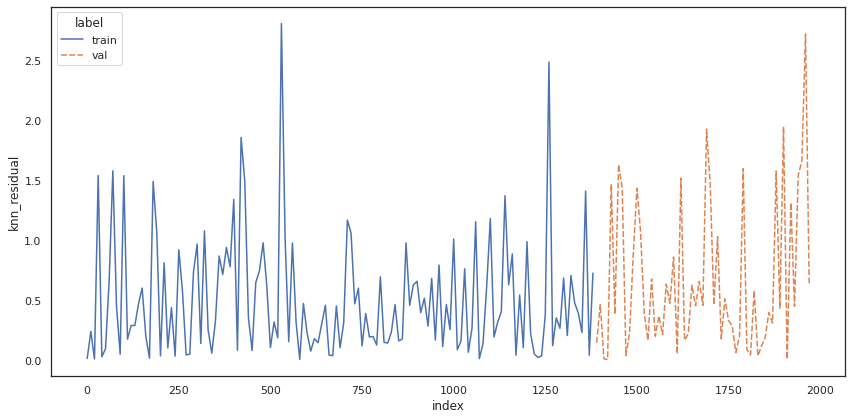

In [133]:
sns.set(style="white")

fig = plt.figure(figsize=(12, 6))

# df_sns["target"].plot()
sns.lineplot(x="index", y="knn_residual",data=df_sns_new.iloc[::10,:],hue="label",style="label"
            )
    
plt.tight_layout()
fig.savefig('knn_residual.png', dpi=400,bbox_inches='tight')
plt.show()


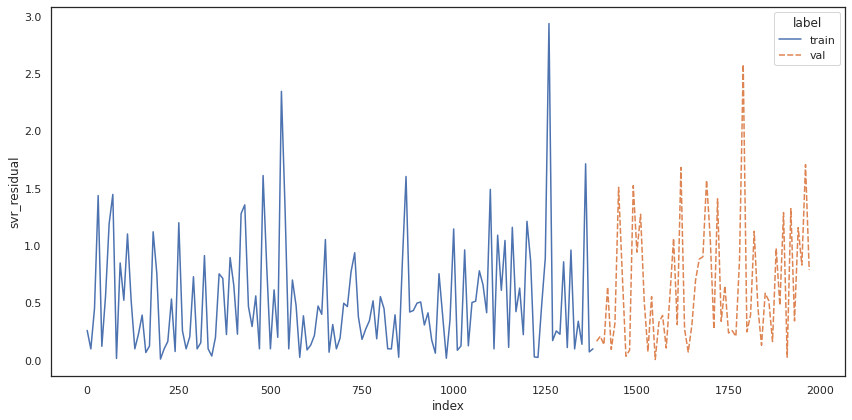

In [134]:
sns.set(style="white")

fig = plt.figure(figsize=(12, 6))

# df_sns["target"].plot()
sns.lineplot(x="index", y="svr_residual",data=df_sns_new.iloc[::10,:],hue="label",style="label"
            )
    
plt.tight_layout()
fig.savefig('svr_residual.png', bbox_inches='tight',dpi=400)
plt.show()


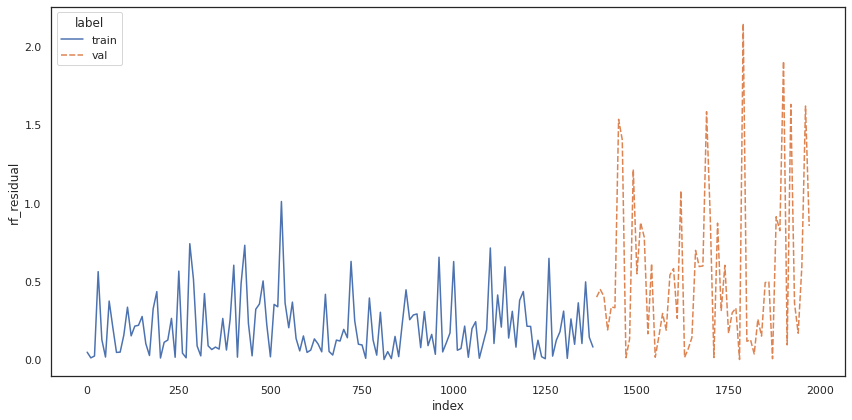

In [135]:
sns.set(style="white")

fig = plt.figure(figsize=(12, 6))

# df_sns["target"].plot()
sns.lineplot(x="index", y="rf_residual",data=df_sns_new.iloc[::10,:],hue="label",style="label"
            )
    
plt.tight_layout()
fig.savefig('rf_residual.png', bbox_inches='tight',dpi=400)
plt.show()


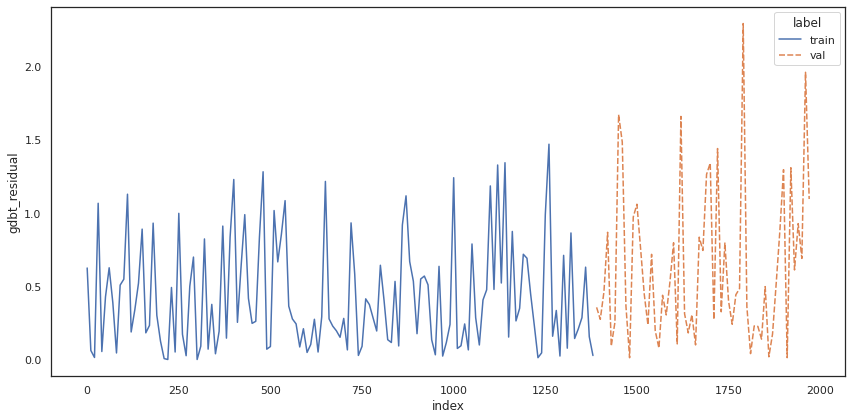

In [136]:
sns.set(style="white")

fig = plt.figure(figsize=(12, 6))

# df_sns["target"].plot()
sns.lineplot(x="index", y="gdbt_residual",data=df_sns_new.iloc[::10,:],hue="label",style="label"
            )
    
plt.tight_layout()
fig.savefig('gdbt_residual.png', bbox_inches='tight',dpi=400)
plt.show()


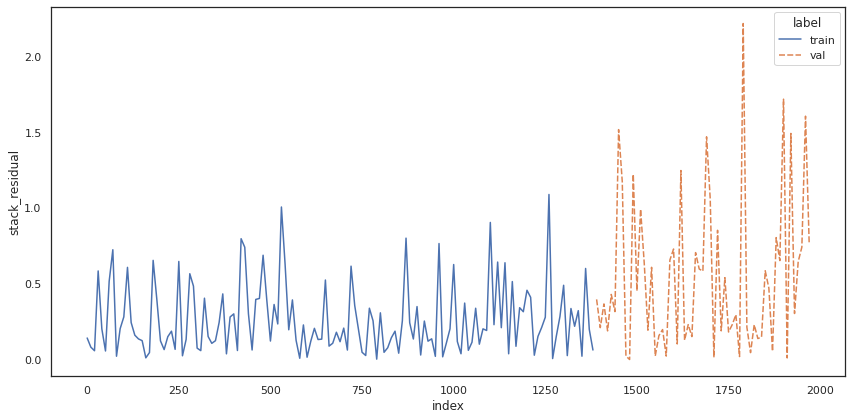

In [137]:
sns.set(style="white")

fig = plt.figure(figsize=(12, 6))

# df_sns["target"].plot()
sns.lineplot(x="index", y="stack_residual",data=df_sns_new.iloc[::10,:],hue="label",style="label"
            )
    
plt.tight_layout()
fig.savefig('stack_residual.png', bbox_inches='tight',dpi=400)
plt.show()


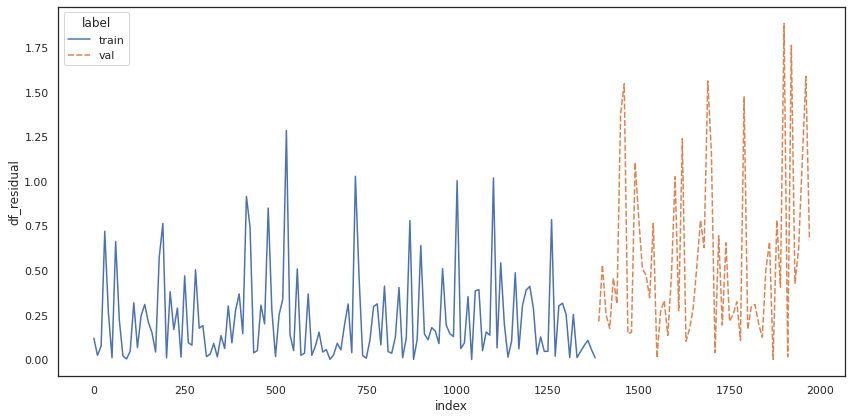

In [138]:
sns.set(style="white")

fig = plt.figure(figsize=(12, 6))

# df_sns["target"].plot()
sns.lineplot(x="index", y="df_residual",data=df_sns_new.iloc[::10,:],hue="label",style="label"
            )
    
plt.tight_layout()
fig.savefig('df_residual.png', bbox_inches='tight',dpi=400)
plt.show()
